In [ ]:
from sklearn.externals import joblib


In [ ]:
IndexFilePath='/dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/\
PlottingCombined/Predictions_WithoutNoise_WithBPI/'
#IndexFileModelPath='/dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/Predictions_WithoutNoise_WithBPI/3054/OutResults/'
i_dates='3054'
#I_dates='54005'

loaded_model = joblib.load(IndexFilePath+i_dates+'/OutResults/'+i_dates+'Birch.pkl')
#loaded_model = joblib.load(IndexFileModelPath+'Birch.pkl')

In [ ]:
!ls PlottingCombined/Predictions_WithoutNoise_WithBPI/3054/OutResults/3054_Indexes.csv

In [ ]:
#Print the samples
import sys
sys.path.append('PlottingCombined/')
from TrainRandomForestModel import MakePredictions

#Id_list=['6219','6115','3121','3083','3127','3121','3104','3083'] #
Id_list=['6219','6115','3121','3127','3104', '3126', '3083','3111']

Id_list=['3054']
Id_list=['54006']#['54005']
Id_list=['54005']#['6515']
#Id_list=['6509','6514','6515','3135','6501','6507']
MakePredictions(Id_list,loaded_model,IndexFilePath)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from plotnine import *


ID='54006'#'54005' #'3054'

ID='54005'#'6515'

cp_ind=pd.read_csv("PlottingCombined/Predictions_WithoutNoise_WithBPI/3054/OutResults/3054_Indexes.csv",index_col=False) #COPD_Index.csv
cp_ind=pd.read_csv("PlottingCombined/Predictions_WithoutNoise_WithBPI/"+ID+"/OutResults/"+ID+"_Indexes.csv",index_col=False) #COPD_Index.csv


cp_ind=cp_ind.rename(columns={'Unnamed: 0':'Serial'})

display(cp_ind.head(100))

Serial    Ru_mDI  Ru_RespRate  Ru_RMSSD  Ru_MADI    Ru_RMI  \
0        0  3.470000           10  4.101500    6.260  0.363384   
1        1  3.546667           15  4.276088    5.865  0.562247   
2        2  0.320000           17  0.329848    0.390  0.767432   
3        3  4.010000            8  4.221670    5.330  0.811611   
4        4  0.982857           18  1.891334    4.910  0.794884   
..     ...       ...          ...       ...      ...       ...   
95      95  4.797500           13  5.883114    8.150  0.374363   
96      96  1.595000           16  1.876162    3.150  0.509506   
97      97  4.321250           12  5.730487   10.815  0.322227   
98      98  3.230000           13  4.389558    8.570  0.470324   
99      99  2.690000            9  4.595944    7.960  0.130277   

    Restlessness3Sec  Ru_RMDA_RMS  BPI_ht_Mean_max  \
0           0.101000     1.030977         1.733860   
1           0.033333     0.996185         2.597643   
2           0.150500     0.993296         2.556825   
3           0.083667     1.037318         1.544570   
4           0.100500     0.998875         2.940929   
..               ...          ...              ...   
95          0.300500     1.004041         2.111833   
96          0.050000     1.009888         2.577456   
97          0.167000     1.003021         1.800215   
98          0.016667     1.010220         2.274199   
99          0.083333     0.934753         1.426137   

                                                Index     ID        Date  \
0   2017-08-01 05:12:54.905000_2017-08-01 05:13:54...  54005  2017-08-01   
1   2017-08-01 05:13:54.905000_2017-08-01 05:14:54...  54005  2017-08-01   
2   2017-08-01 05:14:54.905000_2017-08-01 05:15:54...  54005  2017-08-01   
3   2017-08-01 05:16:54.905000_2017-08-01 05:17:54...  54005  2017-08-01   
4   2017-08-01 05:17:54.905000_2017-08-01 05:18:54...  54005  2017-08-01   
..                                                ...    ...         ...   
95  2017-08-01 05:44:54.905000_2017-08-01 05:45:54...  54005  2017-08-02   
96  2017-08-02 02:03:39.960000_2017-08-02 02:04:39...  54005  2017-08-02   
97  2017-08-02 02:04:39.960000_2017-08-02 02:05:39...  54005  2017-08-02   
98  2017-08-02 02:06:39.960000_2017-08-02 02:07:39...  54005  2017-08-02   
99  2017-08-02 02:07:39.960000_2017-08-02 02:08:39...  54005  2017-08-02   

    label  
0       3  
1       3  
2       2  
3       3  
4       3  
..    ...  
95      3  
96      3  
97      3  
98      3  
99      3  

[100 rows x 13 columns]

In [2]:
test=cp_ind.groupby('Date')['Ru_RespRate'].mean().reset_index(name='Avg')
test.head()

Date        Avg
0  2017-01-28  13.000000
1  2017-01-29  13.066667
2  2017-01-30  14.773756
3  2017-03-07  17.101695
4  2017-03-08  20.191257

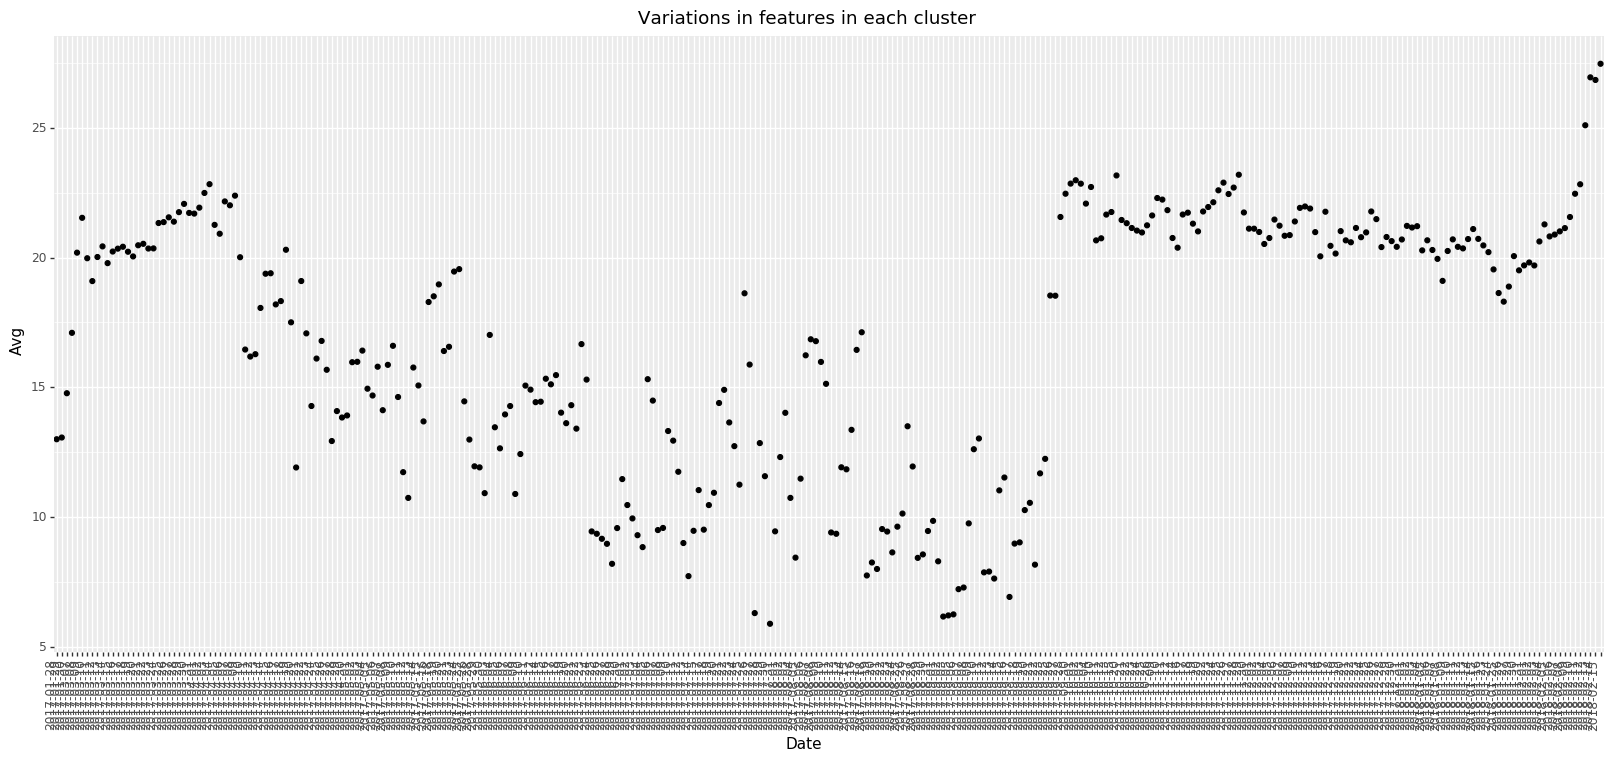

<ggplot: (8790740513863)>


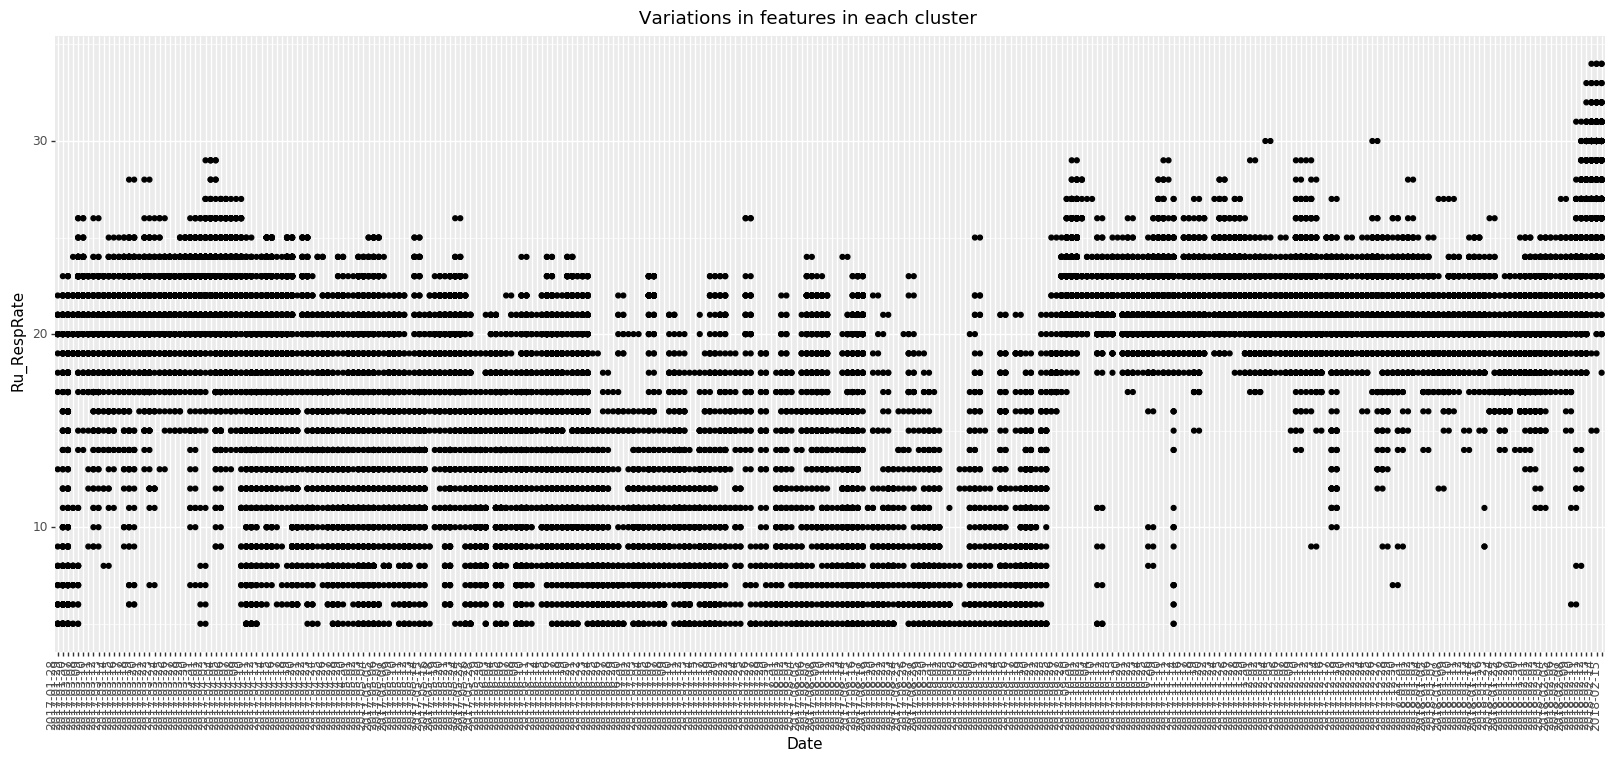

<ggplot: (8790740513898)>


In [3]:
import matplotlib.pyplot as plt
#from matplotlib import pyploy as plt
import matplotlib.pyplot as plt

from plotnine import *
#+figure_size = (20,10)

#plt.rcParams['figure.dpi'] = 150

g = ggplot(test, aes(x='Date', y='Avg'))+\
            geom_point() +  ggtitle(" Variations in features in each cluster")+\
            theme(axis_text_x  = element_text(angle = 90, hjust = 1),figure_size=(20, 8))#, aspect_ratio=1/3)
            
            #scale_color_manual(values=[color])
#ggsave(plot = g, filename = "COPD_Index", path = path)    
#p.save(filename=path+'fig3.png', height=10, width=12, units = 'cm', dpi=300)
print(g)

g1 = ggplot(cp_ind, aes(x='Date', y='Ru_RespRate'))+\
            geom_point() +  ggtitle(" Variations in features in each cluster")+\
            theme(axis_text_x  = element_text(angle = 90, hjust = 1),figure_size=(20, 8))#, aspect_ratio=1/3)
            
print(g1)

In [4]:

from plotnine import *
def GetLabelPercentages(data,ppath):
    
    #Dataframe and calculation for each label percentage
    cdata2=data[['label','Date']]
    def getlabels(lilabel):
        COPD_Clusters=[0,1,2]
        Non_COPD_Clusters=[3,4,5]
        if lilabel in COPD_Clusters:
            return 0
        elif lilabel in Non_COPD_Clusters:
            return 1
        
    cdata2['label2'] = cdata2['label'].apply(getlabels)
    
    cnewGroup2=cdata2.groupby(['Date','label'])['label'].count().reset_index(name='counts')
    display(cdata2.tail())
    
    #cnewGroup2['label2'] = cnewGroup2['label'].apply(getlabels)
    
    
    cnewGroupSUM=cnewGroup2.groupby(['Date'])['counts'].sum().reset_index()
    cnewGroup2=cnewGroup2.rename(columns={'counts':'countPerLabel'})
    cnewGroupSUM=cnewGroupSUM.rename(columns={'counts':'TotalCountsOfRespirationPerDay'})
    
    cnewGroup2=cnewGroup2.merge(cnewGroupSUM, how='inner', on='Date')
    cnewGroup2['PercentagePerLabelPerDay']=(cnewGroup2['countPerLabel']/cnewGroup2['TotalCountsOfRespirationPerDay'])*100
    display(cnewGroup2.head(12))
    return(cnewGroup2)

In [5]:
def GetCOPDIndex(data,ppath):
    cdata=data[['label','Date']]
    COPD_Clusters=[0,1,2]
    Non_COPD_Clusters=[3,4,5]
    cdata=cdata.replace(COPD_Clusters, 0)
    cdata=cdata.replace(Non_COPD_Clusters, 1)
    cnewGroup=cdata.groupby(['Date','label'])['label'].count().reset_index(name='counts')
    cnewGroup


    def doCalculation(dxt):
    #COPD_Count=
        COPD_Count=dxt[dxt['label']==0].counts
        C_index=round(((COPD_Count/dxt['counts'].sum())*100),2)
        return(C_index)
    cnewGroup=cnewGroup.groupby('Date').apply(doCalculation).reset_index()
    cnewGroup=cnewGroup.drop(columns=['level_1'])
    cnewGroup=cnewGroup.rename(columns={'counts':'COPD_Index'})
    g2=ggplot(cnewGroup, aes(x="Date", y="COPD_Index"))+ geom_line()  # Geometric o
    print(g2)
    ggsave(plot = g2, filename = "COPD_INdex_Progression", path = ppath)
    #plt.plot(x, np.sin(x));
    return(cnewGroup)

/opt/conda/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:83: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
  "group aesthetic?", PlotnineWarning)


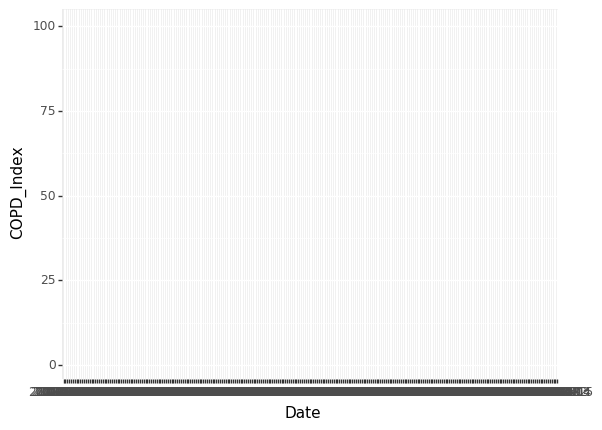

<ggplot: (8790694811382)>


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: PlottingCombined/Predictions_WithoutNoise_WithBPI/3054/OutResults/COPD_INdex_Progression
  warn('Filename: {}'.format(filename), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:83: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
  "group aesthetic?", PlotnineWarning)


index        Date  COPD_Index
0      1  2017-01-28       27.78
1      2  2017-01-29       25.19
2      3  2017-01-30       28.51
3      4  2017-03-07       69.49
4      5  2017-03-08       88.52

In [6]:
path='PlottingCombined/Predictions_WithoutNoise_WithBPI/3054/OutResults/'
COPD_Index=GetCOPDIndex(cp_ind,path)


COPD_Index=COPD_Index.reset_index()
#labelPercentagesPerDay=labelPercentagesPerDay.merge(COPD_Index, how='inner', on='Date')
COPD_Index['index'] = COPD_Index['index'] + 1
COPD_Index.head()


In [7]:
labelPercentagesPerDay=GetLabelPercentages(cp_ind,path)

labelPercentagesPerDay=labelPercentagesPerDay.reset_index()
#labelPercentagesPerDay=labelPercentagesPerDay.merge(COPD_Index, how='inner', on='Date')
labelPercentagesPerDay.index = labelPercentagesPerDay.index + 1
labelPercentagesPerDay.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


label        Date  label2
42651      3  2017-07-31       1
42652      5  2017-07-31       1
42653      3  2017-07-31       1
42654      3  2017-07-31       1
42655      3  2017-07-31       1

Date  label  countPerLabel  TotalCountsOfRespirationPerDay  \
0   2017-01-28      0              6                              36   
1   2017-01-28      1              4                              36   
2   2017-01-28      3             25                              36   
3   2017-01-28      5              1                              36   
4   2017-01-29      0             23                             135   
5   2017-01-29      1              8                             135   
6   2017-01-29      2              3                             135   
7   2017-01-29      3             95                             135   
8   2017-01-29      5              6                             135   
9   2017-01-30      0             39                             221   
10  2017-01-30      1             19                             221   
11  2017-01-30      2              5                             221   

    PercentagePerLabelPerDay  
0                  16.666667  
1                  11.111111  
2                  69.444444  
3                   2.777778  
4                  17.037037  
5                   5.925926  
6                   2.222222  
7                  70.370370  
8                   4.444444  
9                  17.647059  
10                  8.597285  
11                  2.262443

index        Date  label  countPerLabel  TotalCountsOfRespirationPerDay  \
1      0  2017-01-28      0              6                              36   
2      1  2017-01-28      1              4                              36   
3      2  2017-01-28      3             25                              36   
4      3  2017-01-28      5              1                              36   
5      4  2017-01-29      0             23                             135   

   PercentagePerLabelPerDay  
1                 16.666667  
2                 11.111111  
3                 69.444444  
4                  2.777778  
5                 17.037037

In [8]:

def Caliberate(NewCal):
    NewCal=NewCal.drop(columns=['index'])
    NewCal=NewCal[NewCal['PercentagePerLabelPerDay']>0.0]
    NewCal['Combined']=NewCal['Date'].astype(str)+"_"+NewCal['label'].astype(str)
    display(NewCal.head())
    for each_date in np.unique(NewCal['Date'].astype(str).to_list()): #.strftime
        for LAB in np.unique(NewCal['label'].to_list()):
            found = NewCal.loc[NewCal['Combined'].str.contains(str(each_date)+'_'+str(LAB),case=False)]
            found.head()
            #print(each_date.strftime,"<<<",LAB)
            if found.empty==True:
                print(str(each_date)+"_"+str(LAB))
                #
                df2 = pd.DataFrame([[str(each_date),str(LAB),0,0,0]], columns=['Date','label','countPerLabel','TotalCountsOfRespirationPerDay','PercentagePerLabelPerDay'])
                #'Date','label','countPerLabel','Combined'
                df2['Combined']=df2['Date']+"_"+str(df2['label'])
                display(df2.head())
                NewCal=pd.concat([df2,NewCal])
                display(NewCal.head(10))
    #display(NewCal.head())
    return(labelPercentagesPerDay)
print(labelPercentagesPerDay.dtypes)
labelPercentagesPerDay=Caliberate(labelPercentagesPerDay)


index                               int64
Date                               object
label                               int64
countPerLabel                       int64
TotalCountsOfRespirationPerDay      int64
PercentagePerLabelPerDay          float64
dtype: object


Date  label  countPerLabel  TotalCountsOfRespirationPerDay  \
1  2017-01-28      0              6                              36   
2  2017-01-28      1              4                              36   
3  2017-01-28      3             25                              36   
4  2017-01-28      5              1                              36   
5  2017-01-29      0             23                             135   

   PercentagePerLabelPerDay      Combined  
1                 16.666667  2017-01-28_0  
2                 11.111111  2017-01-28_1  
3                 69.444444  2017-01-28_3  
4                  2.777778  2017-01-28_5  
5                 17.037037  2017-01-29_0

2017-01-28_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-01-28     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-01-28_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-01-28     2              0                               0   
1  2017-01-28     0              6                              36   
2  2017-01-28     1              4                              36   
3  2017-01-28     3             25                              36   
4  2017-01-28     5              1                              36   
5  2017-01-29     0             23                             135   
6  2017-01-29     1              8                             135   
7  2017-01-29     2              3                             135   
8  2017-01-29     3             95                             135   
9  2017-01-29     5              6                             135   

   PercentagePerLabelPerDay                                       Combined  
0                  0.000000  2017-01-28_0    2\nName: label, dtype: object  
1                 16.666667                                   2017-01-28_0  
2                 11.111111                                   2017-01-28_1  
3                 69.444444                                   2017-01-28_3  
4                  2.777778                                   2017-01-28_5  
5                 17.037037                                   2017-01-29_0  
6                  5.925926                                   2017-01-29_1  
7                  2.222222                                   2017-01-29_2  
8                 70.370370                                   2017-01-29_3  
9                  4.444444                                   2017-01-29_5

2017-01-28_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-01-28     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-01-28_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-01-28     4              0                               0   
0  2017-01-28     2              0                               0   
1  2017-01-28     0              6                              36   
2  2017-01-28     1              4                              36   
3  2017-01-28     3             25                              36   
4  2017-01-28     5              1                              36   
5  2017-01-29     0             23                             135   
6  2017-01-29     1              8                             135   
7  2017-01-29     2              3                             135   
8  2017-01-29     3             95                             135   

   PercentagePerLabelPerDay                                       Combined  
0                  0.000000  2017-01-28_0    4\nName: label, dtype: object  
0                  0.000000  2017-01-28_0    2\nName: label, dtype: object  
1                 16.666667                                   2017-01-28_0  
2                 11.111111                                   2017-01-28_1  
3                 69.444444                                   2017-01-28_3  
4                  2.777778                                   2017-01-28_5  
5                 17.037037                                   2017-01-29_0  
6                  5.925926                                   2017-01-29_1  
7                  2.222222                                   2017-01-29_2  
8                 70.370370                                   2017-01-29_3

2017-01-29_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-01-29     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-01-29_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-01-29     4              0                               0   
0  2017-01-28     4              0                               0   
0  2017-01-28     2              0                               0   
1  2017-01-28     0              6                              36   
2  2017-01-28     1              4                              36   
3  2017-01-28     3             25                              36   
4  2017-01-28     5              1                              36   
5  2017-01-29     0             23                             135   
6  2017-01-29     1              8                             135   
7  2017-01-29     2              3                             135   

   PercentagePerLabelPerDay                                       Combined  
0                  0.000000  2017-01-29_0    4\nName: label, dtype: object  
0                  0.000000  2017-01-28_0    4\nName: label, dtype: object  
0                  0.000000  2017-01-28_0    2\nName: label, dtype: object  
1                 16.666667                                   2017-01-28_0  
2                 11.111111                                   2017-01-28_1  
3                 69.444444                                   2017-01-28_3  
4                  2.777778                                   2017-01-28_5  
5                 17.037037                                   2017-01-29_0  
6                  5.925926                                   2017-01-29_1  
7                  2.222222                                   2017-01-29_2

2017-03-07_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-07     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-07_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-07     2              0                               0   
0  2017-01-29     4              0                               0   
0  2017-01-28     4              0                               0   
0  2017-01-28     2              0                               0   
1  2017-01-28     0              6                              36   
2  2017-01-28     1              4                              36   
3  2017-01-28     3             25                              36   
4  2017-01-28     5              1                              36   
5  2017-01-29     0             23                             135   
6  2017-01-29     1              8                             135   

   PercentagePerLabelPerDay                                       Combined  
0                  0.000000  2017-03-07_0    2\nName: label, dtype: object  
0                  0.000000  2017-01-29_0    4\nName: label, dtype: object  
0                  0.000000  2017-01-28_0    4\nName: label, dtype: object  
0                  0.000000  2017-01-28_0    2\nName: label, dtype: object  
1                 16.666667                                   2017-01-28_0  
2                 11.111111                                   2017-01-28_1  
3                 69.444444                                   2017-01-28_3  
4                  2.777778                                   2017-01-28_5  
5                 17.037037                                   2017-01-29_0  
6                  5.925926                                   2017-01-29_1

2017-03-07_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-07     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-07_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-07     4              0                               0   
0  2017-03-07     2              0                               0   
0  2017-01-29     4              0                               0   
0  2017-01-28     4              0                               0   
0  2017-01-28     2              0                               0   
1  2017-01-28     0              6                              36   
2  2017-01-28     1              4                              36   
3  2017-01-28     3             25                              36   
4  2017-01-28     5              1                              36   
5  2017-01-29     0             23                             135   

   PercentagePerLabelPerDay                                       Combined  
0                  0.000000  2017-03-07_0    4\nName: label, dtype: object  
0                  0.000000  2017-03-07_0    2\nName: label, dtype: object  
0                  0.000000  2017-01-29_0    4\nName: label, dtype: object  
0                  0.000000  2017-01-28_0    4\nName: label, dtype: object  
0                  0.000000  2017-01-28_0    2\nName: label, dtype: object  
1                 16.666667                                   2017-01-28_0  
2                 11.111111                                   2017-01-28_1  
3                 69.444444                                   2017-01-28_3  
4                  2.777778                                   2017-01-28_5  
5                 17.037037                                   2017-01-29_0

2017-03-08_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-08     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-08_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-08     4              0                               0   
0  2017-03-07     4              0                               0   
0  2017-03-07     2              0                               0   
0  2017-01-29     4              0                               0   
0  2017-01-28     4              0                               0   
0  2017-01-28     2              0                               0   
1  2017-01-28     0              6                              36   
2  2017-01-28     1              4                              36   
3  2017-01-28     3             25                              36   
4  2017-01-28     5              1                              36   

   PercentagePerLabelPerDay                                       Combined  
0                  0.000000  2017-03-08_0    4\nName: label, dtype: object  
0                  0.000000  2017-03-07_0    4\nName: label, dtype: object  
0                  0.000000  2017-03-07_0    2\nName: label, dtype: object  
0                  0.000000  2017-01-29_0    4\nName: label, dtype: object  
0                  0.000000  2017-01-28_0    4\nName: label, dtype: object  
0                  0.000000  2017-01-28_0    2\nName: label, dtype: object  
1                 16.666667                                   2017-01-28_0  
2                 11.111111                                   2017-01-28_1  
3                 69.444444                                   2017-01-28_3  
4                  2.777778                                   2017-01-28_5

2017-03-09_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-09     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-09_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-09     4              0                               0   
0  2017-03-08     4              0                               0   
0  2017-03-07     4              0                               0   
0  2017-03-07     2              0                               0   
0  2017-01-29     4              0                               0   
0  2017-01-28     4              0                               0   
0  2017-01-28     2              0                               0   
1  2017-01-28     0              6                              36   
2  2017-01-28     1              4                              36   
3  2017-01-28     3             25                              36   

   PercentagePerLabelPerDay                                       Combined  
0                  0.000000  2017-03-09_0    4\nName: label, dtype: object  
0                  0.000000  2017-03-08_0    4\nName: label, dtype: object  
0                  0.000000  2017-03-07_0    4\nName: label, dtype: object  
0                  0.000000  2017-03-07_0    2\nName: label, dtype: object  
0                  0.000000  2017-01-29_0    4\nName: label, dtype: object  
0                  0.000000  2017-01-28_0    4\nName: label, dtype: object  
0                  0.000000  2017-01-28_0    2\nName: label, dtype: object  
1                 16.666667                                   2017-01-28_0  
2                 11.111111                                   2017-01-28_1  
3                 69.444444                                   2017-01-28_3

2017-03-09_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-09     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-09_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-09     5              0                               0   
0  2017-03-09     4              0                               0   
0  2017-03-08     4              0                               0   
0  2017-03-07     4              0                               0   
0  2017-03-07     2              0                               0   
0  2017-01-29     4              0                               0   
0  2017-01-28     4              0                               0   
0  2017-01-28     2              0                               0   
1  2017-01-28     0              6                              36   
2  2017-01-28     1              4                              36   

   PercentagePerLabelPerDay                                       Combined  
0                  0.000000  2017-03-09_0    5\nName: label, dtype: object  
0                  0.000000  2017-03-09_0    4\nName: label, dtype: object  
0                  0.000000  2017-03-08_0    4\nName: label, dtype: object  
0                  0.000000  2017-03-07_0    4\nName: label, dtype: object  
0                  0.000000  2017-03-07_0    2\nName: label, dtype: object  
0                  0.000000  2017-01-29_0    4\nName: label, dtype: object  
0                  0.000000  2017-01-28_0    4\nName: label, dtype: object  
0                  0.000000  2017-01-28_0    2\nName: label, dtype: object  
1                 16.666667                                   2017-01-28_0  
2                 11.111111                                   2017-01-28_1

2017-03-10_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-10     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-10_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-10     4              0                               0   
0  2017-03-09     5              0                               0   
0  2017-03-09     4              0                               0   
0  2017-03-08     4              0                               0   
0  2017-03-07     4              0                               0   
0  2017-03-07     2              0                               0   
0  2017-01-29     4              0                               0   
0  2017-01-28     4              0                               0   
0  2017-01-28     2              0                               0   
1  2017-01-28     0              6                              36   

   PercentagePerLabelPerDay                                       Combined  
0                  0.000000  2017-03-10_0    4\nName: label, dtype: object  
0                  0.000000  2017-03-09_0    5\nName: label, dtype: object  
0                  0.000000  2017-03-09_0    4\nName: label, dtype: object  
0                  0.000000  2017-03-08_0    4\nName: label, dtype: object  
0                  0.000000  2017-03-07_0    4\nName: label, dtype: object  
0                  0.000000  2017-03-07_0    2\nName: label, dtype: object  
0                  0.000000  2017-01-29_0    4\nName: label, dtype: object  
0                  0.000000  2017-01-28_0    4\nName: label, dtype: object  
0                  0.000000  2017-01-28_0    2\nName: label, dtype: object  
1                 16.666667                                   2017-01-28_0

2017-03-10_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-10     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-10_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-10     5              0                               0   
0  2017-03-10     4              0                               0   
0  2017-03-09     5              0                               0   
0  2017-03-09     4              0                               0   
0  2017-03-08     4              0                               0   
0  2017-03-07     4              0                               0   
0  2017-03-07     2              0                               0   
0  2017-01-29     4              0                               0   
0  2017-01-28     4              0                               0   
0  2017-01-28     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-10_0    5\nName: label, dtype: object  
0                       0.0  2017-03-10_0    4\nName: label, dtype: object  
0                       0.0  2017-03-09_0    5\nName: label, dtype: object  
0                       0.0  2017-03-09_0    4\nName: label, dtype: object  
0                       0.0  2017-03-08_0    4\nName: label, dtype: object  
0                       0.0  2017-03-07_0    4\nName: label, dtype: object  
0                       0.0  2017-03-07_0    2\nName: label, dtype: object  
0                       0.0  2017-01-29_0    4\nName: label, dtype: object  
0                       0.0  2017-01-28_0    4\nName: label, dtype: object  
0                       0.0  2017-01-28_0    2\nName: label, dtype: object

2017-03-11_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-11     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-11_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-11     4              0                               0   
0  2017-03-10     5              0                               0   
0  2017-03-10     4              0                               0   
0  2017-03-09     5              0                               0   
0  2017-03-09     4              0                               0   
0  2017-03-08     4              0                               0   
0  2017-03-07     4              0                               0   
0  2017-03-07     2              0                               0   
0  2017-01-29     4              0                               0   
0  2017-01-28     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-11_0    4\nName: label, dtype: object  
0                       0.0  2017-03-10_0    5\nName: label, dtype: object  
0                       0.0  2017-03-10_0    4\nName: label, dtype: object  
0                       0.0  2017-03-09_0    5\nName: label, dtype: object  
0                       0.0  2017-03-09_0    4\nName: label, dtype: object  
0                       0.0  2017-03-08_0    4\nName: label, dtype: object  
0                       0.0  2017-03-07_0    4\nName: label, dtype: object  
0                       0.0  2017-03-07_0    2\nName: label, dtype: object  
0                       0.0  2017-01-29_0    4\nName: label, dtype: object  
0                       0.0  2017-01-28_0    4\nName: label, dtype: object

2017-03-12_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-12     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-12_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-12     4              0                               0   
0  2017-03-11     4              0                               0   
0  2017-03-10     5              0                               0   
0  2017-03-10     4              0                               0   
0  2017-03-09     5              0                               0   
0  2017-03-09     4              0                               0   
0  2017-03-08     4              0                               0   
0  2017-03-07     4              0                               0   
0  2017-03-07     2              0                               0   
0  2017-01-29     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-12_0    4\nName: label, dtype: object  
0                       0.0  2017-03-11_0    4\nName: label, dtype: object  
0                       0.0  2017-03-10_0    5\nName: label, dtype: object  
0                       0.0  2017-03-10_0    4\nName: label, dtype: object  
0                       0.0  2017-03-09_0    5\nName: label, dtype: object  
0                       0.0  2017-03-09_0    4\nName: label, dtype: object  
0                       0.0  2017-03-08_0    4\nName: label, dtype: object  
0                       0.0  2017-03-07_0    4\nName: label, dtype: object  
0                       0.0  2017-03-07_0    2\nName: label, dtype: object  
0                       0.0  2017-01-29_0    4\nName: label, dtype: object

2017-03-13_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-13     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-13_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-13     5              0                               0   
0  2017-03-12     4              0                               0   
0  2017-03-11     4              0                               0   
0  2017-03-10     5              0                               0   
0  2017-03-10     4              0                               0   
0  2017-03-09     5              0                               0   
0  2017-03-09     4              0                               0   
0  2017-03-08     4              0                               0   
0  2017-03-07     4              0                               0   
0  2017-03-07     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-13_0    5\nName: label, dtype: object  
0                       0.0  2017-03-12_0    4\nName: label, dtype: object  
0                       0.0  2017-03-11_0    4\nName: label, dtype: object  
0                       0.0  2017-03-10_0    5\nName: label, dtype: object  
0                       0.0  2017-03-10_0    4\nName: label, dtype: object  
0                       0.0  2017-03-09_0    5\nName: label, dtype: object  
0                       0.0  2017-03-09_0    4\nName: label, dtype: object  
0                       0.0  2017-03-08_0    4\nName: label, dtype: object  
0                       0.0  2017-03-07_0    4\nName: label, dtype: object  
0                       0.0  2017-03-07_0    2\nName: label, dtype: object

2017-03-16_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-16     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-16_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-16     4              0                               0   
0  2017-03-13     5              0                               0   
0  2017-03-12     4              0                               0   
0  2017-03-11     4              0                               0   
0  2017-03-10     5              0                               0   
0  2017-03-10     4              0                               0   
0  2017-03-09     5              0                               0   
0  2017-03-09     4              0                               0   
0  2017-03-08     4              0                               0   
0  2017-03-07     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-16_0    4\nName: label, dtype: object  
0                       0.0  2017-03-13_0    5\nName: label, dtype: object  
0                       0.0  2017-03-12_0    4\nName: label, dtype: object  
0                       0.0  2017-03-11_0    4\nName: label, dtype: object  
0                       0.0  2017-03-10_0    5\nName: label, dtype: object  
0                       0.0  2017-03-10_0    4\nName: label, dtype: object  
0                       0.0  2017-03-09_0    5\nName: label, dtype: object  
0                       0.0  2017-03-09_0    4\nName: label, dtype: object  
0                       0.0  2017-03-08_0    4\nName: label, dtype: object  
0                       0.0  2017-03-07_0    4\nName: label, dtype: object

2017-03-16_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-16     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-16_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-16     5              0                               0   
0  2017-03-16     4              0                               0   
0  2017-03-13     5              0                               0   
0  2017-03-12     4              0                               0   
0  2017-03-11     4              0                               0   
0  2017-03-10     5              0                               0   
0  2017-03-10     4              0                               0   
0  2017-03-09     5              0                               0   
0  2017-03-09     4              0                               0   
0  2017-03-08     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-16_0    5\nName: label, dtype: object  
0                       0.0  2017-03-16_0    4\nName: label, dtype: object  
0                       0.0  2017-03-13_0    5\nName: label, dtype: object  
0                       0.0  2017-03-12_0    4\nName: label, dtype: object  
0                       0.0  2017-03-11_0    4\nName: label, dtype: object  
0                       0.0  2017-03-10_0    5\nName: label, dtype: object  
0                       0.0  2017-03-10_0    4\nName: label, dtype: object  
0                       0.0  2017-03-09_0    5\nName: label, dtype: object  
0                       0.0  2017-03-09_0    4\nName: label, dtype: object  
0                       0.0  2017-03-08_0    4\nName: label, dtype: object

2017-03-17_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-17     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-17_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-17     4              0                               0   
0  2017-03-16     5              0                               0   
0  2017-03-16     4              0                               0   
0  2017-03-13     5              0                               0   
0  2017-03-12     4              0                               0   
0  2017-03-11     4              0                               0   
0  2017-03-10     5              0                               0   
0  2017-03-10     4              0                               0   
0  2017-03-09     5              0                               0   
0  2017-03-09     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-17_0    4\nName: label, dtype: object  
0                       0.0  2017-03-16_0    5\nName: label, dtype: object  
0                       0.0  2017-03-16_0    4\nName: label, dtype: object  
0                       0.0  2017-03-13_0    5\nName: label, dtype: object  
0                       0.0  2017-03-12_0    4\nName: label, dtype: object  
0                       0.0  2017-03-11_0    4\nName: label, dtype: object  
0                       0.0  2017-03-10_0    5\nName: label, dtype: object  
0                       0.0  2017-03-10_0    4\nName: label, dtype: object  
0                       0.0  2017-03-09_0    5\nName: label, dtype: object  
0                       0.0  2017-03-09_0    4\nName: label, dtype: object

2017-03-17_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-17     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-17_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-17     5              0                               0   
0  2017-03-17     4              0                               0   
0  2017-03-16     5              0                               0   
0  2017-03-16     4              0                               0   
0  2017-03-13     5              0                               0   
0  2017-03-12     4              0                               0   
0  2017-03-11     4              0                               0   
0  2017-03-10     5              0                               0   
0  2017-03-10     4              0                               0   
0  2017-03-09     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-17_0    5\nName: label, dtype: object  
0                       0.0  2017-03-17_0    4\nName: label, dtype: object  
0                       0.0  2017-03-16_0    5\nName: label, dtype: object  
0                       0.0  2017-03-16_0    4\nName: label, dtype: object  
0                       0.0  2017-03-13_0    5\nName: label, dtype: object  
0                       0.0  2017-03-12_0    4\nName: label, dtype: object  
0                       0.0  2017-03-11_0    4\nName: label, dtype: object  
0                       0.0  2017-03-10_0    5\nName: label, dtype: object  
0                       0.0  2017-03-10_0    4\nName: label, dtype: object  
0                       0.0  2017-03-09_0    5\nName: label, dtype: object

2017-03-18_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-18     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-18_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-18     4              0                               0   
0  2017-03-17     5              0                               0   
0  2017-03-17     4              0                               0   
0  2017-03-16     5              0                               0   
0  2017-03-16     4              0                               0   
0  2017-03-13     5              0                               0   
0  2017-03-12     4              0                               0   
0  2017-03-11     4              0                               0   
0  2017-03-10     5              0                               0   
0  2017-03-10     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-18_0    4\nName: label, dtype: object  
0                       0.0  2017-03-17_0    5\nName: label, dtype: object  
0                       0.0  2017-03-17_0    4\nName: label, dtype: object  
0                       0.0  2017-03-16_0    5\nName: label, dtype: object  
0                       0.0  2017-03-16_0    4\nName: label, dtype: object  
0                       0.0  2017-03-13_0    5\nName: label, dtype: object  
0                       0.0  2017-03-12_0    4\nName: label, dtype: object  
0                       0.0  2017-03-11_0    4\nName: label, dtype: object  
0                       0.0  2017-03-10_0    5\nName: label, dtype: object  
0                       0.0  2017-03-10_0    4\nName: label, dtype: object

2017-03-18_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-18     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-18_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-18     5              0                               0   
0  2017-03-18     4              0                               0   
0  2017-03-17     5              0                               0   
0  2017-03-17     4              0                               0   
0  2017-03-16     5              0                               0   
0  2017-03-16     4              0                               0   
0  2017-03-13     5              0                               0   
0  2017-03-12     4              0                               0   
0  2017-03-11     4              0                               0   
0  2017-03-10     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-18_0    5\nName: label, dtype: object  
0                       0.0  2017-03-18_0    4\nName: label, dtype: object  
0                       0.0  2017-03-17_0    5\nName: label, dtype: object  
0                       0.0  2017-03-17_0    4\nName: label, dtype: object  
0                       0.0  2017-03-16_0    5\nName: label, dtype: object  
0                       0.0  2017-03-16_0    4\nName: label, dtype: object  
0                       0.0  2017-03-13_0    5\nName: label, dtype: object  
0                       0.0  2017-03-12_0    4\nName: label, dtype: object  
0                       0.0  2017-03-11_0    4\nName: label, dtype: object  
0                       0.0  2017-03-10_0    5\nName: label, dtype: object

2017-03-19_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-19     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-19_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-19     4              0                               0   
0  2017-03-18     5              0                               0   
0  2017-03-18     4              0                               0   
0  2017-03-17     5              0                               0   
0  2017-03-17     4              0                               0   
0  2017-03-16     5              0                               0   
0  2017-03-16     4              0                               0   
0  2017-03-13     5              0                               0   
0  2017-03-12     4              0                               0   
0  2017-03-11     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-19_0    4\nName: label, dtype: object  
0                       0.0  2017-03-18_0    5\nName: label, dtype: object  
0                       0.0  2017-03-18_0    4\nName: label, dtype: object  
0                       0.0  2017-03-17_0    5\nName: label, dtype: object  
0                       0.0  2017-03-17_0    4\nName: label, dtype: object  
0                       0.0  2017-03-16_0    5\nName: label, dtype: object  
0                       0.0  2017-03-16_0    4\nName: label, dtype: object  
0                       0.0  2017-03-13_0    5\nName: label, dtype: object  
0                       0.0  2017-03-12_0    4\nName: label, dtype: object  
0                       0.0  2017-03-11_0    4\nName: label, dtype: object

2017-03-19_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-19     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-19_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-19     5              0                               0   
0  2017-03-19     4              0                               0   
0  2017-03-18     5              0                               0   
0  2017-03-18     4              0                               0   
0  2017-03-17     5              0                               0   
0  2017-03-17     4              0                               0   
0  2017-03-16     5              0                               0   
0  2017-03-16     4              0                               0   
0  2017-03-13     5              0                               0   
0  2017-03-12     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-19_0    5\nName: label, dtype: object  
0                       0.0  2017-03-19_0    4\nName: label, dtype: object  
0                       0.0  2017-03-18_0    5\nName: label, dtype: object  
0                       0.0  2017-03-18_0    4\nName: label, dtype: object  
0                       0.0  2017-03-17_0    5\nName: label, dtype: object  
0                       0.0  2017-03-17_0    4\nName: label, dtype: object  
0                       0.0  2017-03-16_0    5\nName: label, dtype: object  
0                       0.0  2017-03-16_0    4\nName: label, dtype: object  
0                       0.0  2017-03-13_0    5\nName: label, dtype: object  
0                       0.0  2017-03-12_0    4\nName: label, dtype: object

2017-03-20_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-20     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-20_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-20     4              0                               0   
0  2017-03-19     5              0                               0   
0  2017-03-19     4              0                               0   
0  2017-03-18     5              0                               0   
0  2017-03-18     4              0                               0   
0  2017-03-17     5              0                               0   
0  2017-03-17     4              0                               0   
0  2017-03-16     5              0                               0   
0  2017-03-16     4              0                               0   
0  2017-03-13     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-20_0    4\nName: label, dtype: object  
0                       0.0  2017-03-19_0    5\nName: label, dtype: object  
0                       0.0  2017-03-19_0    4\nName: label, dtype: object  
0                       0.0  2017-03-18_0    5\nName: label, dtype: object  
0                       0.0  2017-03-18_0    4\nName: label, dtype: object  
0                       0.0  2017-03-17_0    5\nName: label, dtype: object  
0                       0.0  2017-03-17_0    4\nName: label, dtype: object  
0                       0.0  2017-03-16_0    5\nName: label, dtype: object  
0                       0.0  2017-03-16_0    4\nName: label, dtype: object  
0                       0.0  2017-03-13_0    5\nName: label, dtype: object

2017-03-20_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-20     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-20_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-20     5              0                               0   
0  2017-03-20     4              0                               0   
0  2017-03-19     5              0                               0   
0  2017-03-19     4              0                               0   
0  2017-03-18     5              0                               0   
0  2017-03-18     4              0                               0   
0  2017-03-17     5              0                               0   
0  2017-03-17     4              0                               0   
0  2017-03-16     5              0                               0   
0  2017-03-16     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-20_0    5\nName: label, dtype: object  
0                       0.0  2017-03-20_0    4\nName: label, dtype: object  
0                       0.0  2017-03-19_0    5\nName: label, dtype: object  
0                       0.0  2017-03-19_0    4\nName: label, dtype: object  
0                       0.0  2017-03-18_0    5\nName: label, dtype: object  
0                       0.0  2017-03-18_0    4\nName: label, dtype: object  
0                       0.0  2017-03-17_0    5\nName: label, dtype: object  
0                       0.0  2017-03-17_0    4\nName: label, dtype: object  
0                       0.0  2017-03-16_0    5\nName: label, dtype: object  
0                       0.0  2017-03-16_0    4\nName: label, dtype: object

2017-03-21_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-21     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-21_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-21     4              0                               0   
0  2017-03-20     5              0                               0   
0  2017-03-20     4              0                               0   
0  2017-03-19     5              0                               0   
0  2017-03-19     4              0                               0   
0  2017-03-18     5              0                               0   
0  2017-03-18     4              0                               0   
0  2017-03-17     5              0                               0   
0  2017-03-17     4              0                               0   
0  2017-03-16     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-21_0    4\nName: label, dtype: object  
0                       0.0  2017-03-20_0    5\nName: label, dtype: object  
0                       0.0  2017-03-20_0    4\nName: label, dtype: object  
0                       0.0  2017-03-19_0    5\nName: label, dtype: object  
0                       0.0  2017-03-19_0    4\nName: label, dtype: object  
0                       0.0  2017-03-18_0    5\nName: label, dtype: object  
0                       0.0  2017-03-18_0    4\nName: label, dtype: object  
0                       0.0  2017-03-17_0    5\nName: label, dtype: object  
0                       0.0  2017-03-17_0    4\nName: label, dtype: object  
0                       0.0  2017-03-16_0    5\nName: label, dtype: object

2017-03-22_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-22     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-22_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-22     4              0                               0   
0  2017-03-21     4              0                               0   
0  2017-03-20     5              0                               0   
0  2017-03-20     4              0                               0   
0  2017-03-19     5              0                               0   
0  2017-03-19     4              0                               0   
0  2017-03-18     5              0                               0   
0  2017-03-18     4              0                               0   
0  2017-03-17     5              0                               0   
0  2017-03-17     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-22_0    4\nName: label, dtype: object  
0                       0.0  2017-03-21_0    4\nName: label, dtype: object  
0                       0.0  2017-03-20_0    5\nName: label, dtype: object  
0                       0.0  2017-03-20_0    4\nName: label, dtype: object  
0                       0.0  2017-03-19_0    5\nName: label, dtype: object  
0                       0.0  2017-03-19_0    4\nName: label, dtype: object  
0                       0.0  2017-03-18_0    5\nName: label, dtype: object  
0                       0.0  2017-03-18_0    4\nName: label, dtype: object  
0                       0.0  2017-03-17_0    5\nName: label, dtype: object  
0                       0.0  2017-03-17_0    4\nName: label, dtype: object

2017-03-23_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-23     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-23_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-23     2              0                               0   
0  2017-03-22     4              0                               0   
0  2017-03-21     4              0                               0   
0  2017-03-20     5              0                               0   
0  2017-03-20     4              0                               0   
0  2017-03-19     5              0                               0   
0  2017-03-19     4              0                               0   
0  2017-03-18     5              0                               0   
0  2017-03-18     4              0                               0   
0  2017-03-17     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-23_0    2\nName: label, dtype: object  
0                       0.0  2017-03-22_0    4\nName: label, dtype: object  
0                       0.0  2017-03-21_0    4\nName: label, dtype: object  
0                       0.0  2017-03-20_0    5\nName: label, dtype: object  
0                       0.0  2017-03-20_0    4\nName: label, dtype: object  
0                       0.0  2017-03-19_0    5\nName: label, dtype: object  
0                       0.0  2017-03-19_0    4\nName: label, dtype: object  
0                       0.0  2017-03-18_0    5\nName: label, dtype: object  
0                       0.0  2017-03-18_0    4\nName: label, dtype: object  
0                       0.0  2017-03-17_0    5\nName: label, dtype: object

2017-03-23_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-23     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-23_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-23     4              0                               0   
0  2017-03-23     2              0                               0   
0  2017-03-22     4              0                               0   
0  2017-03-21     4              0                               0   
0  2017-03-20     5              0                               0   
0  2017-03-20     4              0                               0   
0  2017-03-19     5              0                               0   
0  2017-03-19     4              0                               0   
0  2017-03-18     5              0                               0   
0  2017-03-18     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-23_0    4\nName: label, dtype: object  
0                       0.0  2017-03-23_0    2\nName: label, dtype: object  
0                       0.0  2017-03-22_0    4\nName: label, dtype: object  
0                       0.0  2017-03-21_0    4\nName: label, dtype: object  
0                       0.0  2017-03-20_0    5\nName: label, dtype: object  
0                       0.0  2017-03-20_0    4\nName: label, dtype: object  
0                       0.0  2017-03-19_0    5\nName: label, dtype: object  
0                       0.0  2017-03-19_0    4\nName: label, dtype: object  
0                       0.0  2017-03-18_0    5\nName: label, dtype: object  
0                       0.0  2017-03-18_0    4\nName: label, dtype: object

2017-03-23_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-23     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-23_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-23     5              0                               0   
0  2017-03-23     4              0                               0   
0  2017-03-23     2              0                               0   
0  2017-03-22     4              0                               0   
0  2017-03-21     4              0                               0   
0  2017-03-20     5              0                               0   
0  2017-03-20     4              0                               0   
0  2017-03-19     5              0                               0   
0  2017-03-19     4              0                               0   
0  2017-03-18     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-23_0    5\nName: label, dtype: object  
0                       0.0  2017-03-23_0    4\nName: label, dtype: object  
0                       0.0  2017-03-23_0    2\nName: label, dtype: object  
0                       0.0  2017-03-22_0    4\nName: label, dtype: object  
0                       0.0  2017-03-21_0    4\nName: label, dtype: object  
0                       0.0  2017-03-20_0    5\nName: label, dtype: object  
0                       0.0  2017-03-20_0    4\nName: label, dtype: object  
0                       0.0  2017-03-19_0    5\nName: label, dtype: object  
0                       0.0  2017-03-19_0    4\nName: label, dtype: object  
0                       0.0  2017-03-18_0    5\nName: label, dtype: object

2017-03-24_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-24     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-24_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-24     4              0                               0   
0  2017-03-23     5              0                               0   
0  2017-03-23     4              0                               0   
0  2017-03-23     2              0                               0   
0  2017-03-22     4              0                               0   
0  2017-03-21     4              0                               0   
0  2017-03-20     5              0                               0   
0  2017-03-20     4              0                               0   
0  2017-03-19     5              0                               0   
0  2017-03-19     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-24_0    4\nName: label, dtype: object  
0                       0.0  2017-03-23_0    5\nName: label, dtype: object  
0                       0.0  2017-03-23_0    4\nName: label, dtype: object  
0                       0.0  2017-03-23_0    2\nName: label, dtype: object  
0                       0.0  2017-03-22_0    4\nName: label, dtype: object  
0                       0.0  2017-03-21_0    4\nName: label, dtype: object  
0                       0.0  2017-03-20_0    5\nName: label, dtype: object  
0                       0.0  2017-03-20_0    4\nName: label, dtype: object  
0                       0.0  2017-03-19_0    5\nName: label, dtype: object  
0                       0.0  2017-03-19_0    4\nName: label, dtype: object

2017-03-24_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-24     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-24_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-24     5              0                               0   
0  2017-03-24     4              0                               0   
0  2017-03-23     5              0                               0   
0  2017-03-23     4              0                               0   
0  2017-03-23     2              0                               0   
0  2017-03-22     4              0                               0   
0  2017-03-21     4              0                               0   
0  2017-03-20     5              0                               0   
0  2017-03-20     4              0                               0   
0  2017-03-19     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-24_0    5\nName: label, dtype: object  
0                       0.0  2017-03-24_0    4\nName: label, dtype: object  
0                       0.0  2017-03-23_0    5\nName: label, dtype: object  
0                       0.0  2017-03-23_0    4\nName: label, dtype: object  
0                       0.0  2017-03-23_0    2\nName: label, dtype: object  
0                       0.0  2017-03-22_0    4\nName: label, dtype: object  
0                       0.0  2017-03-21_0    4\nName: label, dtype: object  
0                       0.0  2017-03-20_0    5\nName: label, dtype: object  
0                       0.0  2017-03-20_0    4\nName: label, dtype: object  
0                       0.0  2017-03-19_0    5\nName: label, dtype: object

2017-03-25_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-25     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-25_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-25     4              0                               0   
0  2017-03-24     5              0                               0   
0  2017-03-24     4              0                               0   
0  2017-03-23     5              0                               0   
0  2017-03-23     4              0                               0   
0  2017-03-23     2              0                               0   
0  2017-03-22     4              0                               0   
0  2017-03-21     4              0                               0   
0  2017-03-20     5              0                               0   
0  2017-03-20     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-25_0    4\nName: label, dtype: object  
0                       0.0  2017-03-24_0    5\nName: label, dtype: object  
0                       0.0  2017-03-24_0    4\nName: label, dtype: object  
0                       0.0  2017-03-23_0    5\nName: label, dtype: object  
0                       0.0  2017-03-23_0    4\nName: label, dtype: object  
0                       0.0  2017-03-23_0    2\nName: label, dtype: object  
0                       0.0  2017-03-22_0    4\nName: label, dtype: object  
0                       0.0  2017-03-21_0    4\nName: label, dtype: object  
0                       0.0  2017-03-20_0    5\nName: label, dtype: object  
0                       0.0  2017-03-20_0    4\nName: label, dtype: object

2017-03-25_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-25     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-25_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-25     5              0                               0   
0  2017-03-25     4              0                               0   
0  2017-03-24     5              0                               0   
0  2017-03-24     4              0                               0   
0  2017-03-23     5              0                               0   
0  2017-03-23     4              0                               0   
0  2017-03-23     2              0                               0   
0  2017-03-22     4              0                               0   
0  2017-03-21     4              0                               0   
0  2017-03-20     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-25_0    5\nName: label, dtype: object  
0                       0.0  2017-03-25_0    4\nName: label, dtype: object  
0                       0.0  2017-03-24_0    5\nName: label, dtype: object  
0                       0.0  2017-03-24_0    4\nName: label, dtype: object  
0                       0.0  2017-03-23_0    5\nName: label, dtype: object  
0                       0.0  2017-03-23_0    4\nName: label, dtype: object  
0                       0.0  2017-03-23_0    2\nName: label, dtype: object  
0                       0.0  2017-03-22_0    4\nName: label, dtype: object  
0                       0.0  2017-03-21_0    4\nName: label, dtype: object  
0                       0.0  2017-03-20_0    5\nName: label, dtype: object

2017-03-26_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-26     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-26_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-26     4              0                               0   
0  2017-03-25     5              0                               0   
0  2017-03-25     4              0                               0   
0  2017-03-24     5              0                               0   
0  2017-03-24     4              0                               0   
0  2017-03-23     5              0                               0   
0  2017-03-23     4              0                               0   
0  2017-03-23     2              0                               0   
0  2017-03-22     4              0                               0   
0  2017-03-21     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-26_0    4\nName: label, dtype: object  
0                       0.0  2017-03-25_0    5\nName: label, dtype: object  
0                       0.0  2017-03-25_0    4\nName: label, dtype: object  
0                       0.0  2017-03-24_0    5\nName: label, dtype: object  
0                       0.0  2017-03-24_0    4\nName: label, dtype: object  
0                       0.0  2017-03-23_0    5\nName: label, dtype: object  
0                       0.0  2017-03-23_0    4\nName: label, dtype: object  
0                       0.0  2017-03-23_0    2\nName: label, dtype: object  
0                       0.0  2017-03-22_0    4\nName: label, dtype: object  
0                       0.0  2017-03-21_0    4\nName: label, dtype: object

2017-03-26_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-26     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-26_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-26     5              0                               0   
0  2017-03-26     4              0                               0   
0  2017-03-25     5              0                               0   
0  2017-03-25     4              0                               0   
0  2017-03-24     5              0                               0   
0  2017-03-24     4              0                               0   
0  2017-03-23     5              0                               0   
0  2017-03-23     4              0                               0   
0  2017-03-23     2              0                               0   
0  2017-03-22     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-26_0    5\nName: label, dtype: object  
0                       0.0  2017-03-26_0    4\nName: label, dtype: object  
0                       0.0  2017-03-25_0    5\nName: label, dtype: object  
0                       0.0  2017-03-25_0    4\nName: label, dtype: object  
0                       0.0  2017-03-24_0    5\nName: label, dtype: object  
0                       0.0  2017-03-24_0    4\nName: label, dtype: object  
0                       0.0  2017-03-23_0    5\nName: label, dtype: object  
0                       0.0  2017-03-23_0    4\nName: label, dtype: object  
0                       0.0  2017-03-23_0    2\nName: label, dtype: object  
0                       0.0  2017-03-22_0    4\nName: label, dtype: object

2017-03-27_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-27     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-27_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-27     4              0                               0   
0  2017-03-26     5              0                               0   
0  2017-03-26     4              0                               0   
0  2017-03-25     5              0                               0   
0  2017-03-25     4              0                               0   
0  2017-03-24     5              0                               0   
0  2017-03-24     4              0                               0   
0  2017-03-23     5              0                               0   
0  2017-03-23     4              0                               0   
0  2017-03-23     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-27_0    4\nName: label, dtype: object  
0                       0.0  2017-03-26_0    5\nName: label, dtype: object  
0                       0.0  2017-03-26_0    4\nName: label, dtype: object  
0                       0.0  2017-03-25_0    5\nName: label, dtype: object  
0                       0.0  2017-03-25_0    4\nName: label, dtype: object  
0                       0.0  2017-03-24_0    5\nName: label, dtype: object  
0                       0.0  2017-03-24_0    4\nName: label, dtype: object  
0                       0.0  2017-03-23_0    5\nName: label, dtype: object  
0                       0.0  2017-03-23_0    4\nName: label, dtype: object  
0                       0.0  2017-03-23_0    2\nName: label, dtype: object

2017-03-27_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-27     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-27_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-27     5              0                               0   
0  2017-03-27     4              0                               0   
0  2017-03-26     5              0                               0   
0  2017-03-26     4              0                               0   
0  2017-03-25     5              0                               0   
0  2017-03-25     4              0                               0   
0  2017-03-24     5              0                               0   
0  2017-03-24     4              0                               0   
0  2017-03-23     5              0                               0   
0  2017-03-23     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-27_0    5\nName: label, dtype: object  
0                       0.0  2017-03-27_0    4\nName: label, dtype: object  
0                       0.0  2017-03-26_0    5\nName: label, dtype: object  
0                       0.0  2017-03-26_0    4\nName: label, dtype: object  
0                       0.0  2017-03-25_0    5\nName: label, dtype: object  
0                       0.0  2017-03-25_0    4\nName: label, dtype: object  
0                       0.0  2017-03-24_0    5\nName: label, dtype: object  
0                       0.0  2017-03-24_0    4\nName: label, dtype: object  
0                       0.0  2017-03-23_0    5\nName: label, dtype: object  
0                       0.0  2017-03-23_0    4\nName: label, dtype: object

2017-03-28_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-28     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-28_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-28     4              0                               0   
0  2017-03-27     5              0                               0   
0  2017-03-27     4              0                               0   
0  2017-03-26     5              0                               0   
0  2017-03-26     4              0                               0   
0  2017-03-25     5              0                               0   
0  2017-03-25     4              0                               0   
0  2017-03-24     5              0                               0   
0  2017-03-24     4              0                               0   
0  2017-03-23     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-28_0    4\nName: label, dtype: object  
0                       0.0  2017-03-27_0    5\nName: label, dtype: object  
0                       0.0  2017-03-27_0    4\nName: label, dtype: object  
0                       0.0  2017-03-26_0    5\nName: label, dtype: object  
0                       0.0  2017-03-26_0    4\nName: label, dtype: object  
0                       0.0  2017-03-25_0    5\nName: label, dtype: object  
0                       0.0  2017-03-25_0    4\nName: label, dtype: object  
0                       0.0  2017-03-24_0    5\nName: label, dtype: object  
0                       0.0  2017-03-24_0    4\nName: label, dtype: object  
0                       0.0  2017-03-23_0    5\nName: label, dtype: object

2017-03-28_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-28     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-28_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-28     5              0                               0   
0  2017-03-28     4              0                               0   
0  2017-03-27     5              0                               0   
0  2017-03-27     4              0                               0   
0  2017-03-26     5              0                               0   
0  2017-03-26     4              0                               0   
0  2017-03-25     5              0                               0   
0  2017-03-25     4              0                               0   
0  2017-03-24     5              0                               0   
0  2017-03-24     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-28_0    5\nName: label, dtype: object  
0                       0.0  2017-03-28_0    4\nName: label, dtype: object  
0                       0.0  2017-03-27_0    5\nName: label, dtype: object  
0                       0.0  2017-03-27_0    4\nName: label, dtype: object  
0                       0.0  2017-03-26_0    5\nName: label, dtype: object  
0                       0.0  2017-03-26_0    4\nName: label, dtype: object  
0                       0.0  2017-03-25_0    5\nName: label, dtype: object  
0                       0.0  2017-03-25_0    4\nName: label, dtype: object  
0                       0.0  2017-03-24_0    5\nName: label, dtype: object  
0                       0.0  2017-03-24_0    4\nName: label, dtype: object

2017-03-29_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-29     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-29_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-29     2              0                               0   
0  2017-03-28     5              0                               0   
0  2017-03-28     4              0                               0   
0  2017-03-27     5              0                               0   
0  2017-03-27     4              0                               0   
0  2017-03-26     5              0                               0   
0  2017-03-26     4              0                               0   
0  2017-03-25     5              0                               0   
0  2017-03-25     4              0                               0   
0  2017-03-24     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-29_0    2\nName: label, dtype: object  
0                       0.0  2017-03-28_0    5\nName: label, dtype: object  
0                       0.0  2017-03-28_0    4\nName: label, dtype: object  
0                       0.0  2017-03-27_0    5\nName: label, dtype: object  
0                       0.0  2017-03-27_0    4\nName: label, dtype: object  
0                       0.0  2017-03-26_0    5\nName: label, dtype: object  
0                       0.0  2017-03-26_0    4\nName: label, dtype: object  
0                       0.0  2017-03-25_0    5\nName: label, dtype: object  
0                       0.0  2017-03-25_0    4\nName: label, dtype: object  
0                       0.0  2017-03-24_0    5\nName: label, dtype: object

2017-03-29_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-29     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-29_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-29     4              0                               0   
0  2017-03-29     2              0                               0   
0  2017-03-28     5              0                               0   
0  2017-03-28     4              0                               0   
0  2017-03-27     5              0                               0   
0  2017-03-27     4              0                               0   
0  2017-03-26     5              0                               0   
0  2017-03-26     4              0                               0   
0  2017-03-25     5              0                               0   
0  2017-03-25     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-29_0    4\nName: label, dtype: object  
0                       0.0  2017-03-29_0    2\nName: label, dtype: object  
0                       0.0  2017-03-28_0    5\nName: label, dtype: object  
0                       0.0  2017-03-28_0    4\nName: label, dtype: object  
0                       0.0  2017-03-27_0    5\nName: label, dtype: object  
0                       0.0  2017-03-27_0    4\nName: label, dtype: object  
0                       0.0  2017-03-26_0    5\nName: label, dtype: object  
0                       0.0  2017-03-26_0    4\nName: label, dtype: object  
0                       0.0  2017-03-25_0    5\nName: label, dtype: object  
0                       0.0  2017-03-25_0    4\nName: label, dtype: object

2017-03-29_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-29     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-29_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-29     5              0                               0   
0  2017-03-29     4              0                               0   
0  2017-03-29     2              0                               0   
0  2017-03-28     5              0                               0   
0  2017-03-28     4              0                               0   
0  2017-03-27     5              0                               0   
0  2017-03-27     4              0                               0   
0  2017-03-26     5              0                               0   
0  2017-03-26     4              0                               0   
0  2017-03-25     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-29_0    5\nName: label, dtype: object  
0                       0.0  2017-03-29_0    4\nName: label, dtype: object  
0                       0.0  2017-03-29_0    2\nName: label, dtype: object  
0                       0.0  2017-03-28_0    5\nName: label, dtype: object  
0                       0.0  2017-03-28_0    4\nName: label, dtype: object  
0                       0.0  2017-03-27_0    5\nName: label, dtype: object  
0                       0.0  2017-03-27_0    4\nName: label, dtype: object  
0                       0.0  2017-03-26_0    5\nName: label, dtype: object  
0                       0.0  2017-03-26_0    4\nName: label, dtype: object  
0                       0.0  2017-03-25_0    5\nName: label, dtype: object

2017-03-30_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-30     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-30_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-30     2              0                               0   
0  2017-03-29     5              0                               0   
0  2017-03-29     4              0                               0   
0  2017-03-29     2              0                               0   
0  2017-03-28     5              0                               0   
0  2017-03-28     4              0                               0   
0  2017-03-27     5              0                               0   
0  2017-03-27     4              0                               0   
0  2017-03-26     5              0                               0   
0  2017-03-26     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-30_0    2\nName: label, dtype: object  
0                       0.0  2017-03-29_0    5\nName: label, dtype: object  
0                       0.0  2017-03-29_0    4\nName: label, dtype: object  
0                       0.0  2017-03-29_0    2\nName: label, dtype: object  
0                       0.0  2017-03-28_0    5\nName: label, dtype: object  
0                       0.0  2017-03-28_0    4\nName: label, dtype: object  
0                       0.0  2017-03-27_0    5\nName: label, dtype: object  
0                       0.0  2017-03-27_0    4\nName: label, dtype: object  
0                       0.0  2017-03-26_0    5\nName: label, dtype: object  
0                       0.0  2017-03-26_0    4\nName: label, dtype: object

2017-03-30_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-30     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-30_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-30     4              0                               0   
0  2017-03-30     2              0                               0   
0  2017-03-29     5              0                               0   
0  2017-03-29     4              0                               0   
0  2017-03-29     2              0                               0   
0  2017-03-28     5              0                               0   
0  2017-03-28     4              0                               0   
0  2017-03-27     5              0                               0   
0  2017-03-27     4              0                               0   
0  2017-03-26     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-30_0    4\nName: label, dtype: object  
0                       0.0  2017-03-30_0    2\nName: label, dtype: object  
0                       0.0  2017-03-29_0    5\nName: label, dtype: object  
0                       0.0  2017-03-29_0    4\nName: label, dtype: object  
0                       0.0  2017-03-29_0    2\nName: label, dtype: object  
0                       0.0  2017-03-28_0    5\nName: label, dtype: object  
0                       0.0  2017-03-28_0    4\nName: label, dtype: object  
0                       0.0  2017-03-27_0    5\nName: label, dtype: object  
0                       0.0  2017-03-27_0    4\nName: label, dtype: object  
0                       0.0  2017-03-26_0    5\nName: label, dtype: object

2017-03-30_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-30     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-30_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-30     5              0                               0   
0  2017-03-30     4              0                               0   
0  2017-03-30     2              0                               0   
0  2017-03-29     5              0                               0   
0  2017-03-29     4              0                               0   
0  2017-03-29     2              0                               0   
0  2017-03-28     5              0                               0   
0  2017-03-28     4              0                               0   
0  2017-03-27     5              0                               0   
0  2017-03-27     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-30_0    5\nName: label, dtype: object  
0                       0.0  2017-03-30_0    4\nName: label, dtype: object  
0                       0.0  2017-03-30_0    2\nName: label, dtype: object  
0                       0.0  2017-03-29_0    5\nName: label, dtype: object  
0                       0.0  2017-03-29_0    4\nName: label, dtype: object  
0                       0.0  2017-03-29_0    2\nName: label, dtype: object  
0                       0.0  2017-03-28_0    5\nName: label, dtype: object  
0                       0.0  2017-03-28_0    4\nName: label, dtype: object  
0                       0.0  2017-03-27_0    5\nName: label, dtype: object  
0                       0.0  2017-03-27_0    4\nName: label, dtype: object

2017-03-31_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-31     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-31_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-31     4              0                               0   
0  2017-03-30     5              0                               0   
0  2017-03-30     4              0                               0   
0  2017-03-30     2              0                               0   
0  2017-03-29     5              0                               0   
0  2017-03-29     4              0                               0   
0  2017-03-29     2              0                               0   
0  2017-03-28     5              0                               0   
0  2017-03-28     4              0                               0   
0  2017-03-27     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-31_0    4\nName: label, dtype: object  
0                       0.0  2017-03-30_0    5\nName: label, dtype: object  
0                       0.0  2017-03-30_0    4\nName: label, dtype: object  
0                       0.0  2017-03-30_0    2\nName: label, dtype: object  
0                       0.0  2017-03-29_0    5\nName: label, dtype: object  
0                       0.0  2017-03-29_0    4\nName: label, dtype: object  
0                       0.0  2017-03-29_0    2\nName: label, dtype: object  
0                       0.0  2017-03-28_0    5\nName: label, dtype: object  
0                       0.0  2017-03-28_0    4\nName: label, dtype: object  
0                       0.0  2017-03-27_0    5\nName: label, dtype: object

2017-03-31_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-31     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-03-31_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-03-31     5              0                               0   
0  2017-03-31     4              0                               0   
0  2017-03-30     5              0                               0   
0  2017-03-30     4              0                               0   
0  2017-03-30     2              0                               0   
0  2017-03-29     5              0                               0   
0  2017-03-29     4              0                               0   
0  2017-03-29     2              0                               0   
0  2017-03-28     5              0                               0   
0  2017-03-28     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-03-31_0    5\nName: label, dtype: object  
0                       0.0  2017-03-31_0    4\nName: label, dtype: object  
0                       0.0  2017-03-30_0    5\nName: label, dtype: object  
0                       0.0  2017-03-30_0    4\nName: label, dtype: object  
0                       0.0  2017-03-30_0    2\nName: label, dtype: object  
0                       0.0  2017-03-29_0    5\nName: label, dtype: object  
0                       0.0  2017-03-29_0    4\nName: label, dtype: object  
0                       0.0  2017-03-29_0    2\nName: label, dtype: object  
0                       0.0  2017-03-28_0    5\nName: label, dtype: object  
0                       0.0  2017-03-28_0    4\nName: label, dtype: object

2017-04-01_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-01     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-04-01_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-01     4              0                               0   
0  2017-03-31     5              0                               0   
0  2017-03-31     4              0                               0   
0  2017-03-30     5              0                               0   
0  2017-03-30     4              0                               0   
0  2017-03-30     2              0                               0   
0  2017-03-29     5              0                               0   
0  2017-03-29     4              0                               0   
0  2017-03-29     2              0                               0   
0  2017-03-28     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-04-01_0    4\nName: label, dtype: object  
0                       0.0  2017-03-31_0    5\nName: label, dtype: object  
0                       0.0  2017-03-31_0    4\nName: label, dtype: object  
0                       0.0  2017-03-30_0    5\nName: label, dtype: object  
0                       0.0  2017-03-30_0    4\nName: label, dtype: object  
0                       0.0  2017-03-30_0    2\nName: label, dtype: object  
0                       0.0  2017-03-29_0    5\nName: label, dtype: object  
0                       0.0  2017-03-29_0    4\nName: label, dtype: object  
0                       0.0  2017-03-29_0    2\nName: label, dtype: object  
0                       0.0  2017-03-28_0    5\nName: label, dtype: object

2017-04-01_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-01     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-04-01_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-01     5              0                               0   
0  2017-04-01     4              0                               0   
0  2017-03-31     5              0                               0   
0  2017-03-31     4              0                               0   
0  2017-03-30     5              0                               0   
0  2017-03-30     4              0                               0   
0  2017-03-30     2              0                               0   
0  2017-03-29     5              0                               0   
0  2017-03-29     4              0                               0   
0  2017-03-29     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-04-01_0    5\nName: label, dtype: object  
0                       0.0  2017-04-01_0    4\nName: label, dtype: object  
0                       0.0  2017-03-31_0    5\nName: label, dtype: object  
0                       0.0  2017-03-31_0    4\nName: label, dtype: object  
0                       0.0  2017-03-30_0    5\nName: label, dtype: object  
0                       0.0  2017-03-30_0    4\nName: label, dtype: object  
0                       0.0  2017-03-30_0    2\nName: label, dtype: object  
0                       0.0  2017-03-29_0    5\nName: label, dtype: object  
0                       0.0  2017-03-29_0    4\nName: label, dtype: object  
0                       0.0  2017-03-29_0    2\nName: label, dtype: object

2017-04-02_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-02     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-04-02_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-02     2              0                               0   
0  2017-04-01     5              0                               0   
0  2017-04-01     4              0                               0   
0  2017-03-31     5              0                               0   
0  2017-03-31     4              0                               0   
0  2017-03-30     5              0                               0   
0  2017-03-30     4              0                               0   
0  2017-03-30     2              0                               0   
0  2017-03-29     5              0                               0   
0  2017-03-29     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-04-02_0    2\nName: label, dtype: object  
0                       0.0  2017-04-01_0    5\nName: label, dtype: object  
0                       0.0  2017-04-01_0    4\nName: label, dtype: object  
0                       0.0  2017-03-31_0    5\nName: label, dtype: object  
0                       0.0  2017-03-31_0    4\nName: label, dtype: object  
0                       0.0  2017-03-30_0    5\nName: label, dtype: object  
0                       0.0  2017-03-30_0    4\nName: label, dtype: object  
0                       0.0  2017-03-30_0    2\nName: label, dtype: object  
0                       0.0  2017-03-29_0    5\nName: label, dtype: object  
0                       0.0  2017-03-29_0    4\nName: label, dtype: object

2017-04-02_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-02     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-04-02_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-02     4              0                               0   
0  2017-04-02     2              0                               0   
0  2017-04-01     5              0                               0   
0  2017-04-01     4              0                               0   
0  2017-03-31     5              0                               0   
0  2017-03-31     4              0                               0   
0  2017-03-30     5              0                               0   
0  2017-03-30     4              0                               0   
0  2017-03-30     2              0                               0   
0  2017-03-29     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-04-02_0    4\nName: label, dtype: object  
0                       0.0  2017-04-02_0    2\nName: label, dtype: object  
0                       0.0  2017-04-01_0    5\nName: label, dtype: object  
0                       0.0  2017-04-01_0    4\nName: label, dtype: object  
0                       0.0  2017-03-31_0    5\nName: label, dtype: object  
0                       0.0  2017-03-31_0    4\nName: label, dtype: object  
0                       0.0  2017-03-30_0    5\nName: label, dtype: object  
0                       0.0  2017-03-30_0    4\nName: label, dtype: object  
0                       0.0  2017-03-30_0    2\nName: label, dtype: object  
0                       0.0  2017-03-29_0    5\nName: label, dtype: object

2017-04-02_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-02     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-04-02_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-02     5              0                               0   
0  2017-04-02     4              0                               0   
0  2017-04-02     2              0                               0   
0  2017-04-01     5              0                               0   
0  2017-04-01     4              0                               0   
0  2017-03-31     5              0                               0   
0  2017-03-31     4              0                               0   
0  2017-03-30     5              0                               0   
0  2017-03-30     4              0                               0   
0  2017-03-30     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-04-02_0    5\nName: label, dtype: object  
0                       0.0  2017-04-02_0    4\nName: label, dtype: object  
0                       0.0  2017-04-02_0    2\nName: label, dtype: object  
0                       0.0  2017-04-01_0    5\nName: label, dtype: object  
0                       0.0  2017-04-01_0    4\nName: label, dtype: object  
0                       0.0  2017-03-31_0    5\nName: label, dtype: object  
0                       0.0  2017-03-31_0    4\nName: label, dtype: object  
0                       0.0  2017-03-30_0    5\nName: label, dtype: object  
0                       0.0  2017-03-30_0    4\nName: label, dtype: object  
0                       0.0  2017-03-30_0    2\nName: label, dtype: object

2017-04-03_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-03     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-04-03_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-03     2              0                               0   
0  2017-04-02     5              0                               0   
0  2017-04-02     4              0                               0   
0  2017-04-02     2              0                               0   
0  2017-04-01     5              0                               0   
0  2017-04-01     4              0                               0   
0  2017-03-31     5              0                               0   
0  2017-03-31     4              0                               0   
0  2017-03-30     5              0                               0   
0  2017-03-30     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-04-03_0    2\nName: label, dtype: object  
0                       0.0  2017-04-02_0    5\nName: label, dtype: object  
0                       0.0  2017-04-02_0    4\nName: label, dtype: object  
0                       0.0  2017-04-02_0    2\nName: label, dtype: object  
0                       0.0  2017-04-01_0    5\nName: label, dtype: object  
0                       0.0  2017-04-01_0    4\nName: label, dtype: object  
0                       0.0  2017-03-31_0    5\nName: label, dtype: object  
0                       0.0  2017-03-31_0    4\nName: label, dtype: object  
0                       0.0  2017-03-30_0    5\nName: label, dtype: object  
0                       0.0  2017-03-30_0    4\nName: label, dtype: object

2017-04-03_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-03     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-04-03_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-03     4              0                               0   
0  2017-04-03     2              0                               0   
0  2017-04-02     5              0                               0   
0  2017-04-02     4              0                               0   
0  2017-04-02     2              0                               0   
0  2017-04-01     5              0                               0   
0  2017-04-01     4              0                               0   
0  2017-03-31     5              0                               0   
0  2017-03-31     4              0                               0   
0  2017-03-30     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-04-03_0    4\nName: label, dtype: object  
0                       0.0  2017-04-03_0    2\nName: label, dtype: object  
0                       0.0  2017-04-02_0    5\nName: label, dtype: object  
0                       0.0  2017-04-02_0    4\nName: label, dtype: object  
0                       0.0  2017-04-02_0    2\nName: label, dtype: object  
0                       0.0  2017-04-01_0    5\nName: label, dtype: object  
0                       0.0  2017-04-01_0    4\nName: label, dtype: object  
0                       0.0  2017-03-31_0    5\nName: label, dtype: object  
0                       0.0  2017-03-31_0    4\nName: label, dtype: object  
0                       0.0  2017-03-30_0    5\nName: label, dtype: object

2017-04-03_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-03     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-04-03_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-03     5              0                               0   
0  2017-04-03     4              0                               0   
0  2017-04-03     2              0                               0   
0  2017-04-02     5              0                               0   
0  2017-04-02     4              0                               0   
0  2017-04-02     2              0                               0   
0  2017-04-01     5              0                               0   
0  2017-04-01     4              0                               0   
0  2017-03-31     5              0                               0   
0  2017-03-31     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-04-03_0    5\nName: label, dtype: object  
0                       0.0  2017-04-03_0    4\nName: label, dtype: object  
0                       0.0  2017-04-03_0    2\nName: label, dtype: object  
0                       0.0  2017-04-02_0    5\nName: label, dtype: object  
0                       0.0  2017-04-02_0    4\nName: label, dtype: object  
0                       0.0  2017-04-02_0    2\nName: label, dtype: object  
0                       0.0  2017-04-01_0    5\nName: label, dtype: object  
0                       0.0  2017-04-01_0    4\nName: label, dtype: object  
0                       0.0  2017-03-31_0    5\nName: label, dtype: object  
0                       0.0  2017-03-31_0    4\nName: label, dtype: object

2017-04-04_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-04     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-04-04_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-04     4              0                               0   
0  2017-04-03     5              0                               0   
0  2017-04-03     4              0                               0   
0  2017-04-03     2              0                               0   
0  2017-04-02     5              0                               0   
0  2017-04-02     4              0                               0   
0  2017-04-02     2              0                               0   
0  2017-04-01     5              0                               0   
0  2017-04-01     4              0                               0   
0  2017-03-31     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-04-04_0    4\nName: label, dtype: object  
0                       0.0  2017-04-03_0    5\nName: label, dtype: object  
0                       0.0  2017-04-03_0    4\nName: label, dtype: object  
0                       0.0  2017-04-03_0    2\nName: label, dtype: object  
0                       0.0  2017-04-02_0    5\nName: label, dtype: object  
0                       0.0  2017-04-02_0    4\nName: label, dtype: object  
0                       0.0  2017-04-02_0    2\nName: label, dtype: object  
0                       0.0  2017-04-01_0    5\nName: label, dtype: object  
0                       0.0  2017-04-01_0    4\nName: label, dtype: object  
0                       0.0  2017-03-31_0    5\nName: label, dtype: object

2017-04-05_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-05     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-04-05_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-05     4              0                               0   
0  2017-04-04     4              0                               0   
0  2017-04-03     5              0                               0   
0  2017-04-03     4              0                               0   
0  2017-04-03     2              0                               0   
0  2017-04-02     5              0                               0   
0  2017-04-02     4              0                               0   
0  2017-04-02     2              0                               0   
0  2017-04-01     5              0                               0   
0  2017-04-01     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-04-05_0    4\nName: label, dtype: object  
0                       0.0  2017-04-04_0    4\nName: label, dtype: object  
0                       0.0  2017-04-03_0    5\nName: label, dtype: object  
0                       0.0  2017-04-03_0    4\nName: label, dtype: object  
0                       0.0  2017-04-03_0    2\nName: label, dtype: object  
0                       0.0  2017-04-02_0    5\nName: label, dtype: object  
0                       0.0  2017-04-02_0    4\nName: label, dtype: object  
0                       0.0  2017-04-02_0    2\nName: label, dtype: object  
0                       0.0  2017-04-01_0    5\nName: label, dtype: object  
0                       0.0  2017-04-01_0    4\nName: label, dtype: object

2017-04-06_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-06     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-04-06_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-06     5              0                               0   
0  2017-04-05     4              0                               0   
0  2017-04-04     4              0                               0   
0  2017-04-03     5              0                               0   
0  2017-04-03     4              0                               0   
0  2017-04-03     2              0                               0   
0  2017-04-02     5              0                               0   
0  2017-04-02     4              0                               0   
0  2017-04-02     2              0                               0   
0  2017-04-01     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-04-06_0    5\nName: label, dtype: object  
0                       0.0  2017-04-05_0    4\nName: label, dtype: object  
0                       0.0  2017-04-04_0    4\nName: label, dtype: object  
0                       0.0  2017-04-03_0    5\nName: label, dtype: object  
0                       0.0  2017-04-03_0    4\nName: label, dtype: object  
0                       0.0  2017-04-03_0    2\nName: label, dtype: object  
0                       0.0  2017-04-02_0    5\nName: label, dtype: object  
0                       0.0  2017-04-02_0    4\nName: label, dtype: object  
0                       0.0  2017-04-02_0    2\nName: label, dtype: object  
0                       0.0  2017-04-01_0    5\nName: label, dtype: object

2017-04-08_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-08     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-04-08_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-08     2              0                               0   
0  2017-04-06     5              0                               0   
0  2017-04-05     4              0                               0   
0  2017-04-04     4              0                               0   
0  2017-04-03     5              0                               0   
0  2017-04-03     4              0                               0   
0  2017-04-03     2              0                               0   
0  2017-04-02     5              0                               0   
0  2017-04-02     4              0                               0   
0  2017-04-02     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-04-08_0    2\nName: label, dtype: object  
0                       0.0  2017-04-06_0    5\nName: label, dtype: object  
0                       0.0  2017-04-05_0    4\nName: label, dtype: object  
0                       0.0  2017-04-04_0    4\nName: label, dtype: object  
0                       0.0  2017-04-03_0    5\nName: label, dtype: object  
0                       0.0  2017-04-03_0    4\nName: label, dtype: object  
0                       0.0  2017-04-03_0    2\nName: label, dtype: object  
0                       0.0  2017-04-02_0    5\nName: label, dtype: object  
0                       0.0  2017-04-02_0    4\nName: label, dtype: object  
0                       0.0  2017-04-02_0    2\nName: label, dtype: object

2017-04-08_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-08     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-04-08_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-08     4              0                               0   
0  2017-04-08     2              0                               0   
0  2017-04-06     5              0                               0   
0  2017-04-05     4              0                               0   
0  2017-04-04     4              0                               0   
0  2017-04-03     5              0                               0   
0  2017-04-03     4              0                               0   
0  2017-04-03     2              0                               0   
0  2017-04-02     5              0                               0   
0  2017-04-02     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-04-08_0    4\nName: label, dtype: object  
0                       0.0  2017-04-08_0    2\nName: label, dtype: object  
0                       0.0  2017-04-06_0    5\nName: label, dtype: object  
0                       0.0  2017-04-05_0    4\nName: label, dtype: object  
0                       0.0  2017-04-04_0    4\nName: label, dtype: object  
0                       0.0  2017-04-03_0    5\nName: label, dtype: object  
0                       0.0  2017-04-03_0    4\nName: label, dtype: object  
0                       0.0  2017-04-03_0    2\nName: label, dtype: object  
0                       0.0  2017-04-02_0    5\nName: label, dtype: object  
0                       0.0  2017-04-02_0    4\nName: label, dtype: object

2017-04-14_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-14     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-04-14_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-14     2              0                               0   
0  2017-04-08     4              0                               0   
0  2017-04-08     2              0                               0   
0  2017-04-06     5              0                               0   
0  2017-04-05     4              0                               0   
0  2017-04-04     4              0                               0   
0  2017-04-03     5              0                               0   
0  2017-04-03     4              0                               0   
0  2017-04-03     2              0                               0   
0  2017-04-02     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-04-14_0    2\nName: label, dtype: object  
0                       0.0  2017-04-08_0    4\nName: label, dtype: object  
0                       0.0  2017-04-08_0    2\nName: label, dtype: object  
0                       0.0  2017-04-06_0    5\nName: label, dtype: object  
0                       0.0  2017-04-05_0    4\nName: label, dtype: object  
0                       0.0  2017-04-04_0    4\nName: label, dtype: object  
0                       0.0  2017-04-03_0    5\nName: label, dtype: object  
0                       0.0  2017-04-03_0    4\nName: label, dtype: object  
0                       0.0  2017-04-03_0    2\nName: label, dtype: object  
0                       0.0  2017-04-02_0    5\nName: label, dtype: object

2017-04-15_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-15     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-04-15_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-15     4              0                               0   
0  2017-04-14     2              0                               0   
0  2017-04-08     4              0                               0   
0  2017-04-08     2              0                               0   
0  2017-04-06     5              0                               0   
0  2017-04-05     4              0                               0   
0  2017-04-04     4              0                               0   
0  2017-04-03     5              0                               0   
0  2017-04-03     4              0                               0   
0  2017-04-03     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-04-15_0    4\nName: label, dtype: object  
0                       0.0  2017-04-14_0    2\nName: label, dtype: object  
0                       0.0  2017-04-08_0    4\nName: label, dtype: object  
0                       0.0  2017-04-08_0    2\nName: label, dtype: object  
0                       0.0  2017-04-06_0    5\nName: label, dtype: object  
0                       0.0  2017-04-05_0    4\nName: label, dtype: object  
0                       0.0  2017-04-04_0    4\nName: label, dtype: object  
0                       0.0  2017-04-03_0    5\nName: label, dtype: object  
0                       0.0  2017-04-03_0    4\nName: label, dtype: object  
0                       0.0  2017-04-03_0    2\nName: label, dtype: object

2017-04-19_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-19     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-04-19_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-19     4              0                               0   
0  2017-04-15     4              0                               0   
0  2017-04-14     2              0                               0   
0  2017-04-08     4              0                               0   
0  2017-04-08     2              0                               0   
0  2017-04-06     5              0                               0   
0  2017-04-05     4              0                               0   
0  2017-04-04     4              0                               0   
0  2017-04-03     5              0                               0   
0  2017-04-03     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-04-19_0    4\nName: label, dtype: object  
0                       0.0  2017-04-15_0    4\nName: label, dtype: object  
0                       0.0  2017-04-14_0    2\nName: label, dtype: object  
0                       0.0  2017-04-08_0    4\nName: label, dtype: object  
0                       0.0  2017-04-08_0    2\nName: label, dtype: object  
0                       0.0  2017-04-06_0    5\nName: label, dtype: object  
0                       0.0  2017-04-05_0    4\nName: label, dtype: object  
0                       0.0  2017-04-04_0    4\nName: label, dtype: object  
0                       0.0  2017-04-03_0    5\nName: label, dtype: object  
0                       0.0  2017-04-03_0    4\nName: label, dtype: object

2017-04-20_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-20     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-04-20_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-20     2              0                               0   
0  2017-04-19     4              0                               0   
0  2017-04-15     4              0                               0   
0  2017-04-14     2              0                               0   
0  2017-04-08     4              0                               0   
0  2017-04-08     2              0                               0   
0  2017-04-06     5              0                               0   
0  2017-04-05     4              0                               0   
0  2017-04-04     4              0                               0   
0  2017-04-03     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-04-20_0    2\nName: label, dtype: object  
0                       0.0  2017-04-19_0    4\nName: label, dtype: object  
0                       0.0  2017-04-15_0    4\nName: label, dtype: object  
0                       0.0  2017-04-14_0    2\nName: label, dtype: object  
0                       0.0  2017-04-08_0    4\nName: label, dtype: object  
0                       0.0  2017-04-08_0    2\nName: label, dtype: object  
0                       0.0  2017-04-06_0    5\nName: label, dtype: object  
0                       0.0  2017-04-05_0    4\nName: label, dtype: object  
0                       0.0  2017-04-04_0    4\nName: label, dtype: object  
0                       0.0  2017-04-03_0    5\nName: label, dtype: object

2017-04-20_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-20     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-04-20_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-20     4              0                               0   
0  2017-04-20     2              0                               0   
0  2017-04-19     4              0                               0   
0  2017-04-15     4              0                               0   
0  2017-04-14     2              0                               0   
0  2017-04-08     4              0                               0   
0  2017-04-08     2              0                               0   
0  2017-04-06     5              0                               0   
0  2017-04-05     4              0                               0   
0  2017-04-04     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-04-20_0    4\nName: label, dtype: object  
0                       0.0  2017-04-20_0    2\nName: label, dtype: object  
0                       0.0  2017-04-19_0    4\nName: label, dtype: object  
0                       0.0  2017-04-15_0    4\nName: label, dtype: object  
0                       0.0  2017-04-14_0    2\nName: label, dtype: object  
0                       0.0  2017-04-08_0    4\nName: label, dtype: object  
0                       0.0  2017-04-08_0    2\nName: label, dtype: object  
0                       0.0  2017-04-06_0    5\nName: label, dtype: object  
0                       0.0  2017-04-05_0    4\nName: label, dtype: object  
0                       0.0  2017-04-04_0    4\nName: label, dtype: object

2017-04-21_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-21     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-04-21_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-21     4              0                               0   
0  2017-04-20     4              0                               0   
0  2017-04-20     2              0                               0   
0  2017-04-19     4              0                               0   
0  2017-04-15     4              0                               0   
0  2017-04-14     2              0                               0   
0  2017-04-08     4              0                               0   
0  2017-04-08     2              0                               0   
0  2017-04-06     5              0                               0   
0  2017-04-05     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-04-21_0    4\nName: label, dtype: object  
0                       0.0  2017-04-20_0    4\nName: label, dtype: object  
0                       0.0  2017-04-20_0    2\nName: label, dtype: object  
0                       0.0  2017-04-19_0    4\nName: label, dtype: object  
0                       0.0  2017-04-15_0    4\nName: label, dtype: object  
0                       0.0  2017-04-14_0    2\nName: label, dtype: object  
0                       0.0  2017-04-08_0    4\nName: label, dtype: object  
0                       0.0  2017-04-08_0    2\nName: label, dtype: object  
0                       0.0  2017-04-06_0    5\nName: label, dtype: object  
0                       0.0  2017-04-05_0    4\nName: label, dtype: object

2017-04-21_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-21     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-04-21_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-21     5              0                               0   
0  2017-04-21     4              0                               0   
0  2017-04-20     4              0                               0   
0  2017-04-20     2              0                               0   
0  2017-04-19     4              0                               0   
0  2017-04-15     4              0                               0   
0  2017-04-14     2              0                               0   
0  2017-04-08     4              0                               0   
0  2017-04-08     2              0                               0   
0  2017-04-06     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-04-21_0    5\nName: label, dtype: object  
0                       0.0  2017-04-21_0    4\nName: label, dtype: object  
0                       0.0  2017-04-20_0    4\nName: label, dtype: object  
0                       0.0  2017-04-20_0    2\nName: label, dtype: object  
0                       0.0  2017-04-19_0    4\nName: label, dtype: object  
0                       0.0  2017-04-15_0    4\nName: label, dtype: object  
0                       0.0  2017-04-14_0    2\nName: label, dtype: object  
0                       0.0  2017-04-08_0    4\nName: label, dtype: object  
0                       0.0  2017-04-08_0    2\nName: label, dtype: object  
0                       0.0  2017-04-06_0    5\nName: label, dtype: object

2017-04-22_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-22     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-04-22_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-22     4              0                               0   
0  2017-04-21     5              0                               0   
0  2017-04-21     4              0                               0   
0  2017-04-20     4              0                               0   
0  2017-04-20     2              0                               0   
0  2017-04-19     4              0                               0   
0  2017-04-15     4              0                               0   
0  2017-04-14     2              0                               0   
0  2017-04-08     4              0                               0   
0  2017-04-08     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-04-22_0    4\nName: label, dtype: object  
0                       0.0  2017-04-21_0    5\nName: label, dtype: object  
0                       0.0  2017-04-21_0    4\nName: label, dtype: object  
0                       0.0  2017-04-20_0    4\nName: label, dtype: object  
0                       0.0  2017-04-20_0    2\nName: label, dtype: object  
0                       0.0  2017-04-19_0    4\nName: label, dtype: object  
0                       0.0  2017-04-15_0    4\nName: label, dtype: object  
0                       0.0  2017-04-14_0    2\nName: label, dtype: object  
0                       0.0  2017-04-08_0    4\nName: label, dtype: object  
0                       0.0  2017-04-08_0    2\nName: label, dtype: object

2017-04-25_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-25     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-04-25_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-25     5              0                               0   
0  2017-04-22     4              0                               0   
0  2017-04-21     5              0                               0   
0  2017-04-21     4              0                               0   
0  2017-04-20     4              0                               0   
0  2017-04-20     2              0                               0   
0  2017-04-19     4              0                               0   
0  2017-04-15     4              0                               0   
0  2017-04-14     2              0                               0   
0  2017-04-08     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-04-25_0    5\nName: label, dtype: object  
0                       0.0  2017-04-22_0    4\nName: label, dtype: object  
0                       0.0  2017-04-21_0    5\nName: label, dtype: object  
0                       0.0  2017-04-21_0    4\nName: label, dtype: object  
0                       0.0  2017-04-20_0    4\nName: label, dtype: object  
0                       0.0  2017-04-20_0    2\nName: label, dtype: object  
0                       0.0  2017-04-19_0    4\nName: label, dtype: object  
0                       0.0  2017-04-15_0    4\nName: label, dtype: object  
0                       0.0  2017-04-14_0    2\nName: label, dtype: object  
0                       0.0  2017-04-08_0    4\nName: label, dtype: object

2017-04-26_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-26     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-04-26_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-26     5              0                               0   
0  2017-04-25     5              0                               0   
0  2017-04-22     4              0                               0   
0  2017-04-21     5              0                               0   
0  2017-04-21     4              0                               0   
0  2017-04-20     4              0                               0   
0  2017-04-20     2              0                               0   
0  2017-04-19     4              0                               0   
0  2017-04-15     4              0                               0   
0  2017-04-14     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-04-26_0    5\nName: label, dtype: object  
0                       0.0  2017-04-25_0    5\nName: label, dtype: object  
0                       0.0  2017-04-22_0    4\nName: label, dtype: object  
0                       0.0  2017-04-21_0    5\nName: label, dtype: object  
0                       0.0  2017-04-21_0    4\nName: label, dtype: object  
0                       0.0  2017-04-20_0    4\nName: label, dtype: object  
0                       0.0  2017-04-20_0    2\nName: label, dtype: object  
0                       0.0  2017-04-19_0    4\nName: label, dtype: object  
0                       0.0  2017-04-15_0    4\nName: label, dtype: object  
0                       0.0  2017-04-14_0    2\nName: label, dtype: object

2017-04-27_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-27     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-04-27_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-27     4              0                               0   
0  2017-04-26     5              0                               0   
0  2017-04-25     5              0                               0   
0  2017-04-22     4              0                               0   
0  2017-04-21     5              0                               0   
0  2017-04-21     4              0                               0   
0  2017-04-20     4              0                               0   
0  2017-04-20     2              0                               0   
0  2017-04-19     4              0                               0   
0  2017-04-15     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-04-27_0    4\nName: label, dtype: object  
0                       0.0  2017-04-26_0    5\nName: label, dtype: object  
0                       0.0  2017-04-25_0    5\nName: label, dtype: object  
0                       0.0  2017-04-22_0    4\nName: label, dtype: object  
0                       0.0  2017-04-21_0    5\nName: label, dtype: object  
0                       0.0  2017-04-21_0    4\nName: label, dtype: object  
0                       0.0  2017-04-20_0    4\nName: label, dtype: object  
0                       0.0  2017-04-20_0    2\nName: label, dtype: object  
0                       0.0  2017-04-19_0    4\nName: label, dtype: object  
0                       0.0  2017-04-15_0    4\nName: label, dtype: object

2017-04-28_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-28     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-04-28_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-28     2              0                               0   
0  2017-04-27     4              0                               0   
0  2017-04-26     5              0                               0   
0  2017-04-25     5              0                               0   
0  2017-04-22     4              0                               0   
0  2017-04-21     5              0                               0   
0  2017-04-21     4              0                               0   
0  2017-04-20     4              0                               0   
0  2017-04-20     2              0                               0   
0  2017-04-19     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-04-28_0    2\nName: label, dtype: object  
0                       0.0  2017-04-27_0    4\nName: label, dtype: object  
0                       0.0  2017-04-26_0    5\nName: label, dtype: object  
0                       0.0  2017-04-25_0    5\nName: label, dtype: object  
0                       0.0  2017-04-22_0    4\nName: label, dtype: object  
0                       0.0  2017-04-21_0    5\nName: label, dtype: object  
0                       0.0  2017-04-21_0    4\nName: label, dtype: object  
0                       0.0  2017-04-20_0    4\nName: label, dtype: object  
0                       0.0  2017-04-20_0    2\nName: label, dtype: object  
0                       0.0  2017-04-19_0    4\nName: label, dtype: object

2017-04-28_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-28     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-04-28_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-28     4              0                               0   
0  2017-04-28     2              0                               0   
0  2017-04-27     4              0                               0   
0  2017-04-26     5              0                               0   
0  2017-04-25     5              0                               0   
0  2017-04-22     4              0                               0   
0  2017-04-21     5              0                               0   
0  2017-04-21     4              0                               0   
0  2017-04-20     4              0                               0   
0  2017-04-20     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-04-28_0    4\nName: label, dtype: object  
0                       0.0  2017-04-28_0    2\nName: label, dtype: object  
0                       0.0  2017-04-27_0    4\nName: label, dtype: object  
0                       0.0  2017-04-26_0    5\nName: label, dtype: object  
0                       0.0  2017-04-25_0    5\nName: label, dtype: object  
0                       0.0  2017-04-22_0    4\nName: label, dtype: object  
0                       0.0  2017-04-21_0    5\nName: label, dtype: object  
0                       0.0  2017-04-21_0    4\nName: label, dtype: object  
0                       0.0  2017-04-20_0    4\nName: label, dtype: object  
0                       0.0  2017-04-20_0    2\nName: label, dtype: object

2017-04-29_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-29     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-04-29_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-29     2              0                               0   
0  2017-04-28     4              0                               0   
0  2017-04-28     2              0                               0   
0  2017-04-27     4              0                               0   
0  2017-04-26     5              0                               0   
0  2017-04-25     5              0                               0   
0  2017-04-22     4              0                               0   
0  2017-04-21     5              0                               0   
0  2017-04-21     4              0                               0   
0  2017-04-20     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-04-29_0    2\nName: label, dtype: object  
0                       0.0  2017-04-28_0    4\nName: label, dtype: object  
0                       0.0  2017-04-28_0    2\nName: label, dtype: object  
0                       0.0  2017-04-27_0    4\nName: label, dtype: object  
0                       0.0  2017-04-26_0    5\nName: label, dtype: object  
0                       0.0  2017-04-25_0    5\nName: label, dtype: object  
0                       0.0  2017-04-22_0    4\nName: label, dtype: object  
0                       0.0  2017-04-21_0    5\nName: label, dtype: object  
0                       0.0  2017-04-21_0    4\nName: label, dtype: object  
0                       0.0  2017-04-20_0    4\nName: label, dtype: object

2017-04-29_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-29     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-04-29_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-29     4              0                               0   
0  2017-04-29     2              0                               0   
0  2017-04-28     4              0                               0   
0  2017-04-28     2              0                               0   
0  2017-04-27     4              0                               0   
0  2017-04-26     5              0                               0   
0  2017-04-25     5              0                               0   
0  2017-04-22     4              0                               0   
0  2017-04-21     5              0                               0   
0  2017-04-21     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-04-29_0    4\nName: label, dtype: object  
0                       0.0  2017-04-29_0    2\nName: label, dtype: object  
0                       0.0  2017-04-28_0    4\nName: label, dtype: object  
0                       0.0  2017-04-28_0    2\nName: label, dtype: object  
0                       0.0  2017-04-27_0    4\nName: label, dtype: object  
0                       0.0  2017-04-26_0    5\nName: label, dtype: object  
0                       0.0  2017-04-25_0    5\nName: label, dtype: object  
0                       0.0  2017-04-22_0    4\nName: label, dtype: object  
0                       0.0  2017-04-21_0    5\nName: label, dtype: object  
0                       0.0  2017-04-21_0    4\nName: label, dtype: object

2017-04-30_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-30     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-04-30_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-30     2              0                               0   
0  2017-04-29     4              0                               0   
0  2017-04-29     2              0                               0   
0  2017-04-28     4              0                               0   
0  2017-04-28     2              0                               0   
0  2017-04-27     4              0                               0   
0  2017-04-26     5              0                               0   
0  2017-04-25     5              0                               0   
0  2017-04-22     4              0                               0   
0  2017-04-21     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-04-30_0    2\nName: label, dtype: object  
0                       0.0  2017-04-29_0    4\nName: label, dtype: object  
0                       0.0  2017-04-29_0    2\nName: label, dtype: object  
0                       0.0  2017-04-28_0    4\nName: label, dtype: object  
0                       0.0  2017-04-28_0    2\nName: label, dtype: object  
0                       0.0  2017-04-27_0    4\nName: label, dtype: object  
0                       0.0  2017-04-26_0    5\nName: label, dtype: object  
0                       0.0  2017-04-25_0    5\nName: label, dtype: object  
0                       0.0  2017-04-22_0    4\nName: label, dtype: object  
0                       0.0  2017-04-21_0    5\nName: label, dtype: object

2017-04-30_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-30     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-04-30_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-04-30     4              0                               0   
0  2017-04-30     2              0                               0   
0  2017-04-29     4              0                               0   
0  2017-04-29     2              0                               0   
0  2017-04-28     4              0                               0   
0  2017-04-28     2              0                               0   
0  2017-04-27     4              0                               0   
0  2017-04-26     5              0                               0   
0  2017-04-25     5              0                               0   
0  2017-04-22     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-04-30_0    4\nName: label, dtype: object  
0                       0.0  2017-04-30_0    2\nName: label, dtype: object  
0                       0.0  2017-04-29_0    4\nName: label, dtype: object  
0                       0.0  2017-04-29_0    2\nName: label, dtype: object  
0                       0.0  2017-04-28_0    4\nName: label, dtype: object  
0                       0.0  2017-04-28_0    2\nName: label, dtype: object  
0                       0.0  2017-04-27_0    4\nName: label, dtype: object  
0                       0.0  2017-04-26_0    5\nName: label, dtype: object  
0                       0.0  2017-04-25_0    5\nName: label, dtype: object  
0                       0.0  2017-04-22_0    4\nName: label, dtype: object

2017-05-01_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-01     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-05-01_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-01     2              0                               0   
0  2017-04-30     4              0                               0   
0  2017-04-30     2              0                               0   
0  2017-04-29     4              0                               0   
0  2017-04-29     2              0                               0   
0  2017-04-28     4              0                               0   
0  2017-04-28     2              0                               0   
0  2017-04-27     4              0                               0   
0  2017-04-26     5              0                               0   
0  2017-04-25     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-05-01_0    2\nName: label, dtype: object  
0                       0.0  2017-04-30_0    4\nName: label, dtype: object  
0                       0.0  2017-04-30_0    2\nName: label, dtype: object  
0                       0.0  2017-04-29_0    4\nName: label, dtype: object  
0                       0.0  2017-04-29_0    2\nName: label, dtype: object  
0                       0.0  2017-04-28_0    4\nName: label, dtype: object  
0                       0.0  2017-04-28_0    2\nName: label, dtype: object  
0                       0.0  2017-04-27_0    4\nName: label, dtype: object  
0                       0.0  2017-04-26_0    5\nName: label, dtype: object  
0                       0.0  2017-04-25_0    5\nName: label, dtype: object

2017-05-03_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-03     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-05-03_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-03     4              0                               0   
0  2017-05-01     2              0                               0   
0  2017-04-30     4              0                               0   
0  2017-04-30     2              0                               0   
0  2017-04-29     4              0                               0   
0  2017-04-29     2              0                               0   
0  2017-04-28     4              0                               0   
0  2017-04-28     2              0                               0   
0  2017-04-27     4              0                               0   
0  2017-04-26     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-05-03_0    4\nName: label, dtype: object  
0                       0.0  2017-05-01_0    2\nName: label, dtype: object  
0                       0.0  2017-04-30_0    4\nName: label, dtype: object  
0                       0.0  2017-04-30_0    2\nName: label, dtype: object  
0                       0.0  2017-04-29_0    4\nName: label, dtype: object  
0                       0.0  2017-04-29_0    2\nName: label, dtype: object  
0                       0.0  2017-04-28_0    4\nName: label, dtype: object  
0                       0.0  2017-04-28_0    2\nName: label, dtype: object  
0                       0.0  2017-04-27_0    4\nName: label, dtype: object  
0                       0.0  2017-04-26_0    5\nName: label, dtype: object

2017-05-04_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-04     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-05-04_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-04     4              0                               0   
0  2017-05-03     4              0                               0   
0  2017-05-01     2              0                               0   
0  2017-04-30     4              0                               0   
0  2017-04-30     2              0                               0   
0  2017-04-29     4              0                               0   
0  2017-04-29     2              0                               0   
0  2017-04-28     4              0                               0   
0  2017-04-28     2              0                               0   
0  2017-04-27     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-05-04_0    4\nName: label, dtype: object  
0                       0.0  2017-05-03_0    4\nName: label, dtype: object  
0                       0.0  2017-05-01_0    2\nName: label, dtype: object  
0                       0.0  2017-04-30_0    4\nName: label, dtype: object  
0                       0.0  2017-04-30_0    2\nName: label, dtype: object  
0                       0.0  2017-04-29_0    4\nName: label, dtype: object  
0                       0.0  2017-04-29_0    2\nName: label, dtype: object  
0                       0.0  2017-04-28_0    4\nName: label, dtype: object  
0                       0.0  2017-04-28_0    2\nName: label, dtype: object  
0                       0.0  2017-04-27_0    4\nName: label, dtype: object

2017-05-05_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-05     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-05-05_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-05     2              0                               0   
0  2017-05-04     4              0                               0   
0  2017-05-03     4              0                               0   
0  2017-05-01     2              0                               0   
0  2017-04-30     4              0                               0   
0  2017-04-30     2              0                               0   
0  2017-04-29     4              0                               0   
0  2017-04-29     2              0                               0   
0  2017-04-28     4              0                               0   
0  2017-04-28     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-05-05_0    2\nName: label, dtype: object  
0                       0.0  2017-05-04_0    4\nName: label, dtype: object  
0                       0.0  2017-05-03_0    4\nName: label, dtype: object  
0                       0.0  2017-05-01_0    2\nName: label, dtype: object  
0                       0.0  2017-04-30_0    4\nName: label, dtype: object  
0                       0.0  2017-04-30_0    2\nName: label, dtype: object  
0                       0.0  2017-04-29_0    4\nName: label, dtype: object  
0                       0.0  2017-04-29_0    2\nName: label, dtype: object  
0                       0.0  2017-04-28_0    4\nName: label, dtype: object  
0                       0.0  2017-04-28_0    2\nName: label, dtype: object

2017-05-05_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-05     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-05-05_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-05     4              0                               0   
0  2017-05-05     2              0                               0   
0  2017-05-04     4              0                               0   
0  2017-05-03     4              0                               0   
0  2017-05-01     2              0                               0   
0  2017-04-30     4              0                               0   
0  2017-04-30     2              0                               0   
0  2017-04-29     4              0                               0   
0  2017-04-29     2              0                               0   
0  2017-04-28     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-05-05_0    4\nName: label, dtype: object  
0                       0.0  2017-05-05_0    2\nName: label, dtype: object  
0                       0.0  2017-05-04_0    4\nName: label, dtype: object  
0                       0.0  2017-05-03_0    4\nName: label, dtype: object  
0                       0.0  2017-05-01_0    2\nName: label, dtype: object  
0                       0.0  2017-04-30_0    4\nName: label, dtype: object  
0                       0.0  2017-04-30_0    2\nName: label, dtype: object  
0                       0.0  2017-04-29_0    4\nName: label, dtype: object  
0                       0.0  2017-04-29_0    2\nName: label, dtype: object  
0                       0.0  2017-04-28_0    4\nName: label, dtype: object

2017-05-06_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-06     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-05-06_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-06     2              0                               0   
0  2017-05-05     4              0                               0   
0  2017-05-05     2              0                               0   
0  2017-05-04     4              0                               0   
0  2017-05-03     4              0                               0   
0  2017-05-01     2              0                               0   
0  2017-04-30     4              0                               0   
0  2017-04-30     2              0                               0   
0  2017-04-29     4              0                               0   
0  2017-04-29     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-05-06_0    2\nName: label, dtype: object  
0                       0.0  2017-05-05_0    4\nName: label, dtype: object  
0                       0.0  2017-05-05_0    2\nName: label, dtype: object  
0                       0.0  2017-05-04_0    4\nName: label, dtype: object  
0                       0.0  2017-05-03_0    4\nName: label, dtype: object  
0                       0.0  2017-05-01_0    2\nName: label, dtype: object  
0                       0.0  2017-04-30_0    4\nName: label, dtype: object  
0                       0.0  2017-04-30_0    2\nName: label, dtype: object  
0                       0.0  2017-04-29_0    4\nName: label, dtype: object  
0                       0.0  2017-04-29_0    2\nName: label, dtype: object

2017-05-06_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-06     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-05-06_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-06     4              0                               0   
0  2017-05-06     2              0                               0   
0  2017-05-05     4              0                               0   
0  2017-05-05     2              0                               0   
0  2017-05-04     4              0                               0   
0  2017-05-03     4              0                               0   
0  2017-05-01     2              0                               0   
0  2017-04-30     4              0                               0   
0  2017-04-30     2              0                               0   
0  2017-04-29     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-05-06_0    4\nName: label, dtype: object  
0                       0.0  2017-05-06_0    2\nName: label, dtype: object  
0                       0.0  2017-05-05_0    4\nName: label, dtype: object  
0                       0.0  2017-05-05_0    2\nName: label, dtype: object  
0                       0.0  2017-05-04_0    4\nName: label, dtype: object  
0                       0.0  2017-05-03_0    4\nName: label, dtype: object  
0                       0.0  2017-05-01_0    2\nName: label, dtype: object  
0                       0.0  2017-04-30_0    4\nName: label, dtype: object  
0                       0.0  2017-04-30_0    2\nName: label, dtype: object  
0                       0.0  2017-04-29_0    4\nName: label, dtype: object

2017-05-07_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-07     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-05-07_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-07     4              0                               0   
0  2017-05-06     4              0                               0   
0  2017-05-06     2              0                               0   
0  2017-05-05     4              0                               0   
0  2017-05-05     2              0                               0   
0  2017-05-04     4              0                               0   
0  2017-05-03     4              0                               0   
0  2017-05-01     2              0                               0   
0  2017-04-30     4              0                               0   
0  2017-04-30     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-05-07_0    4\nName: label, dtype: object  
0                       0.0  2017-05-06_0    4\nName: label, dtype: object  
0                       0.0  2017-05-06_0    2\nName: label, dtype: object  
0                       0.0  2017-05-05_0    4\nName: label, dtype: object  
0                       0.0  2017-05-05_0    2\nName: label, dtype: object  
0                       0.0  2017-05-04_0    4\nName: label, dtype: object  
0                       0.0  2017-05-03_0    4\nName: label, dtype: object  
0                       0.0  2017-05-01_0    2\nName: label, dtype: object  
0                       0.0  2017-04-30_0    4\nName: label, dtype: object  
0                       0.0  2017-04-30_0    2\nName: label, dtype: object

2017-05-08_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-08     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-05-08_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-08     4              0                               0   
0  2017-05-07     4              0                               0   
0  2017-05-06     4              0                               0   
0  2017-05-06     2              0                               0   
0  2017-05-05     4              0                               0   
0  2017-05-05     2              0                               0   
0  2017-05-04     4              0                               0   
0  2017-05-03     4              0                               0   
0  2017-05-01     2              0                               0   
0  2017-04-30     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-05-08_0    4\nName: label, dtype: object  
0                       0.0  2017-05-07_0    4\nName: label, dtype: object  
0                       0.0  2017-05-06_0    4\nName: label, dtype: object  
0                       0.0  2017-05-06_0    2\nName: label, dtype: object  
0                       0.0  2017-05-05_0    4\nName: label, dtype: object  
0                       0.0  2017-05-05_0    2\nName: label, dtype: object  
0                       0.0  2017-05-04_0    4\nName: label, dtype: object  
0                       0.0  2017-05-03_0    4\nName: label, dtype: object  
0                       0.0  2017-05-01_0    2\nName: label, dtype: object  
0                       0.0  2017-04-30_0    4\nName: label, dtype: object

2017-05-09_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-09     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-05-09_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-09     4              0                               0   
0  2017-05-08     4              0                               0   
0  2017-05-07     4              0                               0   
0  2017-05-06     4              0                               0   
0  2017-05-06     2              0                               0   
0  2017-05-05     4              0                               0   
0  2017-05-05     2              0                               0   
0  2017-05-04     4              0                               0   
0  2017-05-03     4              0                               0   
0  2017-05-01     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-05-09_0    4\nName: label, dtype: object  
0                       0.0  2017-05-08_0    4\nName: label, dtype: object  
0                       0.0  2017-05-07_0    4\nName: label, dtype: object  
0                       0.0  2017-05-06_0    4\nName: label, dtype: object  
0                       0.0  2017-05-06_0    2\nName: label, dtype: object  
0                       0.0  2017-05-05_0    4\nName: label, dtype: object  
0                       0.0  2017-05-05_0    2\nName: label, dtype: object  
0                       0.0  2017-05-04_0    4\nName: label, dtype: object  
0                       0.0  2017-05-03_0    4\nName: label, dtype: object  
0                       0.0  2017-05-01_0    2\nName: label, dtype: object

2017-05-10_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-10     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-05-10_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-10     2              0                               0   
0  2017-05-09     4              0                               0   
0  2017-05-08     4              0                               0   
0  2017-05-07     4              0                               0   
0  2017-05-06     4              0                               0   
0  2017-05-06     2              0                               0   
0  2017-05-05     4              0                               0   
0  2017-05-05     2              0                               0   
0  2017-05-04     4              0                               0   
0  2017-05-03     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-05-10_0    2\nName: label, dtype: object  
0                       0.0  2017-05-09_0    4\nName: label, dtype: object  
0                       0.0  2017-05-08_0    4\nName: label, dtype: object  
0                       0.0  2017-05-07_0    4\nName: label, dtype: object  
0                       0.0  2017-05-06_0    4\nName: label, dtype: object  
0                       0.0  2017-05-06_0    2\nName: label, dtype: object  
0                       0.0  2017-05-05_0    4\nName: label, dtype: object  
0                       0.0  2017-05-05_0    2\nName: label, dtype: object  
0                       0.0  2017-05-04_0    4\nName: label, dtype: object  
0                       0.0  2017-05-03_0    4\nName: label, dtype: object

2017-05-10_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-10     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-05-10_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-10     4              0                               0   
0  2017-05-10     2              0                               0   
0  2017-05-09     4              0                               0   
0  2017-05-08     4              0                               0   
0  2017-05-07     4              0                               0   
0  2017-05-06     4              0                               0   
0  2017-05-06     2              0                               0   
0  2017-05-05     4              0                               0   
0  2017-05-05     2              0                               0   
0  2017-05-04     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-05-10_0    4\nName: label, dtype: object  
0                       0.0  2017-05-10_0    2\nName: label, dtype: object  
0                       0.0  2017-05-09_0    4\nName: label, dtype: object  
0                       0.0  2017-05-08_0    4\nName: label, dtype: object  
0                       0.0  2017-05-07_0    4\nName: label, dtype: object  
0                       0.0  2017-05-06_0    4\nName: label, dtype: object  
0                       0.0  2017-05-06_0    2\nName: label, dtype: object  
0                       0.0  2017-05-05_0    4\nName: label, dtype: object  
0                       0.0  2017-05-05_0    2\nName: label, dtype: object  
0                       0.0  2017-05-04_0    4\nName: label, dtype: object

2017-05-11_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-11     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-05-11_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-11     2              0                               0   
0  2017-05-10     4              0                               0   
0  2017-05-10     2              0                               0   
0  2017-05-09     4              0                               0   
0  2017-05-08     4              0                               0   
0  2017-05-07     4              0                               0   
0  2017-05-06     4              0                               0   
0  2017-05-06     2              0                               0   
0  2017-05-05     4              0                               0   
0  2017-05-05     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-05-11_0    2\nName: label, dtype: object  
0                       0.0  2017-05-10_0    4\nName: label, dtype: object  
0                       0.0  2017-05-10_0    2\nName: label, dtype: object  
0                       0.0  2017-05-09_0    4\nName: label, dtype: object  
0                       0.0  2017-05-08_0    4\nName: label, dtype: object  
0                       0.0  2017-05-07_0    4\nName: label, dtype: object  
0                       0.0  2017-05-06_0    4\nName: label, dtype: object  
0                       0.0  2017-05-06_0    2\nName: label, dtype: object  
0                       0.0  2017-05-05_0    4\nName: label, dtype: object  
0                       0.0  2017-05-05_0    2\nName: label, dtype: object

2017-05-11_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-11     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-05-11_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-11     4              0                               0   
0  2017-05-11     2              0                               0   
0  2017-05-10     4              0                               0   
0  2017-05-10     2              0                               0   
0  2017-05-09     4              0                               0   
0  2017-05-08     4              0                               0   
0  2017-05-07     4              0                               0   
0  2017-05-06     4              0                               0   
0  2017-05-06     2              0                               0   
0  2017-05-05     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-05-11_0    4\nName: label, dtype: object  
0                       0.0  2017-05-11_0    2\nName: label, dtype: object  
0                       0.0  2017-05-10_0    4\nName: label, dtype: object  
0                       0.0  2017-05-10_0    2\nName: label, dtype: object  
0                       0.0  2017-05-09_0    4\nName: label, dtype: object  
0                       0.0  2017-05-08_0    4\nName: label, dtype: object  
0                       0.0  2017-05-07_0    4\nName: label, dtype: object  
0                       0.0  2017-05-06_0    4\nName: label, dtype: object  
0                       0.0  2017-05-06_0    2\nName: label, dtype: object  
0                       0.0  2017-05-05_0    4\nName: label, dtype: object

2017-05-12_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-12     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-05-12_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-12     0              0                               0   
0  2017-05-11     4              0                               0   
0  2017-05-11     2              0                               0   
0  2017-05-10     4              0                               0   
0  2017-05-10     2              0                               0   
0  2017-05-09     4              0                               0   
0  2017-05-08     4              0                               0   
0  2017-05-07     4              0                               0   
0  2017-05-06     4              0                               0   
0  2017-05-06     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-05-12_0    0\nName: label, dtype: object  
0                       0.0  2017-05-11_0    4\nName: label, dtype: object  
0                       0.0  2017-05-11_0    2\nName: label, dtype: object  
0                       0.0  2017-05-10_0    4\nName: label, dtype: object  
0                       0.0  2017-05-10_0    2\nName: label, dtype: object  
0                       0.0  2017-05-09_0    4\nName: label, dtype: object  
0                       0.0  2017-05-08_0    4\nName: label, dtype: object  
0                       0.0  2017-05-07_0    4\nName: label, dtype: object  
0                       0.0  2017-05-06_0    4\nName: label, dtype: object  
0                       0.0  2017-05-06_0    2\nName: label, dtype: object

2017-05-12_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-12     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-05-12_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-12     2              0                               0   
0  2017-05-12     0              0                               0   
0  2017-05-11     4              0                               0   
0  2017-05-11     2              0                               0   
0  2017-05-10     4              0                               0   
0  2017-05-10     2              0                               0   
0  2017-05-09     4              0                               0   
0  2017-05-08     4              0                               0   
0  2017-05-07     4              0                               0   
0  2017-05-06     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-05-12_0    2\nName: label, dtype: object  
0                       0.0  2017-05-12_0    0\nName: label, dtype: object  
0                       0.0  2017-05-11_0    4\nName: label, dtype: object  
0                       0.0  2017-05-11_0    2\nName: label, dtype: object  
0                       0.0  2017-05-10_0    4\nName: label, dtype: object  
0                       0.0  2017-05-10_0    2\nName: label, dtype: object  
0                       0.0  2017-05-09_0    4\nName: label, dtype: object  
0                       0.0  2017-05-08_0    4\nName: label, dtype: object  
0                       0.0  2017-05-07_0    4\nName: label, dtype: object  
0                       0.0  2017-05-06_0    4\nName: label, dtype: object

2017-05-12_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-12     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-05-12_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-12     4              0                               0   
0  2017-05-12     2              0                               0   
0  2017-05-12     0              0                               0   
0  2017-05-11     4              0                               0   
0  2017-05-11     2              0                               0   
0  2017-05-10     4              0                               0   
0  2017-05-10     2              0                               0   
0  2017-05-09     4              0                               0   
0  2017-05-08     4              0                               0   
0  2017-05-07     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-05-12_0    4\nName: label, dtype: object  
0                       0.0  2017-05-12_0    2\nName: label, dtype: object  
0                       0.0  2017-05-12_0    0\nName: label, dtype: object  
0                       0.0  2017-05-11_0    4\nName: label, dtype: object  
0                       0.0  2017-05-11_0    2\nName: label, dtype: object  
0                       0.0  2017-05-10_0    4\nName: label, dtype: object  
0                       0.0  2017-05-10_0    2\nName: label, dtype: object  
0                       0.0  2017-05-09_0    4\nName: label, dtype: object  
0                       0.0  2017-05-08_0    4\nName: label, dtype: object  
0                       0.0  2017-05-07_0    4\nName: label, dtype: object

2017-05-13_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-13     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-05-13_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-13     2              0                               0   
0  2017-05-12     4              0                               0   
0  2017-05-12     2              0                               0   
0  2017-05-12     0              0                               0   
0  2017-05-11     4              0                               0   
0  2017-05-11     2              0                               0   
0  2017-05-10     4              0                               0   
0  2017-05-10     2              0                               0   
0  2017-05-09     4              0                               0   
0  2017-05-08     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-05-13_0    2\nName: label, dtype: object  
0                       0.0  2017-05-12_0    4\nName: label, dtype: object  
0                       0.0  2017-05-12_0    2\nName: label, dtype: object  
0                       0.0  2017-05-12_0    0\nName: label, dtype: object  
0                       0.0  2017-05-11_0    4\nName: label, dtype: object  
0                       0.0  2017-05-11_0    2\nName: label, dtype: object  
0                       0.0  2017-05-10_0    4\nName: label, dtype: object  
0                       0.0  2017-05-10_0    2\nName: label, dtype: object  
0                       0.0  2017-05-09_0    4\nName: label, dtype: object  
0                       0.0  2017-05-08_0    4\nName: label, dtype: object

2017-05-13_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-13     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-05-13_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-13     4              0                               0   
0  2017-05-13     2              0                               0   
0  2017-05-12     4              0                               0   
0  2017-05-12     2              0                               0   
0  2017-05-12     0              0                               0   
0  2017-05-11     4              0                               0   
0  2017-05-11     2              0                               0   
0  2017-05-10     4              0                               0   
0  2017-05-10     2              0                               0   
0  2017-05-09     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-05-13_0    4\nName: label, dtype: object  
0                       0.0  2017-05-13_0    2\nName: label, dtype: object  
0                       0.0  2017-05-12_0    4\nName: label, dtype: object  
0                       0.0  2017-05-12_0    2\nName: label, dtype: object  
0                       0.0  2017-05-12_0    0\nName: label, dtype: object  
0                       0.0  2017-05-11_0    4\nName: label, dtype: object  
0                       0.0  2017-05-11_0    2\nName: label, dtype: object  
0                       0.0  2017-05-10_0    4\nName: label, dtype: object  
0                       0.0  2017-05-10_0    2\nName: label, dtype: object  
0                       0.0  2017-05-09_0    4\nName: label, dtype: object

2017-05-13_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-13     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-05-13_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-13     5              0                               0   
0  2017-05-13     4              0                               0   
0  2017-05-13     2              0                               0   
0  2017-05-12     4              0                               0   
0  2017-05-12     2              0                               0   
0  2017-05-12     0              0                               0   
0  2017-05-11     4              0                               0   
0  2017-05-11     2              0                               0   
0  2017-05-10     4              0                               0   
0  2017-05-10     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-05-13_0    5\nName: label, dtype: object  
0                       0.0  2017-05-13_0    4\nName: label, dtype: object  
0                       0.0  2017-05-13_0    2\nName: label, dtype: object  
0                       0.0  2017-05-12_0    4\nName: label, dtype: object  
0                       0.0  2017-05-12_0    2\nName: label, dtype: object  
0                       0.0  2017-05-12_0    0\nName: label, dtype: object  
0                       0.0  2017-05-11_0    4\nName: label, dtype: object  
0                       0.0  2017-05-11_0    2\nName: label, dtype: object  
0                       0.0  2017-05-10_0    4\nName: label, dtype: object  
0                       0.0  2017-05-10_0    2\nName: label, dtype: object

2017-05-14_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-14     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-05-14_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-14     4              0                               0   
0  2017-05-13     5              0                               0   
0  2017-05-13     4              0                               0   
0  2017-05-13     2              0                               0   
0  2017-05-12     4              0                               0   
0  2017-05-12     2              0                               0   
0  2017-05-12     0              0                               0   
0  2017-05-11     4              0                               0   
0  2017-05-11     2              0                               0   
0  2017-05-10     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-05-14_0    4\nName: label, dtype: object  
0                       0.0  2017-05-13_0    5\nName: label, dtype: object  
0                       0.0  2017-05-13_0    4\nName: label, dtype: object  
0                       0.0  2017-05-13_0    2\nName: label, dtype: object  
0                       0.0  2017-05-12_0    4\nName: label, dtype: object  
0                       0.0  2017-05-12_0    2\nName: label, dtype: object  
0                       0.0  2017-05-12_0    0\nName: label, dtype: object  
0                       0.0  2017-05-11_0    4\nName: label, dtype: object  
0                       0.0  2017-05-11_0    2\nName: label, dtype: object  
0                       0.0  2017-05-10_0    4\nName: label, dtype: object

2017-05-15_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-15     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-05-15_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-15     4              0                               0   
0  2017-05-14     4              0                               0   
0  2017-05-13     5              0                               0   
0  2017-05-13     4              0                               0   
0  2017-05-13     2              0                               0   
0  2017-05-12     4              0                               0   
0  2017-05-12     2              0                               0   
0  2017-05-12     0              0                               0   
0  2017-05-11     4              0                               0   
0  2017-05-11     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-05-15_0    4\nName: label, dtype: object  
0                       0.0  2017-05-14_0    4\nName: label, dtype: object  
0                       0.0  2017-05-13_0    5\nName: label, dtype: object  
0                       0.0  2017-05-13_0    4\nName: label, dtype: object  
0                       0.0  2017-05-13_0    2\nName: label, dtype: object  
0                       0.0  2017-05-12_0    4\nName: label, dtype: object  
0                       0.0  2017-05-12_0    2\nName: label, dtype: object  
0                       0.0  2017-05-12_0    0\nName: label, dtype: object  
0                       0.0  2017-05-11_0    4\nName: label, dtype: object  
0                       0.0  2017-05-11_0    2\nName: label, dtype: object

2017-05-16_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-16     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-05-16_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-16     4              0                               0   
0  2017-05-15     4              0                               0   
0  2017-05-14     4              0                               0   
0  2017-05-13     5              0                               0   
0  2017-05-13     4              0                               0   
0  2017-05-13     2              0                               0   
0  2017-05-12     4              0                               0   
0  2017-05-12     2              0                               0   
0  2017-05-12     0              0                               0   
0  2017-05-11     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-05-16_0    4\nName: label, dtype: object  
0                       0.0  2017-05-15_0    4\nName: label, dtype: object  
0                       0.0  2017-05-14_0    4\nName: label, dtype: object  
0                       0.0  2017-05-13_0    5\nName: label, dtype: object  
0                       0.0  2017-05-13_0    4\nName: label, dtype: object  
0                       0.0  2017-05-13_0    2\nName: label, dtype: object  
0                       0.0  2017-05-12_0    4\nName: label, dtype: object  
0                       0.0  2017-05-12_0    2\nName: label, dtype: object  
0                       0.0  2017-05-12_0    0\nName: label, dtype: object  
0                       0.0  2017-05-11_0    4\nName: label, dtype: object

2017-05-16_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-16     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-05-16_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-16     5              0                               0   
0  2017-05-16     4              0                               0   
0  2017-05-15     4              0                               0   
0  2017-05-14     4              0                               0   
0  2017-05-13     5              0                               0   
0  2017-05-13     4              0                               0   
0  2017-05-13     2              0                               0   
0  2017-05-12     4              0                               0   
0  2017-05-12     2              0                               0   
0  2017-05-12     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-05-16_0    5\nName: label, dtype: object  
0                       0.0  2017-05-16_0    4\nName: label, dtype: object  
0                       0.0  2017-05-15_0    4\nName: label, dtype: object  
0                       0.0  2017-05-14_0    4\nName: label, dtype: object  
0                       0.0  2017-05-13_0    5\nName: label, dtype: object  
0                       0.0  2017-05-13_0    4\nName: label, dtype: object  
0                       0.0  2017-05-13_0    2\nName: label, dtype: object  
0                       0.0  2017-05-12_0    4\nName: label, dtype: object  
0                       0.0  2017-05-12_0    2\nName: label, dtype: object  
0                       0.0  2017-05-12_0    0\nName: label, dtype: object

2017-05-20_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-20     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-05-20_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-20     4              0                               0   
0  2017-05-16     5              0                               0   
0  2017-05-16     4              0                               0   
0  2017-05-15     4              0                               0   
0  2017-05-14     4              0                               0   
0  2017-05-13     5              0                               0   
0  2017-05-13     4              0                               0   
0  2017-05-13     2              0                               0   
0  2017-05-12     4              0                               0   
0  2017-05-12     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-05-20_0    4\nName: label, dtype: object  
0                       0.0  2017-05-16_0    5\nName: label, dtype: object  
0                       0.0  2017-05-16_0    4\nName: label, dtype: object  
0                       0.0  2017-05-15_0    4\nName: label, dtype: object  
0                       0.0  2017-05-14_0    4\nName: label, dtype: object  
0                       0.0  2017-05-13_0    5\nName: label, dtype: object  
0                       0.0  2017-05-13_0    4\nName: label, dtype: object  
0                       0.0  2017-05-13_0    2\nName: label, dtype: object  
0                       0.0  2017-05-12_0    4\nName: label, dtype: object  
0                       0.0  2017-05-12_0    2\nName: label, dtype: object

2017-05-23_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-23     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-05-23_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-23     5              0                               0   
0  2017-05-20     4              0                               0   
0  2017-05-16     5              0                               0   
0  2017-05-16     4              0                               0   
0  2017-05-15     4              0                               0   
0  2017-05-14     4              0                               0   
0  2017-05-13     5              0                               0   
0  2017-05-13     4              0                               0   
0  2017-05-13     2              0                               0   
0  2017-05-12     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-05-23_0    5\nName: label, dtype: object  
0                       0.0  2017-05-20_0    4\nName: label, dtype: object  
0                       0.0  2017-05-16_0    5\nName: label, dtype: object  
0                       0.0  2017-05-16_0    4\nName: label, dtype: object  
0                       0.0  2017-05-15_0    4\nName: label, dtype: object  
0                       0.0  2017-05-14_0    4\nName: label, dtype: object  
0                       0.0  2017-05-13_0    5\nName: label, dtype: object  
0                       0.0  2017-05-13_0    4\nName: label, dtype: object  
0                       0.0  2017-05-13_0    2\nName: label, dtype: object  
0                       0.0  2017-05-12_0    4\nName: label, dtype: object

2017-05-24_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-24     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-05-24_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-24     5              0                               0   
0  2017-05-23     5              0                               0   
0  2017-05-20     4              0                               0   
0  2017-05-16     5              0                               0   
0  2017-05-16     4              0                               0   
0  2017-05-15     4              0                               0   
0  2017-05-14     4              0                               0   
0  2017-05-13     5              0                               0   
0  2017-05-13     4              0                               0   
0  2017-05-13     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-05-24_0    5\nName: label, dtype: object  
0                       0.0  2017-05-23_0    5\nName: label, dtype: object  
0                       0.0  2017-05-20_0    4\nName: label, dtype: object  
0                       0.0  2017-05-16_0    5\nName: label, dtype: object  
0                       0.0  2017-05-16_0    4\nName: label, dtype: object  
0                       0.0  2017-05-15_0    4\nName: label, dtype: object  
0                       0.0  2017-05-14_0    4\nName: label, dtype: object  
0                       0.0  2017-05-13_0    5\nName: label, dtype: object  
0                       0.0  2017-05-13_0    4\nName: label, dtype: object  
0                       0.0  2017-05-13_0    2\nName: label, dtype: object

2017-05-25_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-25     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-05-25_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-25     4              0                               0   
0  2017-05-24     5              0                               0   
0  2017-05-23     5              0                               0   
0  2017-05-20     4              0                               0   
0  2017-05-16     5              0                               0   
0  2017-05-16     4              0                               0   
0  2017-05-15     4              0                               0   
0  2017-05-14     4              0                               0   
0  2017-05-13     5              0                               0   
0  2017-05-13     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-05-25_0    4\nName: label, dtype: object  
0                       0.0  2017-05-24_0    5\nName: label, dtype: object  
0                       0.0  2017-05-23_0    5\nName: label, dtype: object  
0                       0.0  2017-05-20_0    4\nName: label, dtype: object  
0                       0.0  2017-05-16_0    5\nName: label, dtype: object  
0                       0.0  2017-05-16_0    4\nName: label, dtype: object  
0                       0.0  2017-05-15_0    4\nName: label, dtype: object  
0                       0.0  2017-05-14_0    4\nName: label, dtype: object  
0                       0.0  2017-05-13_0    5\nName: label, dtype: object  
0                       0.0  2017-05-13_0    4\nName: label, dtype: object

2017-05-26_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-26     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-05-26_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-26     4              0                               0   
0  2017-05-25     4              0                               0   
0  2017-05-24     5              0                               0   
0  2017-05-23     5              0                               0   
0  2017-05-20     4              0                               0   
0  2017-05-16     5              0                               0   
0  2017-05-16     4              0                               0   
0  2017-05-15     4              0                               0   
0  2017-05-14     4              0                               0   
0  2017-05-13     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-05-26_0    4\nName: label, dtype: object  
0                       0.0  2017-05-25_0    4\nName: label, dtype: object  
0                       0.0  2017-05-24_0    5\nName: label, dtype: object  
0                       0.0  2017-05-23_0    5\nName: label, dtype: object  
0                       0.0  2017-05-20_0    4\nName: label, dtype: object  
0                       0.0  2017-05-16_0    5\nName: label, dtype: object  
0                       0.0  2017-05-16_0    4\nName: label, dtype: object  
0                       0.0  2017-05-15_0    4\nName: label, dtype: object  
0                       0.0  2017-05-14_0    4\nName: label, dtype: object  
0                       0.0  2017-05-13_0    5\nName: label, dtype: object

2017-05-28_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-28     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-05-28_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-28     0              0                               0   
0  2017-05-26     4              0                               0   
0  2017-05-25     4              0                               0   
0  2017-05-24     5              0                               0   
0  2017-05-23     5              0                               0   
0  2017-05-20     4              0                               0   
0  2017-05-16     5              0                               0   
0  2017-05-16     4              0                               0   
0  2017-05-15     4              0                               0   
0  2017-05-14     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-05-28_0    0\nName: label, dtype: object  
0                       0.0  2017-05-26_0    4\nName: label, dtype: object  
0                       0.0  2017-05-25_0    4\nName: label, dtype: object  
0                       0.0  2017-05-24_0    5\nName: label, dtype: object  
0                       0.0  2017-05-23_0    5\nName: label, dtype: object  
0                       0.0  2017-05-20_0    4\nName: label, dtype: object  
0                       0.0  2017-05-16_0    5\nName: label, dtype: object  
0                       0.0  2017-05-16_0    4\nName: label, dtype: object  
0                       0.0  2017-05-15_0    4\nName: label, dtype: object  
0                       0.0  2017-05-14_0    4\nName: label, dtype: object

2017-05-28_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-28     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-05-28_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-28     2              0                               0   
0  2017-05-28     0              0                               0   
0  2017-05-26     4              0                               0   
0  2017-05-25     4              0                               0   
0  2017-05-24     5              0                               0   
0  2017-05-23     5              0                               0   
0  2017-05-20     4              0                               0   
0  2017-05-16     5              0                               0   
0  2017-05-16     4              0                               0   
0  2017-05-15     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-05-28_0    2\nName: label, dtype: object  
0                       0.0  2017-05-28_0    0\nName: label, dtype: object  
0                       0.0  2017-05-26_0    4\nName: label, dtype: object  
0                       0.0  2017-05-25_0    4\nName: label, dtype: object  
0                       0.0  2017-05-24_0    5\nName: label, dtype: object  
0                       0.0  2017-05-23_0    5\nName: label, dtype: object  
0                       0.0  2017-05-20_0    4\nName: label, dtype: object  
0                       0.0  2017-05-16_0    5\nName: label, dtype: object  
0                       0.0  2017-05-16_0    4\nName: label, dtype: object  
0                       0.0  2017-05-15_0    4\nName: label, dtype: object

2017-05-29_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-29     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-05-29_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-29     0              0                               0   
0  2017-05-28     2              0                               0   
0  2017-05-28     0              0                               0   
0  2017-05-26     4              0                               0   
0  2017-05-25     4              0                               0   
0  2017-05-24     5              0                               0   
0  2017-05-23     5              0                               0   
0  2017-05-20     4              0                               0   
0  2017-05-16     5              0                               0   
0  2017-05-16     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-05-29_0    0\nName: label, dtype: object  
0                       0.0  2017-05-28_0    2\nName: label, dtype: object  
0                       0.0  2017-05-28_0    0\nName: label, dtype: object  
0                       0.0  2017-05-26_0    4\nName: label, dtype: object  
0                       0.0  2017-05-25_0    4\nName: label, dtype: object  
0                       0.0  2017-05-24_0    5\nName: label, dtype: object  
0                       0.0  2017-05-23_0    5\nName: label, dtype: object  
0                       0.0  2017-05-20_0    4\nName: label, dtype: object  
0                       0.0  2017-05-16_0    5\nName: label, dtype: object  
0                       0.0  2017-05-16_0    4\nName: label, dtype: object

2017-05-29_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-29     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-05-29_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-29     2              0                               0   
0  2017-05-29     0              0                               0   
0  2017-05-28     2              0                               0   
0  2017-05-28     0              0                               0   
0  2017-05-26     4              0                               0   
0  2017-05-25     4              0                               0   
0  2017-05-24     5              0                               0   
0  2017-05-23     5              0                               0   
0  2017-05-20     4              0                               0   
0  2017-05-16     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-05-29_0    2\nName: label, dtype: object  
0                       0.0  2017-05-29_0    0\nName: label, dtype: object  
0                       0.0  2017-05-28_0    2\nName: label, dtype: object  
0                       0.0  2017-05-28_0    0\nName: label, dtype: object  
0                       0.0  2017-05-26_0    4\nName: label, dtype: object  
0                       0.0  2017-05-25_0    4\nName: label, dtype: object  
0                       0.0  2017-05-24_0    5\nName: label, dtype: object  
0                       0.0  2017-05-23_0    5\nName: label, dtype: object  
0                       0.0  2017-05-20_0    4\nName: label, dtype: object  
0                       0.0  2017-05-16_0    5\nName: label, dtype: object

2017-05-30_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-30     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-05-30_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-05-30     4              0                               0   
0  2017-05-29     2              0                               0   
0  2017-05-29     0              0                               0   
0  2017-05-28     2              0                               0   
0  2017-05-28     0              0                               0   
0  2017-05-26     4              0                               0   
0  2017-05-25     4              0                               0   
0  2017-05-24     5              0                               0   
0  2017-05-23     5              0                               0   
0  2017-05-20     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-05-30_0    4\nName: label, dtype: object  
0                       0.0  2017-05-29_0    2\nName: label, dtype: object  
0                       0.0  2017-05-29_0    0\nName: label, dtype: object  
0                       0.0  2017-05-28_0    2\nName: label, dtype: object  
0                       0.0  2017-05-28_0    0\nName: label, dtype: object  
0                       0.0  2017-05-26_0    4\nName: label, dtype: object  
0                       0.0  2017-05-25_0    4\nName: label, dtype: object  
0                       0.0  2017-05-24_0    5\nName: label, dtype: object  
0                       0.0  2017-05-23_0    5\nName: label, dtype: object  
0                       0.0  2017-05-20_0    4\nName: label, dtype: object

2017-06-03_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-03     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-03_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-03     4              0                               0   
0  2017-05-30     4              0                               0   
0  2017-05-29     2              0                               0   
0  2017-05-29     0              0                               0   
0  2017-05-28     2              0                               0   
0  2017-05-28     0              0                               0   
0  2017-05-26     4              0                               0   
0  2017-05-25     4              0                               0   
0  2017-05-24     5              0                               0   
0  2017-05-23     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-03_0    4\nName: label, dtype: object  
0                       0.0  2017-05-30_0    4\nName: label, dtype: object  
0                       0.0  2017-05-29_0    2\nName: label, dtype: object  
0                       0.0  2017-05-29_0    0\nName: label, dtype: object  
0                       0.0  2017-05-28_0    2\nName: label, dtype: object  
0                       0.0  2017-05-28_0    0\nName: label, dtype: object  
0                       0.0  2017-05-26_0    4\nName: label, dtype: object  
0                       0.0  2017-05-25_0    4\nName: label, dtype: object  
0                       0.0  2017-05-24_0    5\nName: label, dtype: object  
0                       0.0  2017-05-23_0    5\nName: label, dtype: object

2017-06-03_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-03     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-03_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-03     5              0                               0   
0  2017-06-03     4              0                               0   
0  2017-05-30     4              0                               0   
0  2017-05-29     2              0                               0   
0  2017-05-29     0              0                               0   
0  2017-05-28     2              0                               0   
0  2017-05-28     0              0                               0   
0  2017-05-26     4              0                               0   
0  2017-05-25     4              0                               0   
0  2017-05-24     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-03_0    5\nName: label, dtype: object  
0                       0.0  2017-06-03_0    4\nName: label, dtype: object  
0                       0.0  2017-05-30_0    4\nName: label, dtype: object  
0                       0.0  2017-05-29_0    2\nName: label, dtype: object  
0                       0.0  2017-05-29_0    0\nName: label, dtype: object  
0                       0.0  2017-05-28_0    2\nName: label, dtype: object  
0                       0.0  2017-05-28_0    0\nName: label, dtype: object  
0                       0.0  2017-05-26_0    4\nName: label, dtype: object  
0                       0.0  2017-05-25_0    4\nName: label, dtype: object  
0                       0.0  2017-05-24_0    5\nName: label, dtype: object

2017-06-05_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-05     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-05_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-05     0              0                               0   
0  2017-06-03     5              0                               0   
0  2017-06-03     4              0                               0   
0  2017-05-30     4              0                               0   
0  2017-05-29     2              0                               0   
0  2017-05-29     0              0                               0   
0  2017-05-28     2              0                               0   
0  2017-05-28     0              0                               0   
0  2017-05-26     4              0                               0   
0  2017-05-25     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-05_0    0\nName: label, dtype: object  
0                       0.0  2017-06-03_0    5\nName: label, dtype: object  
0                       0.0  2017-06-03_0    4\nName: label, dtype: object  
0                       0.0  2017-05-30_0    4\nName: label, dtype: object  
0                       0.0  2017-05-29_0    2\nName: label, dtype: object  
0                       0.0  2017-05-29_0    0\nName: label, dtype: object  
0                       0.0  2017-05-28_0    2\nName: label, dtype: object  
0                       0.0  2017-05-28_0    0\nName: label, dtype: object  
0                       0.0  2017-05-26_0    4\nName: label, dtype: object  
0                       0.0  2017-05-25_0    4\nName: label, dtype: object

2017-06-06_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-06     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-06_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-06     2              0                               0   
0  2017-06-05     0              0                               0   
0  2017-06-03     5              0                               0   
0  2017-06-03     4              0                               0   
0  2017-05-30     4              0                               0   
0  2017-05-29     2              0                               0   
0  2017-05-29     0              0                               0   
0  2017-05-28     2              0                               0   
0  2017-05-28     0              0                               0   
0  2017-05-26     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-06_0    2\nName: label, dtype: object  
0                       0.0  2017-06-05_0    0\nName: label, dtype: object  
0                       0.0  2017-06-03_0    5\nName: label, dtype: object  
0                       0.0  2017-06-03_0    4\nName: label, dtype: object  
0                       0.0  2017-05-30_0    4\nName: label, dtype: object  
0                       0.0  2017-05-29_0    2\nName: label, dtype: object  
0                       0.0  2017-05-29_0    0\nName: label, dtype: object  
0                       0.0  2017-05-28_0    2\nName: label, dtype: object  
0                       0.0  2017-05-28_0    0\nName: label, dtype: object  
0                       0.0  2017-05-26_0    4\nName: label, dtype: object

2017-06-06_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-06     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-06_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-06     4              0                               0   
0  2017-06-06     2              0                               0   
0  2017-06-05     0              0                               0   
0  2017-06-03     5              0                               0   
0  2017-06-03     4              0                               0   
0  2017-05-30     4              0                               0   
0  2017-05-29     2              0                               0   
0  2017-05-29     0              0                               0   
0  2017-05-28     2              0                               0   
0  2017-05-28     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-06_0    4\nName: label, dtype: object  
0                       0.0  2017-06-06_0    2\nName: label, dtype: object  
0                       0.0  2017-06-05_0    0\nName: label, dtype: object  
0                       0.0  2017-06-03_0    5\nName: label, dtype: object  
0                       0.0  2017-06-03_0    4\nName: label, dtype: object  
0                       0.0  2017-05-30_0    4\nName: label, dtype: object  
0                       0.0  2017-05-29_0    2\nName: label, dtype: object  
0                       0.0  2017-05-29_0    0\nName: label, dtype: object  
0                       0.0  2017-05-28_0    2\nName: label, dtype: object  
0                       0.0  2017-05-28_0    0\nName: label, dtype: object

2017-06-07_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-07     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-07_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-07     4              0                               0   
0  2017-06-06     4              0                               0   
0  2017-06-06     2              0                               0   
0  2017-06-05     0              0                               0   
0  2017-06-03     5              0                               0   
0  2017-06-03     4              0                               0   
0  2017-05-30     4              0                               0   
0  2017-05-29     2              0                               0   
0  2017-05-29     0              0                               0   
0  2017-05-28     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-07_0    4\nName: label, dtype: object  
0                       0.0  2017-06-06_0    4\nName: label, dtype: object  
0                       0.0  2017-06-06_0    2\nName: label, dtype: object  
0                       0.0  2017-06-05_0    0\nName: label, dtype: object  
0                       0.0  2017-06-03_0    5\nName: label, dtype: object  
0                       0.0  2017-06-03_0    4\nName: label, dtype: object  
0                       0.0  2017-05-30_0    4\nName: label, dtype: object  
0                       0.0  2017-05-29_0    2\nName: label, dtype: object  
0                       0.0  2017-05-29_0    0\nName: label, dtype: object  
0                       0.0  2017-05-28_0    2\nName: label, dtype: object

2017-06-08_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-08     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-08_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-08     4              0                               0   
0  2017-06-07     4              0                               0   
0  2017-06-06     4              0                               0   
0  2017-06-06     2              0                               0   
0  2017-06-05     0              0                               0   
0  2017-06-03     5              0                               0   
0  2017-06-03     4              0                               0   
0  2017-05-30     4              0                               0   
0  2017-05-29     2              0                               0   
0  2017-05-29     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-08_0    4\nName: label, dtype: object  
0                       0.0  2017-06-07_0    4\nName: label, dtype: object  
0                       0.0  2017-06-06_0    4\nName: label, dtype: object  
0                       0.0  2017-06-06_0    2\nName: label, dtype: object  
0                       0.0  2017-06-05_0    0\nName: label, dtype: object  
0                       0.0  2017-06-03_0    5\nName: label, dtype: object  
0                       0.0  2017-06-03_0    4\nName: label, dtype: object  
0                       0.0  2017-05-30_0    4\nName: label, dtype: object  
0                       0.0  2017-05-29_0    2\nName: label, dtype: object  
0                       0.0  2017-05-29_0    0\nName: label, dtype: object

2017-06-09_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-09     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-09_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-09     4              0                               0   
0  2017-06-08     4              0                               0   
0  2017-06-07     4              0                               0   
0  2017-06-06     4              0                               0   
0  2017-06-06     2              0                               0   
0  2017-06-05     0              0                               0   
0  2017-06-03     5              0                               0   
0  2017-06-03     4              0                               0   
0  2017-05-30     4              0                               0   
0  2017-05-29     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-09_0    4\nName: label, dtype: object  
0                       0.0  2017-06-08_0    4\nName: label, dtype: object  
0                       0.0  2017-06-07_0    4\nName: label, dtype: object  
0                       0.0  2017-06-06_0    4\nName: label, dtype: object  
0                       0.0  2017-06-06_0    2\nName: label, dtype: object  
0                       0.0  2017-06-05_0    0\nName: label, dtype: object  
0                       0.0  2017-06-03_0    5\nName: label, dtype: object  
0                       0.0  2017-06-03_0    4\nName: label, dtype: object  
0                       0.0  2017-05-30_0    4\nName: label, dtype: object  
0                       0.0  2017-05-29_0    2\nName: label, dtype: object

2017-06-10_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-10     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-10_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-10     2              0                               0   
0  2017-06-09     4              0                               0   
0  2017-06-08     4              0                               0   
0  2017-06-07     4              0                               0   
0  2017-06-06     4              0                               0   
0  2017-06-06     2              0                               0   
0  2017-06-05     0              0                               0   
0  2017-06-03     5              0                               0   
0  2017-06-03     4              0                               0   
0  2017-05-30     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-10_0    2\nName: label, dtype: object  
0                       0.0  2017-06-09_0    4\nName: label, dtype: object  
0                       0.0  2017-06-08_0    4\nName: label, dtype: object  
0                       0.0  2017-06-07_0    4\nName: label, dtype: object  
0                       0.0  2017-06-06_0    4\nName: label, dtype: object  
0                       0.0  2017-06-06_0    2\nName: label, dtype: object  
0                       0.0  2017-06-05_0    0\nName: label, dtype: object  
0                       0.0  2017-06-03_0    5\nName: label, dtype: object  
0                       0.0  2017-06-03_0    4\nName: label, dtype: object  
0                       0.0  2017-05-30_0    4\nName: label, dtype: object

2017-06-10_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-10     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-10_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-10     4              0                               0   
0  2017-06-10     2              0                               0   
0  2017-06-09     4              0                               0   
0  2017-06-08     4              0                               0   
0  2017-06-07     4              0                               0   
0  2017-06-06     4              0                               0   
0  2017-06-06     2              0                               0   
0  2017-06-05     0              0                               0   
0  2017-06-03     5              0                               0   
0  2017-06-03     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-10_0    4\nName: label, dtype: object  
0                       0.0  2017-06-10_0    2\nName: label, dtype: object  
0                       0.0  2017-06-09_0    4\nName: label, dtype: object  
0                       0.0  2017-06-08_0    4\nName: label, dtype: object  
0                       0.0  2017-06-07_0    4\nName: label, dtype: object  
0                       0.0  2017-06-06_0    4\nName: label, dtype: object  
0                       0.0  2017-06-06_0    2\nName: label, dtype: object  
0                       0.0  2017-06-05_0    0\nName: label, dtype: object  
0                       0.0  2017-06-03_0    5\nName: label, dtype: object  
0                       0.0  2017-06-03_0    4\nName: label, dtype: object

2017-06-11_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-11     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-11_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-11     2              0                               0   
0  2017-06-10     4              0                               0   
0  2017-06-10     2              0                               0   
0  2017-06-09     4              0                               0   
0  2017-06-08     4              0                               0   
0  2017-06-07     4              0                               0   
0  2017-06-06     4              0                               0   
0  2017-06-06     2              0                               0   
0  2017-06-05     0              0                               0   
0  2017-06-03     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-11_0    2\nName: label, dtype: object  
0                       0.0  2017-06-10_0    4\nName: label, dtype: object  
0                       0.0  2017-06-10_0    2\nName: label, dtype: object  
0                       0.0  2017-06-09_0    4\nName: label, dtype: object  
0                       0.0  2017-06-08_0    4\nName: label, dtype: object  
0                       0.0  2017-06-07_0    4\nName: label, dtype: object  
0                       0.0  2017-06-06_0    4\nName: label, dtype: object  
0                       0.0  2017-06-06_0    2\nName: label, dtype: object  
0                       0.0  2017-06-05_0    0\nName: label, dtype: object  
0                       0.0  2017-06-03_0    5\nName: label, dtype: object

2017-06-11_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-11     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-11_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-11     4              0                               0   
0  2017-06-11     2              0                               0   
0  2017-06-10     4              0                               0   
0  2017-06-10     2              0                               0   
0  2017-06-09     4              0                               0   
0  2017-06-08     4              0                               0   
0  2017-06-07     4              0                               0   
0  2017-06-06     4              0                               0   
0  2017-06-06     2              0                               0   
0  2017-06-05     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-11_0    4\nName: label, dtype: object  
0                       0.0  2017-06-11_0    2\nName: label, dtype: object  
0                       0.0  2017-06-10_0    4\nName: label, dtype: object  
0                       0.0  2017-06-10_0    2\nName: label, dtype: object  
0                       0.0  2017-06-09_0    4\nName: label, dtype: object  
0                       0.0  2017-06-08_0    4\nName: label, dtype: object  
0                       0.0  2017-06-07_0    4\nName: label, dtype: object  
0                       0.0  2017-06-06_0    4\nName: label, dtype: object  
0                       0.0  2017-06-06_0    2\nName: label, dtype: object  
0                       0.0  2017-06-05_0    0\nName: label, dtype: object

2017-06-12_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-12     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-12_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-12     2              0                               0   
0  2017-06-11     4              0                               0   
0  2017-06-11     2              0                               0   
0  2017-06-10     4              0                               0   
0  2017-06-10     2              0                               0   
0  2017-06-09     4              0                               0   
0  2017-06-08     4              0                               0   
0  2017-06-07     4              0                               0   
0  2017-06-06     4              0                               0   
0  2017-06-06     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-12_0    2\nName: label, dtype: object  
0                       0.0  2017-06-11_0    4\nName: label, dtype: object  
0                       0.0  2017-06-11_0    2\nName: label, dtype: object  
0                       0.0  2017-06-10_0    4\nName: label, dtype: object  
0                       0.0  2017-06-10_0    2\nName: label, dtype: object  
0                       0.0  2017-06-09_0    4\nName: label, dtype: object  
0                       0.0  2017-06-08_0    4\nName: label, dtype: object  
0                       0.0  2017-06-07_0    4\nName: label, dtype: object  
0                       0.0  2017-06-06_0    4\nName: label, dtype: object  
0                       0.0  2017-06-06_0    2\nName: label, dtype: object

2017-06-12_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-12     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-12_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-12     4              0                               0   
0  2017-06-12     2              0                               0   
0  2017-06-11     4              0                               0   
0  2017-06-11     2              0                               0   
0  2017-06-10     4              0                               0   
0  2017-06-10     2              0                               0   
0  2017-06-09     4              0                               0   
0  2017-06-08     4              0                               0   
0  2017-06-07     4              0                               0   
0  2017-06-06     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-12_0    4\nName: label, dtype: object  
0                       0.0  2017-06-12_0    2\nName: label, dtype: object  
0                       0.0  2017-06-11_0    4\nName: label, dtype: object  
0                       0.0  2017-06-11_0    2\nName: label, dtype: object  
0                       0.0  2017-06-10_0    4\nName: label, dtype: object  
0                       0.0  2017-06-10_0    2\nName: label, dtype: object  
0                       0.0  2017-06-09_0    4\nName: label, dtype: object  
0                       0.0  2017-06-08_0    4\nName: label, dtype: object  
0                       0.0  2017-06-07_0    4\nName: label, dtype: object  
0                       0.0  2017-06-06_0    4\nName: label, dtype: object

2017-06-14_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-14     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-14_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-14     4              0                               0   
0  2017-06-12     4              0                               0   
0  2017-06-12     2              0                               0   
0  2017-06-11     4              0                               0   
0  2017-06-11     2              0                               0   
0  2017-06-10     4              0                               0   
0  2017-06-10     2              0                               0   
0  2017-06-09     4              0                               0   
0  2017-06-08     4              0                               0   
0  2017-06-07     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-14_0    4\nName: label, dtype: object  
0                       0.0  2017-06-12_0    4\nName: label, dtype: object  
0                       0.0  2017-06-12_0    2\nName: label, dtype: object  
0                       0.0  2017-06-11_0    4\nName: label, dtype: object  
0                       0.0  2017-06-11_0    2\nName: label, dtype: object  
0                       0.0  2017-06-10_0    4\nName: label, dtype: object  
0                       0.0  2017-06-10_0    2\nName: label, dtype: object  
0                       0.0  2017-06-09_0    4\nName: label, dtype: object  
0                       0.0  2017-06-08_0    4\nName: label, dtype: object  
0                       0.0  2017-06-07_0    4\nName: label, dtype: object

2017-06-15_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-15     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-15_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-15     4              0                               0   
0  2017-06-14     4              0                               0   
0  2017-06-12     4              0                               0   
0  2017-06-12     2              0                               0   
0  2017-06-11     4              0                               0   
0  2017-06-11     2              0                               0   
0  2017-06-10     4              0                               0   
0  2017-06-10     2              0                               0   
0  2017-06-09     4              0                               0   
0  2017-06-08     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-15_0    4\nName: label, dtype: object  
0                       0.0  2017-06-14_0    4\nName: label, dtype: object  
0                       0.0  2017-06-12_0    4\nName: label, dtype: object  
0                       0.0  2017-06-12_0    2\nName: label, dtype: object  
0                       0.0  2017-06-11_0    4\nName: label, dtype: object  
0                       0.0  2017-06-11_0    2\nName: label, dtype: object  
0                       0.0  2017-06-10_0    4\nName: label, dtype: object  
0                       0.0  2017-06-10_0    2\nName: label, dtype: object  
0                       0.0  2017-06-09_0    4\nName: label, dtype: object  
0                       0.0  2017-06-08_0    4\nName: label, dtype: object

2017-06-16_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-16     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-16_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-16     4              0                               0   
0  2017-06-15     4              0                               0   
0  2017-06-14     4              0                               0   
0  2017-06-12     4              0                               0   
0  2017-06-12     2              0                               0   
0  2017-06-11     4              0                               0   
0  2017-06-11     2              0                               0   
0  2017-06-10     4              0                               0   
0  2017-06-10     2              0                               0   
0  2017-06-09     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-16_0    4\nName: label, dtype: object  
0                       0.0  2017-06-15_0    4\nName: label, dtype: object  
0                       0.0  2017-06-14_0    4\nName: label, dtype: object  
0                       0.0  2017-06-12_0    4\nName: label, dtype: object  
0                       0.0  2017-06-12_0    2\nName: label, dtype: object  
0                       0.0  2017-06-11_0    4\nName: label, dtype: object  
0                       0.0  2017-06-11_0    2\nName: label, dtype: object  
0                       0.0  2017-06-10_0    4\nName: label, dtype: object  
0                       0.0  2017-06-10_0    2\nName: label, dtype: object  
0                       0.0  2017-06-09_0    4\nName: label, dtype: object

2017-06-17_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-17     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-17_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-17     4              0                               0   
0  2017-06-16     4              0                               0   
0  2017-06-15     4              0                               0   
0  2017-06-14     4              0                               0   
0  2017-06-12     4              0                               0   
0  2017-06-12     2              0                               0   
0  2017-06-11     4              0                               0   
0  2017-06-11     2              0                               0   
0  2017-06-10     4              0                               0   
0  2017-06-10     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-17_0    4\nName: label, dtype: object  
0                       0.0  2017-06-16_0    4\nName: label, dtype: object  
0                       0.0  2017-06-15_0    4\nName: label, dtype: object  
0                       0.0  2017-06-14_0    4\nName: label, dtype: object  
0                       0.0  2017-06-12_0    4\nName: label, dtype: object  
0                       0.0  2017-06-12_0    2\nName: label, dtype: object  
0                       0.0  2017-06-11_0    4\nName: label, dtype: object  
0                       0.0  2017-06-11_0    2\nName: label, dtype: object  
0                       0.0  2017-06-10_0    4\nName: label, dtype: object  
0                       0.0  2017-06-10_0    2\nName: label, dtype: object

2017-06-18_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-18     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-18_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-18     4              0                               0   
0  2017-06-17     4              0                               0   
0  2017-06-16     4              0                               0   
0  2017-06-15     4              0                               0   
0  2017-06-14     4              0                               0   
0  2017-06-12     4              0                               0   
0  2017-06-12     2              0                               0   
0  2017-06-11     4              0                               0   
0  2017-06-11     2              0                               0   
0  2017-06-10     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-18_0    4\nName: label, dtype: object  
0                       0.0  2017-06-17_0    4\nName: label, dtype: object  
0                       0.0  2017-06-16_0    4\nName: label, dtype: object  
0                       0.0  2017-06-15_0    4\nName: label, dtype: object  
0                       0.0  2017-06-14_0    4\nName: label, dtype: object  
0                       0.0  2017-06-12_0    4\nName: label, dtype: object  
0                       0.0  2017-06-12_0    2\nName: label, dtype: object  
0                       0.0  2017-06-11_0    4\nName: label, dtype: object  
0                       0.0  2017-06-11_0    2\nName: label, dtype: object  
0                       0.0  2017-06-10_0    4\nName: label, dtype: object

2017-06-19_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-19     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-19_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-19     2              0                               0   
0  2017-06-18     4              0                               0   
0  2017-06-17     4              0                               0   
0  2017-06-16     4              0                               0   
0  2017-06-15     4              0                               0   
0  2017-06-14     4              0                               0   
0  2017-06-12     4              0                               0   
0  2017-06-12     2              0                               0   
0  2017-06-11     4              0                               0   
0  2017-06-11     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-19_0    2\nName: label, dtype: object  
0                       0.0  2017-06-18_0    4\nName: label, dtype: object  
0                       0.0  2017-06-17_0    4\nName: label, dtype: object  
0                       0.0  2017-06-16_0    4\nName: label, dtype: object  
0                       0.0  2017-06-15_0    4\nName: label, dtype: object  
0                       0.0  2017-06-14_0    4\nName: label, dtype: object  
0                       0.0  2017-06-12_0    4\nName: label, dtype: object  
0                       0.0  2017-06-12_0    2\nName: label, dtype: object  
0                       0.0  2017-06-11_0    4\nName: label, dtype: object  
0                       0.0  2017-06-11_0    2\nName: label, dtype: object

2017-06-19_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-19     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-19_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-19     4              0                               0   
0  2017-06-19     2              0                               0   
0  2017-06-18     4              0                               0   
0  2017-06-17     4              0                               0   
0  2017-06-16     4              0                               0   
0  2017-06-15     4              0                               0   
0  2017-06-14     4              0                               0   
0  2017-06-12     4              0                               0   
0  2017-06-12     2              0                               0   
0  2017-06-11     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-19_0    4\nName: label, dtype: object  
0                       0.0  2017-06-19_0    2\nName: label, dtype: object  
0                       0.0  2017-06-18_0    4\nName: label, dtype: object  
0                       0.0  2017-06-17_0    4\nName: label, dtype: object  
0                       0.0  2017-06-16_0    4\nName: label, dtype: object  
0                       0.0  2017-06-15_0    4\nName: label, dtype: object  
0                       0.0  2017-06-14_0    4\nName: label, dtype: object  
0                       0.0  2017-06-12_0    4\nName: label, dtype: object  
0                       0.0  2017-06-12_0    2\nName: label, dtype: object  
0                       0.0  2017-06-11_0    4\nName: label, dtype: object

2017-06-20_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-20     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-20_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-20     2              0                               0   
0  2017-06-19     4              0                               0   
0  2017-06-19     2              0                               0   
0  2017-06-18     4              0                               0   
0  2017-06-17     4              0                               0   
0  2017-06-16     4              0                               0   
0  2017-06-15     4              0                               0   
0  2017-06-14     4              0                               0   
0  2017-06-12     4              0                               0   
0  2017-06-12     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-20_0    2\nName: label, dtype: object  
0                       0.0  2017-06-19_0    4\nName: label, dtype: object  
0                       0.0  2017-06-19_0    2\nName: label, dtype: object  
0                       0.0  2017-06-18_0    4\nName: label, dtype: object  
0                       0.0  2017-06-17_0    4\nName: label, dtype: object  
0                       0.0  2017-06-16_0    4\nName: label, dtype: object  
0                       0.0  2017-06-15_0    4\nName: label, dtype: object  
0                       0.0  2017-06-14_0    4\nName: label, dtype: object  
0                       0.0  2017-06-12_0    4\nName: label, dtype: object  
0                       0.0  2017-06-12_0    2\nName: label, dtype: object

2017-06-21_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-21     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-21_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-21     2              0                               0   
0  2017-06-20     2              0                               0   
0  2017-06-19     4              0                               0   
0  2017-06-19     2              0                               0   
0  2017-06-18     4              0                               0   
0  2017-06-17     4              0                               0   
0  2017-06-16     4              0                               0   
0  2017-06-15     4              0                               0   
0  2017-06-14     4              0                               0   
0  2017-06-12     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-21_0    2\nName: label, dtype: object  
0                       0.0  2017-06-20_0    2\nName: label, dtype: object  
0                       0.0  2017-06-19_0    4\nName: label, dtype: object  
0                       0.0  2017-06-19_0    2\nName: label, dtype: object  
0                       0.0  2017-06-18_0    4\nName: label, dtype: object  
0                       0.0  2017-06-17_0    4\nName: label, dtype: object  
0                       0.0  2017-06-16_0    4\nName: label, dtype: object  
0                       0.0  2017-06-15_0    4\nName: label, dtype: object  
0                       0.0  2017-06-14_0    4\nName: label, dtype: object  
0                       0.0  2017-06-12_0    4\nName: label, dtype: object

2017-06-22_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-22     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-22_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-22     4              0                               0   
0  2017-06-21     2              0                               0   
0  2017-06-20     2              0                               0   
0  2017-06-19     4              0                               0   
0  2017-06-19     2              0                               0   
0  2017-06-18     4              0                               0   
0  2017-06-17     4              0                               0   
0  2017-06-16     4              0                               0   
0  2017-06-15     4              0                               0   
0  2017-06-14     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-22_0    4\nName: label, dtype: object  
0                       0.0  2017-06-21_0    2\nName: label, dtype: object  
0                       0.0  2017-06-20_0    2\nName: label, dtype: object  
0                       0.0  2017-06-19_0    4\nName: label, dtype: object  
0                       0.0  2017-06-19_0    2\nName: label, dtype: object  
0                       0.0  2017-06-18_0    4\nName: label, dtype: object  
0                       0.0  2017-06-17_0    4\nName: label, dtype: object  
0                       0.0  2017-06-16_0    4\nName: label, dtype: object  
0                       0.0  2017-06-15_0    4\nName: label, dtype: object  
0                       0.0  2017-06-14_0    4\nName: label, dtype: object

2017-06-23_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-23     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-23_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-23     4              0                               0   
0  2017-06-22     4              0                               0   
0  2017-06-21     2              0                               0   
0  2017-06-20     2              0                               0   
0  2017-06-19     4              0                               0   
0  2017-06-19     2              0                               0   
0  2017-06-18     4              0                               0   
0  2017-06-17     4              0                               0   
0  2017-06-16     4              0                               0   
0  2017-06-15     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-23_0    4\nName: label, dtype: object  
0                       0.0  2017-06-22_0    4\nName: label, dtype: object  
0                       0.0  2017-06-21_0    2\nName: label, dtype: object  
0                       0.0  2017-06-20_0    2\nName: label, dtype: object  
0                       0.0  2017-06-19_0    4\nName: label, dtype: object  
0                       0.0  2017-06-19_0    2\nName: label, dtype: object  
0                       0.0  2017-06-18_0    4\nName: label, dtype: object  
0                       0.0  2017-06-17_0    4\nName: label, dtype: object  
0                       0.0  2017-06-16_0    4\nName: label, dtype: object  
0                       0.0  2017-06-15_0    4\nName: label, dtype: object

2017-06-24_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-24     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-24_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-24     0              0                               0   
0  2017-06-23     4              0                               0   
0  2017-06-22     4              0                               0   
0  2017-06-21     2              0                               0   
0  2017-06-20     2              0                               0   
0  2017-06-19     4              0                               0   
0  2017-06-19     2              0                               0   
0  2017-06-18     4              0                               0   
0  2017-06-17     4              0                               0   
0  2017-06-16     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-24_0    0\nName: label, dtype: object  
0                       0.0  2017-06-23_0    4\nName: label, dtype: object  
0                       0.0  2017-06-22_0    4\nName: label, dtype: object  
0                       0.0  2017-06-21_0    2\nName: label, dtype: object  
0                       0.0  2017-06-20_0    2\nName: label, dtype: object  
0                       0.0  2017-06-19_0    4\nName: label, dtype: object  
0                       0.0  2017-06-19_0    2\nName: label, dtype: object  
0                       0.0  2017-06-18_0    4\nName: label, dtype: object  
0                       0.0  2017-06-17_0    4\nName: label, dtype: object  
0                       0.0  2017-06-16_0    4\nName: label, dtype: object

2017-06-24_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-24     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-24_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-24     1              0                               0   
0  2017-06-24     0              0                               0   
0  2017-06-23     4              0                               0   
0  2017-06-22     4              0                               0   
0  2017-06-21     2              0                               0   
0  2017-06-20     2              0                               0   
0  2017-06-19     4              0                               0   
0  2017-06-19     2              0                               0   
0  2017-06-18     4              0                               0   
0  2017-06-17     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-24_0    1\nName: label, dtype: object  
0                       0.0  2017-06-24_0    0\nName: label, dtype: object  
0                       0.0  2017-06-23_0    4\nName: label, dtype: object  
0                       0.0  2017-06-22_0    4\nName: label, dtype: object  
0                       0.0  2017-06-21_0    2\nName: label, dtype: object  
0                       0.0  2017-06-20_0    2\nName: label, dtype: object  
0                       0.0  2017-06-19_0    4\nName: label, dtype: object  
0                       0.0  2017-06-19_0    2\nName: label, dtype: object  
0                       0.0  2017-06-18_0    4\nName: label, dtype: object  
0                       0.0  2017-06-17_0    4\nName: label, dtype: object

2017-06-24_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-24     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-24_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-24     2              0                               0   
0  2017-06-24     1              0                               0   
0  2017-06-24     0              0                               0   
0  2017-06-23     4              0                               0   
0  2017-06-22     4              0                               0   
0  2017-06-21     2              0                               0   
0  2017-06-20     2              0                               0   
0  2017-06-19     4              0                               0   
0  2017-06-19     2              0                               0   
0  2017-06-18     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-24_0    2\nName: label, dtype: object  
0                       0.0  2017-06-24_0    1\nName: label, dtype: object  
0                       0.0  2017-06-24_0    0\nName: label, dtype: object  
0                       0.0  2017-06-23_0    4\nName: label, dtype: object  
0                       0.0  2017-06-22_0    4\nName: label, dtype: object  
0                       0.0  2017-06-21_0    2\nName: label, dtype: object  
0                       0.0  2017-06-20_0    2\nName: label, dtype: object  
0                       0.0  2017-06-19_0    4\nName: label, dtype: object  
0                       0.0  2017-06-19_0    2\nName: label, dtype: object  
0                       0.0  2017-06-18_0    4\nName: label, dtype: object

2017-06-24_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-24     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-24_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-24     4              0                               0   
0  2017-06-24     2              0                               0   
0  2017-06-24     1              0                               0   
0  2017-06-24     0              0                               0   
0  2017-06-23     4              0                               0   
0  2017-06-22     4              0                               0   
0  2017-06-21     2              0                               0   
0  2017-06-20     2              0                               0   
0  2017-06-19     4              0                               0   
0  2017-06-19     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-24_0    4\nName: label, dtype: object  
0                       0.0  2017-06-24_0    2\nName: label, dtype: object  
0                       0.0  2017-06-24_0    1\nName: label, dtype: object  
0                       0.0  2017-06-24_0    0\nName: label, dtype: object  
0                       0.0  2017-06-23_0    4\nName: label, dtype: object  
0                       0.0  2017-06-22_0    4\nName: label, dtype: object  
0                       0.0  2017-06-21_0    2\nName: label, dtype: object  
0                       0.0  2017-06-20_0    2\nName: label, dtype: object  
0                       0.0  2017-06-19_0    4\nName: label, dtype: object  
0                       0.0  2017-06-19_0    2\nName: label, dtype: object

2017-06-25_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-25     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-25_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-25     0              0                               0   
0  2017-06-24     4              0                               0   
0  2017-06-24     2              0                               0   
0  2017-06-24     1              0                               0   
0  2017-06-24     0              0                               0   
0  2017-06-23     4              0                               0   
0  2017-06-22     4              0                               0   
0  2017-06-21     2              0                               0   
0  2017-06-20     2              0                               0   
0  2017-06-19     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-25_0    0\nName: label, dtype: object  
0                       0.0  2017-06-24_0    4\nName: label, dtype: object  
0                       0.0  2017-06-24_0    2\nName: label, dtype: object  
0                       0.0  2017-06-24_0    1\nName: label, dtype: object  
0                       0.0  2017-06-24_0    0\nName: label, dtype: object  
0                       0.0  2017-06-23_0    4\nName: label, dtype: object  
0                       0.0  2017-06-22_0    4\nName: label, dtype: object  
0                       0.0  2017-06-21_0    2\nName: label, dtype: object  
0                       0.0  2017-06-20_0    2\nName: label, dtype: object  
0                       0.0  2017-06-19_0    4\nName: label, dtype: object

2017-06-25_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-25     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-25_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-25     1              0                               0   
0  2017-06-25     0              0                               0   
0  2017-06-24     4              0                               0   
0  2017-06-24     2              0                               0   
0  2017-06-24     1              0                               0   
0  2017-06-24     0              0                               0   
0  2017-06-23     4              0                               0   
0  2017-06-22     4              0                               0   
0  2017-06-21     2              0                               0   
0  2017-06-20     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-25_0    1\nName: label, dtype: object  
0                       0.0  2017-06-25_0    0\nName: label, dtype: object  
0                       0.0  2017-06-24_0    4\nName: label, dtype: object  
0                       0.0  2017-06-24_0    2\nName: label, dtype: object  
0                       0.0  2017-06-24_0    1\nName: label, dtype: object  
0                       0.0  2017-06-24_0    0\nName: label, dtype: object  
0                       0.0  2017-06-23_0    4\nName: label, dtype: object  
0                       0.0  2017-06-22_0    4\nName: label, dtype: object  
0                       0.0  2017-06-21_0    2\nName: label, dtype: object  
0                       0.0  2017-06-20_0    2\nName: label, dtype: object

2017-06-25_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-25     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-25_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-25     2              0                               0   
0  2017-06-25     1              0                               0   
0  2017-06-25     0              0                               0   
0  2017-06-24     4              0                               0   
0  2017-06-24     2              0                               0   
0  2017-06-24     1              0                               0   
0  2017-06-24     0              0                               0   
0  2017-06-23     4              0                               0   
0  2017-06-22     4              0                               0   
0  2017-06-21     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-25_0    2\nName: label, dtype: object  
0                       0.0  2017-06-25_0    1\nName: label, dtype: object  
0                       0.0  2017-06-25_0    0\nName: label, dtype: object  
0                       0.0  2017-06-24_0    4\nName: label, dtype: object  
0                       0.0  2017-06-24_0    2\nName: label, dtype: object  
0                       0.0  2017-06-24_0    1\nName: label, dtype: object  
0                       0.0  2017-06-24_0    0\nName: label, dtype: object  
0                       0.0  2017-06-23_0    4\nName: label, dtype: object  
0                       0.0  2017-06-22_0    4\nName: label, dtype: object  
0                       0.0  2017-06-21_0    2\nName: label, dtype: object

2017-06-25_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-25     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-25_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-25     4              0                               0   
0  2017-06-25     2              0                               0   
0  2017-06-25     1              0                               0   
0  2017-06-25     0              0                               0   
0  2017-06-24     4              0                               0   
0  2017-06-24     2              0                               0   
0  2017-06-24     1              0                               0   
0  2017-06-24     0              0                               0   
0  2017-06-23     4              0                               0   
0  2017-06-22     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-25_0    4\nName: label, dtype: object  
0                       0.0  2017-06-25_0    2\nName: label, dtype: object  
0                       0.0  2017-06-25_0    1\nName: label, dtype: object  
0                       0.0  2017-06-25_0    0\nName: label, dtype: object  
0                       0.0  2017-06-24_0    4\nName: label, dtype: object  
0                       0.0  2017-06-24_0    2\nName: label, dtype: object  
0                       0.0  2017-06-24_0    1\nName: label, dtype: object  
0                       0.0  2017-06-24_0    0\nName: label, dtype: object  
0                       0.0  2017-06-23_0    4\nName: label, dtype: object  
0                       0.0  2017-06-22_0    4\nName: label, dtype: object

2017-06-26_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-26     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-26_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-26     0              0                               0   
0  2017-06-25     4              0                               0   
0  2017-06-25     2              0                               0   
0  2017-06-25     1              0                               0   
0  2017-06-25     0              0                               0   
0  2017-06-24     4              0                               0   
0  2017-06-24     2              0                               0   
0  2017-06-24     1              0                               0   
0  2017-06-24     0              0                               0   
0  2017-06-23     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-26_0    0\nName: label, dtype: object  
0                       0.0  2017-06-25_0    4\nName: label, dtype: object  
0                       0.0  2017-06-25_0    2\nName: label, dtype: object  
0                       0.0  2017-06-25_0    1\nName: label, dtype: object  
0                       0.0  2017-06-25_0    0\nName: label, dtype: object  
0                       0.0  2017-06-24_0    4\nName: label, dtype: object  
0                       0.0  2017-06-24_0    2\nName: label, dtype: object  
0                       0.0  2017-06-24_0    1\nName: label, dtype: object  
0                       0.0  2017-06-24_0    0\nName: label, dtype: object  
0                       0.0  2017-06-23_0    4\nName: label, dtype: object

2017-06-26_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-26     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-26_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-26     1              0                               0   
0  2017-06-26     0              0                               0   
0  2017-06-25     4              0                               0   
0  2017-06-25     2              0                               0   
0  2017-06-25     1              0                               0   
0  2017-06-25     0              0                               0   
0  2017-06-24     4              0                               0   
0  2017-06-24     2              0                               0   
0  2017-06-24     1              0                               0   
0  2017-06-24     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-26_0    1\nName: label, dtype: object  
0                       0.0  2017-06-26_0    0\nName: label, dtype: object  
0                       0.0  2017-06-25_0    4\nName: label, dtype: object  
0                       0.0  2017-06-25_0    2\nName: label, dtype: object  
0                       0.0  2017-06-25_0    1\nName: label, dtype: object  
0                       0.0  2017-06-25_0    0\nName: label, dtype: object  
0                       0.0  2017-06-24_0    4\nName: label, dtype: object  
0                       0.0  2017-06-24_0    2\nName: label, dtype: object  
0                       0.0  2017-06-24_0    1\nName: label, dtype: object  
0                       0.0  2017-06-24_0    0\nName: label, dtype: object

2017-06-26_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-26     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-26_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-26     2              0                               0   
0  2017-06-26     1              0                               0   
0  2017-06-26     0              0                               0   
0  2017-06-25     4              0                               0   
0  2017-06-25     2              0                               0   
0  2017-06-25     1              0                               0   
0  2017-06-25     0              0                               0   
0  2017-06-24     4              0                               0   
0  2017-06-24     2              0                               0   
0  2017-06-24     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-26_0    2\nName: label, dtype: object  
0                       0.0  2017-06-26_0    1\nName: label, dtype: object  
0                       0.0  2017-06-26_0    0\nName: label, dtype: object  
0                       0.0  2017-06-25_0    4\nName: label, dtype: object  
0                       0.0  2017-06-25_0    2\nName: label, dtype: object  
0                       0.0  2017-06-25_0    1\nName: label, dtype: object  
0                       0.0  2017-06-25_0    0\nName: label, dtype: object  
0                       0.0  2017-06-24_0    4\nName: label, dtype: object  
0                       0.0  2017-06-24_0    2\nName: label, dtype: object  
0                       0.0  2017-06-24_0    1\nName: label, dtype: object

2017-06-26_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-26     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-26_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-26     4              0                               0   
0  2017-06-26     2              0                               0   
0  2017-06-26     1              0                               0   
0  2017-06-26     0              0                               0   
0  2017-06-25     4              0                               0   
0  2017-06-25     2              0                               0   
0  2017-06-25     1              0                               0   
0  2017-06-25     0              0                               0   
0  2017-06-24     4              0                               0   
0  2017-06-24     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-26_0    4\nName: label, dtype: object  
0                       0.0  2017-06-26_0    2\nName: label, dtype: object  
0                       0.0  2017-06-26_0    1\nName: label, dtype: object  
0                       0.0  2017-06-26_0    0\nName: label, dtype: object  
0                       0.0  2017-06-25_0    4\nName: label, dtype: object  
0                       0.0  2017-06-25_0    2\nName: label, dtype: object  
0                       0.0  2017-06-25_0    1\nName: label, dtype: object  
0                       0.0  2017-06-25_0    0\nName: label, dtype: object  
0                       0.0  2017-06-24_0    4\nName: label, dtype: object  
0                       0.0  2017-06-24_0    2\nName: label, dtype: object

2017-06-27_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-27     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-27_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-27     0              0                               0   
0  2017-06-26     4              0                               0   
0  2017-06-26     2              0                               0   
0  2017-06-26     1              0                               0   
0  2017-06-26     0              0                               0   
0  2017-06-25     4              0                               0   
0  2017-06-25     2              0                               0   
0  2017-06-25     1              0                               0   
0  2017-06-25     0              0                               0   
0  2017-06-24     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-27_0    0\nName: label, dtype: object  
0                       0.0  2017-06-26_0    4\nName: label, dtype: object  
0                       0.0  2017-06-26_0    2\nName: label, dtype: object  
0                       0.0  2017-06-26_0    1\nName: label, dtype: object  
0                       0.0  2017-06-26_0    0\nName: label, dtype: object  
0                       0.0  2017-06-25_0    4\nName: label, dtype: object  
0                       0.0  2017-06-25_0    2\nName: label, dtype: object  
0                       0.0  2017-06-25_0    1\nName: label, dtype: object  
0                       0.0  2017-06-25_0    0\nName: label, dtype: object  
0                       0.0  2017-06-24_0    4\nName: label, dtype: object

2017-06-27_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-27     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-27_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-27     1              0                               0   
0  2017-06-27     0              0                               0   
0  2017-06-26     4              0                               0   
0  2017-06-26     2              0                               0   
0  2017-06-26     1              0                               0   
0  2017-06-26     0              0                               0   
0  2017-06-25     4              0                               0   
0  2017-06-25     2              0                               0   
0  2017-06-25     1              0                               0   
0  2017-06-25     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-27_0    1\nName: label, dtype: object  
0                       0.0  2017-06-27_0    0\nName: label, dtype: object  
0                       0.0  2017-06-26_0    4\nName: label, dtype: object  
0                       0.0  2017-06-26_0    2\nName: label, dtype: object  
0                       0.0  2017-06-26_0    1\nName: label, dtype: object  
0                       0.0  2017-06-26_0    0\nName: label, dtype: object  
0                       0.0  2017-06-25_0    4\nName: label, dtype: object  
0                       0.0  2017-06-25_0    2\nName: label, dtype: object  
0                       0.0  2017-06-25_0    1\nName: label, dtype: object  
0                       0.0  2017-06-25_0    0\nName: label, dtype: object

2017-06-27_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-27     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-27_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-27     2              0                               0   
0  2017-06-27     1              0                               0   
0  2017-06-27     0              0                               0   
0  2017-06-26     4              0                               0   
0  2017-06-26     2              0                               0   
0  2017-06-26     1              0                               0   
0  2017-06-26     0              0                               0   
0  2017-06-25     4              0                               0   
0  2017-06-25     2              0                               0   
0  2017-06-25     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-27_0    2\nName: label, dtype: object  
0                       0.0  2017-06-27_0    1\nName: label, dtype: object  
0                       0.0  2017-06-27_0    0\nName: label, dtype: object  
0                       0.0  2017-06-26_0    4\nName: label, dtype: object  
0                       0.0  2017-06-26_0    2\nName: label, dtype: object  
0                       0.0  2017-06-26_0    1\nName: label, dtype: object  
0                       0.0  2017-06-26_0    0\nName: label, dtype: object  
0                       0.0  2017-06-25_0    4\nName: label, dtype: object  
0                       0.0  2017-06-25_0    2\nName: label, dtype: object  
0                       0.0  2017-06-25_0    1\nName: label, dtype: object

2017-06-27_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-27     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-27_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-27     4              0                               0   
0  2017-06-27     2              0                               0   
0  2017-06-27     1              0                               0   
0  2017-06-27     0              0                               0   
0  2017-06-26     4              0                               0   
0  2017-06-26     2              0                               0   
0  2017-06-26     1              0                               0   
0  2017-06-26     0              0                               0   
0  2017-06-25     4              0                               0   
0  2017-06-25     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-27_0    4\nName: label, dtype: object  
0                       0.0  2017-06-27_0    2\nName: label, dtype: object  
0                       0.0  2017-06-27_0    1\nName: label, dtype: object  
0                       0.0  2017-06-27_0    0\nName: label, dtype: object  
0                       0.0  2017-06-26_0    4\nName: label, dtype: object  
0                       0.0  2017-06-26_0    2\nName: label, dtype: object  
0                       0.0  2017-06-26_0    1\nName: label, dtype: object  
0                       0.0  2017-06-26_0    0\nName: label, dtype: object  
0                       0.0  2017-06-25_0    4\nName: label, dtype: object  
0                       0.0  2017-06-25_0    2\nName: label, dtype: object

2017-06-28_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-28     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-28_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-28     0              0                               0   
0  2017-06-27     4              0                               0   
0  2017-06-27     2              0                               0   
0  2017-06-27     1              0                               0   
0  2017-06-27     0              0                               0   
0  2017-06-26     4              0                               0   
0  2017-06-26     2              0                               0   
0  2017-06-26     1              0                               0   
0  2017-06-26     0              0                               0   
0  2017-06-25     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-28_0    0\nName: label, dtype: object  
0                       0.0  2017-06-27_0    4\nName: label, dtype: object  
0                       0.0  2017-06-27_0    2\nName: label, dtype: object  
0                       0.0  2017-06-27_0    1\nName: label, dtype: object  
0                       0.0  2017-06-27_0    0\nName: label, dtype: object  
0                       0.0  2017-06-26_0    4\nName: label, dtype: object  
0                       0.0  2017-06-26_0    2\nName: label, dtype: object  
0                       0.0  2017-06-26_0    1\nName: label, dtype: object  
0                       0.0  2017-06-26_0    0\nName: label, dtype: object  
0                       0.0  2017-06-25_0    4\nName: label, dtype: object

2017-06-28_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-28     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-28_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-28     1              0                               0   
0  2017-06-28     0              0                               0   
0  2017-06-27     4              0                               0   
0  2017-06-27     2              0                               0   
0  2017-06-27     1              0                               0   
0  2017-06-27     0              0                               0   
0  2017-06-26     4              0                               0   
0  2017-06-26     2              0                               0   
0  2017-06-26     1              0                               0   
0  2017-06-26     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-28_0    1\nName: label, dtype: object  
0                       0.0  2017-06-28_0    0\nName: label, dtype: object  
0                       0.0  2017-06-27_0    4\nName: label, dtype: object  
0                       0.0  2017-06-27_0    2\nName: label, dtype: object  
0                       0.0  2017-06-27_0    1\nName: label, dtype: object  
0                       0.0  2017-06-27_0    0\nName: label, dtype: object  
0                       0.0  2017-06-26_0    4\nName: label, dtype: object  
0                       0.0  2017-06-26_0    2\nName: label, dtype: object  
0                       0.0  2017-06-26_0    1\nName: label, dtype: object  
0                       0.0  2017-06-26_0    0\nName: label, dtype: object

2017-06-28_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-28     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-28_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-28     2              0                               0   
0  2017-06-28     1              0                               0   
0  2017-06-28     0              0                               0   
0  2017-06-27     4              0                               0   
0  2017-06-27     2              0                               0   
0  2017-06-27     1              0                               0   
0  2017-06-27     0              0                               0   
0  2017-06-26     4              0                               0   
0  2017-06-26     2              0                               0   
0  2017-06-26     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-28_0    2\nName: label, dtype: object  
0                       0.0  2017-06-28_0    1\nName: label, dtype: object  
0                       0.0  2017-06-28_0    0\nName: label, dtype: object  
0                       0.0  2017-06-27_0    4\nName: label, dtype: object  
0                       0.0  2017-06-27_0    2\nName: label, dtype: object  
0                       0.0  2017-06-27_0    1\nName: label, dtype: object  
0                       0.0  2017-06-27_0    0\nName: label, dtype: object  
0                       0.0  2017-06-26_0    4\nName: label, dtype: object  
0                       0.0  2017-06-26_0    2\nName: label, dtype: object  
0                       0.0  2017-06-26_0    1\nName: label, dtype: object

2017-06-28_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-28     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-28_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-28     4              0                               0   
0  2017-06-28     2              0                               0   
0  2017-06-28     1              0                               0   
0  2017-06-28     0              0                               0   
0  2017-06-27     4              0                               0   
0  2017-06-27     2              0                               0   
0  2017-06-27     1              0                               0   
0  2017-06-27     0              0                               0   
0  2017-06-26     4              0                               0   
0  2017-06-26     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-28_0    4\nName: label, dtype: object  
0                       0.0  2017-06-28_0    2\nName: label, dtype: object  
0                       0.0  2017-06-28_0    1\nName: label, dtype: object  
0                       0.0  2017-06-28_0    0\nName: label, dtype: object  
0                       0.0  2017-06-27_0    4\nName: label, dtype: object  
0                       0.0  2017-06-27_0    2\nName: label, dtype: object  
0                       0.0  2017-06-27_0    1\nName: label, dtype: object  
0                       0.0  2017-06-27_0    0\nName: label, dtype: object  
0                       0.0  2017-06-26_0    4\nName: label, dtype: object  
0                       0.0  2017-06-26_0    2\nName: label, dtype: object

2017-06-29_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-29     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-29_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-29     1              0                               0   
0  2017-06-28     4              0                               0   
0  2017-06-28     2              0                               0   
0  2017-06-28     1              0                               0   
0  2017-06-28     0              0                               0   
0  2017-06-27     4              0                               0   
0  2017-06-27     2              0                               0   
0  2017-06-27     1              0                               0   
0  2017-06-27     0              0                               0   
0  2017-06-26     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-29_0    1\nName: label, dtype: object  
0                       0.0  2017-06-28_0    4\nName: label, dtype: object  
0                       0.0  2017-06-28_0    2\nName: label, dtype: object  
0                       0.0  2017-06-28_0    1\nName: label, dtype: object  
0                       0.0  2017-06-28_0    0\nName: label, dtype: object  
0                       0.0  2017-06-27_0    4\nName: label, dtype: object  
0                       0.0  2017-06-27_0    2\nName: label, dtype: object  
0                       0.0  2017-06-27_0    1\nName: label, dtype: object  
0                       0.0  2017-06-27_0    0\nName: label, dtype: object  
0                       0.0  2017-06-26_0    4\nName: label, dtype: object

2017-06-29_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-29     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-29_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-29     2              0                               0   
0  2017-06-29     1              0                               0   
0  2017-06-28     4              0                               0   
0  2017-06-28     2              0                               0   
0  2017-06-28     1              0                               0   
0  2017-06-28     0              0                               0   
0  2017-06-27     4              0                               0   
0  2017-06-27     2              0                               0   
0  2017-06-27     1              0                               0   
0  2017-06-27     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-29_0    2\nName: label, dtype: object  
0                       0.0  2017-06-29_0    1\nName: label, dtype: object  
0                       0.0  2017-06-28_0    4\nName: label, dtype: object  
0                       0.0  2017-06-28_0    2\nName: label, dtype: object  
0                       0.0  2017-06-28_0    1\nName: label, dtype: object  
0                       0.0  2017-06-28_0    0\nName: label, dtype: object  
0                       0.0  2017-06-27_0    4\nName: label, dtype: object  
0                       0.0  2017-06-27_0    2\nName: label, dtype: object  
0                       0.0  2017-06-27_0    1\nName: label, dtype: object  
0                       0.0  2017-06-27_0    0\nName: label, dtype: object

2017-06-30_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-30     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-30_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-30     1              0                               0   
0  2017-06-29     2              0                               0   
0  2017-06-29     1              0                               0   
0  2017-06-28     4              0                               0   
0  2017-06-28     2              0                               0   
0  2017-06-28     1              0                               0   
0  2017-06-28     0              0                               0   
0  2017-06-27     4              0                               0   
0  2017-06-27     2              0                               0   
0  2017-06-27     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-30_0    1\nName: label, dtype: object  
0                       0.0  2017-06-29_0    2\nName: label, dtype: object  
0                       0.0  2017-06-29_0    1\nName: label, dtype: object  
0                       0.0  2017-06-28_0    4\nName: label, dtype: object  
0                       0.0  2017-06-28_0    2\nName: label, dtype: object  
0                       0.0  2017-06-28_0    1\nName: label, dtype: object  
0                       0.0  2017-06-28_0    0\nName: label, dtype: object  
0                       0.0  2017-06-27_0    4\nName: label, dtype: object  
0                       0.0  2017-06-27_0    2\nName: label, dtype: object  
0                       0.0  2017-06-27_0    1\nName: label, dtype: object

2017-06-30_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-30     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-06-30_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-06-30     2              0                               0   
0  2017-06-30     1              0                               0   
0  2017-06-29     2              0                               0   
0  2017-06-29     1              0                               0   
0  2017-06-28     4              0                               0   
0  2017-06-28     2              0                               0   
0  2017-06-28     1              0                               0   
0  2017-06-28     0              0                               0   
0  2017-06-27     4              0                               0   
0  2017-06-27     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-06-30_0    2\nName: label, dtype: object  
0                       0.0  2017-06-30_0    1\nName: label, dtype: object  
0                       0.0  2017-06-29_0    2\nName: label, dtype: object  
0                       0.0  2017-06-29_0    1\nName: label, dtype: object  
0                       0.0  2017-06-28_0    4\nName: label, dtype: object  
0                       0.0  2017-06-28_0    2\nName: label, dtype: object  
0                       0.0  2017-06-28_0    1\nName: label, dtype: object  
0                       0.0  2017-06-28_0    0\nName: label, dtype: object  
0                       0.0  2017-06-27_0    4\nName: label, dtype: object  
0                       0.0  2017-06-27_0    2\nName: label, dtype: object

2017-07-01_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-01     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-01_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-01     0              0                               0   
0  2017-06-30     2              0                               0   
0  2017-06-30     1              0                               0   
0  2017-06-29     2              0                               0   
0  2017-06-29     1              0                               0   
0  2017-06-28     4              0                               0   
0  2017-06-28     2              0                               0   
0  2017-06-28     1              0                               0   
0  2017-06-28     0              0                               0   
0  2017-06-27     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-01_0    0\nName: label, dtype: object  
0                       0.0  2017-06-30_0    2\nName: label, dtype: object  
0                       0.0  2017-06-30_0    1\nName: label, dtype: object  
0                       0.0  2017-06-29_0    2\nName: label, dtype: object  
0                       0.0  2017-06-29_0    1\nName: label, dtype: object  
0                       0.0  2017-06-28_0    4\nName: label, dtype: object  
0                       0.0  2017-06-28_0    2\nName: label, dtype: object  
0                       0.0  2017-06-28_0    1\nName: label, dtype: object  
0                       0.0  2017-06-28_0    0\nName: label, dtype: object  
0                       0.0  2017-06-27_0    4\nName: label, dtype: object

2017-07-01_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-01     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-01_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-01     1              0                               0   
0  2017-07-01     0              0                               0   
0  2017-06-30     2              0                               0   
0  2017-06-30     1              0                               0   
0  2017-06-29     2              0                               0   
0  2017-06-29     1              0                               0   
0  2017-06-28     4              0                               0   
0  2017-06-28     2              0                               0   
0  2017-06-28     1              0                               0   
0  2017-06-28     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-01_0    1\nName: label, dtype: object  
0                       0.0  2017-07-01_0    0\nName: label, dtype: object  
0                       0.0  2017-06-30_0    2\nName: label, dtype: object  
0                       0.0  2017-06-30_0    1\nName: label, dtype: object  
0                       0.0  2017-06-29_0    2\nName: label, dtype: object  
0                       0.0  2017-06-29_0    1\nName: label, dtype: object  
0                       0.0  2017-06-28_0    4\nName: label, dtype: object  
0                       0.0  2017-06-28_0    2\nName: label, dtype: object  
0                       0.0  2017-06-28_0    1\nName: label, dtype: object  
0                       0.0  2017-06-28_0    0\nName: label, dtype: object

2017-07-01_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-01     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-01_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-01     2              0                               0   
0  2017-07-01     1              0                               0   
0  2017-07-01     0              0                               0   
0  2017-06-30     2              0                               0   
0  2017-06-30     1              0                               0   
0  2017-06-29     2              0                               0   
0  2017-06-29     1              0                               0   
0  2017-06-28     4              0                               0   
0  2017-06-28     2              0                               0   
0  2017-06-28     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-01_0    2\nName: label, dtype: object  
0                       0.0  2017-07-01_0    1\nName: label, dtype: object  
0                       0.0  2017-07-01_0    0\nName: label, dtype: object  
0                       0.0  2017-06-30_0    2\nName: label, dtype: object  
0                       0.0  2017-06-30_0    1\nName: label, dtype: object  
0                       0.0  2017-06-29_0    2\nName: label, dtype: object  
0                       0.0  2017-06-29_0    1\nName: label, dtype: object  
0                       0.0  2017-06-28_0    4\nName: label, dtype: object  
0                       0.0  2017-06-28_0    2\nName: label, dtype: object  
0                       0.0  2017-06-28_0    1\nName: label, dtype: object

2017-07-01_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-01     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-01_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-01     5              0                               0   
0  2017-07-01     2              0                               0   
0  2017-07-01     1              0                               0   
0  2017-07-01     0              0                               0   
0  2017-06-30     2              0                               0   
0  2017-06-30     1              0                               0   
0  2017-06-29     2              0                               0   
0  2017-06-29     1              0                               0   
0  2017-06-28     4              0                               0   
0  2017-06-28     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-01_0    5\nName: label, dtype: object  
0                       0.0  2017-07-01_0    2\nName: label, dtype: object  
0                       0.0  2017-07-01_0    1\nName: label, dtype: object  
0                       0.0  2017-07-01_0    0\nName: label, dtype: object  
0                       0.0  2017-06-30_0    2\nName: label, dtype: object  
0                       0.0  2017-06-30_0    1\nName: label, dtype: object  
0                       0.0  2017-06-29_0    2\nName: label, dtype: object  
0                       0.0  2017-06-29_0    1\nName: label, dtype: object  
0                       0.0  2017-06-28_0    4\nName: label, dtype: object  
0                       0.0  2017-06-28_0    2\nName: label, dtype: object

2017-07-02_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-02     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-02_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-02     0              0                               0   
0  2017-07-01     5              0                               0   
0  2017-07-01     2              0                               0   
0  2017-07-01     1              0                               0   
0  2017-07-01     0              0                               0   
0  2017-06-30     2              0                               0   
0  2017-06-30     1              0                               0   
0  2017-06-29     2              0                               0   
0  2017-06-29     1              0                               0   
0  2017-06-28     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-02_0    0\nName: label, dtype: object  
0                       0.0  2017-07-01_0    5\nName: label, dtype: object  
0                       0.0  2017-07-01_0    2\nName: label, dtype: object  
0                       0.0  2017-07-01_0    1\nName: label, dtype: object  
0                       0.0  2017-07-01_0    0\nName: label, dtype: object  
0                       0.0  2017-06-30_0    2\nName: label, dtype: object  
0                       0.0  2017-06-30_0    1\nName: label, dtype: object  
0                       0.0  2017-06-29_0    2\nName: label, dtype: object  
0                       0.0  2017-06-29_0    1\nName: label, dtype: object  
0                       0.0  2017-06-28_0    4\nName: label, dtype: object

2017-07-02_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-02     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-02_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-02     1              0                               0   
0  2017-07-02     0              0                               0   
0  2017-07-01     5              0                               0   
0  2017-07-01     2              0                               0   
0  2017-07-01     1              0                               0   
0  2017-07-01     0              0                               0   
0  2017-06-30     2              0                               0   
0  2017-06-30     1              0                               0   
0  2017-06-29     2              0                               0   
0  2017-06-29     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-02_0    1\nName: label, dtype: object  
0                       0.0  2017-07-02_0    0\nName: label, dtype: object  
0                       0.0  2017-07-01_0    5\nName: label, dtype: object  
0                       0.0  2017-07-01_0    2\nName: label, dtype: object  
0                       0.0  2017-07-01_0    1\nName: label, dtype: object  
0                       0.0  2017-07-01_0    0\nName: label, dtype: object  
0                       0.0  2017-06-30_0    2\nName: label, dtype: object  
0                       0.0  2017-06-30_0    1\nName: label, dtype: object  
0                       0.0  2017-06-29_0    2\nName: label, dtype: object  
0                       0.0  2017-06-29_0    1\nName: label, dtype: object

2017-07-02_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-02     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-02_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-02     2              0                               0   
0  2017-07-02     1              0                               0   
0  2017-07-02     0              0                               0   
0  2017-07-01     5              0                               0   
0  2017-07-01     2              0                               0   
0  2017-07-01     1              0                               0   
0  2017-07-01     0              0                               0   
0  2017-06-30     2              0                               0   
0  2017-06-30     1              0                               0   
0  2017-06-29     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-02_0    2\nName: label, dtype: object  
0                       0.0  2017-07-02_0    1\nName: label, dtype: object  
0                       0.0  2017-07-02_0    0\nName: label, dtype: object  
0                       0.0  2017-07-01_0    5\nName: label, dtype: object  
0                       0.0  2017-07-01_0    2\nName: label, dtype: object  
0                       0.0  2017-07-01_0    1\nName: label, dtype: object  
0                       0.0  2017-07-01_0    0\nName: label, dtype: object  
0                       0.0  2017-06-30_0    2\nName: label, dtype: object  
0                       0.0  2017-06-30_0    1\nName: label, dtype: object  
0                       0.0  2017-06-29_0    2\nName: label, dtype: object

2017-07-03_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-03     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-03_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-03     0              0                               0   
0  2017-07-02     2              0                               0   
0  2017-07-02     1              0                               0   
0  2017-07-02     0              0                               0   
0  2017-07-01     5              0                               0   
0  2017-07-01     2              0                               0   
0  2017-07-01     1              0                               0   
0  2017-07-01     0              0                               0   
0  2017-06-30     2              0                               0   
0  2017-06-30     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-03_0    0\nName: label, dtype: object  
0                       0.0  2017-07-02_0    2\nName: label, dtype: object  
0                       0.0  2017-07-02_0    1\nName: label, dtype: object  
0                       0.0  2017-07-02_0    0\nName: label, dtype: object  
0                       0.0  2017-07-01_0    5\nName: label, dtype: object  
0                       0.0  2017-07-01_0    2\nName: label, dtype: object  
0                       0.0  2017-07-01_0    1\nName: label, dtype: object  
0                       0.0  2017-07-01_0    0\nName: label, dtype: object  
0                       0.0  2017-06-30_0    2\nName: label, dtype: object  
0                       0.0  2017-06-30_0    1\nName: label, dtype: object

2017-07-03_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-03     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-03_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-03     1              0                               0   
0  2017-07-03     0              0                               0   
0  2017-07-02     2              0                               0   
0  2017-07-02     1              0                               0   
0  2017-07-02     0              0                               0   
0  2017-07-01     5              0                               0   
0  2017-07-01     2              0                               0   
0  2017-07-01     1              0                               0   
0  2017-07-01     0              0                               0   
0  2017-06-30     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-03_0    1\nName: label, dtype: object  
0                       0.0  2017-07-03_0    0\nName: label, dtype: object  
0                       0.0  2017-07-02_0    2\nName: label, dtype: object  
0                       0.0  2017-07-02_0    1\nName: label, dtype: object  
0                       0.0  2017-07-02_0    0\nName: label, dtype: object  
0                       0.0  2017-07-01_0    5\nName: label, dtype: object  
0                       0.0  2017-07-01_0    2\nName: label, dtype: object  
0                       0.0  2017-07-01_0    1\nName: label, dtype: object  
0                       0.0  2017-07-01_0    0\nName: label, dtype: object  
0                       0.0  2017-06-30_0    2\nName: label, dtype: object

2017-07-03_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-03     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-03_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-03     2              0                               0   
0  2017-07-03     1              0                               0   
0  2017-07-03     0              0                               0   
0  2017-07-02     2              0                               0   
0  2017-07-02     1              0                               0   
0  2017-07-02     0              0                               0   
0  2017-07-01     5              0                               0   
0  2017-07-01     2              0                               0   
0  2017-07-01     1              0                               0   
0  2017-07-01     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-03_0    2\nName: label, dtype: object  
0                       0.0  2017-07-03_0    1\nName: label, dtype: object  
0                       0.0  2017-07-03_0    0\nName: label, dtype: object  
0                       0.0  2017-07-02_0    2\nName: label, dtype: object  
0                       0.0  2017-07-02_0    1\nName: label, dtype: object  
0                       0.0  2017-07-02_0    0\nName: label, dtype: object  
0                       0.0  2017-07-01_0    5\nName: label, dtype: object  
0                       0.0  2017-07-01_0    2\nName: label, dtype: object  
0                       0.0  2017-07-01_0    1\nName: label, dtype: object  
0                       0.0  2017-07-01_0    0\nName: label, dtype: object

2017-07-03_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-03     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-03_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-03     4              0                               0   
0  2017-07-03     2              0                               0   
0  2017-07-03     1              0                               0   
0  2017-07-03     0              0                               0   
0  2017-07-02     2              0                               0   
0  2017-07-02     1              0                               0   
0  2017-07-02     0              0                               0   
0  2017-07-01     5              0                               0   
0  2017-07-01     2              0                               0   
0  2017-07-01     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-03_0    4\nName: label, dtype: object  
0                       0.0  2017-07-03_0    2\nName: label, dtype: object  
0                       0.0  2017-07-03_0    1\nName: label, dtype: object  
0                       0.0  2017-07-03_0    0\nName: label, dtype: object  
0                       0.0  2017-07-02_0    2\nName: label, dtype: object  
0                       0.0  2017-07-02_0    1\nName: label, dtype: object  
0                       0.0  2017-07-02_0    0\nName: label, dtype: object  
0                       0.0  2017-07-01_0    5\nName: label, dtype: object  
0                       0.0  2017-07-01_0    2\nName: label, dtype: object  
0                       0.0  2017-07-01_0    1\nName: label, dtype: object

2017-07-04_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-04     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-04_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-04     0              0                               0   
0  2017-07-03     4              0                               0   
0  2017-07-03     2              0                               0   
0  2017-07-03     1              0                               0   
0  2017-07-03     0              0                               0   
0  2017-07-02     2              0                               0   
0  2017-07-02     1              0                               0   
0  2017-07-02     0              0                               0   
0  2017-07-01     5              0                               0   
0  2017-07-01     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-04_0    0\nName: label, dtype: object  
0                       0.0  2017-07-03_0    4\nName: label, dtype: object  
0                       0.0  2017-07-03_0    2\nName: label, dtype: object  
0                       0.0  2017-07-03_0    1\nName: label, dtype: object  
0                       0.0  2017-07-03_0    0\nName: label, dtype: object  
0                       0.0  2017-07-02_0    2\nName: label, dtype: object  
0                       0.0  2017-07-02_0    1\nName: label, dtype: object  
0                       0.0  2017-07-02_0    0\nName: label, dtype: object  
0                       0.0  2017-07-01_0    5\nName: label, dtype: object  
0                       0.0  2017-07-01_0    2\nName: label, dtype: object

2017-07-04_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-04     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-04_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-04     1              0                               0   
0  2017-07-04     0              0                               0   
0  2017-07-03     4              0                               0   
0  2017-07-03     2              0                               0   
0  2017-07-03     1              0                               0   
0  2017-07-03     0              0                               0   
0  2017-07-02     2              0                               0   
0  2017-07-02     1              0                               0   
0  2017-07-02     0              0                               0   
0  2017-07-01     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-04_0    1\nName: label, dtype: object  
0                       0.0  2017-07-04_0    0\nName: label, dtype: object  
0                       0.0  2017-07-03_0    4\nName: label, dtype: object  
0                       0.0  2017-07-03_0    2\nName: label, dtype: object  
0                       0.0  2017-07-03_0    1\nName: label, dtype: object  
0                       0.0  2017-07-03_0    0\nName: label, dtype: object  
0                       0.0  2017-07-02_0    2\nName: label, dtype: object  
0                       0.0  2017-07-02_0    1\nName: label, dtype: object  
0                       0.0  2017-07-02_0    0\nName: label, dtype: object  
0                       0.0  2017-07-01_0    5\nName: label, dtype: object

2017-07-04_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-04     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-04_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-04     2              0                               0   
0  2017-07-04     1              0                               0   
0  2017-07-04     0              0                               0   
0  2017-07-03     4              0                               0   
0  2017-07-03     2              0                               0   
0  2017-07-03     1              0                               0   
0  2017-07-03     0              0                               0   
0  2017-07-02     2              0                               0   
0  2017-07-02     1              0                               0   
0  2017-07-02     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-04_0    2\nName: label, dtype: object  
0                       0.0  2017-07-04_0    1\nName: label, dtype: object  
0                       0.0  2017-07-04_0    0\nName: label, dtype: object  
0                       0.0  2017-07-03_0    4\nName: label, dtype: object  
0                       0.0  2017-07-03_0    2\nName: label, dtype: object  
0                       0.0  2017-07-03_0    1\nName: label, dtype: object  
0                       0.0  2017-07-03_0    0\nName: label, dtype: object  
0                       0.0  2017-07-02_0    2\nName: label, dtype: object  
0                       0.0  2017-07-02_0    1\nName: label, dtype: object  
0                       0.0  2017-07-02_0    0\nName: label, dtype: object

2017-07-05_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-05     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-05_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-05     2              0                               0   
0  2017-07-04     2              0                               0   
0  2017-07-04     1              0                               0   
0  2017-07-04     0              0                               0   
0  2017-07-03     4              0                               0   
0  2017-07-03     2              0                               0   
0  2017-07-03     1              0                               0   
0  2017-07-03     0              0                               0   
0  2017-07-02     2              0                               0   
0  2017-07-02     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-05_0    2\nName: label, dtype: object  
0                       0.0  2017-07-04_0    2\nName: label, dtype: object  
0                       0.0  2017-07-04_0    1\nName: label, dtype: object  
0                       0.0  2017-07-04_0    0\nName: label, dtype: object  
0                       0.0  2017-07-03_0    4\nName: label, dtype: object  
0                       0.0  2017-07-03_0    2\nName: label, dtype: object  
0                       0.0  2017-07-03_0    1\nName: label, dtype: object  
0                       0.0  2017-07-03_0    0\nName: label, dtype: object  
0                       0.0  2017-07-02_0    2\nName: label, dtype: object  
0                       0.0  2017-07-02_0    1\nName: label, dtype: object

2017-07-06_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-06     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-06_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-06     2              0                               0   
0  2017-07-05     2              0                               0   
0  2017-07-04     2              0                               0   
0  2017-07-04     1              0                               0   
0  2017-07-04     0              0                               0   
0  2017-07-03     4              0                               0   
0  2017-07-03     2              0                               0   
0  2017-07-03     1              0                               0   
0  2017-07-03     0              0                               0   
0  2017-07-02     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-06_0    2\nName: label, dtype: object  
0                       0.0  2017-07-05_0    2\nName: label, dtype: object  
0                       0.0  2017-07-04_0    2\nName: label, dtype: object  
0                       0.0  2017-07-04_0    1\nName: label, dtype: object  
0                       0.0  2017-07-04_0    0\nName: label, dtype: object  
0                       0.0  2017-07-03_0    4\nName: label, dtype: object  
0                       0.0  2017-07-03_0    2\nName: label, dtype: object  
0                       0.0  2017-07-03_0    1\nName: label, dtype: object  
0                       0.0  2017-07-03_0    0\nName: label, dtype: object  
0                       0.0  2017-07-02_0    2\nName: label, dtype: object

2017-07-06_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-06     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-06_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-06     4              0                               0   
0  2017-07-06     2              0                               0   
0  2017-07-05     2              0                               0   
0  2017-07-04     2              0                               0   
0  2017-07-04     1              0                               0   
0  2017-07-04     0              0                               0   
0  2017-07-03     4              0                               0   
0  2017-07-03     2              0                               0   
0  2017-07-03     1              0                               0   
0  2017-07-03     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-06_0    4\nName: label, dtype: object  
0                       0.0  2017-07-06_0    2\nName: label, dtype: object  
0                       0.0  2017-07-05_0    2\nName: label, dtype: object  
0                       0.0  2017-07-04_0    2\nName: label, dtype: object  
0                       0.0  2017-07-04_0    1\nName: label, dtype: object  
0                       0.0  2017-07-04_0    0\nName: label, dtype: object  
0                       0.0  2017-07-03_0    4\nName: label, dtype: object  
0                       0.0  2017-07-03_0    2\nName: label, dtype: object  
0                       0.0  2017-07-03_0    1\nName: label, dtype: object  
0                       0.0  2017-07-03_0    0\nName: label, dtype: object

2017-07-07_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-07     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-07_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-07     0              0                               0   
0  2017-07-06     4              0                               0   
0  2017-07-06     2              0                               0   
0  2017-07-05     2              0                               0   
0  2017-07-04     2              0                               0   
0  2017-07-04     1              0                               0   
0  2017-07-04     0              0                               0   
0  2017-07-03     4              0                               0   
0  2017-07-03     2              0                               0   
0  2017-07-03     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-07_0    0\nName: label, dtype: object  
0                       0.0  2017-07-06_0    4\nName: label, dtype: object  
0                       0.0  2017-07-06_0    2\nName: label, dtype: object  
0                       0.0  2017-07-05_0    2\nName: label, dtype: object  
0                       0.0  2017-07-04_0    2\nName: label, dtype: object  
0                       0.0  2017-07-04_0    1\nName: label, dtype: object  
0                       0.0  2017-07-04_0    0\nName: label, dtype: object  
0                       0.0  2017-07-03_0    4\nName: label, dtype: object  
0                       0.0  2017-07-03_0    2\nName: label, dtype: object  
0                       0.0  2017-07-03_0    1\nName: label, dtype: object

2017-07-07_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-07     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-07_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-07     1              0                               0   
0  2017-07-07     0              0                               0   
0  2017-07-06     4              0                               0   
0  2017-07-06     2              0                               0   
0  2017-07-05     2              0                               0   
0  2017-07-04     2              0                               0   
0  2017-07-04     1              0                               0   
0  2017-07-04     0              0                               0   
0  2017-07-03     4              0                               0   
0  2017-07-03     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-07_0    1\nName: label, dtype: object  
0                       0.0  2017-07-07_0    0\nName: label, dtype: object  
0                       0.0  2017-07-06_0    4\nName: label, dtype: object  
0                       0.0  2017-07-06_0    2\nName: label, dtype: object  
0                       0.0  2017-07-05_0    2\nName: label, dtype: object  
0                       0.0  2017-07-04_0    2\nName: label, dtype: object  
0                       0.0  2017-07-04_0    1\nName: label, dtype: object  
0                       0.0  2017-07-04_0    0\nName: label, dtype: object  
0                       0.0  2017-07-03_0    4\nName: label, dtype: object  
0                       0.0  2017-07-03_0    2\nName: label, dtype: object

2017-07-07_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-07     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-07_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-07     2              0                               0   
0  2017-07-07     1              0                               0   
0  2017-07-07     0              0                               0   
0  2017-07-06     4              0                               0   
0  2017-07-06     2              0                               0   
0  2017-07-05     2              0                               0   
0  2017-07-04     2              0                               0   
0  2017-07-04     1              0                               0   
0  2017-07-04     0              0                               0   
0  2017-07-03     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-07_0    2\nName: label, dtype: object  
0                       0.0  2017-07-07_0    1\nName: label, dtype: object  
0                       0.0  2017-07-07_0    0\nName: label, dtype: object  
0                       0.0  2017-07-06_0    4\nName: label, dtype: object  
0                       0.0  2017-07-06_0    2\nName: label, dtype: object  
0                       0.0  2017-07-05_0    2\nName: label, dtype: object  
0                       0.0  2017-07-04_0    2\nName: label, dtype: object  
0                       0.0  2017-07-04_0    1\nName: label, dtype: object  
0                       0.0  2017-07-04_0    0\nName: label, dtype: object  
0                       0.0  2017-07-03_0    4\nName: label, dtype: object

2017-07-07_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-07     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-07_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-07     4              0                               0   
0  2017-07-07     2              0                               0   
0  2017-07-07     1              0                               0   
0  2017-07-07     0              0                               0   
0  2017-07-06     4              0                               0   
0  2017-07-06     2              0                               0   
0  2017-07-05     2              0                               0   
0  2017-07-04     2              0                               0   
0  2017-07-04     1              0                               0   
0  2017-07-04     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-07_0    4\nName: label, dtype: object  
0                       0.0  2017-07-07_0    2\nName: label, dtype: object  
0                       0.0  2017-07-07_0    1\nName: label, dtype: object  
0                       0.0  2017-07-07_0    0\nName: label, dtype: object  
0                       0.0  2017-07-06_0    4\nName: label, dtype: object  
0                       0.0  2017-07-06_0    2\nName: label, dtype: object  
0                       0.0  2017-07-05_0    2\nName: label, dtype: object  
0                       0.0  2017-07-04_0    2\nName: label, dtype: object  
0                       0.0  2017-07-04_0    1\nName: label, dtype: object  
0                       0.0  2017-07-04_0    0\nName: label, dtype: object

2017-07-08_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-08     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-08_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-08     0              0                               0   
0  2017-07-07     4              0                               0   
0  2017-07-07     2              0                               0   
0  2017-07-07     1              0                               0   
0  2017-07-07     0              0                               0   
0  2017-07-06     4              0                               0   
0  2017-07-06     2              0                               0   
0  2017-07-05     2              0                               0   
0  2017-07-04     2              0                               0   
0  2017-07-04     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-08_0    0\nName: label, dtype: object  
0                       0.0  2017-07-07_0    4\nName: label, dtype: object  
0                       0.0  2017-07-07_0    2\nName: label, dtype: object  
0                       0.0  2017-07-07_0    1\nName: label, dtype: object  
0                       0.0  2017-07-07_0    0\nName: label, dtype: object  
0                       0.0  2017-07-06_0    4\nName: label, dtype: object  
0                       0.0  2017-07-06_0    2\nName: label, dtype: object  
0                       0.0  2017-07-05_0    2\nName: label, dtype: object  
0                       0.0  2017-07-04_0    2\nName: label, dtype: object  
0                       0.0  2017-07-04_0    1\nName: label, dtype: object

2017-07-08_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-08     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-08_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-08     1              0                               0   
0  2017-07-08     0              0                               0   
0  2017-07-07     4              0                               0   
0  2017-07-07     2              0                               0   
0  2017-07-07     1              0                               0   
0  2017-07-07     0              0                               0   
0  2017-07-06     4              0                               0   
0  2017-07-06     2              0                               0   
0  2017-07-05     2              0                               0   
0  2017-07-04     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-08_0    1\nName: label, dtype: object  
0                       0.0  2017-07-08_0    0\nName: label, dtype: object  
0                       0.0  2017-07-07_0    4\nName: label, dtype: object  
0                       0.0  2017-07-07_0    2\nName: label, dtype: object  
0                       0.0  2017-07-07_0    1\nName: label, dtype: object  
0                       0.0  2017-07-07_0    0\nName: label, dtype: object  
0                       0.0  2017-07-06_0    4\nName: label, dtype: object  
0                       0.0  2017-07-06_0    2\nName: label, dtype: object  
0                       0.0  2017-07-05_0    2\nName: label, dtype: object  
0                       0.0  2017-07-04_0    2\nName: label, dtype: object

2017-07-08_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-08     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-08_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-08     2              0                               0   
0  2017-07-08     1              0                               0   
0  2017-07-08     0              0                               0   
0  2017-07-07     4              0                               0   
0  2017-07-07     2              0                               0   
0  2017-07-07     1              0                               0   
0  2017-07-07     0              0                               0   
0  2017-07-06     4              0                               0   
0  2017-07-06     2              0                               0   
0  2017-07-05     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-08_0    2\nName: label, dtype: object  
0                       0.0  2017-07-08_0    1\nName: label, dtype: object  
0                       0.0  2017-07-08_0    0\nName: label, dtype: object  
0                       0.0  2017-07-07_0    4\nName: label, dtype: object  
0                       0.0  2017-07-07_0    2\nName: label, dtype: object  
0                       0.0  2017-07-07_0    1\nName: label, dtype: object  
0                       0.0  2017-07-07_0    0\nName: label, dtype: object  
0                       0.0  2017-07-06_0    4\nName: label, dtype: object  
0                       0.0  2017-07-06_0    2\nName: label, dtype: object  
0                       0.0  2017-07-05_0    2\nName: label, dtype: object

2017-07-08_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-08     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-08_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-08     4              0                               0   
0  2017-07-08     2              0                               0   
0  2017-07-08     1              0                               0   
0  2017-07-08     0              0                               0   
0  2017-07-07     4              0                               0   
0  2017-07-07     2              0                               0   
0  2017-07-07     1              0                               0   
0  2017-07-07     0              0                               0   
0  2017-07-06     4              0                               0   
0  2017-07-06     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-08_0    4\nName: label, dtype: object  
0                       0.0  2017-07-08_0    2\nName: label, dtype: object  
0                       0.0  2017-07-08_0    1\nName: label, dtype: object  
0                       0.0  2017-07-08_0    0\nName: label, dtype: object  
0                       0.0  2017-07-07_0    4\nName: label, dtype: object  
0                       0.0  2017-07-07_0    2\nName: label, dtype: object  
0                       0.0  2017-07-07_0    1\nName: label, dtype: object  
0                       0.0  2017-07-07_0    0\nName: label, dtype: object  
0                       0.0  2017-07-06_0    4\nName: label, dtype: object  
0                       0.0  2017-07-06_0    2\nName: label, dtype: object

2017-07-09_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-09     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-09_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-09     2              0                               0   
0  2017-07-08     4              0                               0   
0  2017-07-08     2              0                               0   
0  2017-07-08     1              0                               0   
0  2017-07-08     0              0                               0   
0  2017-07-07     4              0                               0   
0  2017-07-07     2              0                               0   
0  2017-07-07     1              0                               0   
0  2017-07-07     0              0                               0   
0  2017-07-06     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-09_0    2\nName: label, dtype: object  
0                       0.0  2017-07-08_0    4\nName: label, dtype: object  
0                       0.0  2017-07-08_0    2\nName: label, dtype: object  
0                       0.0  2017-07-08_0    1\nName: label, dtype: object  
0                       0.0  2017-07-08_0    0\nName: label, dtype: object  
0                       0.0  2017-07-07_0    4\nName: label, dtype: object  
0                       0.0  2017-07-07_0    2\nName: label, dtype: object  
0                       0.0  2017-07-07_0    1\nName: label, dtype: object  
0                       0.0  2017-07-07_0    0\nName: label, dtype: object  
0                       0.0  2017-07-06_0    4\nName: label, dtype: object

2017-07-09_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-09     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-09_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-09     4              0                               0   
0  2017-07-09     2              0                               0   
0  2017-07-08     4              0                               0   
0  2017-07-08     2              0                               0   
0  2017-07-08     1              0                               0   
0  2017-07-08     0              0                               0   
0  2017-07-07     4              0                               0   
0  2017-07-07     2              0                               0   
0  2017-07-07     1              0                               0   
0  2017-07-07     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-09_0    4\nName: label, dtype: object  
0                       0.0  2017-07-09_0    2\nName: label, dtype: object  
0                       0.0  2017-07-08_0    4\nName: label, dtype: object  
0                       0.0  2017-07-08_0    2\nName: label, dtype: object  
0                       0.0  2017-07-08_0    1\nName: label, dtype: object  
0                       0.0  2017-07-08_0    0\nName: label, dtype: object  
0                       0.0  2017-07-07_0    4\nName: label, dtype: object  
0                       0.0  2017-07-07_0    2\nName: label, dtype: object  
0                       0.0  2017-07-07_0    1\nName: label, dtype: object  
0                       0.0  2017-07-07_0    0\nName: label, dtype: object

2017-07-09_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-09     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-09_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-09     5              0                               0   
0  2017-07-09     4              0                               0   
0  2017-07-09     2              0                               0   
0  2017-07-08     4              0                               0   
0  2017-07-08     2              0                               0   
0  2017-07-08     1              0                               0   
0  2017-07-08     0              0                               0   
0  2017-07-07     4              0                               0   
0  2017-07-07     2              0                               0   
0  2017-07-07     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-09_0    5\nName: label, dtype: object  
0                       0.0  2017-07-09_0    4\nName: label, dtype: object  
0                       0.0  2017-07-09_0    2\nName: label, dtype: object  
0                       0.0  2017-07-08_0    4\nName: label, dtype: object  
0                       0.0  2017-07-08_0    2\nName: label, dtype: object  
0                       0.0  2017-07-08_0    1\nName: label, dtype: object  
0                       0.0  2017-07-08_0    0\nName: label, dtype: object  
0                       0.0  2017-07-07_0    4\nName: label, dtype: object  
0                       0.0  2017-07-07_0    2\nName: label, dtype: object  
0                       0.0  2017-07-07_0    1\nName: label, dtype: object

2017-07-10_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-10     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-10_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-10     2              0                               0   
0  2017-07-09     5              0                               0   
0  2017-07-09     4              0                               0   
0  2017-07-09     2              0                               0   
0  2017-07-08     4              0                               0   
0  2017-07-08     2              0                               0   
0  2017-07-08     1              0                               0   
0  2017-07-08     0              0                               0   
0  2017-07-07     4              0                               0   
0  2017-07-07     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-10_0    2\nName: label, dtype: object  
0                       0.0  2017-07-09_0    5\nName: label, dtype: object  
0                       0.0  2017-07-09_0    4\nName: label, dtype: object  
0                       0.0  2017-07-09_0    2\nName: label, dtype: object  
0                       0.0  2017-07-08_0    4\nName: label, dtype: object  
0                       0.0  2017-07-08_0    2\nName: label, dtype: object  
0                       0.0  2017-07-08_0    1\nName: label, dtype: object  
0                       0.0  2017-07-08_0    0\nName: label, dtype: object  
0                       0.0  2017-07-07_0    4\nName: label, dtype: object  
0                       0.0  2017-07-07_0    2\nName: label, dtype: object

2017-07-10_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-10     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-10_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-10     4              0                               0   
0  2017-07-10     2              0                               0   
0  2017-07-09     5              0                               0   
0  2017-07-09     4              0                               0   
0  2017-07-09     2              0                               0   
0  2017-07-08     4              0                               0   
0  2017-07-08     2              0                               0   
0  2017-07-08     1              0                               0   
0  2017-07-08     0              0                               0   
0  2017-07-07     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-10_0    4\nName: label, dtype: object  
0                       0.0  2017-07-10_0    2\nName: label, dtype: object  
0                       0.0  2017-07-09_0    5\nName: label, dtype: object  
0                       0.0  2017-07-09_0    4\nName: label, dtype: object  
0                       0.0  2017-07-09_0    2\nName: label, dtype: object  
0                       0.0  2017-07-08_0    4\nName: label, dtype: object  
0                       0.0  2017-07-08_0    2\nName: label, dtype: object  
0                       0.0  2017-07-08_0    1\nName: label, dtype: object  
0                       0.0  2017-07-08_0    0\nName: label, dtype: object  
0                       0.0  2017-07-07_0    4\nName: label, dtype: object

2017-07-11_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-11     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-11_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-11     0              0                               0   
0  2017-07-10     4              0                               0   
0  2017-07-10     2              0                               0   
0  2017-07-09     5              0                               0   
0  2017-07-09     4              0                               0   
0  2017-07-09     2              0                               0   
0  2017-07-08     4              0                               0   
0  2017-07-08     2              0                               0   
0  2017-07-08     1              0                               0   
0  2017-07-08     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-11_0    0\nName: label, dtype: object  
0                       0.0  2017-07-10_0    4\nName: label, dtype: object  
0                       0.0  2017-07-10_0    2\nName: label, dtype: object  
0                       0.0  2017-07-09_0    5\nName: label, dtype: object  
0                       0.0  2017-07-09_0    4\nName: label, dtype: object  
0                       0.0  2017-07-09_0    2\nName: label, dtype: object  
0                       0.0  2017-07-08_0    4\nName: label, dtype: object  
0                       0.0  2017-07-08_0    2\nName: label, dtype: object  
0                       0.0  2017-07-08_0    1\nName: label, dtype: object  
0                       0.0  2017-07-08_0    0\nName: label, dtype: object

2017-07-11_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-11     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-11_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-11     2              0                               0   
0  2017-07-11     0              0                               0   
0  2017-07-10     4              0                               0   
0  2017-07-10     2              0                               0   
0  2017-07-09     5              0                               0   
0  2017-07-09     4              0                               0   
0  2017-07-09     2              0                               0   
0  2017-07-08     4              0                               0   
0  2017-07-08     2              0                               0   
0  2017-07-08     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-11_0    2\nName: label, dtype: object  
0                       0.0  2017-07-11_0    0\nName: label, dtype: object  
0                       0.0  2017-07-10_0    4\nName: label, dtype: object  
0                       0.0  2017-07-10_0    2\nName: label, dtype: object  
0                       0.0  2017-07-09_0    5\nName: label, dtype: object  
0                       0.0  2017-07-09_0    4\nName: label, dtype: object  
0                       0.0  2017-07-09_0    2\nName: label, dtype: object  
0                       0.0  2017-07-08_0    4\nName: label, dtype: object  
0                       0.0  2017-07-08_0    2\nName: label, dtype: object  
0                       0.0  2017-07-08_0    1\nName: label, dtype: object

2017-07-11_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-11     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-11_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-11     4              0                               0   
0  2017-07-11     2              0                               0   
0  2017-07-11     0              0                               0   
0  2017-07-10     4              0                               0   
0  2017-07-10     2              0                               0   
0  2017-07-09     5              0                               0   
0  2017-07-09     4              0                               0   
0  2017-07-09     2              0                               0   
0  2017-07-08     4              0                               0   
0  2017-07-08     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-11_0    4\nName: label, dtype: object  
0                       0.0  2017-07-11_0    2\nName: label, dtype: object  
0                       0.0  2017-07-11_0    0\nName: label, dtype: object  
0                       0.0  2017-07-10_0    4\nName: label, dtype: object  
0                       0.0  2017-07-10_0    2\nName: label, dtype: object  
0                       0.0  2017-07-09_0    5\nName: label, dtype: object  
0                       0.0  2017-07-09_0    4\nName: label, dtype: object  
0                       0.0  2017-07-09_0    2\nName: label, dtype: object  
0                       0.0  2017-07-08_0    4\nName: label, dtype: object  
0                       0.0  2017-07-08_0    2\nName: label, dtype: object

2017-07-12_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-12     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-12_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-12     0              0                               0   
0  2017-07-11     4              0                               0   
0  2017-07-11     2              0                               0   
0  2017-07-11     0              0                               0   
0  2017-07-10     4              0                               0   
0  2017-07-10     2              0                               0   
0  2017-07-09     5              0                               0   
0  2017-07-09     4              0                               0   
0  2017-07-09     2              0                               0   
0  2017-07-08     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-12_0    0\nName: label, dtype: object  
0                       0.0  2017-07-11_0    4\nName: label, dtype: object  
0                       0.0  2017-07-11_0    2\nName: label, dtype: object  
0                       0.0  2017-07-11_0    0\nName: label, dtype: object  
0                       0.0  2017-07-10_0    4\nName: label, dtype: object  
0                       0.0  2017-07-10_0    2\nName: label, dtype: object  
0                       0.0  2017-07-09_0    5\nName: label, dtype: object  
0                       0.0  2017-07-09_0    4\nName: label, dtype: object  
0                       0.0  2017-07-09_0    2\nName: label, dtype: object  
0                       0.0  2017-07-08_0    4\nName: label, dtype: object

2017-07-12_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-12     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-12_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-12     2              0                               0   
0  2017-07-12     0              0                               0   
0  2017-07-11     4              0                               0   
0  2017-07-11     2              0                               0   
0  2017-07-11     0              0                               0   
0  2017-07-10     4              0                               0   
0  2017-07-10     2              0                               0   
0  2017-07-09     5              0                               0   
0  2017-07-09     4              0                               0   
0  2017-07-09     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-12_0    2\nName: label, dtype: object  
0                       0.0  2017-07-12_0    0\nName: label, dtype: object  
0                       0.0  2017-07-11_0    4\nName: label, dtype: object  
0                       0.0  2017-07-11_0    2\nName: label, dtype: object  
0                       0.0  2017-07-11_0    0\nName: label, dtype: object  
0                       0.0  2017-07-10_0    4\nName: label, dtype: object  
0                       0.0  2017-07-10_0    2\nName: label, dtype: object  
0                       0.0  2017-07-09_0    5\nName: label, dtype: object  
0                       0.0  2017-07-09_0    4\nName: label, dtype: object  
0                       0.0  2017-07-09_0    2\nName: label, dtype: object

2017-07-12_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-12     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-12_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-12     4              0                               0   
0  2017-07-12     2              0                               0   
0  2017-07-12     0              0                               0   
0  2017-07-11     4              0                               0   
0  2017-07-11     2              0                               0   
0  2017-07-11     0              0                               0   
0  2017-07-10     4              0                               0   
0  2017-07-10     2              0                               0   
0  2017-07-09     5              0                               0   
0  2017-07-09     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-12_0    4\nName: label, dtype: object  
0                       0.0  2017-07-12_0    2\nName: label, dtype: object  
0                       0.0  2017-07-12_0    0\nName: label, dtype: object  
0                       0.0  2017-07-11_0    4\nName: label, dtype: object  
0                       0.0  2017-07-11_0    2\nName: label, dtype: object  
0                       0.0  2017-07-11_0    0\nName: label, dtype: object  
0                       0.0  2017-07-10_0    4\nName: label, dtype: object  
0                       0.0  2017-07-10_0    2\nName: label, dtype: object  
0                       0.0  2017-07-09_0    5\nName: label, dtype: object  
0                       0.0  2017-07-09_0    4\nName: label, dtype: object

2017-07-13_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-13     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-13_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-13     0              0                               0   
0  2017-07-12     4              0                               0   
0  2017-07-12     2              0                               0   
0  2017-07-12     0              0                               0   
0  2017-07-11     4              0                               0   
0  2017-07-11     2              0                               0   
0  2017-07-11     0              0                               0   
0  2017-07-10     4              0                               0   
0  2017-07-10     2              0                               0   
0  2017-07-09     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-13_0    0\nName: label, dtype: object  
0                       0.0  2017-07-12_0    4\nName: label, dtype: object  
0                       0.0  2017-07-12_0    2\nName: label, dtype: object  
0                       0.0  2017-07-12_0    0\nName: label, dtype: object  
0                       0.0  2017-07-11_0    4\nName: label, dtype: object  
0                       0.0  2017-07-11_0    2\nName: label, dtype: object  
0                       0.0  2017-07-11_0    0\nName: label, dtype: object  
0                       0.0  2017-07-10_0    4\nName: label, dtype: object  
0                       0.0  2017-07-10_0    2\nName: label, dtype: object  
0                       0.0  2017-07-09_0    5\nName: label, dtype: object

2017-07-13_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-13     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-13_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-13     1              0                               0   
0  2017-07-13     0              0                               0   
0  2017-07-12     4              0                               0   
0  2017-07-12     2              0                               0   
0  2017-07-12     0              0                               0   
0  2017-07-11     4              0                               0   
0  2017-07-11     2              0                               0   
0  2017-07-11     0              0                               0   
0  2017-07-10     4              0                               0   
0  2017-07-10     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-13_0    1\nName: label, dtype: object  
0                       0.0  2017-07-13_0    0\nName: label, dtype: object  
0                       0.0  2017-07-12_0    4\nName: label, dtype: object  
0                       0.0  2017-07-12_0    2\nName: label, dtype: object  
0                       0.0  2017-07-12_0    0\nName: label, dtype: object  
0                       0.0  2017-07-11_0    4\nName: label, dtype: object  
0                       0.0  2017-07-11_0    2\nName: label, dtype: object  
0                       0.0  2017-07-11_0    0\nName: label, dtype: object  
0                       0.0  2017-07-10_0    4\nName: label, dtype: object  
0                       0.0  2017-07-10_0    2\nName: label, dtype: object

2017-07-13_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-13     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-13_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-13     2              0                               0   
0  2017-07-13     1              0                               0   
0  2017-07-13     0              0                               0   
0  2017-07-12     4              0                               0   
0  2017-07-12     2              0                               0   
0  2017-07-12     0              0                               0   
0  2017-07-11     4              0                               0   
0  2017-07-11     2              0                               0   
0  2017-07-11     0              0                               0   
0  2017-07-10     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-13_0    2\nName: label, dtype: object  
0                       0.0  2017-07-13_0    1\nName: label, dtype: object  
0                       0.0  2017-07-13_0    0\nName: label, dtype: object  
0                       0.0  2017-07-12_0    4\nName: label, dtype: object  
0                       0.0  2017-07-12_0    2\nName: label, dtype: object  
0                       0.0  2017-07-12_0    0\nName: label, dtype: object  
0                       0.0  2017-07-11_0    4\nName: label, dtype: object  
0                       0.0  2017-07-11_0    2\nName: label, dtype: object  
0                       0.0  2017-07-11_0    0\nName: label, dtype: object  
0                       0.0  2017-07-10_0    4\nName: label, dtype: object

2017-07-13_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-13     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-13_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-13     4              0                               0   
0  2017-07-13     2              0                               0   
0  2017-07-13     1              0                               0   
0  2017-07-13     0              0                               0   
0  2017-07-12     4              0                               0   
0  2017-07-12     2              0                               0   
0  2017-07-12     0              0                               0   
0  2017-07-11     4              0                               0   
0  2017-07-11     2              0                               0   
0  2017-07-11     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-13_0    4\nName: label, dtype: object  
0                       0.0  2017-07-13_0    2\nName: label, dtype: object  
0                       0.0  2017-07-13_0    1\nName: label, dtype: object  
0                       0.0  2017-07-13_0    0\nName: label, dtype: object  
0                       0.0  2017-07-12_0    4\nName: label, dtype: object  
0                       0.0  2017-07-12_0    2\nName: label, dtype: object  
0                       0.0  2017-07-12_0    0\nName: label, dtype: object  
0                       0.0  2017-07-11_0    4\nName: label, dtype: object  
0                       0.0  2017-07-11_0    2\nName: label, dtype: object  
0                       0.0  2017-07-11_0    0\nName: label, dtype: object

2017-07-14_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-14     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-14_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-14     0              0                               0   
0  2017-07-13     4              0                               0   
0  2017-07-13     2              0                               0   
0  2017-07-13     1              0                               0   
0  2017-07-13     0              0                               0   
0  2017-07-12     4              0                               0   
0  2017-07-12     2              0                               0   
0  2017-07-12     0              0                               0   
0  2017-07-11     4              0                               0   
0  2017-07-11     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-14_0    0\nName: label, dtype: object  
0                       0.0  2017-07-13_0    4\nName: label, dtype: object  
0                       0.0  2017-07-13_0    2\nName: label, dtype: object  
0                       0.0  2017-07-13_0    1\nName: label, dtype: object  
0                       0.0  2017-07-13_0    0\nName: label, dtype: object  
0                       0.0  2017-07-12_0    4\nName: label, dtype: object  
0                       0.0  2017-07-12_0    2\nName: label, dtype: object  
0                       0.0  2017-07-12_0    0\nName: label, dtype: object  
0                       0.0  2017-07-11_0    4\nName: label, dtype: object  
0                       0.0  2017-07-11_0    2\nName: label, dtype: object

2017-07-14_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-14     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-14_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-14     1              0                               0   
0  2017-07-14     0              0                               0   
0  2017-07-13     4              0                               0   
0  2017-07-13     2              0                               0   
0  2017-07-13     1              0                               0   
0  2017-07-13     0              0                               0   
0  2017-07-12     4              0                               0   
0  2017-07-12     2              0                               0   
0  2017-07-12     0              0                               0   
0  2017-07-11     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-14_0    1\nName: label, dtype: object  
0                       0.0  2017-07-14_0    0\nName: label, dtype: object  
0                       0.0  2017-07-13_0    4\nName: label, dtype: object  
0                       0.0  2017-07-13_0    2\nName: label, dtype: object  
0                       0.0  2017-07-13_0    1\nName: label, dtype: object  
0                       0.0  2017-07-13_0    0\nName: label, dtype: object  
0                       0.0  2017-07-12_0    4\nName: label, dtype: object  
0                       0.0  2017-07-12_0    2\nName: label, dtype: object  
0                       0.0  2017-07-12_0    0\nName: label, dtype: object  
0                       0.0  2017-07-11_0    4\nName: label, dtype: object

2017-07-14_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-14     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-14_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-14     2              0                               0   
0  2017-07-14     1              0                               0   
0  2017-07-14     0              0                               0   
0  2017-07-13     4              0                               0   
0  2017-07-13     2              0                               0   
0  2017-07-13     1              0                               0   
0  2017-07-13     0              0                               0   
0  2017-07-12     4              0                               0   
0  2017-07-12     2              0                               0   
0  2017-07-12     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-14_0    2\nName: label, dtype: object  
0                       0.0  2017-07-14_0    1\nName: label, dtype: object  
0                       0.0  2017-07-14_0    0\nName: label, dtype: object  
0                       0.0  2017-07-13_0    4\nName: label, dtype: object  
0                       0.0  2017-07-13_0    2\nName: label, dtype: object  
0                       0.0  2017-07-13_0    1\nName: label, dtype: object  
0                       0.0  2017-07-13_0    0\nName: label, dtype: object  
0                       0.0  2017-07-12_0    4\nName: label, dtype: object  
0                       0.0  2017-07-12_0    2\nName: label, dtype: object  
0                       0.0  2017-07-12_0    0\nName: label, dtype: object

2017-07-14_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-14     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-14_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-14     4              0                               0   
0  2017-07-14     2              0                               0   
0  2017-07-14     1              0                               0   
0  2017-07-14     0              0                               0   
0  2017-07-13     4              0                               0   
0  2017-07-13     2              0                               0   
0  2017-07-13     1              0                               0   
0  2017-07-13     0              0                               0   
0  2017-07-12     4              0                               0   
0  2017-07-12     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-14_0    4\nName: label, dtype: object  
0                       0.0  2017-07-14_0    2\nName: label, dtype: object  
0                       0.0  2017-07-14_0    1\nName: label, dtype: object  
0                       0.0  2017-07-14_0    0\nName: label, dtype: object  
0                       0.0  2017-07-13_0    4\nName: label, dtype: object  
0                       0.0  2017-07-13_0    2\nName: label, dtype: object  
0                       0.0  2017-07-13_0    1\nName: label, dtype: object  
0                       0.0  2017-07-13_0    0\nName: label, dtype: object  
0                       0.0  2017-07-12_0    4\nName: label, dtype: object  
0                       0.0  2017-07-12_0    2\nName: label, dtype: object

2017-07-15_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-15     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-15_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-15     2              0                               0   
0  2017-07-14     4              0                               0   
0  2017-07-14     2              0                               0   
0  2017-07-14     1              0                               0   
0  2017-07-14     0              0                               0   
0  2017-07-13     4              0                               0   
0  2017-07-13     2              0                               0   
0  2017-07-13     1              0                               0   
0  2017-07-13     0              0                               0   
0  2017-07-12     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-15_0    2\nName: label, dtype: object  
0                       0.0  2017-07-14_0    4\nName: label, dtype: object  
0                       0.0  2017-07-14_0    2\nName: label, dtype: object  
0                       0.0  2017-07-14_0    1\nName: label, dtype: object  
0                       0.0  2017-07-14_0    0\nName: label, dtype: object  
0                       0.0  2017-07-13_0    4\nName: label, dtype: object  
0                       0.0  2017-07-13_0    2\nName: label, dtype: object  
0                       0.0  2017-07-13_0    1\nName: label, dtype: object  
0                       0.0  2017-07-13_0    0\nName: label, dtype: object  
0                       0.0  2017-07-12_0    4\nName: label, dtype: object

2017-07-15_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-15     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-15_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-15     4              0                               0   
0  2017-07-15     2              0                               0   
0  2017-07-14     4              0                               0   
0  2017-07-14     2              0                               0   
0  2017-07-14     1              0                               0   
0  2017-07-14     0              0                               0   
0  2017-07-13     4              0                               0   
0  2017-07-13     2              0                               0   
0  2017-07-13     1              0                               0   
0  2017-07-13     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-15_0    4\nName: label, dtype: object  
0                       0.0  2017-07-15_0    2\nName: label, dtype: object  
0                       0.0  2017-07-14_0    4\nName: label, dtype: object  
0                       0.0  2017-07-14_0    2\nName: label, dtype: object  
0                       0.0  2017-07-14_0    1\nName: label, dtype: object  
0                       0.0  2017-07-14_0    0\nName: label, dtype: object  
0                       0.0  2017-07-13_0    4\nName: label, dtype: object  
0                       0.0  2017-07-13_0    2\nName: label, dtype: object  
0                       0.0  2017-07-13_0    1\nName: label, dtype: object  
0                       0.0  2017-07-13_0    0\nName: label, dtype: object

2017-07-17_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-17     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-17_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-17     0              0                               0   
0  2017-07-15     4              0                               0   
0  2017-07-15     2              0                               0   
0  2017-07-14     4              0                               0   
0  2017-07-14     2              0                               0   
0  2017-07-14     1              0                               0   
0  2017-07-14     0              0                               0   
0  2017-07-13     4              0                               0   
0  2017-07-13     2              0                               0   
0  2017-07-13     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-17_0    0\nName: label, dtype: object  
0                       0.0  2017-07-15_0    4\nName: label, dtype: object  
0                       0.0  2017-07-15_0    2\nName: label, dtype: object  
0                       0.0  2017-07-14_0    4\nName: label, dtype: object  
0                       0.0  2017-07-14_0    2\nName: label, dtype: object  
0                       0.0  2017-07-14_0    1\nName: label, dtype: object  
0                       0.0  2017-07-14_0    0\nName: label, dtype: object  
0                       0.0  2017-07-13_0    4\nName: label, dtype: object  
0                       0.0  2017-07-13_0    2\nName: label, dtype: object  
0                       0.0  2017-07-13_0    1\nName: label, dtype: object

2017-07-17_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-17     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-17_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-17     2              0                               0   
0  2017-07-17     0              0                               0   
0  2017-07-15     4              0                               0   
0  2017-07-15     2              0                               0   
0  2017-07-14     4              0                               0   
0  2017-07-14     2              0                               0   
0  2017-07-14     1              0                               0   
0  2017-07-14     0              0                               0   
0  2017-07-13     4              0                               0   
0  2017-07-13     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-17_0    2\nName: label, dtype: object  
0                       0.0  2017-07-17_0    0\nName: label, dtype: object  
0                       0.0  2017-07-15_0    4\nName: label, dtype: object  
0                       0.0  2017-07-15_0    2\nName: label, dtype: object  
0                       0.0  2017-07-14_0    4\nName: label, dtype: object  
0                       0.0  2017-07-14_0    2\nName: label, dtype: object  
0                       0.0  2017-07-14_0    1\nName: label, dtype: object  
0                       0.0  2017-07-14_0    0\nName: label, dtype: object  
0                       0.0  2017-07-13_0    4\nName: label, dtype: object  
0                       0.0  2017-07-13_0    2\nName: label, dtype: object

2017-07-20_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-20     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-20_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-20     2              0                               0   
0  2017-07-17     2              0                               0   
0  2017-07-17     0              0                               0   
0  2017-07-15     4              0                               0   
0  2017-07-15     2              0                               0   
0  2017-07-14     4              0                               0   
0  2017-07-14     2              0                               0   
0  2017-07-14     1              0                               0   
0  2017-07-14     0              0                               0   
0  2017-07-13     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-20_0    2\nName: label, dtype: object  
0                       0.0  2017-07-17_0    2\nName: label, dtype: object  
0                       0.0  2017-07-17_0    0\nName: label, dtype: object  
0                       0.0  2017-07-15_0    4\nName: label, dtype: object  
0                       0.0  2017-07-15_0    2\nName: label, dtype: object  
0                       0.0  2017-07-14_0    4\nName: label, dtype: object  
0                       0.0  2017-07-14_0    2\nName: label, dtype: object  
0                       0.0  2017-07-14_0    1\nName: label, dtype: object  
0                       0.0  2017-07-14_0    0\nName: label, dtype: object  
0                       0.0  2017-07-13_0    4\nName: label, dtype: object

2017-07-20_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-20     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-20_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-20     4              0                               0   
0  2017-07-20     2              0                               0   
0  2017-07-17     2              0                               0   
0  2017-07-17     0              0                               0   
0  2017-07-15     4              0                               0   
0  2017-07-15     2              0                               0   
0  2017-07-14     4              0                               0   
0  2017-07-14     2              0                               0   
0  2017-07-14     1              0                               0   
0  2017-07-14     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-20_0    4\nName: label, dtype: object  
0                       0.0  2017-07-20_0    2\nName: label, dtype: object  
0                       0.0  2017-07-17_0    2\nName: label, dtype: object  
0                       0.0  2017-07-17_0    0\nName: label, dtype: object  
0                       0.0  2017-07-15_0    4\nName: label, dtype: object  
0                       0.0  2017-07-15_0    2\nName: label, dtype: object  
0                       0.0  2017-07-14_0    4\nName: label, dtype: object  
0                       0.0  2017-07-14_0    2\nName: label, dtype: object  
0                       0.0  2017-07-14_0    1\nName: label, dtype: object  
0                       0.0  2017-07-14_0    0\nName: label, dtype: object

2017-07-20_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-20     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-20_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-20     5              0                               0   
0  2017-07-20     4              0                               0   
0  2017-07-20     2              0                               0   
0  2017-07-17     2              0                               0   
0  2017-07-17     0              0                               0   
0  2017-07-15     4              0                               0   
0  2017-07-15     2              0                               0   
0  2017-07-14     4              0                               0   
0  2017-07-14     2              0                               0   
0  2017-07-14     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-20_0    5\nName: label, dtype: object  
0                       0.0  2017-07-20_0    4\nName: label, dtype: object  
0                       0.0  2017-07-20_0    2\nName: label, dtype: object  
0                       0.0  2017-07-17_0    2\nName: label, dtype: object  
0                       0.0  2017-07-17_0    0\nName: label, dtype: object  
0                       0.0  2017-07-15_0    4\nName: label, dtype: object  
0                       0.0  2017-07-15_0    2\nName: label, dtype: object  
0                       0.0  2017-07-14_0    4\nName: label, dtype: object  
0                       0.0  2017-07-14_0    2\nName: label, dtype: object  
0                       0.0  2017-07-14_0    1\nName: label, dtype: object

2017-07-21_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-21     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-21_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-21     2              0                               0   
0  2017-07-20     5              0                               0   
0  2017-07-20     4              0                               0   
0  2017-07-20     2              0                               0   
0  2017-07-17     2              0                               0   
0  2017-07-17     0              0                               0   
0  2017-07-15     4              0                               0   
0  2017-07-15     2              0                               0   
0  2017-07-14     4              0                               0   
0  2017-07-14     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-21_0    2\nName: label, dtype: object  
0                       0.0  2017-07-20_0    5\nName: label, dtype: object  
0                       0.0  2017-07-20_0    4\nName: label, dtype: object  
0                       0.0  2017-07-20_0    2\nName: label, dtype: object  
0                       0.0  2017-07-17_0    2\nName: label, dtype: object  
0                       0.0  2017-07-17_0    0\nName: label, dtype: object  
0                       0.0  2017-07-15_0    4\nName: label, dtype: object  
0                       0.0  2017-07-15_0    2\nName: label, dtype: object  
0                       0.0  2017-07-14_0    4\nName: label, dtype: object  
0                       0.0  2017-07-14_0    2\nName: label, dtype: object

2017-07-21_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-21     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-21_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-21     4              0                               0   
0  2017-07-21     2              0                               0   
0  2017-07-20     5              0                               0   
0  2017-07-20     4              0                               0   
0  2017-07-20     2              0                               0   
0  2017-07-17     2              0                               0   
0  2017-07-17     0              0                               0   
0  2017-07-15     4              0                               0   
0  2017-07-15     2              0                               0   
0  2017-07-14     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-21_0    4\nName: label, dtype: object  
0                       0.0  2017-07-21_0    2\nName: label, dtype: object  
0                       0.0  2017-07-20_0    5\nName: label, dtype: object  
0                       0.0  2017-07-20_0    4\nName: label, dtype: object  
0                       0.0  2017-07-20_0    2\nName: label, dtype: object  
0                       0.0  2017-07-17_0    2\nName: label, dtype: object  
0                       0.0  2017-07-17_0    0\nName: label, dtype: object  
0                       0.0  2017-07-15_0    4\nName: label, dtype: object  
0                       0.0  2017-07-15_0    2\nName: label, dtype: object  
0                       0.0  2017-07-14_0    4\nName: label, dtype: object

2017-07-21_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-21     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-21_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-21     5              0                               0   
0  2017-07-21     4              0                               0   
0  2017-07-21     2              0                               0   
0  2017-07-20     5              0                               0   
0  2017-07-20     4              0                               0   
0  2017-07-20     2              0                               0   
0  2017-07-17     2              0                               0   
0  2017-07-17     0              0                               0   
0  2017-07-15     4              0                               0   
0  2017-07-15     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-21_0    5\nName: label, dtype: object  
0                       0.0  2017-07-21_0    4\nName: label, dtype: object  
0                       0.0  2017-07-21_0    2\nName: label, dtype: object  
0                       0.0  2017-07-20_0    5\nName: label, dtype: object  
0                       0.0  2017-07-20_0    4\nName: label, dtype: object  
0                       0.0  2017-07-20_0    2\nName: label, dtype: object  
0                       0.0  2017-07-17_0    2\nName: label, dtype: object  
0                       0.0  2017-07-17_0    0\nName: label, dtype: object  
0                       0.0  2017-07-15_0    4\nName: label, dtype: object  
0                       0.0  2017-07-15_0    2\nName: label, dtype: object

2017-07-22_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-22     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-22_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-22     2              0                               0   
0  2017-07-21     5              0                               0   
0  2017-07-21     4              0                               0   
0  2017-07-21     2              0                               0   
0  2017-07-20     5              0                               0   
0  2017-07-20     4              0                               0   
0  2017-07-20     2              0                               0   
0  2017-07-17     2              0                               0   
0  2017-07-17     0              0                               0   
0  2017-07-15     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-22_0    2\nName: label, dtype: object  
0                       0.0  2017-07-21_0    5\nName: label, dtype: object  
0                       0.0  2017-07-21_0    4\nName: label, dtype: object  
0                       0.0  2017-07-21_0    2\nName: label, dtype: object  
0                       0.0  2017-07-20_0    5\nName: label, dtype: object  
0                       0.0  2017-07-20_0    4\nName: label, dtype: object  
0                       0.0  2017-07-20_0    2\nName: label, dtype: object  
0                       0.0  2017-07-17_0    2\nName: label, dtype: object  
0                       0.0  2017-07-17_0    0\nName: label, dtype: object  
0                       0.0  2017-07-15_0    4\nName: label, dtype: object

2017-07-22_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-22     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-22_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-22     4              0                               0   
0  2017-07-22     2              0                               0   
0  2017-07-21     5              0                               0   
0  2017-07-21     4              0                               0   
0  2017-07-21     2              0                               0   
0  2017-07-20     5              0                               0   
0  2017-07-20     4              0                               0   
0  2017-07-20     2              0                               0   
0  2017-07-17     2              0                               0   
0  2017-07-17     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-22_0    4\nName: label, dtype: object  
0                       0.0  2017-07-22_0    2\nName: label, dtype: object  
0                       0.0  2017-07-21_0    5\nName: label, dtype: object  
0                       0.0  2017-07-21_0    4\nName: label, dtype: object  
0                       0.0  2017-07-21_0    2\nName: label, dtype: object  
0                       0.0  2017-07-20_0    5\nName: label, dtype: object  
0                       0.0  2017-07-20_0    4\nName: label, dtype: object  
0                       0.0  2017-07-20_0    2\nName: label, dtype: object  
0                       0.0  2017-07-17_0    2\nName: label, dtype: object  
0                       0.0  2017-07-17_0    0\nName: label, dtype: object

2017-07-22_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-22     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-22_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-22     5              0                               0   
0  2017-07-22     4              0                               0   
0  2017-07-22     2              0                               0   
0  2017-07-21     5              0                               0   
0  2017-07-21     4              0                               0   
0  2017-07-21     2              0                               0   
0  2017-07-20     5              0                               0   
0  2017-07-20     4              0                               0   
0  2017-07-20     2              0                               0   
0  2017-07-17     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-22_0    5\nName: label, dtype: object  
0                       0.0  2017-07-22_0    4\nName: label, dtype: object  
0                       0.0  2017-07-22_0    2\nName: label, dtype: object  
0                       0.0  2017-07-21_0    5\nName: label, dtype: object  
0                       0.0  2017-07-21_0    4\nName: label, dtype: object  
0                       0.0  2017-07-21_0    2\nName: label, dtype: object  
0                       0.0  2017-07-20_0    5\nName: label, dtype: object  
0                       0.0  2017-07-20_0    4\nName: label, dtype: object  
0                       0.0  2017-07-20_0    2\nName: label, dtype: object  
0                       0.0  2017-07-17_0    2\nName: label, dtype: object

2017-07-23_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-23     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-23_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-23     2              0                               0   
0  2017-07-22     5              0                               0   
0  2017-07-22     4              0                               0   
0  2017-07-22     2              0                               0   
0  2017-07-21     5              0                               0   
0  2017-07-21     4              0                               0   
0  2017-07-21     2              0                               0   
0  2017-07-20     5              0                               0   
0  2017-07-20     4              0                               0   
0  2017-07-20     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-23_0    2\nName: label, dtype: object  
0                       0.0  2017-07-22_0    5\nName: label, dtype: object  
0                       0.0  2017-07-22_0    4\nName: label, dtype: object  
0                       0.0  2017-07-22_0    2\nName: label, dtype: object  
0                       0.0  2017-07-21_0    5\nName: label, dtype: object  
0                       0.0  2017-07-21_0    4\nName: label, dtype: object  
0                       0.0  2017-07-21_0    2\nName: label, dtype: object  
0                       0.0  2017-07-20_0    5\nName: label, dtype: object  
0                       0.0  2017-07-20_0    4\nName: label, dtype: object  
0                       0.0  2017-07-20_0    2\nName: label, dtype: object

2017-07-23_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-23     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-23_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-23     4              0                               0   
0  2017-07-23     2              0                               0   
0  2017-07-22     5              0                               0   
0  2017-07-22     4              0                               0   
0  2017-07-22     2              0                               0   
0  2017-07-21     5              0                               0   
0  2017-07-21     4              0                               0   
0  2017-07-21     2              0                               0   
0  2017-07-20     5              0                               0   
0  2017-07-20     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-23_0    4\nName: label, dtype: object  
0                       0.0  2017-07-23_0    2\nName: label, dtype: object  
0                       0.0  2017-07-22_0    5\nName: label, dtype: object  
0                       0.0  2017-07-22_0    4\nName: label, dtype: object  
0                       0.0  2017-07-22_0    2\nName: label, dtype: object  
0                       0.0  2017-07-21_0    5\nName: label, dtype: object  
0                       0.0  2017-07-21_0    4\nName: label, dtype: object  
0                       0.0  2017-07-21_0    2\nName: label, dtype: object  
0                       0.0  2017-07-20_0    5\nName: label, dtype: object  
0                       0.0  2017-07-20_0    4\nName: label, dtype: object

2017-07-23_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-23     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-23_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-23     5              0                               0   
0  2017-07-23     4              0                               0   
0  2017-07-23     2              0                               0   
0  2017-07-22     5              0                               0   
0  2017-07-22     4              0                               0   
0  2017-07-22     2              0                               0   
0  2017-07-21     5              0                               0   
0  2017-07-21     4              0                               0   
0  2017-07-21     2              0                               0   
0  2017-07-20     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-23_0    5\nName: label, dtype: object  
0                       0.0  2017-07-23_0    4\nName: label, dtype: object  
0                       0.0  2017-07-23_0    2\nName: label, dtype: object  
0                       0.0  2017-07-22_0    5\nName: label, dtype: object  
0                       0.0  2017-07-22_0    4\nName: label, dtype: object  
0                       0.0  2017-07-22_0    2\nName: label, dtype: object  
0                       0.0  2017-07-21_0    5\nName: label, dtype: object  
0                       0.0  2017-07-21_0    4\nName: label, dtype: object  
0                       0.0  2017-07-21_0    2\nName: label, dtype: object  
0                       0.0  2017-07-20_0    5\nName: label, dtype: object

2017-07-24_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-24     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-24_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-24     0              0                               0   
0  2017-07-23     5              0                               0   
0  2017-07-23     4              0                               0   
0  2017-07-23     2              0                               0   
0  2017-07-22     5              0                               0   
0  2017-07-22     4              0                               0   
0  2017-07-22     2              0                               0   
0  2017-07-21     5              0                               0   
0  2017-07-21     4              0                               0   
0  2017-07-21     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-24_0    0\nName: label, dtype: object  
0                       0.0  2017-07-23_0    5\nName: label, dtype: object  
0                       0.0  2017-07-23_0    4\nName: label, dtype: object  
0                       0.0  2017-07-23_0    2\nName: label, dtype: object  
0                       0.0  2017-07-22_0    5\nName: label, dtype: object  
0                       0.0  2017-07-22_0    4\nName: label, dtype: object  
0                       0.0  2017-07-22_0    2\nName: label, dtype: object  
0                       0.0  2017-07-21_0    5\nName: label, dtype: object  
0                       0.0  2017-07-21_0    4\nName: label, dtype: object  
0                       0.0  2017-07-21_0    2\nName: label, dtype: object

2017-07-24_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-24     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-24_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-24     2              0                               0   
0  2017-07-24     0              0                               0   
0  2017-07-23     5              0                               0   
0  2017-07-23     4              0                               0   
0  2017-07-23     2              0                               0   
0  2017-07-22     5              0                               0   
0  2017-07-22     4              0                               0   
0  2017-07-22     2              0                               0   
0  2017-07-21     5              0                               0   
0  2017-07-21     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-24_0    2\nName: label, dtype: object  
0                       0.0  2017-07-24_0    0\nName: label, dtype: object  
0                       0.0  2017-07-23_0    5\nName: label, dtype: object  
0                       0.0  2017-07-23_0    4\nName: label, dtype: object  
0                       0.0  2017-07-23_0    2\nName: label, dtype: object  
0                       0.0  2017-07-22_0    5\nName: label, dtype: object  
0                       0.0  2017-07-22_0    4\nName: label, dtype: object  
0                       0.0  2017-07-22_0    2\nName: label, dtype: object  
0                       0.0  2017-07-21_0    5\nName: label, dtype: object  
0                       0.0  2017-07-21_0    4\nName: label, dtype: object

2017-07-24_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-24     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-24_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-24     4              0                               0   
0  2017-07-24     2              0                               0   
0  2017-07-24     0              0                               0   
0  2017-07-23     5              0                               0   
0  2017-07-23     4              0                               0   
0  2017-07-23     2              0                               0   
0  2017-07-22     5              0                               0   
0  2017-07-22     4              0                               0   
0  2017-07-22     2              0                               0   
0  2017-07-21     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-24_0    4\nName: label, dtype: object  
0                       0.0  2017-07-24_0    2\nName: label, dtype: object  
0                       0.0  2017-07-24_0    0\nName: label, dtype: object  
0                       0.0  2017-07-23_0    5\nName: label, dtype: object  
0                       0.0  2017-07-23_0    4\nName: label, dtype: object  
0                       0.0  2017-07-23_0    2\nName: label, dtype: object  
0                       0.0  2017-07-22_0    5\nName: label, dtype: object  
0                       0.0  2017-07-22_0    4\nName: label, dtype: object  
0                       0.0  2017-07-22_0    2\nName: label, dtype: object  
0                       0.0  2017-07-21_0    5\nName: label, dtype: object

2017-07-24_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-24     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-24_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-24     5              0                               0   
0  2017-07-24     4              0                               0   
0  2017-07-24     2              0                               0   
0  2017-07-24     0              0                               0   
0  2017-07-23     5              0                               0   
0  2017-07-23     4              0                               0   
0  2017-07-23     2              0                               0   
0  2017-07-22     5              0                               0   
0  2017-07-22     4              0                               0   
0  2017-07-22     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-24_0    5\nName: label, dtype: object  
0                       0.0  2017-07-24_0    4\nName: label, dtype: object  
0                       0.0  2017-07-24_0    2\nName: label, dtype: object  
0                       0.0  2017-07-24_0    0\nName: label, dtype: object  
0                       0.0  2017-07-23_0    5\nName: label, dtype: object  
0                       0.0  2017-07-23_0    4\nName: label, dtype: object  
0                       0.0  2017-07-23_0    2\nName: label, dtype: object  
0                       0.0  2017-07-22_0    5\nName: label, dtype: object  
0                       0.0  2017-07-22_0    4\nName: label, dtype: object  
0                       0.0  2017-07-22_0    2\nName: label, dtype: object

2017-07-25_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-25     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-25_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-25     2              0                               0   
0  2017-07-24     5              0                               0   
0  2017-07-24     4              0                               0   
0  2017-07-24     2              0                               0   
0  2017-07-24     0              0                               0   
0  2017-07-23     5              0                               0   
0  2017-07-23     4              0                               0   
0  2017-07-23     2              0                               0   
0  2017-07-22     5              0                               0   
0  2017-07-22     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-25_0    2\nName: label, dtype: object  
0                       0.0  2017-07-24_0    5\nName: label, dtype: object  
0                       0.0  2017-07-24_0    4\nName: label, dtype: object  
0                       0.0  2017-07-24_0    2\nName: label, dtype: object  
0                       0.0  2017-07-24_0    0\nName: label, dtype: object  
0                       0.0  2017-07-23_0    5\nName: label, dtype: object  
0                       0.0  2017-07-23_0    4\nName: label, dtype: object  
0                       0.0  2017-07-23_0    2\nName: label, dtype: object  
0                       0.0  2017-07-22_0    5\nName: label, dtype: object  
0                       0.0  2017-07-22_0    4\nName: label, dtype: object

2017-07-25_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-25     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-25_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-25     4              0                               0   
0  2017-07-25     2              0                               0   
0  2017-07-24     5              0                               0   
0  2017-07-24     4              0                               0   
0  2017-07-24     2              0                               0   
0  2017-07-24     0              0                               0   
0  2017-07-23     5              0                               0   
0  2017-07-23     4              0                               0   
0  2017-07-23     2              0                               0   
0  2017-07-22     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-25_0    4\nName: label, dtype: object  
0                       0.0  2017-07-25_0    2\nName: label, dtype: object  
0                       0.0  2017-07-24_0    5\nName: label, dtype: object  
0                       0.0  2017-07-24_0    4\nName: label, dtype: object  
0                       0.0  2017-07-24_0    2\nName: label, dtype: object  
0                       0.0  2017-07-24_0    0\nName: label, dtype: object  
0                       0.0  2017-07-23_0    5\nName: label, dtype: object  
0                       0.0  2017-07-23_0    4\nName: label, dtype: object  
0                       0.0  2017-07-23_0    2\nName: label, dtype: object  
0                       0.0  2017-07-22_0    5\nName: label, dtype: object

2017-07-25_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-25     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-25_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-25     5              0                               0   
0  2017-07-25     4              0                               0   
0  2017-07-25     2              0                               0   
0  2017-07-24     5              0                               0   
0  2017-07-24     4              0                               0   
0  2017-07-24     2              0                               0   
0  2017-07-24     0              0                               0   
0  2017-07-23     5              0                               0   
0  2017-07-23     4              0                               0   
0  2017-07-23     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-25_0    5\nName: label, dtype: object  
0                       0.0  2017-07-25_0    4\nName: label, dtype: object  
0                       0.0  2017-07-25_0    2\nName: label, dtype: object  
0                       0.0  2017-07-24_0    5\nName: label, dtype: object  
0                       0.0  2017-07-24_0    4\nName: label, dtype: object  
0                       0.0  2017-07-24_0    2\nName: label, dtype: object  
0                       0.0  2017-07-24_0    0\nName: label, dtype: object  
0                       0.0  2017-07-23_0    5\nName: label, dtype: object  
0                       0.0  2017-07-23_0    4\nName: label, dtype: object  
0                       0.0  2017-07-23_0    2\nName: label, dtype: object

2017-07-26_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-26     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-26_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-26     2              0                               0   
0  2017-07-25     5              0                               0   
0  2017-07-25     4              0                               0   
0  2017-07-25     2              0                               0   
0  2017-07-24     5              0                               0   
0  2017-07-24     4              0                               0   
0  2017-07-24     2              0                               0   
0  2017-07-24     0              0                               0   
0  2017-07-23     5              0                               0   
0  2017-07-23     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-26_0    2\nName: label, dtype: object  
0                       0.0  2017-07-25_0    5\nName: label, dtype: object  
0                       0.0  2017-07-25_0    4\nName: label, dtype: object  
0                       0.0  2017-07-25_0    2\nName: label, dtype: object  
0                       0.0  2017-07-24_0    5\nName: label, dtype: object  
0                       0.0  2017-07-24_0    4\nName: label, dtype: object  
0                       0.0  2017-07-24_0    2\nName: label, dtype: object  
0                       0.0  2017-07-24_0    0\nName: label, dtype: object  
0                       0.0  2017-07-23_0    5\nName: label, dtype: object  
0                       0.0  2017-07-23_0    4\nName: label, dtype: object

2017-07-26_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-26     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-26_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-26     4              0                               0   
0  2017-07-26     2              0                               0   
0  2017-07-25     5              0                               0   
0  2017-07-25     4              0                               0   
0  2017-07-25     2              0                               0   
0  2017-07-24     5              0                               0   
0  2017-07-24     4              0                               0   
0  2017-07-24     2              0                               0   
0  2017-07-24     0              0                               0   
0  2017-07-23     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-26_0    4\nName: label, dtype: object  
0                       0.0  2017-07-26_0    2\nName: label, dtype: object  
0                       0.0  2017-07-25_0    5\nName: label, dtype: object  
0                       0.0  2017-07-25_0    4\nName: label, dtype: object  
0                       0.0  2017-07-25_0    2\nName: label, dtype: object  
0                       0.0  2017-07-24_0    5\nName: label, dtype: object  
0                       0.0  2017-07-24_0    4\nName: label, dtype: object  
0                       0.0  2017-07-24_0    2\nName: label, dtype: object  
0                       0.0  2017-07-24_0    0\nName: label, dtype: object  
0                       0.0  2017-07-23_0    5\nName: label, dtype: object

2017-07-27_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-27     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-27_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-27     0              0                               0   
0  2017-07-26     4              0                               0   
0  2017-07-26     2              0                               0   
0  2017-07-25     5              0                               0   
0  2017-07-25     4              0                               0   
0  2017-07-25     2              0                               0   
0  2017-07-24     5              0                               0   
0  2017-07-24     4              0                               0   
0  2017-07-24     2              0                               0   
0  2017-07-24     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-27_0    0\nName: label, dtype: object  
0                       0.0  2017-07-26_0    4\nName: label, dtype: object  
0                       0.0  2017-07-26_0    2\nName: label, dtype: object  
0                       0.0  2017-07-25_0    5\nName: label, dtype: object  
0                       0.0  2017-07-25_0    4\nName: label, dtype: object  
0                       0.0  2017-07-25_0    2\nName: label, dtype: object  
0                       0.0  2017-07-24_0    5\nName: label, dtype: object  
0                       0.0  2017-07-24_0    4\nName: label, dtype: object  
0                       0.0  2017-07-24_0    2\nName: label, dtype: object  
0                       0.0  2017-07-24_0    0\nName: label, dtype: object

2017-07-27_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-27     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-27_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-27     1              0                               0   
0  2017-07-27     0              0                               0   
0  2017-07-26     4              0                               0   
0  2017-07-26     2              0                               0   
0  2017-07-25     5              0                               0   
0  2017-07-25     4              0                               0   
0  2017-07-25     2              0                               0   
0  2017-07-24     5              0                               0   
0  2017-07-24     4              0                               0   
0  2017-07-24     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-27_0    1\nName: label, dtype: object  
0                       0.0  2017-07-27_0    0\nName: label, dtype: object  
0                       0.0  2017-07-26_0    4\nName: label, dtype: object  
0                       0.0  2017-07-26_0    2\nName: label, dtype: object  
0                       0.0  2017-07-25_0    5\nName: label, dtype: object  
0                       0.0  2017-07-25_0    4\nName: label, dtype: object  
0                       0.0  2017-07-25_0    2\nName: label, dtype: object  
0                       0.0  2017-07-24_0    5\nName: label, dtype: object  
0                       0.0  2017-07-24_0    4\nName: label, dtype: object  
0                       0.0  2017-07-24_0    2\nName: label, dtype: object

2017-07-27_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-27     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-27_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-27     2              0                               0   
0  2017-07-27     1              0                               0   
0  2017-07-27     0              0                               0   
0  2017-07-26     4              0                               0   
0  2017-07-26     2              0                               0   
0  2017-07-25     5              0                               0   
0  2017-07-25     4              0                               0   
0  2017-07-25     2              0                               0   
0  2017-07-24     5              0                               0   
0  2017-07-24     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-27_0    2\nName: label, dtype: object  
0                       0.0  2017-07-27_0    1\nName: label, dtype: object  
0                       0.0  2017-07-27_0    0\nName: label, dtype: object  
0                       0.0  2017-07-26_0    4\nName: label, dtype: object  
0                       0.0  2017-07-26_0    2\nName: label, dtype: object  
0                       0.0  2017-07-25_0    5\nName: label, dtype: object  
0                       0.0  2017-07-25_0    4\nName: label, dtype: object  
0                       0.0  2017-07-25_0    2\nName: label, dtype: object  
0                       0.0  2017-07-24_0    5\nName: label, dtype: object  
0                       0.0  2017-07-24_0    4\nName: label, dtype: object

2017-07-27_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-27     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-27_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-27     4              0                               0   
0  2017-07-27     2              0                               0   
0  2017-07-27     1              0                               0   
0  2017-07-27     0              0                               0   
0  2017-07-26     4              0                               0   
0  2017-07-26     2              0                               0   
0  2017-07-25     5              0                               0   
0  2017-07-25     4              0                               0   
0  2017-07-25     2              0                               0   
0  2017-07-24     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-27_0    4\nName: label, dtype: object  
0                       0.0  2017-07-27_0    2\nName: label, dtype: object  
0                       0.0  2017-07-27_0    1\nName: label, dtype: object  
0                       0.0  2017-07-27_0    0\nName: label, dtype: object  
0                       0.0  2017-07-26_0    4\nName: label, dtype: object  
0                       0.0  2017-07-26_0    2\nName: label, dtype: object  
0                       0.0  2017-07-25_0    5\nName: label, dtype: object  
0                       0.0  2017-07-25_0    4\nName: label, dtype: object  
0                       0.0  2017-07-25_0    2\nName: label, dtype: object  
0                       0.0  2017-07-24_0    5\nName: label, dtype: object

2017-07-28_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-28     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-28_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-28     0              0                               0   
0  2017-07-27     4              0                               0   
0  2017-07-27     2              0                               0   
0  2017-07-27     1              0                               0   
0  2017-07-27     0              0                               0   
0  2017-07-26     4              0                               0   
0  2017-07-26     2              0                               0   
0  2017-07-25     5              0                               0   
0  2017-07-25     4              0                               0   
0  2017-07-25     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-28_0    0\nName: label, dtype: object  
0                       0.0  2017-07-27_0    4\nName: label, dtype: object  
0                       0.0  2017-07-27_0    2\nName: label, dtype: object  
0                       0.0  2017-07-27_0    1\nName: label, dtype: object  
0                       0.0  2017-07-27_0    0\nName: label, dtype: object  
0                       0.0  2017-07-26_0    4\nName: label, dtype: object  
0                       0.0  2017-07-26_0    2\nName: label, dtype: object  
0                       0.0  2017-07-25_0    5\nName: label, dtype: object  
0                       0.0  2017-07-25_0    4\nName: label, dtype: object  
0                       0.0  2017-07-25_0    2\nName: label, dtype: object

2017-07-28_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-28     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-28_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-28     2              0                               0   
0  2017-07-28     0              0                               0   
0  2017-07-27     4              0                               0   
0  2017-07-27     2              0                               0   
0  2017-07-27     1              0                               0   
0  2017-07-27     0              0                               0   
0  2017-07-26     4              0                               0   
0  2017-07-26     2              0                               0   
0  2017-07-25     5              0                               0   
0  2017-07-25     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-28_0    2\nName: label, dtype: object  
0                       0.0  2017-07-28_0    0\nName: label, dtype: object  
0                       0.0  2017-07-27_0    4\nName: label, dtype: object  
0                       0.0  2017-07-27_0    2\nName: label, dtype: object  
0                       0.0  2017-07-27_0    1\nName: label, dtype: object  
0                       0.0  2017-07-27_0    0\nName: label, dtype: object  
0                       0.0  2017-07-26_0    4\nName: label, dtype: object  
0                       0.0  2017-07-26_0    2\nName: label, dtype: object  
0                       0.0  2017-07-25_0    5\nName: label, dtype: object  
0                       0.0  2017-07-25_0    4\nName: label, dtype: object

2017-07-28_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-28     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-28_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-28     4              0                               0   
0  2017-07-28     2              0                               0   
0  2017-07-28     0              0                               0   
0  2017-07-27     4              0                               0   
0  2017-07-27     2              0                               0   
0  2017-07-27     1              0                               0   
0  2017-07-27     0              0                               0   
0  2017-07-26     4              0                               0   
0  2017-07-26     2              0                               0   
0  2017-07-25     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-28_0    4\nName: label, dtype: object  
0                       0.0  2017-07-28_0    2\nName: label, dtype: object  
0                       0.0  2017-07-28_0    0\nName: label, dtype: object  
0                       0.0  2017-07-27_0    4\nName: label, dtype: object  
0                       0.0  2017-07-27_0    2\nName: label, dtype: object  
0                       0.0  2017-07-27_0    1\nName: label, dtype: object  
0                       0.0  2017-07-27_0    0\nName: label, dtype: object  
0                       0.0  2017-07-26_0    4\nName: label, dtype: object  
0                       0.0  2017-07-26_0    2\nName: label, dtype: object  
0                       0.0  2017-07-25_0    5\nName: label, dtype: object

2017-07-29_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-29     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-29_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-29     0              0                               0   
0  2017-07-28     4              0                               0   
0  2017-07-28     2              0                               0   
0  2017-07-28     0              0                               0   
0  2017-07-27     4              0                               0   
0  2017-07-27     2              0                               0   
0  2017-07-27     1              0                               0   
0  2017-07-27     0              0                               0   
0  2017-07-26     4              0                               0   
0  2017-07-26     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-29_0    0\nName: label, dtype: object  
0                       0.0  2017-07-28_0    4\nName: label, dtype: object  
0                       0.0  2017-07-28_0    2\nName: label, dtype: object  
0                       0.0  2017-07-28_0    0\nName: label, dtype: object  
0                       0.0  2017-07-27_0    4\nName: label, dtype: object  
0                       0.0  2017-07-27_0    2\nName: label, dtype: object  
0                       0.0  2017-07-27_0    1\nName: label, dtype: object  
0                       0.0  2017-07-27_0    0\nName: label, dtype: object  
0                       0.0  2017-07-26_0    4\nName: label, dtype: object  
0                       0.0  2017-07-26_0    2\nName: label, dtype: object

2017-07-29_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-29     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-29_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-29     2              0                               0   
0  2017-07-29     0              0                               0   
0  2017-07-28     4              0                               0   
0  2017-07-28     2              0                               0   
0  2017-07-28     0              0                               0   
0  2017-07-27     4              0                               0   
0  2017-07-27     2              0                               0   
0  2017-07-27     1              0                               0   
0  2017-07-27     0              0                               0   
0  2017-07-26     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-29_0    2\nName: label, dtype: object  
0                       0.0  2017-07-29_0    0\nName: label, dtype: object  
0                       0.0  2017-07-28_0    4\nName: label, dtype: object  
0                       0.0  2017-07-28_0    2\nName: label, dtype: object  
0                       0.0  2017-07-28_0    0\nName: label, dtype: object  
0                       0.0  2017-07-27_0    4\nName: label, dtype: object  
0                       0.0  2017-07-27_0    2\nName: label, dtype: object  
0                       0.0  2017-07-27_0    1\nName: label, dtype: object  
0                       0.0  2017-07-27_0    0\nName: label, dtype: object  
0                       0.0  2017-07-26_0    4\nName: label, dtype: object

2017-07-29_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-29     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-29_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-29     4              0                               0   
0  2017-07-29     2              0                               0   
0  2017-07-29     0              0                               0   
0  2017-07-28     4              0                               0   
0  2017-07-28     2              0                               0   
0  2017-07-28     0              0                               0   
0  2017-07-27     4              0                               0   
0  2017-07-27     2              0                               0   
0  2017-07-27     1              0                               0   
0  2017-07-27     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-29_0    4\nName: label, dtype: object  
0                       0.0  2017-07-29_0    2\nName: label, dtype: object  
0                       0.0  2017-07-29_0    0\nName: label, dtype: object  
0                       0.0  2017-07-28_0    4\nName: label, dtype: object  
0                       0.0  2017-07-28_0    2\nName: label, dtype: object  
0                       0.0  2017-07-28_0    0\nName: label, dtype: object  
0                       0.0  2017-07-27_0    4\nName: label, dtype: object  
0                       0.0  2017-07-27_0    2\nName: label, dtype: object  
0                       0.0  2017-07-27_0    1\nName: label, dtype: object  
0                       0.0  2017-07-27_0    0\nName: label, dtype: object

2017-07-30_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-30     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-30_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-30     0              0                               0   
0  2017-07-29     4              0                               0   
0  2017-07-29     2              0                               0   
0  2017-07-29     0              0                               0   
0  2017-07-28     4              0                               0   
0  2017-07-28     2              0                               0   
0  2017-07-28     0              0                               0   
0  2017-07-27     4              0                               0   
0  2017-07-27     2              0                               0   
0  2017-07-27     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-30_0    0\nName: label, dtype: object  
0                       0.0  2017-07-29_0    4\nName: label, dtype: object  
0                       0.0  2017-07-29_0    2\nName: label, dtype: object  
0                       0.0  2017-07-29_0    0\nName: label, dtype: object  
0                       0.0  2017-07-28_0    4\nName: label, dtype: object  
0                       0.0  2017-07-28_0    2\nName: label, dtype: object  
0                       0.0  2017-07-28_0    0\nName: label, dtype: object  
0                       0.0  2017-07-27_0    4\nName: label, dtype: object  
0                       0.0  2017-07-27_0    2\nName: label, dtype: object  
0                       0.0  2017-07-27_0    1\nName: label, dtype: object

2017-07-30_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-30     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-30_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-30     1              0                               0   
0  2017-07-30     0              0                               0   
0  2017-07-29     4              0                               0   
0  2017-07-29     2              0                               0   
0  2017-07-29     0              0                               0   
0  2017-07-28     4              0                               0   
0  2017-07-28     2              0                               0   
0  2017-07-28     0              0                               0   
0  2017-07-27     4              0                               0   
0  2017-07-27     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-30_0    1\nName: label, dtype: object  
0                       0.0  2017-07-30_0    0\nName: label, dtype: object  
0                       0.0  2017-07-29_0    4\nName: label, dtype: object  
0                       0.0  2017-07-29_0    2\nName: label, dtype: object  
0                       0.0  2017-07-29_0    0\nName: label, dtype: object  
0                       0.0  2017-07-28_0    4\nName: label, dtype: object  
0                       0.0  2017-07-28_0    2\nName: label, dtype: object  
0                       0.0  2017-07-28_0    0\nName: label, dtype: object  
0                       0.0  2017-07-27_0    4\nName: label, dtype: object  
0                       0.0  2017-07-27_0    2\nName: label, dtype: object

2017-07-30_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-30     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-30_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-30     2              0                               0   
0  2017-07-30     1              0                               0   
0  2017-07-30     0              0                               0   
0  2017-07-29     4              0                               0   
0  2017-07-29     2              0                               0   
0  2017-07-29     0              0                               0   
0  2017-07-28     4              0                               0   
0  2017-07-28     2              0                               0   
0  2017-07-28     0              0                               0   
0  2017-07-27     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-30_0    2\nName: label, dtype: object  
0                       0.0  2017-07-30_0    1\nName: label, dtype: object  
0                       0.0  2017-07-30_0    0\nName: label, dtype: object  
0                       0.0  2017-07-29_0    4\nName: label, dtype: object  
0                       0.0  2017-07-29_0    2\nName: label, dtype: object  
0                       0.0  2017-07-29_0    0\nName: label, dtype: object  
0                       0.0  2017-07-28_0    4\nName: label, dtype: object  
0                       0.0  2017-07-28_0    2\nName: label, dtype: object  
0                       0.0  2017-07-28_0    0\nName: label, dtype: object  
0                       0.0  2017-07-27_0    4\nName: label, dtype: object

2017-07-30_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-30     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-30_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-30     4              0                               0   
0  2017-07-30     2              0                               0   
0  2017-07-30     1              0                               0   
0  2017-07-30     0              0                               0   
0  2017-07-29     4              0                               0   
0  2017-07-29     2              0                               0   
0  2017-07-29     0              0                               0   
0  2017-07-28     4              0                               0   
0  2017-07-28     2              0                               0   
0  2017-07-28     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-30_0    4\nName: label, dtype: object  
0                       0.0  2017-07-30_0    2\nName: label, dtype: object  
0                       0.0  2017-07-30_0    1\nName: label, dtype: object  
0                       0.0  2017-07-30_0    0\nName: label, dtype: object  
0                       0.0  2017-07-29_0    4\nName: label, dtype: object  
0                       0.0  2017-07-29_0    2\nName: label, dtype: object  
0                       0.0  2017-07-29_0    0\nName: label, dtype: object  
0                       0.0  2017-07-28_0    4\nName: label, dtype: object  
0                       0.0  2017-07-28_0    2\nName: label, dtype: object  
0                       0.0  2017-07-28_0    0\nName: label, dtype: object

2017-07-30_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-30     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-30_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-30     5              0                               0   
0  2017-07-30     4              0                               0   
0  2017-07-30     2              0                               0   
0  2017-07-30     1              0                               0   
0  2017-07-30     0              0                               0   
0  2017-07-29     4              0                               0   
0  2017-07-29     2              0                               0   
0  2017-07-29     0              0                               0   
0  2017-07-28     4              0                               0   
0  2017-07-28     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-30_0    5\nName: label, dtype: object  
0                       0.0  2017-07-30_0    4\nName: label, dtype: object  
0                       0.0  2017-07-30_0    2\nName: label, dtype: object  
0                       0.0  2017-07-30_0    1\nName: label, dtype: object  
0                       0.0  2017-07-30_0    0\nName: label, dtype: object  
0                       0.0  2017-07-29_0    4\nName: label, dtype: object  
0                       0.0  2017-07-29_0    2\nName: label, dtype: object  
0                       0.0  2017-07-29_0    0\nName: label, dtype: object  
0                       0.0  2017-07-28_0    4\nName: label, dtype: object  
0                       0.0  2017-07-28_0    2\nName: label, dtype: object

2017-07-31_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-31     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-31_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-31     0              0                               0   
0  2017-07-30     5              0                               0   
0  2017-07-30     4              0                               0   
0  2017-07-30     2              0                               0   
0  2017-07-30     1              0                               0   
0  2017-07-30     0              0                               0   
0  2017-07-29     4              0                               0   
0  2017-07-29     2              0                               0   
0  2017-07-29     0              0                               0   
0  2017-07-28     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-31_0    0\nName: label, dtype: object  
0                       0.0  2017-07-30_0    5\nName: label, dtype: object  
0                       0.0  2017-07-30_0    4\nName: label, dtype: object  
0                       0.0  2017-07-30_0    2\nName: label, dtype: object  
0                       0.0  2017-07-30_0    1\nName: label, dtype: object  
0                       0.0  2017-07-30_0    0\nName: label, dtype: object  
0                       0.0  2017-07-29_0    4\nName: label, dtype: object  
0                       0.0  2017-07-29_0    2\nName: label, dtype: object  
0                       0.0  2017-07-29_0    0\nName: label, dtype: object  
0                       0.0  2017-07-28_0    4\nName: label, dtype: object

2017-07-31_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-31     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-31_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-31     1              0                               0   
0  2017-07-31     0              0                               0   
0  2017-07-30     5              0                               0   
0  2017-07-30     4              0                               0   
0  2017-07-30     2              0                               0   
0  2017-07-30     1              0                               0   
0  2017-07-30     0              0                               0   
0  2017-07-29     4              0                               0   
0  2017-07-29     2              0                               0   
0  2017-07-29     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-31_0    1\nName: label, dtype: object  
0                       0.0  2017-07-31_0    0\nName: label, dtype: object  
0                       0.0  2017-07-30_0    5\nName: label, dtype: object  
0                       0.0  2017-07-30_0    4\nName: label, dtype: object  
0                       0.0  2017-07-30_0    2\nName: label, dtype: object  
0                       0.0  2017-07-30_0    1\nName: label, dtype: object  
0                       0.0  2017-07-30_0    0\nName: label, dtype: object  
0                       0.0  2017-07-29_0    4\nName: label, dtype: object  
0                       0.0  2017-07-29_0    2\nName: label, dtype: object  
0                       0.0  2017-07-29_0    0\nName: label, dtype: object

2017-07-31_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-31     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-07-31_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-07-31     4              0                               0   
0  2017-07-31     1              0                               0   
0  2017-07-31     0              0                               0   
0  2017-07-30     5              0                               0   
0  2017-07-30     4              0                               0   
0  2017-07-30     2              0                               0   
0  2017-07-30     1              0                               0   
0  2017-07-30     0              0                               0   
0  2017-07-29     4              0                               0   
0  2017-07-29     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-07-31_0    4\nName: label, dtype: object  
0                       0.0  2017-07-31_0    1\nName: label, dtype: object  
0                       0.0  2017-07-31_0    0\nName: label, dtype: object  
0                       0.0  2017-07-30_0    5\nName: label, dtype: object  
0                       0.0  2017-07-30_0    4\nName: label, dtype: object  
0                       0.0  2017-07-30_0    2\nName: label, dtype: object  
0                       0.0  2017-07-30_0    1\nName: label, dtype: object  
0                       0.0  2017-07-30_0    0\nName: label, dtype: object  
0                       0.0  2017-07-29_0    4\nName: label, dtype: object  
0                       0.0  2017-07-29_0    2\nName: label, dtype: object

2017-08-01_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-01     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-01_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-01     4              0                               0   
0  2017-07-31     4              0                               0   
0  2017-07-31     1              0                               0   
0  2017-07-31     0              0                               0   
0  2017-07-30     5              0                               0   
0  2017-07-30     4              0                               0   
0  2017-07-30     2              0                               0   
0  2017-07-30     1              0                               0   
0  2017-07-30     0              0                               0   
0  2017-07-29     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-01_0    4\nName: label, dtype: object  
0                       0.0  2017-07-31_0    4\nName: label, dtype: object  
0                       0.0  2017-07-31_0    1\nName: label, dtype: object  
0                       0.0  2017-07-31_0    0\nName: label, dtype: object  
0                       0.0  2017-07-30_0    5\nName: label, dtype: object  
0                       0.0  2017-07-30_0    4\nName: label, dtype: object  
0                       0.0  2017-07-30_0    2\nName: label, dtype: object  
0                       0.0  2017-07-30_0    1\nName: label, dtype: object  
0                       0.0  2017-07-30_0    0\nName: label, dtype: object  
0                       0.0  2017-07-29_0    4\nName: label, dtype: object

2017-08-03_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-03     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-03_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-03     0              0                               0   
0  2017-08-01     4              0                               0   
0  2017-07-31     4              0                               0   
0  2017-07-31     1              0                               0   
0  2017-07-31     0              0                               0   
0  2017-07-30     5              0                               0   
0  2017-07-30     4              0                               0   
0  2017-07-30     2              0                               0   
0  2017-07-30     1              0                               0   
0  2017-07-30     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-03_0    0\nName: label, dtype: object  
0                       0.0  2017-08-01_0    4\nName: label, dtype: object  
0                       0.0  2017-07-31_0    4\nName: label, dtype: object  
0                       0.0  2017-07-31_0    1\nName: label, dtype: object  
0                       0.0  2017-07-31_0    0\nName: label, dtype: object  
0                       0.0  2017-07-30_0    5\nName: label, dtype: object  
0                       0.0  2017-07-30_0    4\nName: label, dtype: object  
0                       0.0  2017-07-30_0    2\nName: label, dtype: object  
0                       0.0  2017-07-30_0    1\nName: label, dtype: object  
0                       0.0  2017-07-30_0    0\nName: label, dtype: object

2017-08-03_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-03     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-03_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-03     1              0                               0   
0  2017-08-03     0              0                               0   
0  2017-08-01     4              0                               0   
0  2017-07-31     4              0                               0   
0  2017-07-31     1              0                               0   
0  2017-07-31     0              0                               0   
0  2017-07-30     5              0                               0   
0  2017-07-30     4              0                               0   
0  2017-07-30     2              0                               0   
0  2017-07-30     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-03_0    1\nName: label, dtype: object  
0                       0.0  2017-08-03_0    0\nName: label, dtype: object  
0                       0.0  2017-08-01_0    4\nName: label, dtype: object  
0                       0.0  2017-07-31_0    4\nName: label, dtype: object  
0                       0.0  2017-07-31_0    1\nName: label, dtype: object  
0                       0.0  2017-07-31_0    0\nName: label, dtype: object  
0                       0.0  2017-07-30_0    5\nName: label, dtype: object  
0                       0.0  2017-07-30_0    4\nName: label, dtype: object  
0                       0.0  2017-07-30_0    2\nName: label, dtype: object  
0                       0.0  2017-07-30_0    1\nName: label, dtype: object

2017-08-03_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-03     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-03_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-03     2              0                               0   
0  2017-08-03     1              0                               0   
0  2017-08-03     0              0                               0   
0  2017-08-01     4              0                               0   
0  2017-07-31     4              0                               0   
0  2017-07-31     1              0                               0   
0  2017-07-31     0              0                               0   
0  2017-07-30     5              0                               0   
0  2017-07-30     4              0                               0   
0  2017-07-30     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-03_0    2\nName: label, dtype: object  
0                       0.0  2017-08-03_0    1\nName: label, dtype: object  
0                       0.0  2017-08-03_0    0\nName: label, dtype: object  
0                       0.0  2017-08-01_0    4\nName: label, dtype: object  
0                       0.0  2017-07-31_0    4\nName: label, dtype: object  
0                       0.0  2017-07-31_0    1\nName: label, dtype: object  
0                       0.0  2017-07-31_0    0\nName: label, dtype: object  
0                       0.0  2017-07-30_0    5\nName: label, dtype: object  
0                       0.0  2017-07-30_0    4\nName: label, dtype: object  
0                       0.0  2017-07-30_0    2\nName: label, dtype: object

2017-08-04_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-04     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-04_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-04     0              0                               0   
0  2017-08-03     2              0                               0   
0  2017-08-03     1              0                               0   
0  2017-08-03     0              0                               0   
0  2017-08-01     4              0                               0   
0  2017-07-31     4              0                               0   
0  2017-07-31     1              0                               0   
0  2017-07-31     0              0                               0   
0  2017-07-30     5              0                               0   
0  2017-07-30     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-04_0    0\nName: label, dtype: object  
0                       0.0  2017-08-03_0    2\nName: label, dtype: object  
0                       0.0  2017-08-03_0    1\nName: label, dtype: object  
0                       0.0  2017-08-03_0    0\nName: label, dtype: object  
0                       0.0  2017-08-01_0    4\nName: label, dtype: object  
0                       0.0  2017-07-31_0    4\nName: label, dtype: object  
0                       0.0  2017-07-31_0    1\nName: label, dtype: object  
0                       0.0  2017-07-31_0    0\nName: label, dtype: object  
0                       0.0  2017-07-30_0    5\nName: label, dtype: object  
0                       0.0  2017-07-30_0    4\nName: label, dtype: object

2017-08-04_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-04     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-04_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-04     1              0                               0   
0  2017-08-04     0              0                               0   
0  2017-08-03     2              0                               0   
0  2017-08-03     1              0                               0   
0  2017-08-03     0              0                               0   
0  2017-08-01     4              0                               0   
0  2017-07-31     4              0                               0   
0  2017-07-31     1              0                               0   
0  2017-07-31     0              0                               0   
0  2017-07-30     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-04_0    1\nName: label, dtype: object  
0                       0.0  2017-08-04_0    0\nName: label, dtype: object  
0                       0.0  2017-08-03_0    2\nName: label, dtype: object  
0                       0.0  2017-08-03_0    1\nName: label, dtype: object  
0                       0.0  2017-08-03_0    0\nName: label, dtype: object  
0                       0.0  2017-08-01_0    4\nName: label, dtype: object  
0                       0.0  2017-07-31_0    4\nName: label, dtype: object  
0                       0.0  2017-07-31_0    1\nName: label, dtype: object  
0                       0.0  2017-07-31_0    0\nName: label, dtype: object  
0                       0.0  2017-07-30_0    5\nName: label, dtype: object

2017-08-04_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-04     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-04_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-04     2              0                               0   
0  2017-08-04     1              0                               0   
0  2017-08-04     0              0                               0   
0  2017-08-03     2              0                               0   
0  2017-08-03     1              0                               0   
0  2017-08-03     0              0                               0   
0  2017-08-01     4              0                               0   
0  2017-07-31     4              0                               0   
0  2017-07-31     1              0                               0   
0  2017-07-31     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-04_0    2\nName: label, dtype: object  
0                       0.0  2017-08-04_0    1\nName: label, dtype: object  
0                       0.0  2017-08-04_0    0\nName: label, dtype: object  
0                       0.0  2017-08-03_0    2\nName: label, dtype: object  
0                       0.0  2017-08-03_0    1\nName: label, dtype: object  
0                       0.0  2017-08-03_0    0\nName: label, dtype: object  
0                       0.0  2017-08-01_0    4\nName: label, dtype: object  
0                       0.0  2017-07-31_0    4\nName: label, dtype: object  
0                       0.0  2017-07-31_0    1\nName: label, dtype: object  
0                       0.0  2017-07-31_0    0\nName: label, dtype: object

2017-08-10_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-10     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-10_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-10     4              0                               0   
0  2017-08-04     2              0                               0   
0  2017-08-04     1              0                               0   
0  2017-08-04     0              0                               0   
0  2017-08-03     2              0                               0   
0  2017-08-03     1              0                               0   
0  2017-08-03     0              0                               0   
0  2017-08-01     4              0                               0   
0  2017-07-31     4              0                               0   
0  2017-07-31     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-10_0    4\nName: label, dtype: object  
0                       0.0  2017-08-04_0    2\nName: label, dtype: object  
0                       0.0  2017-08-04_0    1\nName: label, dtype: object  
0                       0.0  2017-08-04_0    0\nName: label, dtype: object  
0                       0.0  2017-08-03_0    2\nName: label, dtype: object  
0                       0.0  2017-08-03_0    1\nName: label, dtype: object  
0                       0.0  2017-08-03_0    0\nName: label, dtype: object  
0                       0.0  2017-08-01_0    4\nName: label, dtype: object  
0                       0.0  2017-07-31_0    4\nName: label, dtype: object  
0                       0.0  2017-07-31_0    1\nName: label, dtype: object

2017-08-11_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-11     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-11_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-11     0              0                               0   
0  2017-08-10     4              0                               0   
0  2017-08-04     2              0                               0   
0  2017-08-04     1              0                               0   
0  2017-08-04     0              0                               0   
0  2017-08-03     2              0                               0   
0  2017-08-03     1              0                               0   
0  2017-08-03     0              0                               0   
0  2017-08-01     4              0                               0   
0  2017-07-31     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-11_0    0\nName: label, dtype: object  
0                       0.0  2017-08-10_0    4\nName: label, dtype: object  
0                       0.0  2017-08-04_0    2\nName: label, dtype: object  
0                       0.0  2017-08-04_0    1\nName: label, dtype: object  
0                       0.0  2017-08-04_0    0\nName: label, dtype: object  
0                       0.0  2017-08-03_0    2\nName: label, dtype: object  
0                       0.0  2017-08-03_0    1\nName: label, dtype: object  
0                       0.0  2017-08-03_0    0\nName: label, dtype: object  
0                       0.0  2017-08-01_0    4\nName: label, dtype: object  
0                       0.0  2017-07-31_0    4\nName: label, dtype: object

2017-08-11_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-11     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-11_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-11     1              0                               0   
0  2017-08-11     0              0                               0   
0  2017-08-10     4              0                               0   
0  2017-08-04     2              0                               0   
0  2017-08-04     1              0                               0   
0  2017-08-04     0              0                               0   
0  2017-08-03     2              0                               0   
0  2017-08-03     1              0                               0   
0  2017-08-03     0              0                               0   
0  2017-08-01     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-11_0    1\nName: label, dtype: object  
0                       0.0  2017-08-11_0    0\nName: label, dtype: object  
0                       0.0  2017-08-10_0    4\nName: label, dtype: object  
0                       0.0  2017-08-04_0    2\nName: label, dtype: object  
0                       0.0  2017-08-04_0    1\nName: label, dtype: object  
0                       0.0  2017-08-04_0    0\nName: label, dtype: object  
0                       0.0  2017-08-03_0    2\nName: label, dtype: object  
0                       0.0  2017-08-03_0    1\nName: label, dtype: object  
0                       0.0  2017-08-03_0    0\nName: label, dtype: object  
0                       0.0  2017-08-01_0    4\nName: label, dtype: object

2017-08-11_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-11     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-11_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-11     2              0                               0   
0  2017-08-11     1              0                               0   
0  2017-08-11     0              0                               0   
0  2017-08-10     4              0                               0   
0  2017-08-04     2              0                               0   
0  2017-08-04     1              0                               0   
0  2017-08-04     0              0                               0   
0  2017-08-03     2              0                               0   
0  2017-08-03     1              0                               0   
0  2017-08-03     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-11_0    2\nName: label, dtype: object  
0                       0.0  2017-08-11_0    1\nName: label, dtype: object  
0                       0.0  2017-08-11_0    0\nName: label, dtype: object  
0                       0.0  2017-08-10_0    4\nName: label, dtype: object  
0                       0.0  2017-08-04_0    2\nName: label, dtype: object  
0                       0.0  2017-08-04_0    1\nName: label, dtype: object  
0                       0.0  2017-08-04_0    0\nName: label, dtype: object  
0                       0.0  2017-08-03_0    2\nName: label, dtype: object  
0                       0.0  2017-08-03_0    1\nName: label, dtype: object  
0                       0.0  2017-08-03_0    0\nName: label, dtype: object

2017-08-11_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-11     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-11_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-11     4              0                               0   
0  2017-08-11     2              0                               0   
0  2017-08-11     1              0                               0   
0  2017-08-11     0              0                               0   
0  2017-08-10     4              0                               0   
0  2017-08-04     2              0                               0   
0  2017-08-04     1              0                               0   
0  2017-08-04     0              0                               0   
0  2017-08-03     2              0                               0   
0  2017-08-03     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-11_0    4\nName: label, dtype: object  
0                       0.0  2017-08-11_0    2\nName: label, dtype: object  
0                       0.0  2017-08-11_0    1\nName: label, dtype: object  
0                       0.0  2017-08-11_0    0\nName: label, dtype: object  
0                       0.0  2017-08-10_0    4\nName: label, dtype: object  
0                       0.0  2017-08-04_0    2\nName: label, dtype: object  
0                       0.0  2017-08-04_0    1\nName: label, dtype: object  
0                       0.0  2017-08-04_0    0\nName: label, dtype: object  
0                       0.0  2017-08-03_0    2\nName: label, dtype: object  
0                       0.0  2017-08-03_0    1\nName: label, dtype: object

2017-08-12_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-12     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-12_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-12     0              0                               0   
0  2017-08-11     4              0                               0   
0  2017-08-11     2              0                               0   
0  2017-08-11     1              0                               0   
0  2017-08-11     0              0                               0   
0  2017-08-10     4              0                               0   
0  2017-08-04     2              0                               0   
0  2017-08-04     1              0                               0   
0  2017-08-04     0              0                               0   
0  2017-08-03     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-12_0    0\nName: label, dtype: object  
0                       0.0  2017-08-11_0    4\nName: label, dtype: object  
0                       0.0  2017-08-11_0    2\nName: label, dtype: object  
0                       0.0  2017-08-11_0    1\nName: label, dtype: object  
0                       0.0  2017-08-11_0    0\nName: label, dtype: object  
0                       0.0  2017-08-10_0    4\nName: label, dtype: object  
0                       0.0  2017-08-04_0    2\nName: label, dtype: object  
0                       0.0  2017-08-04_0    1\nName: label, dtype: object  
0                       0.0  2017-08-04_0    0\nName: label, dtype: object  
0                       0.0  2017-08-03_0    2\nName: label, dtype: object

2017-08-12_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-12     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-12_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-12     1              0                               0   
0  2017-08-12     0              0                               0   
0  2017-08-11     4              0                               0   
0  2017-08-11     2              0                               0   
0  2017-08-11     1              0                               0   
0  2017-08-11     0              0                               0   
0  2017-08-10     4              0                               0   
0  2017-08-04     2              0                               0   
0  2017-08-04     1              0                               0   
0  2017-08-04     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-12_0    1\nName: label, dtype: object  
0                       0.0  2017-08-12_0    0\nName: label, dtype: object  
0                       0.0  2017-08-11_0    4\nName: label, dtype: object  
0                       0.0  2017-08-11_0    2\nName: label, dtype: object  
0                       0.0  2017-08-11_0    1\nName: label, dtype: object  
0                       0.0  2017-08-11_0    0\nName: label, dtype: object  
0                       0.0  2017-08-10_0    4\nName: label, dtype: object  
0                       0.0  2017-08-04_0    2\nName: label, dtype: object  
0                       0.0  2017-08-04_0    1\nName: label, dtype: object  
0                       0.0  2017-08-04_0    0\nName: label, dtype: object

2017-08-12_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-12     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-12_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-12     2              0                               0   
0  2017-08-12     1              0                               0   
0  2017-08-12     0              0                               0   
0  2017-08-11     4              0                               0   
0  2017-08-11     2              0                               0   
0  2017-08-11     1              0                               0   
0  2017-08-11     0              0                               0   
0  2017-08-10     4              0                               0   
0  2017-08-04     2              0                               0   
0  2017-08-04     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-12_0    2\nName: label, dtype: object  
0                       0.0  2017-08-12_0    1\nName: label, dtype: object  
0                       0.0  2017-08-12_0    0\nName: label, dtype: object  
0                       0.0  2017-08-11_0    4\nName: label, dtype: object  
0                       0.0  2017-08-11_0    2\nName: label, dtype: object  
0                       0.0  2017-08-11_0    1\nName: label, dtype: object  
0                       0.0  2017-08-11_0    0\nName: label, dtype: object  
0                       0.0  2017-08-10_0    4\nName: label, dtype: object  
0                       0.0  2017-08-04_0    2\nName: label, dtype: object  
0                       0.0  2017-08-04_0    1\nName: label, dtype: object

2017-08-12_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-12     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-12_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-12     4              0                               0   
0  2017-08-12     2              0                               0   
0  2017-08-12     1              0                               0   
0  2017-08-12     0              0                               0   
0  2017-08-11     4              0                               0   
0  2017-08-11     2              0                               0   
0  2017-08-11     1              0                               0   
0  2017-08-11     0              0                               0   
0  2017-08-10     4              0                               0   
0  2017-08-04     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-12_0    4\nName: label, dtype: object  
0                       0.0  2017-08-12_0    2\nName: label, dtype: object  
0                       0.0  2017-08-12_0    1\nName: label, dtype: object  
0                       0.0  2017-08-12_0    0\nName: label, dtype: object  
0                       0.0  2017-08-11_0    4\nName: label, dtype: object  
0                       0.0  2017-08-11_0    2\nName: label, dtype: object  
0                       0.0  2017-08-11_0    1\nName: label, dtype: object  
0                       0.0  2017-08-11_0    0\nName: label, dtype: object  
0                       0.0  2017-08-10_0    4\nName: label, dtype: object  
0                       0.0  2017-08-04_0    2\nName: label, dtype: object

2017-08-13_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-13     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-13_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-13     2              0                               0   
0  2017-08-12     4              0                               0   
0  2017-08-12     2              0                               0   
0  2017-08-12     1              0                               0   
0  2017-08-12     0              0                               0   
0  2017-08-11     4              0                               0   
0  2017-08-11     2              0                               0   
0  2017-08-11     1              0                               0   
0  2017-08-11     0              0                               0   
0  2017-08-10     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-13_0    2\nName: label, dtype: object  
0                       0.0  2017-08-12_0    4\nName: label, dtype: object  
0                       0.0  2017-08-12_0    2\nName: label, dtype: object  
0                       0.0  2017-08-12_0    1\nName: label, dtype: object  
0                       0.0  2017-08-12_0    0\nName: label, dtype: object  
0                       0.0  2017-08-11_0    4\nName: label, dtype: object  
0                       0.0  2017-08-11_0    2\nName: label, dtype: object  
0                       0.0  2017-08-11_0    1\nName: label, dtype: object  
0                       0.0  2017-08-11_0    0\nName: label, dtype: object  
0                       0.0  2017-08-10_0    4\nName: label, dtype: object

2017-08-13_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-13     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-13_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-13     4              0                               0   
0  2017-08-13     2              0                               0   
0  2017-08-12     4              0                               0   
0  2017-08-12     2              0                               0   
0  2017-08-12     1              0                               0   
0  2017-08-12     0              0                               0   
0  2017-08-11     4              0                               0   
0  2017-08-11     2              0                               0   
0  2017-08-11     1              0                               0   
0  2017-08-11     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-13_0    4\nName: label, dtype: object  
0                       0.0  2017-08-13_0    2\nName: label, dtype: object  
0                       0.0  2017-08-12_0    4\nName: label, dtype: object  
0                       0.0  2017-08-12_0    2\nName: label, dtype: object  
0                       0.0  2017-08-12_0    1\nName: label, dtype: object  
0                       0.0  2017-08-12_0    0\nName: label, dtype: object  
0                       0.0  2017-08-11_0    4\nName: label, dtype: object  
0                       0.0  2017-08-11_0    2\nName: label, dtype: object  
0                       0.0  2017-08-11_0    1\nName: label, dtype: object  
0                       0.0  2017-08-11_0    0\nName: label, dtype: object

2017-08-18_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-18     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-18_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-18     0              0                               0   
0  2017-08-13     4              0                               0   
0  2017-08-13     2              0                               0   
0  2017-08-12     4              0                               0   
0  2017-08-12     2              0                               0   
0  2017-08-12     1              0                               0   
0  2017-08-12     0              0                               0   
0  2017-08-11     4              0                               0   
0  2017-08-11     2              0                               0   
0  2017-08-11     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-18_0    0\nName: label, dtype: object  
0                       0.0  2017-08-13_0    4\nName: label, dtype: object  
0                       0.0  2017-08-13_0    2\nName: label, dtype: object  
0                       0.0  2017-08-12_0    4\nName: label, dtype: object  
0                       0.0  2017-08-12_0    2\nName: label, dtype: object  
0                       0.0  2017-08-12_0    1\nName: label, dtype: object  
0                       0.0  2017-08-12_0    0\nName: label, dtype: object  
0                       0.0  2017-08-11_0    4\nName: label, dtype: object  
0                       0.0  2017-08-11_0    2\nName: label, dtype: object  
0                       0.0  2017-08-11_0    1\nName: label, dtype: object

2017-08-18_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-18     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-18_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-18     1              0                               0   
0  2017-08-18     0              0                               0   
0  2017-08-13     4              0                               0   
0  2017-08-13     2              0                               0   
0  2017-08-12     4              0                               0   
0  2017-08-12     2              0                               0   
0  2017-08-12     1              0                               0   
0  2017-08-12     0              0                               0   
0  2017-08-11     4              0                               0   
0  2017-08-11     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-18_0    1\nName: label, dtype: object  
0                       0.0  2017-08-18_0    0\nName: label, dtype: object  
0                       0.0  2017-08-13_0    4\nName: label, dtype: object  
0                       0.0  2017-08-13_0    2\nName: label, dtype: object  
0                       0.0  2017-08-12_0    4\nName: label, dtype: object  
0                       0.0  2017-08-12_0    2\nName: label, dtype: object  
0                       0.0  2017-08-12_0    1\nName: label, dtype: object  
0                       0.0  2017-08-12_0    0\nName: label, dtype: object  
0                       0.0  2017-08-11_0    4\nName: label, dtype: object  
0                       0.0  2017-08-11_0    2\nName: label, dtype: object

2017-08-18_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-18     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-18_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-18     2              0                               0   
0  2017-08-18     1              0                               0   
0  2017-08-18     0              0                               0   
0  2017-08-13     4              0                               0   
0  2017-08-13     2              0                               0   
0  2017-08-12     4              0                               0   
0  2017-08-12     2              0                               0   
0  2017-08-12     1              0                               0   
0  2017-08-12     0              0                               0   
0  2017-08-11     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-18_0    2\nName: label, dtype: object  
0                       0.0  2017-08-18_0    1\nName: label, dtype: object  
0                       0.0  2017-08-18_0    0\nName: label, dtype: object  
0                       0.0  2017-08-13_0    4\nName: label, dtype: object  
0                       0.0  2017-08-13_0    2\nName: label, dtype: object  
0                       0.0  2017-08-12_0    4\nName: label, dtype: object  
0                       0.0  2017-08-12_0    2\nName: label, dtype: object  
0                       0.0  2017-08-12_0    1\nName: label, dtype: object  
0                       0.0  2017-08-12_0    0\nName: label, dtype: object  
0                       0.0  2017-08-11_0    4\nName: label, dtype: object

2017-08-18_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-18     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-18_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-18     4              0                               0   
0  2017-08-18     2              0                               0   
0  2017-08-18     1              0                               0   
0  2017-08-18     0              0                               0   
0  2017-08-13     4              0                               0   
0  2017-08-13     2              0                               0   
0  2017-08-12     4              0                               0   
0  2017-08-12     2              0                               0   
0  2017-08-12     1              0                               0   
0  2017-08-12     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-18_0    4\nName: label, dtype: object  
0                       0.0  2017-08-18_0    2\nName: label, dtype: object  
0                       0.0  2017-08-18_0    1\nName: label, dtype: object  
0                       0.0  2017-08-18_0    0\nName: label, dtype: object  
0                       0.0  2017-08-13_0    4\nName: label, dtype: object  
0                       0.0  2017-08-13_0    2\nName: label, dtype: object  
0                       0.0  2017-08-12_0    4\nName: label, dtype: object  
0                       0.0  2017-08-12_0    2\nName: label, dtype: object  
0                       0.0  2017-08-12_0    1\nName: label, dtype: object  
0                       0.0  2017-08-12_0    0\nName: label, dtype: object

2017-08-19_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-19     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-19_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-19     4              0                               0   
0  2017-08-18     4              0                               0   
0  2017-08-18     2              0                               0   
0  2017-08-18     1              0                               0   
0  2017-08-18     0              0                               0   
0  2017-08-13     4              0                               0   
0  2017-08-13     2              0                               0   
0  2017-08-12     4              0                               0   
0  2017-08-12     2              0                               0   
0  2017-08-12     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-19_0    4\nName: label, dtype: object  
0                       0.0  2017-08-18_0    4\nName: label, dtype: object  
0                       0.0  2017-08-18_0    2\nName: label, dtype: object  
0                       0.0  2017-08-18_0    1\nName: label, dtype: object  
0                       0.0  2017-08-18_0    0\nName: label, dtype: object  
0                       0.0  2017-08-13_0    4\nName: label, dtype: object  
0                       0.0  2017-08-13_0    2\nName: label, dtype: object  
0                       0.0  2017-08-12_0    4\nName: label, dtype: object  
0                       0.0  2017-08-12_0    2\nName: label, dtype: object  
0                       0.0  2017-08-12_0    1\nName: label, dtype: object

2017-08-20_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-20     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-20_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-20     4              0                               0   
0  2017-08-19     4              0                               0   
0  2017-08-18     4              0                               0   
0  2017-08-18     2              0                               0   
0  2017-08-18     1              0                               0   
0  2017-08-18     0              0                               0   
0  2017-08-13     4              0                               0   
0  2017-08-13     2              0                               0   
0  2017-08-12     4              0                               0   
0  2017-08-12     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-20_0    4\nName: label, dtype: object  
0                       0.0  2017-08-19_0    4\nName: label, dtype: object  
0                       0.0  2017-08-18_0    4\nName: label, dtype: object  
0                       0.0  2017-08-18_0    2\nName: label, dtype: object  
0                       0.0  2017-08-18_0    1\nName: label, dtype: object  
0                       0.0  2017-08-18_0    0\nName: label, dtype: object  
0                       0.0  2017-08-13_0    4\nName: label, dtype: object  
0                       0.0  2017-08-13_0    2\nName: label, dtype: object  
0                       0.0  2017-08-12_0    4\nName: label, dtype: object  
0                       0.0  2017-08-12_0    2\nName: label, dtype: object

2017-08-21_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-21     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-21_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-21     0              0                               0   
0  2017-08-20     4              0                               0   
0  2017-08-19     4              0                               0   
0  2017-08-18     4              0                               0   
0  2017-08-18     2              0                               0   
0  2017-08-18     1              0                               0   
0  2017-08-18     0              0                               0   
0  2017-08-13     4              0                               0   
0  2017-08-13     2              0                               0   
0  2017-08-12     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-21_0    0\nName: label, dtype: object  
0                       0.0  2017-08-20_0    4\nName: label, dtype: object  
0                       0.0  2017-08-19_0    4\nName: label, dtype: object  
0                       0.0  2017-08-18_0    4\nName: label, dtype: object  
0                       0.0  2017-08-18_0    2\nName: label, dtype: object  
0                       0.0  2017-08-18_0    1\nName: label, dtype: object  
0                       0.0  2017-08-18_0    0\nName: label, dtype: object  
0                       0.0  2017-08-13_0    4\nName: label, dtype: object  
0                       0.0  2017-08-13_0    2\nName: label, dtype: object  
0                       0.0  2017-08-12_0    4\nName: label, dtype: object

2017-08-21_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-21     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-21_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-21     2              0                               0   
0  2017-08-21     0              0                               0   
0  2017-08-20     4              0                               0   
0  2017-08-19     4              0                               0   
0  2017-08-18     4              0                               0   
0  2017-08-18     2              0                               0   
0  2017-08-18     1              0                               0   
0  2017-08-18     0              0                               0   
0  2017-08-13     4              0                               0   
0  2017-08-13     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-21_0    2\nName: label, dtype: object  
0                       0.0  2017-08-21_0    0\nName: label, dtype: object  
0                       0.0  2017-08-20_0    4\nName: label, dtype: object  
0                       0.0  2017-08-19_0    4\nName: label, dtype: object  
0                       0.0  2017-08-18_0    4\nName: label, dtype: object  
0                       0.0  2017-08-18_0    2\nName: label, dtype: object  
0                       0.0  2017-08-18_0    1\nName: label, dtype: object  
0                       0.0  2017-08-18_0    0\nName: label, dtype: object  
0                       0.0  2017-08-13_0    4\nName: label, dtype: object  
0                       0.0  2017-08-13_0    2\nName: label, dtype: object

2017-08-21_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-21     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-21_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-21     4              0                               0   
0  2017-08-21     2              0                               0   
0  2017-08-21     0              0                               0   
0  2017-08-20     4              0                               0   
0  2017-08-19     4              0                               0   
0  2017-08-18     4              0                               0   
0  2017-08-18     2              0                               0   
0  2017-08-18     1              0                               0   
0  2017-08-18     0              0                               0   
0  2017-08-13     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-21_0    4\nName: label, dtype: object  
0                       0.0  2017-08-21_0    2\nName: label, dtype: object  
0                       0.0  2017-08-21_0    0\nName: label, dtype: object  
0                       0.0  2017-08-20_0    4\nName: label, dtype: object  
0                       0.0  2017-08-19_0    4\nName: label, dtype: object  
0                       0.0  2017-08-18_0    4\nName: label, dtype: object  
0                       0.0  2017-08-18_0    2\nName: label, dtype: object  
0                       0.0  2017-08-18_0    1\nName: label, dtype: object  
0                       0.0  2017-08-18_0    0\nName: label, dtype: object  
0                       0.0  2017-08-13_0    4\nName: label, dtype: object

2017-08-22_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-22     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-22_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-22     0              0                               0   
0  2017-08-21     4              0                               0   
0  2017-08-21     2              0                               0   
0  2017-08-21     0              0                               0   
0  2017-08-20     4              0                               0   
0  2017-08-19     4              0                               0   
0  2017-08-18     4              0                               0   
0  2017-08-18     2              0                               0   
0  2017-08-18     1              0                               0   
0  2017-08-18     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-22_0    0\nName: label, dtype: object  
0                       0.0  2017-08-21_0    4\nName: label, dtype: object  
0                       0.0  2017-08-21_0    2\nName: label, dtype: object  
0                       0.0  2017-08-21_0    0\nName: label, dtype: object  
0                       0.0  2017-08-20_0    4\nName: label, dtype: object  
0                       0.0  2017-08-19_0    4\nName: label, dtype: object  
0                       0.0  2017-08-18_0    4\nName: label, dtype: object  
0                       0.0  2017-08-18_0    2\nName: label, dtype: object  
0                       0.0  2017-08-18_0    1\nName: label, dtype: object  
0                       0.0  2017-08-18_0    0\nName: label, dtype: object

2017-08-22_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-22     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-22_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-22     2              0                               0   
0  2017-08-22     0              0                               0   
0  2017-08-21     4              0                               0   
0  2017-08-21     2              0                               0   
0  2017-08-21     0              0                               0   
0  2017-08-20     4              0                               0   
0  2017-08-19     4              0                               0   
0  2017-08-18     4              0                               0   
0  2017-08-18     2              0                               0   
0  2017-08-18     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-22_0    2\nName: label, dtype: object  
0                       0.0  2017-08-22_0    0\nName: label, dtype: object  
0                       0.0  2017-08-21_0    4\nName: label, dtype: object  
0                       0.0  2017-08-21_0    2\nName: label, dtype: object  
0                       0.0  2017-08-21_0    0\nName: label, dtype: object  
0                       0.0  2017-08-20_0    4\nName: label, dtype: object  
0                       0.0  2017-08-19_0    4\nName: label, dtype: object  
0                       0.0  2017-08-18_0    4\nName: label, dtype: object  
0                       0.0  2017-08-18_0    2\nName: label, dtype: object  
0                       0.0  2017-08-18_0    1\nName: label, dtype: object

2017-08-22_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-22     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-22_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-22     4              0                               0   
0  2017-08-22     2              0                               0   
0  2017-08-22     0              0                               0   
0  2017-08-21     4              0                               0   
0  2017-08-21     2              0                               0   
0  2017-08-21     0              0                               0   
0  2017-08-20     4              0                               0   
0  2017-08-19     4              0                               0   
0  2017-08-18     4              0                               0   
0  2017-08-18     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-22_0    4\nName: label, dtype: object  
0                       0.0  2017-08-22_0    2\nName: label, dtype: object  
0                       0.0  2017-08-22_0    0\nName: label, dtype: object  
0                       0.0  2017-08-21_0    4\nName: label, dtype: object  
0                       0.0  2017-08-21_0    2\nName: label, dtype: object  
0                       0.0  2017-08-21_0    0\nName: label, dtype: object  
0                       0.0  2017-08-20_0    4\nName: label, dtype: object  
0                       0.0  2017-08-19_0    4\nName: label, dtype: object  
0                       0.0  2017-08-18_0    4\nName: label, dtype: object  
0                       0.0  2017-08-18_0    2\nName: label, dtype: object

2017-08-23_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-23     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-23_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-23     0              0                               0   
0  2017-08-22     4              0                               0   
0  2017-08-22     2              0                               0   
0  2017-08-22     0              0                               0   
0  2017-08-21     4              0                               0   
0  2017-08-21     2              0                               0   
0  2017-08-21     0              0                               0   
0  2017-08-20     4              0                               0   
0  2017-08-19     4              0                               0   
0  2017-08-18     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-23_0    0\nName: label, dtype: object  
0                       0.0  2017-08-22_0    4\nName: label, dtype: object  
0                       0.0  2017-08-22_0    2\nName: label, dtype: object  
0                       0.0  2017-08-22_0    0\nName: label, dtype: object  
0                       0.0  2017-08-21_0    4\nName: label, dtype: object  
0                       0.0  2017-08-21_0    2\nName: label, dtype: object  
0                       0.0  2017-08-21_0    0\nName: label, dtype: object  
0                       0.0  2017-08-20_0    4\nName: label, dtype: object  
0                       0.0  2017-08-19_0    4\nName: label, dtype: object  
0                       0.0  2017-08-18_0    4\nName: label, dtype: object

2017-08-23_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-23     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-23_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-23     1              0                               0   
0  2017-08-23     0              0                               0   
0  2017-08-22     4              0                               0   
0  2017-08-22     2              0                               0   
0  2017-08-22     0              0                               0   
0  2017-08-21     4              0                               0   
0  2017-08-21     2              0                               0   
0  2017-08-21     0              0                               0   
0  2017-08-20     4              0                               0   
0  2017-08-19     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-23_0    1\nName: label, dtype: object  
0                       0.0  2017-08-23_0    0\nName: label, dtype: object  
0                       0.0  2017-08-22_0    4\nName: label, dtype: object  
0                       0.0  2017-08-22_0    2\nName: label, dtype: object  
0                       0.0  2017-08-22_0    0\nName: label, dtype: object  
0                       0.0  2017-08-21_0    4\nName: label, dtype: object  
0                       0.0  2017-08-21_0    2\nName: label, dtype: object  
0                       0.0  2017-08-21_0    0\nName: label, dtype: object  
0                       0.0  2017-08-20_0    4\nName: label, dtype: object  
0                       0.0  2017-08-19_0    4\nName: label, dtype: object

2017-08-23_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-23     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-23_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-23     2              0                               0   
0  2017-08-23     1              0                               0   
0  2017-08-23     0              0                               0   
0  2017-08-22     4              0                               0   
0  2017-08-22     2              0                               0   
0  2017-08-22     0              0                               0   
0  2017-08-21     4              0                               0   
0  2017-08-21     2              0                               0   
0  2017-08-21     0              0                               0   
0  2017-08-20     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-23_0    2\nName: label, dtype: object  
0                       0.0  2017-08-23_0    1\nName: label, dtype: object  
0                       0.0  2017-08-23_0    0\nName: label, dtype: object  
0                       0.0  2017-08-22_0    4\nName: label, dtype: object  
0                       0.0  2017-08-22_0    2\nName: label, dtype: object  
0                       0.0  2017-08-22_0    0\nName: label, dtype: object  
0                       0.0  2017-08-21_0    4\nName: label, dtype: object  
0                       0.0  2017-08-21_0    2\nName: label, dtype: object  
0                       0.0  2017-08-21_0    0\nName: label, dtype: object  
0                       0.0  2017-08-20_0    4\nName: label, dtype: object

2017-08-23_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-23     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-23_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-23     4              0                               0   
0  2017-08-23     2              0                               0   
0  2017-08-23     1              0                               0   
0  2017-08-23     0              0                               0   
0  2017-08-22     4              0                               0   
0  2017-08-22     2              0                               0   
0  2017-08-22     0              0                               0   
0  2017-08-21     4              0                               0   
0  2017-08-21     2              0                               0   
0  2017-08-21     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-23_0    4\nName: label, dtype: object  
0                       0.0  2017-08-23_0    2\nName: label, dtype: object  
0                       0.0  2017-08-23_0    1\nName: label, dtype: object  
0                       0.0  2017-08-23_0    0\nName: label, dtype: object  
0                       0.0  2017-08-22_0    4\nName: label, dtype: object  
0                       0.0  2017-08-22_0    2\nName: label, dtype: object  
0                       0.0  2017-08-22_0    0\nName: label, dtype: object  
0                       0.0  2017-08-21_0    4\nName: label, dtype: object  
0                       0.0  2017-08-21_0    2\nName: label, dtype: object  
0                       0.0  2017-08-21_0    0\nName: label, dtype: object

2017-08-24_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-24     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-24_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-24     0              0                               0   
0  2017-08-23     4              0                               0   
0  2017-08-23     2              0                               0   
0  2017-08-23     1              0                               0   
0  2017-08-23     0              0                               0   
0  2017-08-22     4              0                               0   
0  2017-08-22     2              0                               0   
0  2017-08-22     0              0                               0   
0  2017-08-21     4              0                               0   
0  2017-08-21     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-24_0    0\nName: label, dtype: object  
0                       0.0  2017-08-23_0    4\nName: label, dtype: object  
0                       0.0  2017-08-23_0    2\nName: label, dtype: object  
0                       0.0  2017-08-23_0    1\nName: label, dtype: object  
0                       0.0  2017-08-23_0    0\nName: label, dtype: object  
0                       0.0  2017-08-22_0    4\nName: label, dtype: object  
0                       0.0  2017-08-22_0    2\nName: label, dtype: object  
0                       0.0  2017-08-22_0    0\nName: label, dtype: object  
0                       0.0  2017-08-21_0    4\nName: label, dtype: object  
0                       0.0  2017-08-21_0    2\nName: label, dtype: object

2017-08-24_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-24     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-24_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-24     1              0                               0   
0  2017-08-24     0              0                               0   
0  2017-08-23     4              0                               0   
0  2017-08-23     2              0                               0   
0  2017-08-23     1              0                               0   
0  2017-08-23     0              0                               0   
0  2017-08-22     4              0                               0   
0  2017-08-22     2              0                               0   
0  2017-08-22     0              0                               0   
0  2017-08-21     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-24_0    1\nName: label, dtype: object  
0                       0.0  2017-08-24_0    0\nName: label, dtype: object  
0                       0.0  2017-08-23_0    4\nName: label, dtype: object  
0                       0.0  2017-08-23_0    2\nName: label, dtype: object  
0                       0.0  2017-08-23_0    1\nName: label, dtype: object  
0                       0.0  2017-08-23_0    0\nName: label, dtype: object  
0                       0.0  2017-08-22_0    4\nName: label, dtype: object  
0                       0.0  2017-08-22_0    2\nName: label, dtype: object  
0                       0.0  2017-08-22_0    0\nName: label, dtype: object  
0                       0.0  2017-08-21_0    4\nName: label, dtype: object

2017-08-24_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-24     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-24_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-24     2              0                               0   
0  2017-08-24     1              0                               0   
0  2017-08-24     0              0                               0   
0  2017-08-23     4              0                               0   
0  2017-08-23     2              0                               0   
0  2017-08-23     1              0                               0   
0  2017-08-23     0              0                               0   
0  2017-08-22     4              0                               0   
0  2017-08-22     2              0                               0   
0  2017-08-22     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-24_0    2\nName: label, dtype: object  
0                       0.0  2017-08-24_0    1\nName: label, dtype: object  
0                       0.0  2017-08-24_0    0\nName: label, dtype: object  
0                       0.0  2017-08-23_0    4\nName: label, dtype: object  
0                       0.0  2017-08-23_0    2\nName: label, dtype: object  
0                       0.0  2017-08-23_0    1\nName: label, dtype: object  
0                       0.0  2017-08-23_0    0\nName: label, dtype: object  
0                       0.0  2017-08-22_0    4\nName: label, dtype: object  
0                       0.0  2017-08-22_0    2\nName: label, dtype: object  
0                       0.0  2017-08-22_0    0\nName: label, dtype: object

2017-08-24_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-24     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-24_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-24     4              0                               0   
0  2017-08-24     2              0                               0   
0  2017-08-24     1              0                               0   
0  2017-08-24     0              0                               0   
0  2017-08-23     4              0                               0   
0  2017-08-23     2              0                               0   
0  2017-08-23     1              0                               0   
0  2017-08-23     0              0                               0   
0  2017-08-22     4              0                               0   
0  2017-08-22     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-24_0    4\nName: label, dtype: object  
0                       0.0  2017-08-24_0    2\nName: label, dtype: object  
0                       0.0  2017-08-24_0    1\nName: label, dtype: object  
0                       0.0  2017-08-24_0    0\nName: label, dtype: object  
0                       0.0  2017-08-23_0    4\nName: label, dtype: object  
0                       0.0  2017-08-23_0    2\nName: label, dtype: object  
0                       0.0  2017-08-23_0    1\nName: label, dtype: object  
0                       0.0  2017-08-23_0    0\nName: label, dtype: object  
0                       0.0  2017-08-22_0    4\nName: label, dtype: object  
0                       0.0  2017-08-22_0    2\nName: label, dtype: object

2017-08-25_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-25     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-25_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-25     0              0                               0   
0  2017-08-24     4              0                               0   
0  2017-08-24     2              0                               0   
0  2017-08-24     1              0                               0   
0  2017-08-24     0              0                               0   
0  2017-08-23     4              0                               0   
0  2017-08-23     2              0                               0   
0  2017-08-23     1              0                               0   
0  2017-08-23     0              0                               0   
0  2017-08-22     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-25_0    0\nName: label, dtype: object  
0                       0.0  2017-08-24_0    4\nName: label, dtype: object  
0                       0.0  2017-08-24_0    2\nName: label, dtype: object  
0                       0.0  2017-08-24_0    1\nName: label, dtype: object  
0                       0.0  2017-08-24_0    0\nName: label, dtype: object  
0                       0.0  2017-08-23_0    4\nName: label, dtype: object  
0                       0.0  2017-08-23_0    2\nName: label, dtype: object  
0                       0.0  2017-08-23_0    1\nName: label, dtype: object  
0                       0.0  2017-08-23_0    0\nName: label, dtype: object  
0                       0.0  2017-08-22_0    4\nName: label, dtype: object

2017-08-25_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-25     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-25_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-25     1              0                               0   
0  2017-08-25     0              0                               0   
0  2017-08-24     4              0                               0   
0  2017-08-24     2              0                               0   
0  2017-08-24     1              0                               0   
0  2017-08-24     0              0                               0   
0  2017-08-23     4              0                               0   
0  2017-08-23     2              0                               0   
0  2017-08-23     1              0                               0   
0  2017-08-23     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-25_0    1\nName: label, dtype: object  
0                       0.0  2017-08-25_0    0\nName: label, dtype: object  
0                       0.0  2017-08-24_0    4\nName: label, dtype: object  
0                       0.0  2017-08-24_0    2\nName: label, dtype: object  
0                       0.0  2017-08-24_0    1\nName: label, dtype: object  
0                       0.0  2017-08-24_0    0\nName: label, dtype: object  
0                       0.0  2017-08-23_0    4\nName: label, dtype: object  
0                       0.0  2017-08-23_0    2\nName: label, dtype: object  
0                       0.0  2017-08-23_0    1\nName: label, dtype: object  
0                       0.0  2017-08-23_0    0\nName: label, dtype: object

2017-08-25_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-25     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-25_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-25     2              0                               0   
0  2017-08-25     1              0                               0   
0  2017-08-25     0              0                               0   
0  2017-08-24     4              0                               0   
0  2017-08-24     2              0                               0   
0  2017-08-24     1              0                               0   
0  2017-08-24     0              0                               0   
0  2017-08-23     4              0                               0   
0  2017-08-23     2              0                               0   
0  2017-08-23     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-25_0    2\nName: label, dtype: object  
0                       0.0  2017-08-25_0    1\nName: label, dtype: object  
0                       0.0  2017-08-25_0    0\nName: label, dtype: object  
0                       0.0  2017-08-24_0    4\nName: label, dtype: object  
0                       0.0  2017-08-24_0    2\nName: label, dtype: object  
0                       0.0  2017-08-24_0    1\nName: label, dtype: object  
0                       0.0  2017-08-24_0    0\nName: label, dtype: object  
0                       0.0  2017-08-23_0    4\nName: label, dtype: object  
0                       0.0  2017-08-23_0    2\nName: label, dtype: object  
0                       0.0  2017-08-23_0    1\nName: label, dtype: object

2017-08-25_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-25     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-25_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-25     4              0                               0   
0  2017-08-25     2              0                               0   
0  2017-08-25     1              0                               0   
0  2017-08-25     0              0                               0   
0  2017-08-24     4              0                               0   
0  2017-08-24     2              0                               0   
0  2017-08-24     1              0                               0   
0  2017-08-24     0              0                               0   
0  2017-08-23     4              0                               0   
0  2017-08-23     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-25_0    4\nName: label, dtype: object  
0                       0.0  2017-08-25_0    2\nName: label, dtype: object  
0                       0.0  2017-08-25_0    1\nName: label, dtype: object  
0                       0.0  2017-08-25_0    0\nName: label, dtype: object  
0                       0.0  2017-08-24_0    4\nName: label, dtype: object  
0                       0.0  2017-08-24_0    2\nName: label, dtype: object  
0                       0.0  2017-08-24_0    1\nName: label, dtype: object  
0                       0.0  2017-08-24_0    0\nName: label, dtype: object  
0                       0.0  2017-08-23_0    4\nName: label, dtype: object  
0                       0.0  2017-08-23_0    2\nName: label, dtype: object

2017-08-26_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-26     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-26_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-26     2              0                               0   
0  2017-08-25     4              0                               0   
0  2017-08-25     2              0                               0   
0  2017-08-25     1              0                               0   
0  2017-08-25     0              0                               0   
0  2017-08-24     4              0                               0   
0  2017-08-24     2              0                               0   
0  2017-08-24     1              0                               0   
0  2017-08-24     0              0                               0   
0  2017-08-23     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-26_0    2\nName: label, dtype: object  
0                       0.0  2017-08-25_0    4\nName: label, dtype: object  
0                       0.0  2017-08-25_0    2\nName: label, dtype: object  
0                       0.0  2017-08-25_0    1\nName: label, dtype: object  
0                       0.0  2017-08-25_0    0\nName: label, dtype: object  
0                       0.0  2017-08-24_0    4\nName: label, dtype: object  
0                       0.0  2017-08-24_0    2\nName: label, dtype: object  
0                       0.0  2017-08-24_0    1\nName: label, dtype: object  
0                       0.0  2017-08-24_0    0\nName: label, dtype: object  
0                       0.0  2017-08-23_0    4\nName: label, dtype: object

2017-08-26_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-26     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-26_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-26     4              0                               0   
0  2017-08-26     2              0                               0   
0  2017-08-25     4              0                               0   
0  2017-08-25     2              0                               0   
0  2017-08-25     1              0                               0   
0  2017-08-25     0              0                               0   
0  2017-08-24     4              0                               0   
0  2017-08-24     2              0                               0   
0  2017-08-24     1              0                               0   
0  2017-08-24     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-26_0    4\nName: label, dtype: object  
0                       0.0  2017-08-26_0    2\nName: label, dtype: object  
0                       0.0  2017-08-25_0    4\nName: label, dtype: object  
0                       0.0  2017-08-25_0    2\nName: label, dtype: object  
0                       0.0  2017-08-25_0    1\nName: label, dtype: object  
0                       0.0  2017-08-25_0    0\nName: label, dtype: object  
0                       0.0  2017-08-24_0    4\nName: label, dtype: object  
0                       0.0  2017-08-24_0    2\nName: label, dtype: object  
0                       0.0  2017-08-24_0    1\nName: label, dtype: object  
0                       0.0  2017-08-24_0    0\nName: label, dtype: object

2017-08-27_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-27     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-27_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-27     2              0                               0   
0  2017-08-26     4              0                               0   
0  2017-08-26     2              0                               0   
0  2017-08-25     4              0                               0   
0  2017-08-25     2              0                               0   
0  2017-08-25     1              0                               0   
0  2017-08-25     0              0                               0   
0  2017-08-24     4              0                               0   
0  2017-08-24     2              0                               0   
0  2017-08-24     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-27_0    2\nName: label, dtype: object  
0                       0.0  2017-08-26_0    4\nName: label, dtype: object  
0                       0.0  2017-08-26_0    2\nName: label, dtype: object  
0                       0.0  2017-08-25_0    4\nName: label, dtype: object  
0                       0.0  2017-08-25_0    2\nName: label, dtype: object  
0                       0.0  2017-08-25_0    1\nName: label, dtype: object  
0                       0.0  2017-08-25_0    0\nName: label, dtype: object  
0                       0.0  2017-08-24_0    4\nName: label, dtype: object  
0                       0.0  2017-08-24_0    2\nName: label, dtype: object  
0                       0.0  2017-08-24_0    1\nName: label, dtype: object

2017-08-27_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-27     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-27_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-27     4              0                               0   
0  2017-08-27     2              0                               0   
0  2017-08-26     4              0                               0   
0  2017-08-26     2              0                               0   
0  2017-08-25     4              0                               0   
0  2017-08-25     2              0                               0   
0  2017-08-25     1              0                               0   
0  2017-08-25     0              0                               0   
0  2017-08-24     4              0                               0   
0  2017-08-24     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-27_0    4\nName: label, dtype: object  
0                       0.0  2017-08-27_0    2\nName: label, dtype: object  
0                       0.0  2017-08-26_0    4\nName: label, dtype: object  
0                       0.0  2017-08-26_0    2\nName: label, dtype: object  
0                       0.0  2017-08-25_0    4\nName: label, dtype: object  
0                       0.0  2017-08-25_0    2\nName: label, dtype: object  
0                       0.0  2017-08-25_0    1\nName: label, dtype: object  
0                       0.0  2017-08-25_0    0\nName: label, dtype: object  
0                       0.0  2017-08-24_0    4\nName: label, dtype: object  
0                       0.0  2017-08-24_0    2\nName: label, dtype: object

2017-08-28_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-28     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-28_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-28     0              0                               0   
0  2017-08-27     4              0                               0   
0  2017-08-27     2              0                               0   
0  2017-08-26     4              0                               0   
0  2017-08-26     2              0                               0   
0  2017-08-25     4              0                               0   
0  2017-08-25     2              0                               0   
0  2017-08-25     1              0                               0   
0  2017-08-25     0              0                               0   
0  2017-08-24     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-28_0    0\nName: label, dtype: object  
0                       0.0  2017-08-27_0    4\nName: label, dtype: object  
0                       0.0  2017-08-27_0    2\nName: label, dtype: object  
0                       0.0  2017-08-26_0    4\nName: label, dtype: object  
0                       0.0  2017-08-26_0    2\nName: label, dtype: object  
0                       0.0  2017-08-25_0    4\nName: label, dtype: object  
0                       0.0  2017-08-25_0    2\nName: label, dtype: object  
0                       0.0  2017-08-25_0    1\nName: label, dtype: object  
0                       0.0  2017-08-25_0    0\nName: label, dtype: object  
0                       0.0  2017-08-24_0    4\nName: label, dtype: object

2017-08-28_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-28     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-28_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-28     1              0                               0   
0  2017-08-28     0              0                               0   
0  2017-08-27     4              0                               0   
0  2017-08-27     2              0                               0   
0  2017-08-26     4              0                               0   
0  2017-08-26     2              0                               0   
0  2017-08-25     4              0                               0   
0  2017-08-25     2              0                               0   
0  2017-08-25     1              0                               0   
0  2017-08-25     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-28_0    1\nName: label, dtype: object  
0                       0.0  2017-08-28_0    0\nName: label, dtype: object  
0                       0.0  2017-08-27_0    4\nName: label, dtype: object  
0                       0.0  2017-08-27_0    2\nName: label, dtype: object  
0                       0.0  2017-08-26_0    4\nName: label, dtype: object  
0                       0.0  2017-08-26_0    2\nName: label, dtype: object  
0                       0.0  2017-08-25_0    4\nName: label, dtype: object  
0                       0.0  2017-08-25_0    2\nName: label, dtype: object  
0                       0.0  2017-08-25_0    1\nName: label, dtype: object  
0                       0.0  2017-08-25_0    0\nName: label, dtype: object

2017-08-28_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-28     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-28_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-28     2              0                               0   
0  2017-08-28     1              0                               0   
0  2017-08-28     0              0                               0   
0  2017-08-27     4              0                               0   
0  2017-08-27     2              0                               0   
0  2017-08-26     4              0                               0   
0  2017-08-26     2              0                               0   
0  2017-08-25     4              0                               0   
0  2017-08-25     2              0                               0   
0  2017-08-25     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-28_0    2\nName: label, dtype: object  
0                       0.0  2017-08-28_0    1\nName: label, dtype: object  
0                       0.0  2017-08-28_0    0\nName: label, dtype: object  
0                       0.0  2017-08-27_0    4\nName: label, dtype: object  
0                       0.0  2017-08-27_0    2\nName: label, dtype: object  
0                       0.0  2017-08-26_0    4\nName: label, dtype: object  
0                       0.0  2017-08-26_0    2\nName: label, dtype: object  
0                       0.0  2017-08-25_0    4\nName: label, dtype: object  
0                       0.0  2017-08-25_0    2\nName: label, dtype: object  
0                       0.0  2017-08-25_0    1\nName: label, dtype: object

2017-08-28_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-28     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-28_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-28     4              0                               0   
0  2017-08-28     2              0                               0   
0  2017-08-28     1              0                               0   
0  2017-08-28     0              0                               0   
0  2017-08-27     4              0                               0   
0  2017-08-27     2              0                               0   
0  2017-08-26     4              0                               0   
0  2017-08-26     2              0                               0   
0  2017-08-25     4              0                               0   
0  2017-08-25     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-28_0    4\nName: label, dtype: object  
0                       0.0  2017-08-28_0    2\nName: label, dtype: object  
0                       0.0  2017-08-28_0    1\nName: label, dtype: object  
0                       0.0  2017-08-28_0    0\nName: label, dtype: object  
0                       0.0  2017-08-27_0    4\nName: label, dtype: object  
0                       0.0  2017-08-27_0    2\nName: label, dtype: object  
0                       0.0  2017-08-26_0    4\nName: label, dtype: object  
0                       0.0  2017-08-26_0    2\nName: label, dtype: object  
0                       0.0  2017-08-25_0    4\nName: label, dtype: object  
0                       0.0  2017-08-25_0    2\nName: label, dtype: object

2017-08-29_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-29     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-29_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-29     0              0                               0   
0  2017-08-28     4              0                               0   
0  2017-08-28     2              0                               0   
0  2017-08-28     1              0                               0   
0  2017-08-28     0              0                               0   
0  2017-08-27     4              0                               0   
0  2017-08-27     2              0                               0   
0  2017-08-26     4              0                               0   
0  2017-08-26     2              0                               0   
0  2017-08-25     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-29_0    0\nName: label, dtype: object  
0                       0.0  2017-08-28_0    4\nName: label, dtype: object  
0                       0.0  2017-08-28_0    2\nName: label, dtype: object  
0                       0.0  2017-08-28_0    1\nName: label, dtype: object  
0                       0.0  2017-08-28_0    0\nName: label, dtype: object  
0                       0.0  2017-08-27_0    4\nName: label, dtype: object  
0                       0.0  2017-08-27_0    2\nName: label, dtype: object  
0                       0.0  2017-08-26_0    4\nName: label, dtype: object  
0                       0.0  2017-08-26_0    2\nName: label, dtype: object  
0                       0.0  2017-08-25_0    4\nName: label, dtype: object

2017-08-29_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-29     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-29_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-29     1              0                               0   
0  2017-08-29     0              0                               0   
0  2017-08-28     4              0                               0   
0  2017-08-28     2              0                               0   
0  2017-08-28     1              0                               0   
0  2017-08-28     0              0                               0   
0  2017-08-27     4              0                               0   
0  2017-08-27     2              0                               0   
0  2017-08-26     4              0                               0   
0  2017-08-26     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-29_0    1\nName: label, dtype: object  
0                       0.0  2017-08-29_0    0\nName: label, dtype: object  
0                       0.0  2017-08-28_0    4\nName: label, dtype: object  
0                       0.0  2017-08-28_0    2\nName: label, dtype: object  
0                       0.0  2017-08-28_0    1\nName: label, dtype: object  
0                       0.0  2017-08-28_0    0\nName: label, dtype: object  
0                       0.0  2017-08-27_0    4\nName: label, dtype: object  
0                       0.0  2017-08-27_0    2\nName: label, dtype: object  
0                       0.0  2017-08-26_0    4\nName: label, dtype: object  
0                       0.0  2017-08-26_0    2\nName: label, dtype: object

2017-08-29_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-29     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-29_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-29     4              0                               0   
0  2017-08-29     1              0                               0   
0  2017-08-29     0              0                               0   
0  2017-08-28     4              0                               0   
0  2017-08-28     2              0                               0   
0  2017-08-28     1              0                               0   
0  2017-08-28     0              0                               0   
0  2017-08-27     4              0                               0   
0  2017-08-27     2              0                               0   
0  2017-08-26     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-29_0    4\nName: label, dtype: object  
0                       0.0  2017-08-29_0    1\nName: label, dtype: object  
0                       0.0  2017-08-29_0    0\nName: label, dtype: object  
0                       0.0  2017-08-28_0    4\nName: label, dtype: object  
0                       0.0  2017-08-28_0    2\nName: label, dtype: object  
0                       0.0  2017-08-28_0    1\nName: label, dtype: object  
0                       0.0  2017-08-28_0    0\nName: label, dtype: object  
0                       0.0  2017-08-27_0    4\nName: label, dtype: object  
0                       0.0  2017-08-27_0    2\nName: label, dtype: object  
0                       0.0  2017-08-26_0    4\nName: label, dtype: object

2017-08-30_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-30     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-30_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-30     0              0                               0   
0  2017-08-29     4              0                               0   
0  2017-08-29     1              0                               0   
0  2017-08-29     0              0                               0   
0  2017-08-28     4              0                               0   
0  2017-08-28     2              0                               0   
0  2017-08-28     1              0                               0   
0  2017-08-28     0              0                               0   
0  2017-08-27     4              0                               0   
0  2017-08-27     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-30_0    0\nName: label, dtype: object  
0                       0.0  2017-08-29_0    4\nName: label, dtype: object  
0                       0.0  2017-08-29_0    1\nName: label, dtype: object  
0                       0.0  2017-08-29_0    0\nName: label, dtype: object  
0                       0.0  2017-08-28_0    4\nName: label, dtype: object  
0                       0.0  2017-08-28_0    2\nName: label, dtype: object  
0                       0.0  2017-08-28_0    1\nName: label, dtype: object  
0                       0.0  2017-08-28_0    0\nName: label, dtype: object  
0                       0.0  2017-08-27_0    4\nName: label, dtype: object  
0                       0.0  2017-08-27_0    2\nName: label, dtype: object

2017-08-30_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-30     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-30_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-30     1              0                               0   
0  2017-08-30     0              0                               0   
0  2017-08-29     4              0                               0   
0  2017-08-29     1              0                               0   
0  2017-08-29     0              0                               0   
0  2017-08-28     4              0                               0   
0  2017-08-28     2              0                               0   
0  2017-08-28     1              0                               0   
0  2017-08-28     0              0                               0   
0  2017-08-27     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-30_0    1\nName: label, dtype: object  
0                       0.0  2017-08-30_0    0\nName: label, dtype: object  
0                       0.0  2017-08-29_0    4\nName: label, dtype: object  
0                       0.0  2017-08-29_0    1\nName: label, dtype: object  
0                       0.0  2017-08-29_0    0\nName: label, dtype: object  
0                       0.0  2017-08-28_0    4\nName: label, dtype: object  
0                       0.0  2017-08-28_0    2\nName: label, dtype: object  
0                       0.0  2017-08-28_0    1\nName: label, dtype: object  
0                       0.0  2017-08-28_0    0\nName: label, dtype: object  
0                       0.0  2017-08-27_0    4\nName: label, dtype: object

2017-08-30_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-30     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-30_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-30     4              0                               0   
0  2017-08-30     1              0                               0   
0  2017-08-30     0              0                               0   
0  2017-08-29     4              0                               0   
0  2017-08-29     1              0                               0   
0  2017-08-29     0              0                               0   
0  2017-08-28     4              0                               0   
0  2017-08-28     2              0                               0   
0  2017-08-28     1              0                               0   
0  2017-08-28     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-30_0    4\nName: label, dtype: object  
0                       0.0  2017-08-30_0    1\nName: label, dtype: object  
0                       0.0  2017-08-30_0    0\nName: label, dtype: object  
0                       0.0  2017-08-29_0    4\nName: label, dtype: object  
0                       0.0  2017-08-29_0    1\nName: label, dtype: object  
0                       0.0  2017-08-29_0    0\nName: label, dtype: object  
0                       0.0  2017-08-28_0    4\nName: label, dtype: object  
0                       0.0  2017-08-28_0    2\nName: label, dtype: object  
0                       0.0  2017-08-28_0    1\nName: label, dtype: object  
0                       0.0  2017-08-28_0    0\nName: label, dtype: object

2017-08-31_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-31     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-31_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-31     0              0                               0   
0  2017-08-30     4              0                               0   
0  2017-08-30     1              0                               0   
0  2017-08-30     0              0                               0   
0  2017-08-29     4              0                               0   
0  2017-08-29     1              0                               0   
0  2017-08-29     0              0                               0   
0  2017-08-28     4              0                               0   
0  2017-08-28     2              0                               0   
0  2017-08-28     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-31_0    0\nName: label, dtype: object  
0                       0.0  2017-08-30_0    4\nName: label, dtype: object  
0                       0.0  2017-08-30_0    1\nName: label, dtype: object  
0                       0.0  2017-08-30_0    0\nName: label, dtype: object  
0                       0.0  2017-08-29_0    4\nName: label, dtype: object  
0                       0.0  2017-08-29_0    1\nName: label, dtype: object  
0                       0.0  2017-08-29_0    0\nName: label, dtype: object  
0                       0.0  2017-08-28_0    4\nName: label, dtype: object  
0                       0.0  2017-08-28_0    2\nName: label, dtype: object  
0                       0.0  2017-08-28_0    1\nName: label, dtype: object

2017-08-31_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-31     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-31_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-31     1              0                               0   
0  2017-08-31     0              0                               0   
0  2017-08-30     4              0                               0   
0  2017-08-30     1              0                               0   
0  2017-08-30     0              0                               0   
0  2017-08-29     4              0                               0   
0  2017-08-29     1              0                               0   
0  2017-08-29     0              0                               0   
0  2017-08-28     4              0                               0   
0  2017-08-28     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-31_0    1\nName: label, dtype: object  
0                       0.0  2017-08-31_0    0\nName: label, dtype: object  
0                       0.0  2017-08-30_0    4\nName: label, dtype: object  
0                       0.0  2017-08-30_0    1\nName: label, dtype: object  
0                       0.0  2017-08-30_0    0\nName: label, dtype: object  
0                       0.0  2017-08-29_0    4\nName: label, dtype: object  
0                       0.0  2017-08-29_0    1\nName: label, dtype: object  
0                       0.0  2017-08-29_0    0\nName: label, dtype: object  
0                       0.0  2017-08-28_0    4\nName: label, dtype: object  
0                       0.0  2017-08-28_0    2\nName: label, dtype: object

2017-08-31_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-31     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-31_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-31     2              0                               0   
0  2017-08-31     1              0                               0   
0  2017-08-31     0              0                               0   
0  2017-08-30     4              0                               0   
0  2017-08-30     1              0                               0   
0  2017-08-30     0              0                               0   
0  2017-08-29     4              0                               0   
0  2017-08-29     1              0                               0   
0  2017-08-29     0              0                               0   
0  2017-08-28     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-31_0    2\nName: label, dtype: object  
0                       0.0  2017-08-31_0    1\nName: label, dtype: object  
0                       0.0  2017-08-31_0    0\nName: label, dtype: object  
0                       0.0  2017-08-30_0    4\nName: label, dtype: object  
0                       0.0  2017-08-30_0    1\nName: label, dtype: object  
0                       0.0  2017-08-30_0    0\nName: label, dtype: object  
0                       0.0  2017-08-29_0    4\nName: label, dtype: object  
0                       0.0  2017-08-29_0    1\nName: label, dtype: object  
0                       0.0  2017-08-29_0    0\nName: label, dtype: object  
0                       0.0  2017-08-28_0    4\nName: label, dtype: object

2017-08-31_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-31     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-08-31_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-08-31     4              0                               0   
0  2017-08-31     2              0                               0   
0  2017-08-31     1              0                               0   
0  2017-08-31     0              0                               0   
0  2017-08-30     4              0                               0   
0  2017-08-30     1              0                               0   
0  2017-08-30     0              0                               0   
0  2017-08-29     4              0                               0   
0  2017-08-29     1              0                               0   
0  2017-08-29     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-08-31_0    4\nName: label, dtype: object  
0                       0.0  2017-08-31_0    2\nName: label, dtype: object  
0                       0.0  2017-08-31_0    1\nName: label, dtype: object  
0                       0.0  2017-08-31_0    0\nName: label, dtype: object  
0                       0.0  2017-08-30_0    4\nName: label, dtype: object  
0                       0.0  2017-08-30_0    1\nName: label, dtype: object  
0                       0.0  2017-08-30_0    0\nName: label, dtype: object  
0                       0.0  2017-08-29_0    4\nName: label, dtype: object  
0                       0.0  2017-08-29_0    1\nName: label, dtype: object  
0                       0.0  2017-08-29_0    0\nName: label, dtype: object

2017-09-01_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-01     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-01_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-01     0              0                               0   
0  2017-08-31     4              0                               0   
0  2017-08-31     2              0                               0   
0  2017-08-31     1              0                               0   
0  2017-08-31     0              0                               0   
0  2017-08-30     4              0                               0   
0  2017-08-30     1              0                               0   
0  2017-08-30     0              0                               0   
0  2017-08-29     4              0                               0   
0  2017-08-29     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-01_0    0\nName: label, dtype: object  
0                       0.0  2017-08-31_0    4\nName: label, dtype: object  
0                       0.0  2017-08-31_0    2\nName: label, dtype: object  
0                       0.0  2017-08-31_0    1\nName: label, dtype: object  
0                       0.0  2017-08-31_0    0\nName: label, dtype: object  
0                       0.0  2017-08-30_0    4\nName: label, dtype: object  
0                       0.0  2017-08-30_0    1\nName: label, dtype: object  
0                       0.0  2017-08-30_0    0\nName: label, dtype: object  
0                       0.0  2017-08-29_0    4\nName: label, dtype: object  
0                       0.0  2017-08-29_0    1\nName: label, dtype: object

2017-09-01_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-01     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-01_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-01     1              0                               0   
0  2017-09-01     0              0                               0   
0  2017-08-31     4              0                               0   
0  2017-08-31     2              0                               0   
0  2017-08-31     1              0                               0   
0  2017-08-31     0              0                               0   
0  2017-08-30     4              0                               0   
0  2017-08-30     1              0                               0   
0  2017-08-30     0              0                               0   
0  2017-08-29     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-01_0    1\nName: label, dtype: object  
0                       0.0  2017-09-01_0    0\nName: label, dtype: object  
0                       0.0  2017-08-31_0    4\nName: label, dtype: object  
0                       0.0  2017-08-31_0    2\nName: label, dtype: object  
0                       0.0  2017-08-31_0    1\nName: label, dtype: object  
0                       0.0  2017-08-31_0    0\nName: label, dtype: object  
0                       0.0  2017-08-30_0    4\nName: label, dtype: object  
0                       0.0  2017-08-30_0    1\nName: label, dtype: object  
0                       0.0  2017-08-30_0    0\nName: label, dtype: object  
0                       0.0  2017-08-29_0    4\nName: label, dtype: object

2017-09-01_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-01     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-01_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-01     2              0                               0   
0  2017-09-01     1              0                               0   
0  2017-09-01     0              0                               0   
0  2017-08-31     4              0                               0   
0  2017-08-31     2              0                               0   
0  2017-08-31     1              0                               0   
0  2017-08-31     0              0                               0   
0  2017-08-30     4              0                               0   
0  2017-08-30     1              0                               0   
0  2017-08-30     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-01_0    2\nName: label, dtype: object  
0                       0.0  2017-09-01_0    1\nName: label, dtype: object  
0                       0.0  2017-09-01_0    0\nName: label, dtype: object  
0                       0.0  2017-08-31_0    4\nName: label, dtype: object  
0                       0.0  2017-08-31_0    2\nName: label, dtype: object  
0                       0.0  2017-08-31_0    1\nName: label, dtype: object  
0                       0.0  2017-08-31_0    0\nName: label, dtype: object  
0                       0.0  2017-08-30_0    4\nName: label, dtype: object  
0                       0.0  2017-08-30_0    1\nName: label, dtype: object  
0                       0.0  2017-08-30_0    0\nName: label, dtype: object

2017-09-01_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-01     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-01_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-01     4              0                               0   
0  2017-09-01     2              0                               0   
0  2017-09-01     1              0                               0   
0  2017-09-01     0              0                               0   
0  2017-08-31     4              0                               0   
0  2017-08-31     2              0                               0   
0  2017-08-31     1              0                               0   
0  2017-08-31     0              0                               0   
0  2017-08-30     4              0                               0   
0  2017-08-30     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-01_0    4\nName: label, dtype: object  
0                       0.0  2017-09-01_0    2\nName: label, dtype: object  
0                       0.0  2017-09-01_0    1\nName: label, dtype: object  
0                       0.0  2017-09-01_0    0\nName: label, dtype: object  
0                       0.0  2017-08-31_0    4\nName: label, dtype: object  
0                       0.0  2017-08-31_0    2\nName: label, dtype: object  
0                       0.0  2017-08-31_0    1\nName: label, dtype: object  
0                       0.0  2017-08-31_0    0\nName: label, dtype: object  
0                       0.0  2017-08-30_0    4\nName: label, dtype: object  
0                       0.0  2017-08-30_0    1\nName: label, dtype: object

2017-09-02_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-02     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-02_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-02     0              0                               0   
0  2017-09-01     4              0                               0   
0  2017-09-01     2              0                               0   
0  2017-09-01     1              0                               0   
0  2017-09-01     0              0                               0   
0  2017-08-31     4              0                               0   
0  2017-08-31     2              0                               0   
0  2017-08-31     1              0                               0   
0  2017-08-31     0              0                               0   
0  2017-08-30     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-02_0    0\nName: label, dtype: object  
0                       0.0  2017-09-01_0    4\nName: label, dtype: object  
0                       0.0  2017-09-01_0    2\nName: label, dtype: object  
0                       0.0  2017-09-01_0    1\nName: label, dtype: object  
0                       0.0  2017-09-01_0    0\nName: label, dtype: object  
0                       0.0  2017-08-31_0    4\nName: label, dtype: object  
0                       0.0  2017-08-31_0    2\nName: label, dtype: object  
0                       0.0  2017-08-31_0    1\nName: label, dtype: object  
0                       0.0  2017-08-31_0    0\nName: label, dtype: object  
0                       0.0  2017-08-30_0    4\nName: label, dtype: object

2017-09-02_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-02     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-02_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-02     1              0                               0   
0  2017-09-02     0              0                               0   
0  2017-09-01     4              0                               0   
0  2017-09-01     2              0                               0   
0  2017-09-01     1              0                               0   
0  2017-09-01     0              0                               0   
0  2017-08-31     4              0                               0   
0  2017-08-31     2              0                               0   
0  2017-08-31     1              0                               0   
0  2017-08-31     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-02_0    1\nName: label, dtype: object  
0                       0.0  2017-09-02_0    0\nName: label, dtype: object  
0                       0.0  2017-09-01_0    4\nName: label, dtype: object  
0                       0.0  2017-09-01_0    2\nName: label, dtype: object  
0                       0.0  2017-09-01_0    1\nName: label, dtype: object  
0                       0.0  2017-09-01_0    0\nName: label, dtype: object  
0                       0.0  2017-08-31_0    4\nName: label, dtype: object  
0                       0.0  2017-08-31_0    2\nName: label, dtype: object  
0                       0.0  2017-08-31_0    1\nName: label, dtype: object  
0                       0.0  2017-08-31_0    0\nName: label, dtype: object

2017-09-02_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-02     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-02_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-02     2              0                               0   
0  2017-09-02     1              0                               0   
0  2017-09-02     0              0                               0   
0  2017-09-01     4              0                               0   
0  2017-09-01     2              0                               0   
0  2017-09-01     1              0                               0   
0  2017-09-01     0              0                               0   
0  2017-08-31     4              0                               0   
0  2017-08-31     2              0                               0   
0  2017-08-31     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-02_0    2\nName: label, dtype: object  
0                       0.0  2017-09-02_0    1\nName: label, dtype: object  
0                       0.0  2017-09-02_0    0\nName: label, dtype: object  
0                       0.0  2017-09-01_0    4\nName: label, dtype: object  
0                       0.0  2017-09-01_0    2\nName: label, dtype: object  
0                       0.0  2017-09-01_0    1\nName: label, dtype: object  
0                       0.0  2017-09-01_0    0\nName: label, dtype: object  
0                       0.0  2017-08-31_0    4\nName: label, dtype: object  
0                       0.0  2017-08-31_0    2\nName: label, dtype: object  
0                       0.0  2017-08-31_0    1\nName: label, dtype: object

2017-09-02_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-02     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-02_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-02     4              0                               0   
0  2017-09-02     2              0                               0   
0  2017-09-02     1              0                               0   
0  2017-09-02     0              0                               0   
0  2017-09-01     4              0                               0   
0  2017-09-01     2              0                               0   
0  2017-09-01     1              0                               0   
0  2017-09-01     0              0                               0   
0  2017-08-31     4              0                               0   
0  2017-08-31     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-02_0    4\nName: label, dtype: object  
0                       0.0  2017-09-02_0    2\nName: label, dtype: object  
0                       0.0  2017-09-02_0    1\nName: label, dtype: object  
0                       0.0  2017-09-02_0    0\nName: label, dtype: object  
0                       0.0  2017-09-01_0    4\nName: label, dtype: object  
0                       0.0  2017-09-01_0    2\nName: label, dtype: object  
0                       0.0  2017-09-01_0    1\nName: label, dtype: object  
0                       0.0  2017-09-01_0    0\nName: label, dtype: object  
0                       0.0  2017-08-31_0    4\nName: label, dtype: object  
0                       0.0  2017-08-31_0    2\nName: label, dtype: object

2017-09-03_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-03     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-03_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-03     0              0                               0   
0  2017-09-02     4              0                               0   
0  2017-09-02     2              0                               0   
0  2017-09-02     1              0                               0   
0  2017-09-02     0              0                               0   
0  2017-09-01     4              0                               0   
0  2017-09-01     2              0                               0   
0  2017-09-01     1              0                               0   
0  2017-09-01     0              0                               0   
0  2017-08-31     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-03_0    0\nName: label, dtype: object  
0                       0.0  2017-09-02_0    4\nName: label, dtype: object  
0                       0.0  2017-09-02_0    2\nName: label, dtype: object  
0                       0.0  2017-09-02_0    1\nName: label, dtype: object  
0                       0.0  2017-09-02_0    0\nName: label, dtype: object  
0                       0.0  2017-09-01_0    4\nName: label, dtype: object  
0                       0.0  2017-09-01_0    2\nName: label, dtype: object  
0                       0.0  2017-09-01_0    1\nName: label, dtype: object  
0                       0.0  2017-09-01_0    0\nName: label, dtype: object  
0                       0.0  2017-08-31_0    4\nName: label, dtype: object

2017-09-03_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-03     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-03_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-03     1              0                               0   
0  2017-09-03     0              0                               0   
0  2017-09-02     4              0                               0   
0  2017-09-02     2              0                               0   
0  2017-09-02     1              0                               0   
0  2017-09-02     0              0                               0   
0  2017-09-01     4              0                               0   
0  2017-09-01     2              0                               0   
0  2017-09-01     1              0                               0   
0  2017-09-01     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-03_0    1\nName: label, dtype: object  
0                       0.0  2017-09-03_0    0\nName: label, dtype: object  
0                       0.0  2017-09-02_0    4\nName: label, dtype: object  
0                       0.0  2017-09-02_0    2\nName: label, dtype: object  
0                       0.0  2017-09-02_0    1\nName: label, dtype: object  
0                       0.0  2017-09-02_0    0\nName: label, dtype: object  
0                       0.0  2017-09-01_0    4\nName: label, dtype: object  
0                       0.0  2017-09-01_0    2\nName: label, dtype: object  
0                       0.0  2017-09-01_0    1\nName: label, dtype: object  
0                       0.0  2017-09-01_0    0\nName: label, dtype: object

2017-09-03_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-03     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-03_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-03     2              0                               0   
0  2017-09-03     1              0                               0   
0  2017-09-03     0              0                               0   
0  2017-09-02     4              0                               0   
0  2017-09-02     2              0                               0   
0  2017-09-02     1              0                               0   
0  2017-09-02     0              0                               0   
0  2017-09-01     4              0                               0   
0  2017-09-01     2              0                               0   
0  2017-09-01     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-03_0    2\nName: label, dtype: object  
0                       0.0  2017-09-03_0    1\nName: label, dtype: object  
0                       0.0  2017-09-03_0    0\nName: label, dtype: object  
0                       0.0  2017-09-02_0    4\nName: label, dtype: object  
0                       0.0  2017-09-02_0    2\nName: label, dtype: object  
0                       0.0  2017-09-02_0    1\nName: label, dtype: object  
0                       0.0  2017-09-02_0    0\nName: label, dtype: object  
0                       0.0  2017-09-01_0    4\nName: label, dtype: object  
0                       0.0  2017-09-01_0    2\nName: label, dtype: object  
0                       0.0  2017-09-01_0    1\nName: label, dtype: object

2017-09-05_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-05     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-05_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-05     0              0                               0   
0  2017-09-03     2              0                               0   
0  2017-09-03     1              0                               0   
0  2017-09-03     0              0                               0   
0  2017-09-02     4              0                               0   
0  2017-09-02     2              0                               0   
0  2017-09-02     1              0                               0   
0  2017-09-02     0              0                               0   
0  2017-09-01     4              0                               0   
0  2017-09-01     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-05_0    0\nName: label, dtype: object  
0                       0.0  2017-09-03_0    2\nName: label, dtype: object  
0                       0.0  2017-09-03_0    1\nName: label, dtype: object  
0                       0.0  2017-09-03_0    0\nName: label, dtype: object  
0                       0.0  2017-09-02_0    4\nName: label, dtype: object  
0                       0.0  2017-09-02_0    2\nName: label, dtype: object  
0                       0.0  2017-09-02_0    1\nName: label, dtype: object  
0                       0.0  2017-09-02_0    0\nName: label, dtype: object  
0                       0.0  2017-09-01_0    4\nName: label, dtype: object  
0                       0.0  2017-09-01_0    2\nName: label, dtype: object

2017-09-05_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-05     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-05_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-05     1              0                               0   
0  2017-09-05     0              0                               0   
0  2017-09-03     2              0                               0   
0  2017-09-03     1              0                               0   
0  2017-09-03     0              0                               0   
0  2017-09-02     4              0                               0   
0  2017-09-02     2              0                               0   
0  2017-09-02     1              0                               0   
0  2017-09-02     0              0                               0   
0  2017-09-01     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-05_0    1\nName: label, dtype: object  
0                       0.0  2017-09-05_0    0\nName: label, dtype: object  
0                       0.0  2017-09-03_0    2\nName: label, dtype: object  
0                       0.0  2017-09-03_0    1\nName: label, dtype: object  
0                       0.0  2017-09-03_0    0\nName: label, dtype: object  
0                       0.0  2017-09-02_0    4\nName: label, dtype: object  
0                       0.0  2017-09-02_0    2\nName: label, dtype: object  
0                       0.0  2017-09-02_0    1\nName: label, dtype: object  
0                       0.0  2017-09-02_0    0\nName: label, dtype: object  
0                       0.0  2017-09-01_0    4\nName: label, dtype: object

2017-09-05_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-05     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-05_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-05     2              0                               0   
0  2017-09-05     1              0                               0   
0  2017-09-05     0              0                               0   
0  2017-09-03     2              0                               0   
0  2017-09-03     1              0                               0   
0  2017-09-03     0              0                               0   
0  2017-09-02     4              0                               0   
0  2017-09-02     2              0                               0   
0  2017-09-02     1              0                               0   
0  2017-09-02     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-05_0    2\nName: label, dtype: object  
0                       0.0  2017-09-05_0    1\nName: label, dtype: object  
0                       0.0  2017-09-05_0    0\nName: label, dtype: object  
0                       0.0  2017-09-03_0    2\nName: label, dtype: object  
0                       0.0  2017-09-03_0    1\nName: label, dtype: object  
0                       0.0  2017-09-03_0    0\nName: label, dtype: object  
0                       0.0  2017-09-02_0    4\nName: label, dtype: object  
0                       0.0  2017-09-02_0    2\nName: label, dtype: object  
0                       0.0  2017-09-02_0    1\nName: label, dtype: object  
0                       0.0  2017-09-02_0    0\nName: label, dtype: object

2017-09-05_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-05     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-05_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-05     4              0                               0   
0  2017-09-05     2              0                               0   
0  2017-09-05     1              0                               0   
0  2017-09-05     0              0                               0   
0  2017-09-03     2              0                               0   
0  2017-09-03     1              0                               0   
0  2017-09-03     0              0                               0   
0  2017-09-02     4              0                               0   
0  2017-09-02     2              0                               0   
0  2017-09-02     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-05_0    4\nName: label, dtype: object  
0                       0.0  2017-09-05_0    2\nName: label, dtype: object  
0                       0.0  2017-09-05_0    1\nName: label, dtype: object  
0                       0.0  2017-09-05_0    0\nName: label, dtype: object  
0                       0.0  2017-09-03_0    2\nName: label, dtype: object  
0                       0.0  2017-09-03_0    1\nName: label, dtype: object  
0                       0.0  2017-09-03_0    0\nName: label, dtype: object  
0                       0.0  2017-09-02_0    4\nName: label, dtype: object  
0                       0.0  2017-09-02_0    2\nName: label, dtype: object  
0                       0.0  2017-09-02_0    1\nName: label, dtype: object

2017-09-06_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-06     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-06_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-06     0              0                               0   
0  2017-09-05     4              0                               0   
0  2017-09-05     2              0                               0   
0  2017-09-05     1              0                               0   
0  2017-09-05     0              0                               0   
0  2017-09-03     2              0                               0   
0  2017-09-03     1              0                               0   
0  2017-09-03     0              0                               0   
0  2017-09-02     4              0                               0   
0  2017-09-02     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-06_0    0\nName: label, dtype: object  
0                       0.0  2017-09-05_0    4\nName: label, dtype: object  
0                       0.0  2017-09-05_0    2\nName: label, dtype: object  
0                       0.0  2017-09-05_0    1\nName: label, dtype: object  
0                       0.0  2017-09-05_0    0\nName: label, dtype: object  
0                       0.0  2017-09-03_0    2\nName: label, dtype: object  
0                       0.0  2017-09-03_0    1\nName: label, dtype: object  
0                       0.0  2017-09-03_0    0\nName: label, dtype: object  
0                       0.0  2017-09-02_0    4\nName: label, dtype: object  
0                       0.0  2017-09-02_0    2\nName: label, dtype: object

2017-09-06_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-06     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-06_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-06     1              0                               0   
0  2017-09-06     0              0                               0   
0  2017-09-05     4              0                               0   
0  2017-09-05     2              0                               0   
0  2017-09-05     1              0                               0   
0  2017-09-05     0              0                               0   
0  2017-09-03     2              0                               0   
0  2017-09-03     1              0                               0   
0  2017-09-03     0              0                               0   
0  2017-09-02     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-06_0    1\nName: label, dtype: object  
0                       0.0  2017-09-06_0    0\nName: label, dtype: object  
0                       0.0  2017-09-05_0    4\nName: label, dtype: object  
0                       0.0  2017-09-05_0    2\nName: label, dtype: object  
0                       0.0  2017-09-05_0    1\nName: label, dtype: object  
0                       0.0  2017-09-05_0    0\nName: label, dtype: object  
0                       0.0  2017-09-03_0    2\nName: label, dtype: object  
0                       0.0  2017-09-03_0    1\nName: label, dtype: object  
0                       0.0  2017-09-03_0    0\nName: label, dtype: object  
0                       0.0  2017-09-02_0    4\nName: label, dtype: object

2017-09-06_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-06     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-06_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-06     2              0                               0   
0  2017-09-06     1              0                               0   
0  2017-09-06     0              0                               0   
0  2017-09-05     4              0                               0   
0  2017-09-05     2              0                               0   
0  2017-09-05     1              0                               0   
0  2017-09-05     0              0                               0   
0  2017-09-03     2              0                               0   
0  2017-09-03     1              0                               0   
0  2017-09-03     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-06_0    2\nName: label, dtype: object  
0                       0.0  2017-09-06_0    1\nName: label, dtype: object  
0                       0.0  2017-09-06_0    0\nName: label, dtype: object  
0                       0.0  2017-09-05_0    4\nName: label, dtype: object  
0                       0.0  2017-09-05_0    2\nName: label, dtype: object  
0                       0.0  2017-09-05_0    1\nName: label, dtype: object  
0                       0.0  2017-09-05_0    0\nName: label, dtype: object  
0                       0.0  2017-09-03_0    2\nName: label, dtype: object  
0                       0.0  2017-09-03_0    1\nName: label, dtype: object  
0                       0.0  2017-09-03_0    0\nName: label, dtype: object

2017-09-06_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-06     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-06_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-06     4              0                               0   
0  2017-09-06     2              0                               0   
0  2017-09-06     1              0                               0   
0  2017-09-06     0              0                               0   
0  2017-09-05     4              0                               0   
0  2017-09-05     2              0                               0   
0  2017-09-05     1              0                               0   
0  2017-09-05     0              0                               0   
0  2017-09-03     2              0                               0   
0  2017-09-03     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-06_0    4\nName: label, dtype: object  
0                       0.0  2017-09-06_0    2\nName: label, dtype: object  
0                       0.0  2017-09-06_0    1\nName: label, dtype: object  
0                       0.0  2017-09-06_0    0\nName: label, dtype: object  
0                       0.0  2017-09-05_0    4\nName: label, dtype: object  
0                       0.0  2017-09-05_0    2\nName: label, dtype: object  
0                       0.0  2017-09-05_0    1\nName: label, dtype: object  
0                       0.0  2017-09-05_0    0\nName: label, dtype: object  
0                       0.0  2017-09-03_0    2\nName: label, dtype: object  
0                       0.0  2017-09-03_0    1\nName: label, dtype: object

2017-09-07_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-07     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-07_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-07     0              0                               0   
0  2017-09-06     4              0                               0   
0  2017-09-06     2              0                               0   
0  2017-09-06     1              0                               0   
0  2017-09-06     0              0                               0   
0  2017-09-05     4              0                               0   
0  2017-09-05     2              0                               0   
0  2017-09-05     1              0                               0   
0  2017-09-05     0              0                               0   
0  2017-09-03     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-07_0    0\nName: label, dtype: object  
0                       0.0  2017-09-06_0    4\nName: label, dtype: object  
0                       0.0  2017-09-06_0    2\nName: label, dtype: object  
0                       0.0  2017-09-06_0    1\nName: label, dtype: object  
0                       0.0  2017-09-06_0    0\nName: label, dtype: object  
0                       0.0  2017-09-05_0    4\nName: label, dtype: object  
0                       0.0  2017-09-05_0    2\nName: label, dtype: object  
0                       0.0  2017-09-05_0    1\nName: label, dtype: object  
0                       0.0  2017-09-05_0    0\nName: label, dtype: object  
0                       0.0  2017-09-03_0    2\nName: label, dtype: object

2017-09-07_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-07     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-07_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-07     1              0                               0   
0  2017-09-07     0              0                               0   
0  2017-09-06     4              0                               0   
0  2017-09-06     2              0                               0   
0  2017-09-06     1              0                               0   
0  2017-09-06     0              0                               0   
0  2017-09-05     4              0                               0   
0  2017-09-05     2              0                               0   
0  2017-09-05     1              0                               0   
0  2017-09-05     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-07_0    1\nName: label, dtype: object  
0                       0.0  2017-09-07_0    0\nName: label, dtype: object  
0                       0.0  2017-09-06_0    4\nName: label, dtype: object  
0                       0.0  2017-09-06_0    2\nName: label, dtype: object  
0                       0.0  2017-09-06_0    1\nName: label, dtype: object  
0                       0.0  2017-09-06_0    0\nName: label, dtype: object  
0                       0.0  2017-09-05_0    4\nName: label, dtype: object  
0                       0.0  2017-09-05_0    2\nName: label, dtype: object  
0                       0.0  2017-09-05_0    1\nName: label, dtype: object  
0                       0.0  2017-09-05_0    0\nName: label, dtype: object

2017-09-07_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-07     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-07_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-07     2              0                               0   
0  2017-09-07     1              0                               0   
0  2017-09-07     0              0                               0   
0  2017-09-06     4              0                               0   
0  2017-09-06     2              0                               0   
0  2017-09-06     1              0                               0   
0  2017-09-06     0              0                               0   
0  2017-09-05     4              0                               0   
0  2017-09-05     2              0                               0   
0  2017-09-05     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-07_0    2\nName: label, dtype: object  
0                       0.0  2017-09-07_0    1\nName: label, dtype: object  
0                       0.0  2017-09-07_0    0\nName: label, dtype: object  
0                       0.0  2017-09-06_0    4\nName: label, dtype: object  
0                       0.0  2017-09-06_0    2\nName: label, dtype: object  
0                       0.0  2017-09-06_0    1\nName: label, dtype: object  
0                       0.0  2017-09-06_0    0\nName: label, dtype: object  
0                       0.0  2017-09-05_0    4\nName: label, dtype: object  
0                       0.0  2017-09-05_0    2\nName: label, dtype: object  
0                       0.0  2017-09-05_0    1\nName: label, dtype: object

2017-09-07_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-07     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-07_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-07     4              0                               0   
0  2017-09-07     2              0                               0   
0  2017-09-07     1              0                               0   
0  2017-09-07     0              0                               0   
0  2017-09-06     4              0                               0   
0  2017-09-06     2              0                               0   
0  2017-09-06     1              0                               0   
0  2017-09-06     0              0                               0   
0  2017-09-05     4              0                               0   
0  2017-09-05     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-07_0    4\nName: label, dtype: object  
0                       0.0  2017-09-07_0    2\nName: label, dtype: object  
0                       0.0  2017-09-07_0    1\nName: label, dtype: object  
0                       0.0  2017-09-07_0    0\nName: label, dtype: object  
0                       0.0  2017-09-06_0    4\nName: label, dtype: object  
0                       0.0  2017-09-06_0    2\nName: label, dtype: object  
0                       0.0  2017-09-06_0    1\nName: label, dtype: object  
0                       0.0  2017-09-06_0    0\nName: label, dtype: object  
0                       0.0  2017-09-05_0    4\nName: label, dtype: object  
0                       0.0  2017-09-05_0    2\nName: label, dtype: object

2017-09-07_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-07     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-07_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-07     5              0                               0   
0  2017-09-07     4              0                               0   
0  2017-09-07     2              0                               0   
0  2017-09-07     1              0                               0   
0  2017-09-07     0              0                               0   
0  2017-09-06     4              0                               0   
0  2017-09-06     2              0                               0   
0  2017-09-06     1              0                               0   
0  2017-09-06     0              0                               0   
0  2017-09-05     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-07_0    5\nName: label, dtype: object  
0                       0.0  2017-09-07_0    4\nName: label, dtype: object  
0                       0.0  2017-09-07_0    2\nName: label, dtype: object  
0                       0.0  2017-09-07_0    1\nName: label, dtype: object  
0                       0.0  2017-09-07_0    0\nName: label, dtype: object  
0                       0.0  2017-09-06_0    4\nName: label, dtype: object  
0                       0.0  2017-09-06_0    2\nName: label, dtype: object  
0                       0.0  2017-09-06_0    1\nName: label, dtype: object  
0                       0.0  2017-09-06_0    0\nName: label, dtype: object  
0                       0.0  2017-09-05_0    4\nName: label, dtype: object

2017-09-08_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-08     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-08_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-08     1              0                               0   
0  2017-09-07     5              0                               0   
0  2017-09-07     4              0                               0   
0  2017-09-07     2              0                               0   
0  2017-09-07     1              0                               0   
0  2017-09-07     0              0                               0   
0  2017-09-06     4              0                               0   
0  2017-09-06     2              0                               0   
0  2017-09-06     1              0                               0   
0  2017-09-06     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-08_0    1\nName: label, dtype: object  
0                       0.0  2017-09-07_0    5\nName: label, dtype: object  
0                       0.0  2017-09-07_0    4\nName: label, dtype: object  
0                       0.0  2017-09-07_0    2\nName: label, dtype: object  
0                       0.0  2017-09-07_0    1\nName: label, dtype: object  
0                       0.0  2017-09-07_0    0\nName: label, dtype: object  
0                       0.0  2017-09-06_0    4\nName: label, dtype: object  
0                       0.0  2017-09-06_0    2\nName: label, dtype: object  
0                       0.0  2017-09-06_0    1\nName: label, dtype: object  
0                       0.0  2017-09-06_0    0\nName: label, dtype: object

2017-09-08_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-08     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-08_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-08     2              0                               0   
0  2017-09-08     1              0                               0   
0  2017-09-07     5              0                               0   
0  2017-09-07     4              0                               0   
0  2017-09-07     2              0                               0   
0  2017-09-07     1              0                               0   
0  2017-09-07     0              0                               0   
0  2017-09-06     4              0                               0   
0  2017-09-06     2              0                               0   
0  2017-09-06     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-08_0    2\nName: label, dtype: object  
0                       0.0  2017-09-08_0    1\nName: label, dtype: object  
0                       0.0  2017-09-07_0    5\nName: label, dtype: object  
0                       0.0  2017-09-07_0    4\nName: label, dtype: object  
0                       0.0  2017-09-07_0    2\nName: label, dtype: object  
0                       0.0  2017-09-07_0    1\nName: label, dtype: object  
0                       0.0  2017-09-07_0    0\nName: label, dtype: object  
0                       0.0  2017-09-06_0    4\nName: label, dtype: object  
0                       0.0  2017-09-06_0    2\nName: label, dtype: object  
0                       0.0  2017-09-06_0    1\nName: label, dtype: object

2017-09-08_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-08     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-08_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-08     4              0                               0   
0  2017-09-08     2              0                               0   
0  2017-09-08     1              0                               0   
0  2017-09-07     5              0                               0   
0  2017-09-07     4              0                               0   
0  2017-09-07     2              0                               0   
0  2017-09-07     1              0                               0   
0  2017-09-07     0              0                               0   
0  2017-09-06     4              0                               0   
0  2017-09-06     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-08_0    4\nName: label, dtype: object  
0                       0.0  2017-09-08_0    2\nName: label, dtype: object  
0                       0.0  2017-09-08_0    1\nName: label, dtype: object  
0                       0.0  2017-09-07_0    5\nName: label, dtype: object  
0                       0.0  2017-09-07_0    4\nName: label, dtype: object  
0                       0.0  2017-09-07_0    2\nName: label, dtype: object  
0                       0.0  2017-09-07_0    1\nName: label, dtype: object  
0                       0.0  2017-09-07_0    0\nName: label, dtype: object  
0                       0.0  2017-09-06_0    4\nName: label, dtype: object  
0                       0.0  2017-09-06_0    2\nName: label, dtype: object

2017-09-09_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-09     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-09_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-09     1              0                               0   
0  2017-09-08     4              0                               0   
0  2017-09-08     2              0                               0   
0  2017-09-08     1              0                               0   
0  2017-09-07     5              0                               0   
0  2017-09-07     4              0                               0   
0  2017-09-07     2              0                               0   
0  2017-09-07     1              0                               0   
0  2017-09-07     0              0                               0   
0  2017-09-06     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-09_0    1\nName: label, dtype: object  
0                       0.0  2017-09-08_0    4\nName: label, dtype: object  
0                       0.0  2017-09-08_0    2\nName: label, dtype: object  
0                       0.0  2017-09-08_0    1\nName: label, dtype: object  
0                       0.0  2017-09-07_0    5\nName: label, dtype: object  
0                       0.0  2017-09-07_0    4\nName: label, dtype: object  
0                       0.0  2017-09-07_0    2\nName: label, dtype: object  
0                       0.0  2017-09-07_0    1\nName: label, dtype: object  
0                       0.0  2017-09-07_0    0\nName: label, dtype: object  
0                       0.0  2017-09-06_0    4\nName: label, dtype: object

2017-09-09_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-09     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-09_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-09     4              0                               0   
0  2017-09-09     1              0                               0   
0  2017-09-08     4              0                               0   
0  2017-09-08     2              0                               0   
0  2017-09-08     1              0                               0   
0  2017-09-07     5              0                               0   
0  2017-09-07     4              0                               0   
0  2017-09-07     2              0                               0   
0  2017-09-07     1              0                               0   
0  2017-09-07     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-09_0    4\nName: label, dtype: object  
0                       0.0  2017-09-09_0    1\nName: label, dtype: object  
0                       0.0  2017-09-08_0    4\nName: label, dtype: object  
0                       0.0  2017-09-08_0    2\nName: label, dtype: object  
0                       0.0  2017-09-08_0    1\nName: label, dtype: object  
0                       0.0  2017-09-07_0    5\nName: label, dtype: object  
0                       0.0  2017-09-07_0    4\nName: label, dtype: object  
0                       0.0  2017-09-07_0    2\nName: label, dtype: object  
0                       0.0  2017-09-07_0    1\nName: label, dtype: object  
0                       0.0  2017-09-07_0    0\nName: label, dtype: object

2017-09-10_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-10     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-10_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-10     1              0                               0   
0  2017-09-09     4              0                               0   
0  2017-09-09     1              0                               0   
0  2017-09-08     4              0                               0   
0  2017-09-08     2              0                               0   
0  2017-09-08     1              0                               0   
0  2017-09-07     5              0                               0   
0  2017-09-07     4              0                               0   
0  2017-09-07     2              0                               0   
0  2017-09-07     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-10_0    1\nName: label, dtype: object  
0                       0.0  2017-09-09_0    4\nName: label, dtype: object  
0                       0.0  2017-09-09_0    1\nName: label, dtype: object  
0                       0.0  2017-09-08_0    4\nName: label, dtype: object  
0                       0.0  2017-09-08_0    2\nName: label, dtype: object  
0                       0.0  2017-09-08_0    1\nName: label, dtype: object  
0                       0.0  2017-09-07_0    5\nName: label, dtype: object  
0                       0.0  2017-09-07_0    4\nName: label, dtype: object  
0                       0.0  2017-09-07_0    2\nName: label, dtype: object  
0                       0.0  2017-09-07_0    1\nName: label, dtype: object

2017-09-10_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-10     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-10_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-10     4              0                               0   
0  2017-09-10     1              0                               0   
0  2017-09-09     4              0                               0   
0  2017-09-09     1              0                               0   
0  2017-09-08     4              0                               0   
0  2017-09-08     2              0                               0   
0  2017-09-08     1              0                               0   
0  2017-09-07     5              0                               0   
0  2017-09-07     4              0                               0   
0  2017-09-07     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-10_0    4\nName: label, dtype: object  
0                       0.0  2017-09-10_0    1\nName: label, dtype: object  
0                       0.0  2017-09-09_0    4\nName: label, dtype: object  
0                       0.0  2017-09-09_0    1\nName: label, dtype: object  
0                       0.0  2017-09-08_0    4\nName: label, dtype: object  
0                       0.0  2017-09-08_0    2\nName: label, dtype: object  
0                       0.0  2017-09-08_0    1\nName: label, dtype: object  
0                       0.0  2017-09-07_0    5\nName: label, dtype: object  
0                       0.0  2017-09-07_0    4\nName: label, dtype: object  
0                       0.0  2017-09-07_0    2\nName: label, dtype: object

2017-09-11_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-11     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-11_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-11     0              0                               0   
0  2017-09-10     4              0                               0   
0  2017-09-10     1              0                               0   
0  2017-09-09     4              0                               0   
0  2017-09-09     1              0                               0   
0  2017-09-08     4              0                               0   
0  2017-09-08     2              0                               0   
0  2017-09-08     1              0                               0   
0  2017-09-07     5              0                               0   
0  2017-09-07     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-11_0    0\nName: label, dtype: object  
0                       0.0  2017-09-10_0    4\nName: label, dtype: object  
0                       0.0  2017-09-10_0    1\nName: label, dtype: object  
0                       0.0  2017-09-09_0    4\nName: label, dtype: object  
0                       0.0  2017-09-09_0    1\nName: label, dtype: object  
0                       0.0  2017-09-08_0    4\nName: label, dtype: object  
0                       0.0  2017-09-08_0    2\nName: label, dtype: object  
0                       0.0  2017-09-08_0    1\nName: label, dtype: object  
0                       0.0  2017-09-07_0    5\nName: label, dtype: object  
0                       0.0  2017-09-07_0    4\nName: label, dtype: object

2017-09-11_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-11     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-11_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-11     1              0                               0   
0  2017-09-11     0              0                               0   
0  2017-09-10     4              0                               0   
0  2017-09-10     1              0                               0   
0  2017-09-09     4              0                               0   
0  2017-09-09     1              0                               0   
0  2017-09-08     4              0                               0   
0  2017-09-08     2              0                               0   
0  2017-09-08     1              0                               0   
0  2017-09-07     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-11_0    1\nName: label, dtype: object  
0                       0.0  2017-09-11_0    0\nName: label, dtype: object  
0                       0.0  2017-09-10_0    4\nName: label, dtype: object  
0                       0.0  2017-09-10_0    1\nName: label, dtype: object  
0                       0.0  2017-09-09_0    4\nName: label, dtype: object  
0                       0.0  2017-09-09_0    1\nName: label, dtype: object  
0                       0.0  2017-09-08_0    4\nName: label, dtype: object  
0                       0.0  2017-09-08_0    2\nName: label, dtype: object  
0                       0.0  2017-09-08_0    1\nName: label, dtype: object  
0                       0.0  2017-09-07_0    5\nName: label, dtype: object

2017-09-11_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-11     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-11_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-11     2              0                               0   
0  2017-09-11     1              0                               0   
0  2017-09-11     0              0                               0   
0  2017-09-10     4              0                               0   
0  2017-09-10     1              0                               0   
0  2017-09-09     4              0                               0   
0  2017-09-09     1              0                               0   
0  2017-09-08     4              0                               0   
0  2017-09-08     2              0                               0   
0  2017-09-08     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-11_0    2\nName: label, dtype: object  
0                       0.0  2017-09-11_0    1\nName: label, dtype: object  
0                       0.0  2017-09-11_0    0\nName: label, dtype: object  
0                       0.0  2017-09-10_0    4\nName: label, dtype: object  
0                       0.0  2017-09-10_0    1\nName: label, dtype: object  
0                       0.0  2017-09-09_0    4\nName: label, dtype: object  
0                       0.0  2017-09-09_0    1\nName: label, dtype: object  
0                       0.0  2017-09-08_0    4\nName: label, dtype: object  
0                       0.0  2017-09-08_0    2\nName: label, dtype: object  
0                       0.0  2017-09-08_0    1\nName: label, dtype: object

2017-09-11_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-11     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-11_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-11     4              0                               0   
0  2017-09-11     2              0                               0   
0  2017-09-11     1              0                               0   
0  2017-09-11     0              0                               0   
0  2017-09-10     4              0                               0   
0  2017-09-10     1              0                               0   
0  2017-09-09     4              0                               0   
0  2017-09-09     1              0                               0   
0  2017-09-08     4              0                               0   
0  2017-09-08     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-11_0    4\nName: label, dtype: object  
0                       0.0  2017-09-11_0    2\nName: label, dtype: object  
0                       0.0  2017-09-11_0    1\nName: label, dtype: object  
0                       0.0  2017-09-11_0    0\nName: label, dtype: object  
0                       0.0  2017-09-10_0    4\nName: label, dtype: object  
0                       0.0  2017-09-10_0    1\nName: label, dtype: object  
0                       0.0  2017-09-09_0    4\nName: label, dtype: object  
0                       0.0  2017-09-09_0    1\nName: label, dtype: object  
0                       0.0  2017-09-08_0    4\nName: label, dtype: object  
0                       0.0  2017-09-08_0    2\nName: label, dtype: object

2017-09-12_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-12     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-12_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-12     0              0                               0   
0  2017-09-11     4              0                               0   
0  2017-09-11     2              0                               0   
0  2017-09-11     1              0                               0   
0  2017-09-11     0              0                               0   
0  2017-09-10     4              0                               0   
0  2017-09-10     1              0                               0   
0  2017-09-09     4              0                               0   
0  2017-09-09     1              0                               0   
0  2017-09-08     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-12_0    0\nName: label, dtype: object  
0                       0.0  2017-09-11_0    4\nName: label, dtype: object  
0                       0.0  2017-09-11_0    2\nName: label, dtype: object  
0                       0.0  2017-09-11_0    1\nName: label, dtype: object  
0                       0.0  2017-09-11_0    0\nName: label, dtype: object  
0                       0.0  2017-09-10_0    4\nName: label, dtype: object  
0                       0.0  2017-09-10_0    1\nName: label, dtype: object  
0                       0.0  2017-09-09_0    4\nName: label, dtype: object  
0                       0.0  2017-09-09_0    1\nName: label, dtype: object  
0                       0.0  2017-09-08_0    4\nName: label, dtype: object

2017-09-12_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-12     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-12_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-12     1              0                               0   
0  2017-09-12     0              0                               0   
0  2017-09-11     4              0                               0   
0  2017-09-11     2              0                               0   
0  2017-09-11     1              0                               0   
0  2017-09-11     0              0                               0   
0  2017-09-10     4              0                               0   
0  2017-09-10     1              0                               0   
0  2017-09-09     4              0                               0   
0  2017-09-09     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-12_0    1\nName: label, dtype: object  
0                       0.0  2017-09-12_0    0\nName: label, dtype: object  
0                       0.0  2017-09-11_0    4\nName: label, dtype: object  
0                       0.0  2017-09-11_0    2\nName: label, dtype: object  
0                       0.0  2017-09-11_0    1\nName: label, dtype: object  
0                       0.0  2017-09-11_0    0\nName: label, dtype: object  
0                       0.0  2017-09-10_0    4\nName: label, dtype: object  
0                       0.0  2017-09-10_0    1\nName: label, dtype: object  
0                       0.0  2017-09-09_0    4\nName: label, dtype: object  
0                       0.0  2017-09-09_0    1\nName: label, dtype: object

2017-09-12_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-12     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-12_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-12     2              0                               0   
0  2017-09-12     1              0                               0   
0  2017-09-12     0              0                               0   
0  2017-09-11     4              0                               0   
0  2017-09-11     2              0                               0   
0  2017-09-11     1              0                               0   
0  2017-09-11     0              0                               0   
0  2017-09-10     4              0                               0   
0  2017-09-10     1              0                               0   
0  2017-09-09     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-12_0    2\nName: label, dtype: object  
0                       0.0  2017-09-12_0    1\nName: label, dtype: object  
0                       0.0  2017-09-12_0    0\nName: label, dtype: object  
0                       0.0  2017-09-11_0    4\nName: label, dtype: object  
0                       0.0  2017-09-11_0    2\nName: label, dtype: object  
0                       0.0  2017-09-11_0    1\nName: label, dtype: object  
0                       0.0  2017-09-11_0    0\nName: label, dtype: object  
0                       0.0  2017-09-10_0    4\nName: label, dtype: object  
0                       0.0  2017-09-10_0    1\nName: label, dtype: object  
0                       0.0  2017-09-09_0    4\nName: label, dtype: object

2017-09-12_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-12     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-12_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-12     4              0                               0   
0  2017-09-12     2              0                               0   
0  2017-09-12     1              0                               0   
0  2017-09-12     0              0                               0   
0  2017-09-11     4              0                               0   
0  2017-09-11     2              0                               0   
0  2017-09-11     1              0                               0   
0  2017-09-11     0              0                               0   
0  2017-09-10     4              0                               0   
0  2017-09-10     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-12_0    4\nName: label, dtype: object  
0                       0.0  2017-09-12_0    2\nName: label, dtype: object  
0                       0.0  2017-09-12_0    1\nName: label, dtype: object  
0                       0.0  2017-09-12_0    0\nName: label, dtype: object  
0                       0.0  2017-09-11_0    4\nName: label, dtype: object  
0                       0.0  2017-09-11_0    2\nName: label, dtype: object  
0                       0.0  2017-09-11_0    1\nName: label, dtype: object  
0                       0.0  2017-09-11_0    0\nName: label, dtype: object  
0                       0.0  2017-09-10_0    4\nName: label, dtype: object  
0                       0.0  2017-09-10_0    1\nName: label, dtype: object

2017-09-13_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-13     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-13_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-13     0              0                               0   
0  2017-09-12     4              0                               0   
0  2017-09-12     2              0                               0   
0  2017-09-12     1              0                               0   
0  2017-09-12     0              0                               0   
0  2017-09-11     4              0                               0   
0  2017-09-11     2              0                               0   
0  2017-09-11     1              0                               0   
0  2017-09-11     0              0                               0   
0  2017-09-10     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-13_0    0\nName: label, dtype: object  
0                       0.0  2017-09-12_0    4\nName: label, dtype: object  
0                       0.0  2017-09-12_0    2\nName: label, dtype: object  
0                       0.0  2017-09-12_0    1\nName: label, dtype: object  
0                       0.0  2017-09-12_0    0\nName: label, dtype: object  
0                       0.0  2017-09-11_0    4\nName: label, dtype: object  
0                       0.0  2017-09-11_0    2\nName: label, dtype: object  
0                       0.0  2017-09-11_0    1\nName: label, dtype: object  
0                       0.0  2017-09-11_0    0\nName: label, dtype: object  
0                       0.0  2017-09-10_0    4\nName: label, dtype: object

2017-09-13_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-13     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-13_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-13     1              0                               0   
0  2017-09-13     0              0                               0   
0  2017-09-12     4              0                               0   
0  2017-09-12     2              0                               0   
0  2017-09-12     1              0                               0   
0  2017-09-12     0              0                               0   
0  2017-09-11     4              0                               0   
0  2017-09-11     2              0                               0   
0  2017-09-11     1              0                               0   
0  2017-09-11     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-13_0    1\nName: label, dtype: object  
0                       0.0  2017-09-13_0    0\nName: label, dtype: object  
0                       0.0  2017-09-12_0    4\nName: label, dtype: object  
0                       0.0  2017-09-12_0    2\nName: label, dtype: object  
0                       0.0  2017-09-12_0    1\nName: label, dtype: object  
0                       0.0  2017-09-12_0    0\nName: label, dtype: object  
0                       0.0  2017-09-11_0    4\nName: label, dtype: object  
0                       0.0  2017-09-11_0    2\nName: label, dtype: object  
0                       0.0  2017-09-11_0    1\nName: label, dtype: object  
0                       0.0  2017-09-11_0    0\nName: label, dtype: object

2017-09-13_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-13     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-13_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-13     2              0                               0   
0  2017-09-13     1              0                               0   
0  2017-09-13     0              0                               0   
0  2017-09-12     4              0                               0   
0  2017-09-12     2              0                               0   
0  2017-09-12     1              0                               0   
0  2017-09-12     0              0                               0   
0  2017-09-11     4              0                               0   
0  2017-09-11     2              0                               0   
0  2017-09-11     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-13_0    2\nName: label, dtype: object  
0                       0.0  2017-09-13_0    1\nName: label, dtype: object  
0                       0.0  2017-09-13_0    0\nName: label, dtype: object  
0                       0.0  2017-09-12_0    4\nName: label, dtype: object  
0                       0.0  2017-09-12_0    2\nName: label, dtype: object  
0                       0.0  2017-09-12_0    1\nName: label, dtype: object  
0                       0.0  2017-09-12_0    0\nName: label, dtype: object  
0                       0.0  2017-09-11_0    4\nName: label, dtype: object  
0                       0.0  2017-09-11_0    2\nName: label, dtype: object  
0                       0.0  2017-09-11_0    1\nName: label, dtype: object

2017-09-13_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-13     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-13_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-13     4              0                               0   
0  2017-09-13     2              0                               0   
0  2017-09-13     1              0                               0   
0  2017-09-13     0              0                               0   
0  2017-09-12     4              0                               0   
0  2017-09-12     2              0                               0   
0  2017-09-12     1              0                               0   
0  2017-09-12     0              0                               0   
0  2017-09-11     4              0                               0   
0  2017-09-11     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-13_0    4\nName: label, dtype: object  
0                       0.0  2017-09-13_0    2\nName: label, dtype: object  
0                       0.0  2017-09-13_0    1\nName: label, dtype: object  
0                       0.0  2017-09-13_0    0\nName: label, dtype: object  
0                       0.0  2017-09-12_0    4\nName: label, dtype: object  
0                       0.0  2017-09-12_0    2\nName: label, dtype: object  
0                       0.0  2017-09-12_0    1\nName: label, dtype: object  
0                       0.0  2017-09-12_0    0\nName: label, dtype: object  
0                       0.0  2017-09-11_0    4\nName: label, dtype: object  
0                       0.0  2017-09-11_0    2\nName: label, dtype: object

2017-09-16_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-16     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-16_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-16     0              0                               0   
0  2017-09-13     4              0                               0   
0  2017-09-13     2              0                               0   
0  2017-09-13     1              0                               0   
0  2017-09-13     0              0                               0   
0  2017-09-12     4              0                               0   
0  2017-09-12     2              0                               0   
0  2017-09-12     1              0                               0   
0  2017-09-12     0              0                               0   
0  2017-09-11     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-16_0    0\nName: label, dtype: object  
0                       0.0  2017-09-13_0    4\nName: label, dtype: object  
0                       0.0  2017-09-13_0    2\nName: label, dtype: object  
0                       0.0  2017-09-13_0    1\nName: label, dtype: object  
0                       0.0  2017-09-13_0    0\nName: label, dtype: object  
0                       0.0  2017-09-12_0    4\nName: label, dtype: object  
0                       0.0  2017-09-12_0    2\nName: label, dtype: object  
0                       0.0  2017-09-12_0    1\nName: label, dtype: object  
0                       0.0  2017-09-12_0    0\nName: label, dtype: object  
0                       0.0  2017-09-11_0    4\nName: label, dtype: object

2017-09-16_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-16     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-16_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-16     1              0                               0   
0  2017-09-16     0              0                               0   
0  2017-09-13     4              0                               0   
0  2017-09-13     2              0                               0   
0  2017-09-13     1              0                               0   
0  2017-09-13     0              0                               0   
0  2017-09-12     4              0                               0   
0  2017-09-12     2              0                               0   
0  2017-09-12     1              0                               0   
0  2017-09-12     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-16_0    1\nName: label, dtype: object  
0                       0.0  2017-09-16_0    0\nName: label, dtype: object  
0                       0.0  2017-09-13_0    4\nName: label, dtype: object  
0                       0.0  2017-09-13_0    2\nName: label, dtype: object  
0                       0.0  2017-09-13_0    1\nName: label, dtype: object  
0                       0.0  2017-09-13_0    0\nName: label, dtype: object  
0                       0.0  2017-09-12_0    4\nName: label, dtype: object  
0                       0.0  2017-09-12_0    2\nName: label, dtype: object  
0                       0.0  2017-09-12_0    1\nName: label, dtype: object  
0                       0.0  2017-09-12_0    0\nName: label, dtype: object

2017-09-16_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-16     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-16_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-16     2              0                               0   
0  2017-09-16     1              0                               0   
0  2017-09-16     0              0                               0   
0  2017-09-13     4              0                               0   
0  2017-09-13     2              0                               0   
0  2017-09-13     1              0                               0   
0  2017-09-13     0              0                               0   
0  2017-09-12     4              0                               0   
0  2017-09-12     2              0                               0   
0  2017-09-12     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-16_0    2\nName: label, dtype: object  
0                       0.0  2017-09-16_0    1\nName: label, dtype: object  
0                       0.0  2017-09-16_0    0\nName: label, dtype: object  
0                       0.0  2017-09-13_0    4\nName: label, dtype: object  
0                       0.0  2017-09-13_0    2\nName: label, dtype: object  
0                       0.0  2017-09-13_0    1\nName: label, dtype: object  
0                       0.0  2017-09-13_0    0\nName: label, dtype: object  
0                       0.0  2017-09-12_0    4\nName: label, dtype: object  
0                       0.0  2017-09-12_0    2\nName: label, dtype: object  
0                       0.0  2017-09-12_0    1\nName: label, dtype: object

2017-09-16_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-16     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-16_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-16     4              0                               0   
0  2017-09-16     2              0                               0   
0  2017-09-16     1              0                               0   
0  2017-09-16     0              0                               0   
0  2017-09-13     4              0                               0   
0  2017-09-13     2              0                               0   
0  2017-09-13     1              0                               0   
0  2017-09-13     0              0                               0   
0  2017-09-12     4              0                               0   
0  2017-09-12     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-16_0    4\nName: label, dtype: object  
0                       0.0  2017-09-16_0    2\nName: label, dtype: object  
0                       0.0  2017-09-16_0    1\nName: label, dtype: object  
0                       0.0  2017-09-16_0    0\nName: label, dtype: object  
0                       0.0  2017-09-13_0    4\nName: label, dtype: object  
0                       0.0  2017-09-13_0    2\nName: label, dtype: object  
0                       0.0  2017-09-13_0    1\nName: label, dtype: object  
0                       0.0  2017-09-13_0    0\nName: label, dtype: object  
0                       0.0  2017-09-12_0    4\nName: label, dtype: object  
0                       0.0  2017-09-12_0    2\nName: label, dtype: object

2017-09-16_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-16     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-16_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-16     5              0                               0   
0  2017-09-16     4              0                               0   
0  2017-09-16     2              0                               0   
0  2017-09-16     1              0                               0   
0  2017-09-16     0              0                               0   
0  2017-09-13     4              0                               0   
0  2017-09-13     2              0                               0   
0  2017-09-13     1              0                               0   
0  2017-09-13     0              0                               0   
0  2017-09-12     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-16_0    5\nName: label, dtype: object  
0                       0.0  2017-09-16_0    4\nName: label, dtype: object  
0                       0.0  2017-09-16_0    2\nName: label, dtype: object  
0                       0.0  2017-09-16_0    1\nName: label, dtype: object  
0                       0.0  2017-09-16_0    0\nName: label, dtype: object  
0                       0.0  2017-09-13_0    4\nName: label, dtype: object  
0                       0.0  2017-09-13_0    2\nName: label, dtype: object  
0                       0.0  2017-09-13_0    1\nName: label, dtype: object  
0                       0.0  2017-09-13_0    0\nName: label, dtype: object  
0                       0.0  2017-09-12_0    4\nName: label, dtype: object

2017-09-17_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-17     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-17_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-17     2              0                               0   
0  2017-09-16     5              0                               0   
0  2017-09-16     4              0                               0   
0  2017-09-16     2              0                               0   
0  2017-09-16     1              0                               0   
0  2017-09-16     0              0                               0   
0  2017-09-13     4              0                               0   
0  2017-09-13     2              0                               0   
0  2017-09-13     1              0                               0   
0  2017-09-13     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-17_0    2\nName: label, dtype: object  
0                       0.0  2017-09-16_0    5\nName: label, dtype: object  
0                       0.0  2017-09-16_0    4\nName: label, dtype: object  
0                       0.0  2017-09-16_0    2\nName: label, dtype: object  
0                       0.0  2017-09-16_0    1\nName: label, dtype: object  
0                       0.0  2017-09-16_0    0\nName: label, dtype: object  
0                       0.0  2017-09-13_0    4\nName: label, dtype: object  
0                       0.0  2017-09-13_0    2\nName: label, dtype: object  
0                       0.0  2017-09-13_0    1\nName: label, dtype: object  
0                       0.0  2017-09-13_0    0\nName: label, dtype: object

2017-09-18_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-18     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-18_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-18     2              0                               0   
0  2017-09-17     2              0                               0   
0  2017-09-16     5              0                               0   
0  2017-09-16     4              0                               0   
0  2017-09-16     2              0                               0   
0  2017-09-16     1              0                               0   
0  2017-09-16     0              0                               0   
0  2017-09-13     4              0                               0   
0  2017-09-13     2              0                               0   
0  2017-09-13     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-18_0    2\nName: label, dtype: object  
0                       0.0  2017-09-17_0    2\nName: label, dtype: object  
0                       0.0  2017-09-16_0    5\nName: label, dtype: object  
0                       0.0  2017-09-16_0    4\nName: label, dtype: object  
0                       0.0  2017-09-16_0    2\nName: label, dtype: object  
0                       0.0  2017-09-16_0    1\nName: label, dtype: object  
0                       0.0  2017-09-16_0    0\nName: label, dtype: object  
0                       0.0  2017-09-13_0    4\nName: label, dtype: object  
0                       0.0  2017-09-13_0    2\nName: label, dtype: object  
0                       0.0  2017-09-13_0    1\nName: label, dtype: object

2017-09-19_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-19     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-19_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-19     0              0                               0   
0  2017-09-18     2              0                               0   
0  2017-09-17     2              0                               0   
0  2017-09-16     5              0                               0   
0  2017-09-16     4              0                               0   
0  2017-09-16     2              0                               0   
0  2017-09-16     1              0                               0   
0  2017-09-16     0              0                               0   
0  2017-09-13     4              0                               0   
0  2017-09-13     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-19_0    0\nName: label, dtype: object  
0                       0.0  2017-09-18_0    2\nName: label, dtype: object  
0                       0.0  2017-09-17_0    2\nName: label, dtype: object  
0                       0.0  2017-09-16_0    5\nName: label, dtype: object  
0                       0.0  2017-09-16_0    4\nName: label, dtype: object  
0                       0.0  2017-09-16_0    2\nName: label, dtype: object  
0                       0.0  2017-09-16_0    1\nName: label, dtype: object  
0                       0.0  2017-09-16_0    0\nName: label, dtype: object  
0                       0.0  2017-09-13_0    4\nName: label, dtype: object  
0                       0.0  2017-09-13_0    2\nName: label, dtype: object

2017-09-19_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-19     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-19_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-19     1              0                               0   
0  2017-09-19     0              0                               0   
0  2017-09-18     2              0                               0   
0  2017-09-17     2              0                               0   
0  2017-09-16     5              0                               0   
0  2017-09-16     4              0                               0   
0  2017-09-16     2              0                               0   
0  2017-09-16     1              0                               0   
0  2017-09-16     0              0                               0   
0  2017-09-13     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-19_0    1\nName: label, dtype: object  
0                       0.0  2017-09-19_0    0\nName: label, dtype: object  
0                       0.0  2017-09-18_0    2\nName: label, dtype: object  
0                       0.0  2017-09-17_0    2\nName: label, dtype: object  
0                       0.0  2017-09-16_0    5\nName: label, dtype: object  
0                       0.0  2017-09-16_0    4\nName: label, dtype: object  
0                       0.0  2017-09-16_0    2\nName: label, dtype: object  
0                       0.0  2017-09-16_0    1\nName: label, dtype: object  
0                       0.0  2017-09-16_0    0\nName: label, dtype: object  
0                       0.0  2017-09-13_0    4\nName: label, dtype: object

2017-09-19_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-19     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-19_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-19     2              0                               0   
0  2017-09-19     1              0                               0   
0  2017-09-19     0              0                               0   
0  2017-09-18     2              0                               0   
0  2017-09-17     2              0                               0   
0  2017-09-16     5              0                               0   
0  2017-09-16     4              0                               0   
0  2017-09-16     2              0                               0   
0  2017-09-16     1              0                               0   
0  2017-09-16     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-19_0    2\nName: label, dtype: object  
0                       0.0  2017-09-19_0    1\nName: label, dtype: object  
0                       0.0  2017-09-19_0    0\nName: label, dtype: object  
0                       0.0  2017-09-18_0    2\nName: label, dtype: object  
0                       0.0  2017-09-17_0    2\nName: label, dtype: object  
0                       0.0  2017-09-16_0    5\nName: label, dtype: object  
0                       0.0  2017-09-16_0    4\nName: label, dtype: object  
0                       0.0  2017-09-16_0    2\nName: label, dtype: object  
0                       0.0  2017-09-16_0    1\nName: label, dtype: object  
0                       0.0  2017-09-16_0    0\nName: label, dtype: object

2017-09-19_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-19     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-19_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-19     4              0                               0   
0  2017-09-19     2              0                               0   
0  2017-09-19     1              0                               0   
0  2017-09-19     0              0                               0   
0  2017-09-18     2              0                               0   
0  2017-09-17     2              0                               0   
0  2017-09-16     5              0                               0   
0  2017-09-16     4              0                               0   
0  2017-09-16     2              0                               0   
0  2017-09-16     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-19_0    4\nName: label, dtype: object  
0                       0.0  2017-09-19_0    2\nName: label, dtype: object  
0                       0.0  2017-09-19_0    1\nName: label, dtype: object  
0                       0.0  2017-09-19_0    0\nName: label, dtype: object  
0                       0.0  2017-09-18_0    2\nName: label, dtype: object  
0                       0.0  2017-09-17_0    2\nName: label, dtype: object  
0                       0.0  2017-09-16_0    5\nName: label, dtype: object  
0                       0.0  2017-09-16_0    4\nName: label, dtype: object  
0                       0.0  2017-09-16_0    2\nName: label, dtype: object  
0                       0.0  2017-09-16_0    1\nName: label, dtype: object

2017-09-20_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-20     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-20_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-20     0              0                               0   
0  2017-09-19     4              0                               0   
0  2017-09-19     2              0                               0   
0  2017-09-19     1              0                               0   
0  2017-09-19     0              0                               0   
0  2017-09-18     2              0                               0   
0  2017-09-17     2              0                               0   
0  2017-09-16     5              0                               0   
0  2017-09-16     4              0                               0   
0  2017-09-16     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-20_0    0\nName: label, dtype: object  
0                       0.0  2017-09-19_0    4\nName: label, dtype: object  
0                       0.0  2017-09-19_0    2\nName: label, dtype: object  
0                       0.0  2017-09-19_0    1\nName: label, dtype: object  
0                       0.0  2017-09-19_0    0\nName: label, dtype: object  
0                       0.0  2017-09-18_0    2\nName: label, dtype: object  
0                       0.0  2017-09-17_0    2\nName: label, dtype: object  
0                       0.0  2017-09-16_0    5\nName: label, dtype: object  
0                       0.0  2017-09-16_0    4\nName: label, dtype: object  
0                       0.0  2017-09-16_0    2\nName: label, dtype: object

2017-09-20_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-20     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-20_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-20     1              0                               0   
0  2017-09-20     0              0                               0   
0  2017-09-19     4              0                               0   
0  2017-09-19     2              0                               0   
0  2017-09-19     1              0                               0   
0  2017-09-19     0              0                               0   
0  2017-09-18     2              0                               0   
0  2017-09-17     2              0                               0   
0  2017-09-16     5              0                               0   
0  2017-09-16     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-20_0    1\nName: label, dtype: object  
0                       0.0  2017-09-20_0    0\nName: label, dtype: object  
0                       0.0  2017-09-19_0    4\nName: label, dtype: object  
0                       0.0  2017-09-19_0    2\nName: label, dtype: object  
0                       0.0  2017-09-19_0    1\nName: label, dtype: object  
0                       0.0  2017-09-19_0    0\nName: label, dtype: object  
0                       0.0  2017-09-18_0    2\nName: label, dtype: object  
0                       0.0  2017-09-17_0    2\nName: label, dtype: object  
0                       0.0  2017-09-16_0    5\nName: label, dtype: object  
0                       0.0  2017-09-16_0    4\nName: label, dtype: object

2017-09-20_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-20     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-20_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-20     2              0                               0   
0  2017-09-20     1              0                               0   
0  2017-09-20     0              0                               0   
0  2017-09-19     4              0                               0   
0  2017-09-19     2              0                               0   
0  2017-09-19     1              0                               0   
0  2017-09-19     0              0                               0   
0  2017-09-18     2              0                               0   
0  2017-09-17     2              0                               0   
0  2017-09-16     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-20_0    2\nName: label, dtype: object  
0                       0.0  2017-09-20_0    1\nName: label, dtype: object  
0                       0.0  2017-09-20_0    0\nName: label, dtype: object  
0                       0.0  2017-09-19_0    4\nName: label, dtype: object  
0                       0.0  2017-09-19_0    2\nName: label, dtype: object  
0                       0.0  2017-09-19_0    1\nName: label, dtype: object  
0                       0.0  2017-09-19_0    0\nName: label, dtype: object  
0                       0.0  2017-09-18_0    2\nName: label, dtype: object  
0                       0.0  2017-09-17_0    2\nName: label, dtype: object  
0                       0.0  2017-09-16_0    5\nName: label, dtype: object

2017-09-20_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-20     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-20_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-20     4              0                               0   
0  2017-09-20     2              0                               0   
0  2017-09-20     1              0                               0   
0  2017-09-20     0              0                               0   
0  2017-09-19     4              0                               0   
0  2017-09-19     2              0                               0   
0  2017-09-19     1              0                               0   
0  2017-09-19     0              0                               0   
0  2017-09-18     2              0                               0   
0  2017-09-17     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-20_0    4\nName: label, dtype: object  
0                       0.0  2017-09-20_0    2\nName: label, dtype: object  
0                       0.0  2017-09-20_0    1\nName: label, dtype: object  
0                       0.0  2017-09-20_0    0\nName: label, dtype: object  
0                       0.0  2017-09-19_0    4\nName: label, dtype: object  
0                       0.0  2017-09-19_0    2\nName: label, dtype: object  
0                       0.0  2017-09-19_0    1\nName: label, dtype: object  
0                       0.0  2017-09-19_0    0\nName: label, dtype: object  
0                       0.0  2017-09-18_0    2\nName: label, dtype: object  
0                       0.0  2017-09-17_0    2\nName: label, dtype: object

2017-09-21_0


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-21     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-21_0    0\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-21     0              0                               0   
0  2017-09-20     4              0                               0   
0  2017-09-20     2              0                               0   
0  2017-09-20     1              0                               0   
0  2017-09-20     0              0                               0   
0  2017-09-19     4              0                               0   
0  2017-09-19     2              0                               0   
0  2017-09-19     1              0                               0   
0  2017-09-19     0              0                               0   
0  2017-09-18     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-21_0    0\nName: label, dtype: object  
0                       0.0  2017-09-20_0    4\nName: label, dtype: object  
0                       0.0  2017-09-20_0    2\nName: label, dtype: object  
0                       0.0  2017-09-20_0    1\nName: label, dtype: object  
0                       0.0  2017-09-20_0    0\nName: label, dtype: object  
0                       0.0  2017-09-19_0    4\nName: label, dtype: object  
0                       0.0  2017-09-19_0    2\nName: label, dtype: object  
0                       0.0  2017-09-19_0    1\nName: label, dtype: object  
0                       0.0  2017-09-19_0    0\nName: label, dtype: object  
0                       0.0  2017-09-18_0    2\nName: label, dtype: object

2017-09-21_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-21     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-21_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-21     1              0                               0   
0  2017-09-21     0              0                               0   
0  2017-09-20     4              0                               0   
0  2017-09-20     2              0                               0   
0  2017-09-20     1              0                               0   
0  2017-09-20     0              0                               0   
0  2017-09-19     4              0                               0   
0  2017-09-19     2              0                               0   
0  2017-09-19     1              0                               0   
0  2017-09-19     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-21_0    1\nName: label, dtype: object  
0                       0.0  2017-09-21_0    0\nName: label, dtype: object  
0                       0.0  2017-09-20_0    4\nName: label, dtype: object  
0                       0.0  2017-09-20_0    2\nName: label, dtype: object  
0                       0.0  2017-09-20_0    1\nName: label, dtype: object  
0                       0.0  2017-09-20_0    0\nName: label, dtype: object  
0                       0.0  2017-09-19_0    4\nName: label, dtype: object  
0                       0.0  2017-09-19_0    2\nName: label, dtype: object  
0                       0.0  2017-09-19_0    1\nName: label, dtype: object  
0                       0.0  2017-09-19_0    0\nName: label, dtype: object

2017-09-21_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-21     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-21_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-21     2              0                               0   
0  2017-09-21     1              0                               0   
0  2017-09-21     0              0                               0   
0  2017-09-20     4              0                               0   
0  2017-09-20     2              0                               0   
0  2017-09-20     1              0                               0   
0  2017-09-20     0              0                               0   
0  2017-09-19     4              0                               0   
0  2017-09-19     2              0                               0   
0  2017-09-19     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-21_0    2\nName: label, dtype: object  
0                       0.0  2017-09-21_0    1\nName: label, dtype: object  
0                       0.0  2017-09-21_0    0\nName: label, dtype: object  
0                       0.0  2017-09-20_0    4\nName: label, dtype: object  
0                       0.0  2017-09-20_0    2\nName: label, dtype: object  
0                       0.0  2017-09-20_0    1\nName: label, dtype: object  
0                       0.0  2017-09-20_0    0\nName: label, dtype: object  
0                       0.0  2017-09-19_0    4\nName: label, dtype: object  
0                       0.0  2017-09-19_0    2\nName: label, dtype: object  
0                       0.0  2017-09-19_0    1\nName: label, dtype: object

2017-09-21_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-21     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-21_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-21     4              0                               0   
0  2017-09-21     2              0                               0   
0  2017-09-21     1              0                               0   
0  2017-09-21     0              0                               0   
0  2017-09-20     4              0                               0   
0  2017-09-20     2              0                               0   
0  2017-09-20     1              0                               0   
0  2017-09-20     0              0                               0   
0  2017-09-19     4              0                               0   
0  2017-09-19     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-21_0    4\nName: label, dtype: object  
0                       0.0  2017-09-21_0    2\nName: label, dtype: object  
0                       0.0  2017-09-21_0    1\nName: label, dtype: object  
0                       0.0  2017-09-21_0    0\nName: label, dtype: object  
0                       0.0  2017-09-20_0    4\nName: label, dtype: object  
0                       0.0  2017-09-20_0    2\nName: label, dtype: object  
0                       0.0  2017-09-20_0    1\nName: label, dtype: object  
0                       0.0  2017-09-20_0    0\nName: label, dtype: object  
0                       0.0  2017-09-19_0    4\nName: label, dtype: object  
0                       0.0  2017-09-19_0    2\nName: label, dtype: object

2017-09-25_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-25     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-25_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-25     5              0                               0   
0  2017-09-21     4              0                               0   
0  2017-09-21     2              0                               0   
0  2017-09-21     1              0                               0   
0  2017-09-21     0              0                               0   
0  2017-09-20     4              0                               0   
0  2017-09-20     2              0                               0   
0  2017-09-20     1              0                               0   
0  2017-09-20     0              0                               0   
0  2017-09-19     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-25_0    5\nName: label, dtype: object  
0                       0.0  2017-09-21_0    4\nName: label, dtype: object  
0                       0.0  2017-09-21_0    2\nName: label, dtype: object  
0                       0.0  2017-09-21_0    1\nName: label, dtype: object  
0                       0.0  2017-09-21_0    0\nName: label, dtype: object  
0                       0.0  2017-09-20_0    4\nName: label, dtype: object  
0                       0.0  2017-09-20_0    2\nName: label, dtype: object  
0                       0.0  2017-09-20_0    1\nName: label, dtype: object  
0                       0.0  2017-09-20_0    0\nName: label, dtype: object  
0                       0.0  2017-09-19_0    4\nName: label, dtype: object

2017-09-26_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-26     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-26_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-26     5              0                               0   
0  2017-09-25     5              0                               0   
0  2017-09-21     4              0                               0   
0  2017-09-21     2              0                               0   
0  2017-09-21     1              0                               0   
0  2017-09-21     0              0                               0   
0  2017-09-20     4              0                               0   
0  2017-09-20     2              0                               0   
0  2017-09-20     1              0                               0   
0  2017-09-20     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-26_0    5\nName: label, dtype: object  
0                       0.0  2017-09-25_0    5\nName: label, dtype: object  
0                       0.0  2017-09-21_0    4\nName: label, dtype: object  
0                       0.0  2017-09-21_0    2\nName: label, dtype: object  
0                       0.0  2017-09-21_0    1\nName: label, dtype: object  
0                       0.0  2017-09-21_0    0\nName: label, dtype: object  
0                       0.0  2017-09-20_0    4\nName: label, dtype: object  
0                       0.0  2017-09-20_0    2\nName: label, dtype: object  
0                       0.0  2017-09-20_0    1\nName: label, dtype: object  
0                       0.0  2017-09-20_0    0\nName: label, dtype: object

2017-09-27_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-27     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-27_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-27     4              0                               0   
0  2017-09-26     5              0                               0   
0  2017-09-25     5              0                               0   
0  2017-09-21     4              0                               0   
0  2017-09-21     2              0                               0   
0  2017-09-21     1              0                               0   
0  2017-09-21     0              0                               0   
0  2017-09-20     4              0                               0   
0  2017-09-20     2              0                               0   
0  2017-09-20     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-27_0    4\nName: label, dtype: object  
0                       0.0  2017-09-26_0    5\nName: label, dtype: object  
0                       0.0  2017-09-25_0    5\nName: label, dtype: object  
0                       0.0  2017-09-21_0    4\nName: label, dtype: object  
0                       0.0  2017-09-21_0    2\nName: label, dtype: object  
0                       0.0  2017-09-21_0    1\nName: label, dtype: object  
0                       0.0  2017-09-21_0    0\nName: label, dtype: object  
0                       0.0  2017-09-20_0    4\nName: label, dtype: object  
0                       0.0  2017-09-20_0    2\nName: label, dtype: object  
0                       0.0  2017-09-20_0    1\nName: label, dtype: object

2017-09-27_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-27     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-27_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-27     5              0                               0   
0  2017-09-27     4              0                               0   
0  2017-09-26     5              0                               0   
0  2017-09-25     5              0                               0   
0  2017-09-21     4              0                               0   
0  2017-09-21     2              0                               0   
0  2017-09-21     1              0                               0   
0  2017-09-21     0              0                               0   
0  2017-09-20     4              0                               0   
0  2017-09-20     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-27_0    5\nName: label, dtype: object  
0                       0.0  2017-09-27_0    4\nName: label, dtype: object  
0                       0.0  2017-09-26_0    5\nName: label, dtype: object  
0                       0.0  2017-09-25_0    5\nName: label, dtype: object  
0                       0.0  2017-09-21_0    4\nName: label, dtype: object  
0                       0.0  2017-09-21_0    2\nName: label, dtype: object  
0                       0.0  2017-09-21_0    1\nName: label, dtype: object  
0                       0.0  2017-09-21_0    0\nName: label, dtype: object  
0                       0.0  2017-09-20_0    4\nName: label, dtype: object  
0                       0.0  2017-09-20_0    2\nName: label, dtype: object

2017-09-28_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-28     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-28_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-28     2              0                               0   
0  2017-09-27     5              0                               0   
0  2017-09-27     4              0                               0   
0  2017-09-26     5              0                               0   
0  2017-09-25     5              0                               0   
0  2017-09-21     4              0                               0   
0  2017-09-21     2              0                               0   
0  2017-09-21     1              0                               0   
0  2017-09-21     0              0                               0   
0  2017-09-20     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-28_0    2\nName: label, dtype: object  
0                       0.0  2017-09-27_0    5\nName: label, dtype: object  
0                       0.0  2017-09-27_0    4\nName: label, dtype: object  
0                       0.0  2017-09-26_0    5\nName: label, dtype: object  
0                       0.0  2017-09-25_0    5\nName: label, dtype: object  
0                       0.0  2017-09-21_0    4\nName: label, dtype: object  
0                       0.0  2017-09-21_0    2\nName: label, dtype: object  
0                       0.0  2017-09-21_0    1\nName: label, dtype: object  
0                       0.0  2017-09-21_0    0\nName: label, dtype: object  
0                       0.0  2017-09-20_0    4\nName: label, dtype: object

2017-09-28_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-28     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-28_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-28     4              0                               0   
0  2017-09-28     2              0                               0   
0  2017-09-27     5              0                               0   
0  2017-09-27     4              0                               0   
0  2017-09-26     5              0                               0   
0  2017-09-25     5              0                               0   
0  2017-09-21     4              0                               0   
0  2017-09-21     2              0                               0   
0  2017-09-21     1              0                               0   
0  2017-09-21     0              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-28_0    4\nName: label, dtype: object  
0                       0.0  2017-09-28_0    2\nName: label, dtype: object  
0                       0.0  2017-09-27_0    5\nName: label, dtype: object  
0                       0.0  2017-09-27_0    4\nName: label, dtype: object  
0                       0.0  2017-09-26_0    5\nName: label, dtype: object  
0                       0.0  2017-09-25_0    5\nName: label, dtype: object  
0                       0.0  2017-09-21_0    4\nName: label, dtype: object  
0                       0.0  2017-09-21_0    2\nName: label, dtype: object  
0                       0.0  2017-09-21_0    1\nName: label, dtype: object  
0                       0.0  2017-09-21_0    0\nName: label, dtype: object

2017-09-28_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-28     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-28_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-28     5              0                               0   
0  2017-09-28     4              0                               0   
0  2017-09-28     2              0                               0   
0  2017-09-27     5              0                               0   
0  2017-09-27     4              0                               0   
0  2017-09-26     5              0                               0   
0  2017-09-25     5              0                               0   
0  2017-09-21     4              0                               0   
0  2017-09-21     2              0                               0   
0  2017-09-21     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-28_0    5\nName: label, dtype: object  
0                       0.0  2017-09-28_0    4\nName: label, dtype: object  
0                       0.0  2017-09-28_0    2\nName: label, dtype: object  
0                       0.0  2017-09-27_0    5\nName: label, dtype: object  
0                       0.0  2017-09-27_0    4\nName: label, dtype: object  
0                       0.0  2017-09-26_0    5\nName: label, dtype: object  
0                       0.0  2017-09-25_0    5\nName: label, dtype: object  
0                       0.0  2017-09-21_0    4\nName: label, dtype: object  
0                       0.0  2017-09-21_0    2\nName: label, dtype: object  
0                       0.0  2017-09-21_0    1\nName: label, dtype: object

2017-09-30_3


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-30     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-30_0    3\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-30     3              0                               0   
0  2017-09-28     5              0                               0   
0  2017-09-28     4              0                               0   
0  2017-09-28     2              0                               0   
0  2017-09-27     5              0                               0   
0  2017-09-27     4              0                               0   
0  2017-09-26     5              0                               0   
0  2017-09-25     5              0                               0   
0  2017-09-21     4              0                               0   
0  2017-09-21     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-30_0    3\nName: label, dtype: object  
0                       0.0  2017-09-28_0    5\nName: label, dtype: object  
0                       0.0  2017-09-28_0    4\nName: label, dtype: object  
0                       0.0  2017-09-28_0    2\nName: label, dtype: object  
0                       0.0  2017-09-27_0    5\nName: label, dtype: object  
0                       0.0  2017-09-27_0    4\nName: label, dtype: object  
0                       0.0  2017-09-26_0    5\nName: label, dtype: object  
0                       0.0  2017-09-25_0    5\nName: label, dtype: object  
0                       0.0  2017-09-21_0    4\nName: label, dtype: object  
0                       0.0  2017-09-21_0    2\nName: label, dtype: object

2017-09-30_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-30     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-30_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-30     4              0                               0   
0  2017-09-30     3              0                               0   
0  2017-09-28     5              0                               0   
0  2017-09-28     4              0                               0   
0  2017-09-28     2              0                               0   
0  2017-09-27     5              0                               0   
0  2017-09-27     4              0                               0   
0  2017-09-26     5              0                               0   
0  2017-09-25     5              0                               0   
0  2017-09-21     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-30_0    4\nName: label, dtype: object  
0                       0.0  2017-09-30_0    3\nName: label, dtype: object  
0                       0.0  2017-09-28_0    5\nName: label, dtype: object  
0                       0.0  2017-09-28_0    4\nName: label, dtype: object  
0                       0.0  2017-09-28_0    2\nName: label, dtype: object  
0                       0.0  2017-09-27_0    5\nName: label, dtype: object  
0                       0.0  2017-09-27_0    4\nName: label, dtype: object  
0                       0.0  2017-09-26_0    5\nName: label, dtype: object  
0                       0.0  2017-09-25_0    5\nName: label, dtype: object  
0                       0.0  2017-09-21_0    4\nName: label, dtype: object

2017-09-30_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-30     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-09-30_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-09-30     5              0                               0   
0  2017-09-30     4              0                               0   
0  2017-09-30     3              0                               0   
0  2017-09-28     5              0                               0   
0  2017-09-28     4              0                               0   
0  2017-09-28     2              0                               0   
0  2017-09-27     5              0                               0   
0  2017-09-27     4              0                               0   
0  2017-09-26     5              0                               0   
0  2017-09-25     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-09-30_0    5\nName: label, dtype: object  
0                       0.0  2017-09-30_0    4\nName: label, dtype: object  
0                       0.0  2017-09-30_0    3\nName: label, dtype: object  
0                       0.0  2017-09-28_0    5\nName: label, dtype: object  
0                       0.0  2017-09-28_0    4\nName: label, dtype: object  
0                       0.0  2017-09-28_0    2\nName: label, dtype: object  
0                       0.0  2017-09-27_0    5\nName: label, dtype: object  
0                       0.0  2017-09-27_0    4\nName: label, dtype: object  
0                       0.0  2017-09-26_0    5\nName: label, dtype: object  
0                       0.0  2017-09-25_0    5\nName: label, dtype: object

2017-10-01_3


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-01     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-01_0    3\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-01     3              0                               0   
0  2017-09-30     5              0                               0   
0  2017-09-30     4              0                               0   
0  2017-09-30     3              0                               0   
0  2017-09-28     5              0                               0   
0  2017-09-28     4              0                               0   
0  2017-09-28     2              0                               0   
0  2017-09-27     5              0                               0   
0  2017-09-27     4              0                               0   
0  2017-09-26     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-01_0    3\nName: label, dtype: object  
0                       0.0  2017-09-30_0    5\nName: label, dtype: object  
0                       0.0  2017-09-30_0    4\nName: label, dtype: object  
0                       0.0  2017-09-30_0    3\nName: label, dtype: object  
0                       0.0  2017-09-28_0    5\nName: label, dtype: object  
0                       0.0  2017-09-28_0    4\nName: label, dtype: object  
0                       0.0  2017-09-28_0    2\nName: label, dtype: object  
0                       0.0  2017-09-27_0    5\nName: label, dtype: object  
0                       0.0  2017-09-27_0    4\nName: label, dtype: object  
0                       0.0  2017-09-26_0    5\nName: label, dtype: object

2017-10-01_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-01     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-01_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-01     4              0                               0   
0  2017-10-01     3              0                               0   
0  2017-09-30     5              0                               0   
0  2017-09-30     4              0                               0   
0  2017-09-30     3              0                               0   
0  2017-09-28     5              0                               0   
0  2017-09-28     4              0                               0   
0  2017-09-28     2              0                               0   
0  2017-09-27     5              0                               0   
0  2017-09-27     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-01_0    4\nName: label, dtype: object  
0                       0.0  2017-10-01_0    3\nName: label, dtype: object  
0                       0.0  2017-09-30_0    5\nName: label, dtype: object  
0                       0.0  2017-09-30_0    4\nName: label, dtype: object  
0                       0.0  2017-09-30_0    3\nName: label, dtype: object  
0                       0.0  2017-09-28_0    5\nName: label, dtype: object  
0                       0.0  2017-09-28_0    4\nName: label, dtype: object  
0                       0.0  2017-09-28_0    2\nName: label, dtype: object  
0                       0.0  2017-09-27_0    5\nName: label, dtype: object  
0                       0.0  2017-09-27_0    4\nName: label, dtype: object

2017-10-01_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-01     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-01_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-01     5              0                               0   
0  2017-10-01     4              0                               0   
0  2017-10-01     3              0                               0   
0  2017-09-30     5              0                               0   
0  2017-09-30     4              0                               0   
0  2017-09-30     3              0                               0   
0  2017-09-28     5              0                               0   
0  2017-09-28     4              0                               0   
0  2017-09-28     2              0                               0   
0  2017-09-27     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-01_0    5\nName: label, dtype: object  
0                       0.0  2017-10-01_0    4\nName: label, dtype: object  
0                       0.0  2017-10-01_0    3\nName: label, dtype: object  
0                       0.0  2017-09-30_0    5\nName: label, dtype: object  
0                       0.0  2017-09-30_0    4\nName: label, dtype: object  
0                       0.0  2017-09-30_0    3\nName: label, dtype: object  
0                       0.0  2017-09-28_0    5\nName: label, dtype: object  
0                       0.0  2017-09-28_0    4\nName: label, dtype: object  
0                       0.0  2017-09-28_0    2\nName: label, dtype: object  
0                       0.0  2017-09-27_0    5\nName: label, dtype: object

2017-10-02_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-02     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-02_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-02     2              0                               0   
0  2017-10-01     5              0                               0   
0  2017-10-01     4              0                               0   
0  2017-10-01     3              0                               0   
0  2017-09-30     5              0                               0   
0  2017-09-30     4              0                               0   
0  2017-09-30     3              0                               0   
0  2017-09-28     5              0                               0   
0  2017-09-28     4              0                               0   
0  2017-09-28     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-02_0    2\nName: label, dtype: object  
0                       0.0  2017-10-01_0    5\nName: label, dtype: object  
0                       0.0  2017-10-01_0    4\nName: label, dtype: object  
0                       0.0  2017-10-01_0    3\nName: label, dtype: object  
0                       0.0  2017-09-30_0    5\nName: label, dtype: object  
0                       0.0  2017-09-30_0    4\nName: label, dtype: object  
0                       0.0  2017-09-30_0    3\nName: label, dtype: object  
0                       0.0  2017-09-28_0    5\nName: label, dtype: object  
0                       0.0  2017-09-28_0    4\nName: label, dtype: object  
0                       0.0  2017-09-28_0    2\nName: label, dtype: object

2017-10-02_3


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-02     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-02_0    3\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-02     3              0                               0   
0  2017-10-02     2              0                               0   
0  2017-10-01     5              0                               0   
0  2017-10-01     4              0                               0   
0  2017-10-01     3              0                               0   
0  2017-09-30     5              0                               0   
0  2017-09-30     4              0                               0   
0  2017-09-30     3              0                               0   
0  2017-09-28     5              0                               0   
0  2017-09-28     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-02_0    3\nName: label, dtype: object  
0                       0.0  2017-10-02_0    2\nName: label, dtype: object  
0                       0.0  2017-10-01_0    5\nName: label, dtype: object  
0                       0.0  2017-10-01_0    4\nName: label, dtype: object  
0                       0.0  2017-10-01_0    3\nName: label, dtype: object  
0                       0.0  2017-09-30_0    5\nName: label, dtype: object  
0                       0.0  2017-09-30_0    4\nName: label, dtype: object  
0                       0.0  2017-09-30_0    3\nName: label, dtype: object  
0                       0.0  2017-09-28_0    5\nName: label, dtype: object  
0                       0.0  2017-09-28_0    4\nName: label, dtype: object

2017-10-02_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-02     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-02_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-02     4              0                               0   
0  2017-10-02     3              0                               0   
0  2017-10-02     2              0                               0   
0  2017-10-01     5              0                               0   
0  2017-10-01     4              0                               0   
0  2017-10-01     3              0                               0   
0  2017-09-30     5              0                               0   
0  2017-09-30     4              0                               0   
0  2017-09-30     3              0                               0   
0  2017-09-28     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-02_0    4\nName: label, dtype: object  
0                       0.0  2017-10-02_0    3\nName: label, dtype: object  
0                       0.0  2017-10-02_0    2\nName: label, dtype: object  
0                       0.0  2017-10-01_0    5\nName: label, dtype: object  
0                       0.0  2017-10-01_0    4\nName: label, dtype: object  
0                       0.0  2017-10-01_0    3\nName: label, dtype: object  
0                       0.0  2017-09-30_0    5\nName: label, dtype: object  
0                       0.0  2017-09-30_0    4\nName: label, dtype: object  
0                       0.0  2017-09-30_0    3\nName: label, dtype: object  
0                       0.0  2017-09-28_0    5\nName: label, dtype: object

2017-10-02_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-02     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-02_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-02     5              0                               0   
0  2017-10-02     4              0                               0   
0  2017-10-02     3              0                               0   
0  2017-10-02     2              0                               0   
0  2017-10-01     5              0                               0   
0  2017-10-01     4              0                               0   
0  2017-10-01     3              0                               0   
0  2017-09-30     5              0                               0   
0  2017-09-30     4              0                               0   
0  2017-09-30     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-02_0    5\nName: label, dtype: object  
0                       0.0  2017-10-02_0    4\nName: label, dtype: object  
0                       0.0  2017-10-02_0    3\nName: label, dtype: object  
0                       0.0  2017-10-02_0    2\nName: label, dtype: object  
0                       0.0  2017-10-01_0    5\nName: label, dtype: object  
0                       0.0  2017-10-01_0    4\nName: label, dtype: object  
0                       0.0  2017-10-01_0    3\nName: label, dtype: object  
0                       0.0  2017-09-30_0    5\nName: label, dtype: object  
0                       0.0  2017-09-30_0    4\nName: label, dtype: object  
0                       0.0  2017-09-30_0    3\nName: label, dtype: object

2017-10-03_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-03     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-03_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-03     2              0                               0   
0  2017-10-02     5              0                               0   
0  2017-10-02     4              0                               0   
0  2017-10-02     3              0                               0   
0  2017-10-02     2              0                               0   
0  2017-10-01     5              0                               0   
0  2017-10-01     4              0                               0   
0  2017-10-01     3              0                               0   
0  2017-09-30     5              0                               0   
0  2017-09-30     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-03_0    2\nName: label, dtype: object  
0                       0.0  2017-10-02_0    5\nName: label, dtype: object  
0                       0.0  2017-10-02_0    4\nName: label, dtype: object  
0                       0.0  2017-10-02_0    3\nName: label, dtype: object  
0                       0.0  2017-10-02_0    2\nName: label, dtype: object  
0                       0.0  2017-10-01_0    5\nName: label, dtype: object  
0                       0.0  2017-10-01_0    4\nName: label, dtype: object  
0                       0.0  2017-10-01_0    3\nName: label, dtype: object  
0                       0.0  2017-09-30_0    5\nName: label, dtype: object  
0                       0.0  2017-09-30_0    4\nName: label, dtype: object

2017-10-03_3


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-03     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-03_0    3\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-03     3              0                               0   
0  2017-10-03     2              0                               0   
0  2017-10-02     5              0                               0   
0  2017-10-02     4              0                               0   
0  2017-10-02     3              0                               0   
0  2017-10-02     2              0                               0   
0  2017-10-01     5              0                               0   
0  2017-10-01     4              0                               0   
0  2017-10-01     3              0                               0   
0  2017-09-30     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-03_0    3\nName: label, dtype: object  
0                       0.0  2017-10-03_0    2\nName: label, dtype: object  
0                       0.0  2017-10-02_0    5\nName: label, dtype: object  
0                       0.0  2017-10-02_0    4\nName: label, dtype: object  
0                       0.0  2017-10-02_0    3\nName: label, dtype: object  
0                       0.0  2017-10-02_0    2\nName: label, dtype: object  
0                       0.0  2017-10-01_0    5\nName: label, dtype: object  
0                       0.0  2017-10-01_0    4\nName: label, dtype: object  
0                       0.0  2017-10-01_0    3\nName: label, dtype: object  
0                       0.0  2017-09-30_0    5\nName: label, dtype: object

2017-10-03_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-03     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-03_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-03     4              0                               0   
0  2017-10-03     3              0                               0   
0  2017-10-03     2              0                               0   
0  2017-10-02     5              0                               0   
0  2017-10-02     4              0                               0   
0  2017-10-02     3              0                               0   
0  2017-10-02     2              0                               0   
0  2017-10-01     5              0                               0   
0  2017-10-01     4              0                               0   
0  2017-10-01     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-03_0    4\nName: label, dtype: object  
0                       0.0  2017-10-03_0    3\nName: label, dtype: object  
0                       0.0  2017-10-03_0    2\nName: label, dtype: object  
0                       0.0  2017-10-02_0    5\nName: label, dtype: object  
0                       0.0  2017-10-02_0    4\nName: label, dtype: object  
0                       0.0  2017-10-02_0    3\nName: label, dtype: object  
0                       0.0  2017-10-02_0    2\nName: label, dtype: object  
0                       0.0  2017-10-01_0    5\nName: label, dtype: object  
0                       0.0  2017-10-01_0    4\nName: label, dtype: object  
0                       0.0  2017-10-01_0    3\nName: label, dtype: object

2017-10-03_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-03     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-03_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-03     5              0                               0   
0  2017-10-03     4              0                               0   
0  2017-10-03     3              0                               0   
0  2017-10-03     2              0                               0   
0  2017-10-02     5              0                               0   
0  2017-10-02     4              0                               0   
0  2017-10-02     3              0                               0   
0  2017-10-02     2              0                               0   
0  2017-10-01     5              0                               0   
0  2017-10-01     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-03_0    5\nName: label, dtype: object  
0                       0.0  2017-10-03_0    4\nName: label, dtype: object  
0                       0.0  2017-10-03_0    3\nName: label, dtype: object  
0                       0.0  2017-10-03_0    2\nName: label, dtype: object  
0                       0.0  2017-10-02_0    5\nName: label, dtype: object  
0                       0.0  2017-10-02_0    4\nName: label, dtype: object  
0                       0.0  2017-10-02_0    3\nName: label, dtype: object  
0                       0.0  2017-10-02_0    2\nName: label, dtype: object  
0                       0.0  2017-10-01_0    5\nName: label, dtype: object  
0                       0.0  2017-10-01_0    4\nName: label, dtype: object

2017-10-04_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-04     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-04_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-04     1              0                               0   
0  2017-10-03     5              0                               0   
0  2017-10-03     4              0                               0   
0  2017-10-03     3              0                               0   
0  2017-10-03     2              0                               0   
0  2017-10-02     5              0                               0   
0  2017-10-02     4              0                               0   
0  2017-10-02     3              0                               0   
0  2017-10-02     2              0                               0   
0  2017-10-01     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-04_0    1\nName: label, dtype: object  
0                       0.0  2017-10-03_0    5\nName: label, dtype: object  
0                       0.0  2017-10-03_0    4\nName: label, dtype: object  
0                       0.0  2017-10-03_0    3\nName: label, dtype: object  
0                       0.0  2017-10-03_0    2\nName: label, dtype: object  
0                       0.0  2017-10-02_0    5\nName: label, dtype: object  
0                       0.0  2017-10-02_0    4\nName: label, dtype: object  
0                       0.0  2017-10-02_0    3\nName: label, dtype: object  
0                       0.0  2017-10-02_0    2\nName: label, dtype: object  
0                       0.0  2017-10-01_0    5\nName: label, dtype: object

2017-10-04_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-04     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-04_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-04     2              0                               0   
0  2017-10-04     1              0                               0   
0  2017-10-03     5              0                               0   
0  2017-10-03     4              0                               0   
0  2017-10-03     3              0                               0   
0  2017-10-03     2              0                               0   
0  2017-10-02     5              0                               0   
0  2017-10-02     4              0                               0   
0  2017-10-02     3              0                               0   
0  2017-10-02     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-04_0    2\nName: label, dtype: object  
0                       0.0  2017-10-04_0    1\nName: label, dtype: object  
0                       0.0  2017-10-03_0    5\nName: label, dtype: object  
0                       0.0  2017-10-03_0    4\nName: label, dtype: object  
0                       0.0  2017-10-03_0    3\nName: label, dtype: object  
0                       0.0  2017-10-03_0    2\nName: label, dtype: object  
0                       0.0  2017-10-02_0    5\nName: label, dtype: object  
0                       0.0  2017-10-02_0    4\nName: label, dtype: object  
0                       0.0  2017-10-02_0    3\nName: label, dtype: object  
0                       0.0  2017-10-02_0    2\nName: label, dtype: object

2017-10-04_3


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-04     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-04_0    3\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-04     3              0                               0   
0  2017-10-04     2              0                               0   
0  2017-10-04     1              0                               0   
0  2017-10-03     5              0                               0   
0  2017-10-03     4              0                               0   
0  2017-10-03     3              0                               0   
0  2017-10-03     2              0                               0   
0  2017-10-02     5              0                               0   
0  2017-10-02     4              0                               0   
0  2017-10-02     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-04_0    3\nName: label, dtype: object  
0                       0.0  2017-10-04_0    2\nName: label, dtype: object  
0                       0.0  2017-10-04_0    1\nName: label, dtype: object  
0                       0.0  2017-10-03_0    5\nName: label, dtype: object  
0                       0.0  2017-10-03_0    4\nName: label, dtype: object  
0                       0.0  2017-10-03_0    3\nName: label, dtype: object  
0                       0.0  2017-10-03_0    2\nName: label, dtype: object  
0                       0.0  2017-10-02_0    5\nName: label, dtype: object  
0                       0.0  2017-10-02_0    4\nName: label, dtype: object  
0                       0.0  2017-10-02_0    3\nName: label, dtype: object

2017-10-04_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-04     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-04_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-04     4              0                               0   
0  2017-10-04     3              0                               0   
0  2017-10-04     2              0                               0   
0  2017-10-04     1              0                               0   
0  2017-10-03     5              0                               0   
0  2017-10-03     4              0                               0   
0  2017-10-03     3              0                               0   
0  2017-10-03     2              0                               0   
0  2017-10-02     5              0                               0   
0  2017-10-02     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-04_0    4\nName: label, dtype: object  
0                       0.0  2017-10-04_0    3\nName: label, dtype: object  
0                       0.0  2017-10-04_0    2\nName: label, dtype: object  
0                       0.0  2017-10-04_0    1\nName: label, dtype: object  
0                       0.0  2017-10-03_0    5\nName: label, dtype: object  
0                       0.0  2017-10-03_0    4\nName: label, dtype: object  
0                       0.0  2017-10-03_0    3\nName: label, dtype: object  
0                       0.0  2017-10-03_0    2\nName: label, dtype: object  
0                       0.0  2017-10-02_0    5\nName: label, dtype: object  
0                       0.0  2017-10-02_0    4\nName: label, dtype: object

2017-10-04_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-04     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-04_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-04     5              0                               0   
0  2017-10-04     4              0                               0   
0  2017-10-04     3              0                               0   
0  2017-10-04     2              0                               0   
0  2017-10-04     1              0                               0   
0  2017-10-03     5              0                               0   
0  2017-10-03     4              0                               0   
0  2017-10-03     3              0                               0   
0  2017-10-03     2              0                               0   
0  2017-10-02     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-04_0    5\nName: label, dtype: object  
0                       0.0  2017-10-04_0    4\nName: label, dtype: object  
0                       0.0  2017-10-04_0    3\nName: label, dtype: object  
0                       0.0  2017-10-04_0    2\nName: label, dtype: object  
0                       0.0  2017-10-04_0    1\nName: label, dtype: object  
0                       0.0  2017-10-03_0    5\nName: label, dtype: object  
0                       0.0  2017-10-03_0    4\nName: label, dtype: object  
0                       0.0  2017-10-03_0    3\nName: label, dtype: object  
0                       0.0  2017-10-03_0    2\nName: label, dtype: object  
0                       0.0  2017-10-02_0    5\nName: label, dtype: object

2017-10-10_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-10     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-10_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-10     2              0                               0   
0  2017-10-04     5              0                               0   
0  2017-10-04     4              0                               0   
0  2017-10-04     3              0                               0   
0  2017-10-04     2              0                               0   
0  2017-10-04     1              0                               0   
0  2017-10-03     5              0                               0   
0  2017-10-03     4              0                               0   
0  2017-10-03     3              0                               0   
0  2017-10-03     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-10_0    2\nName: label, dtype: object  
0                       0.0  2017-10-04_0    5\nName: label, dtype: object  
0                       0.0  2017-10-04_0    4\nName: label, dtype: object  
0                       0.0  2017-10-04_0    3\nName: label, dtype: object  
0                       0.0  2017-10-04_0    2\nName: label, dtype: object  
0                       0.0  2017-10-04_0    1\nName: label, dtype: object  
0                       0.0  2017-10-03_0    5\nName: label, dtype: object  
0                       0.0  2017-10-03_0    4\nName: label, dtype: object  
0                       0.0  2017-10-03_0    3\nName: label, dtype: object  
0                       0.0  2017-10-03_0    2\nName: label, dtype: object

2017-10-10_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-10     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-10_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-10     4              0                               0   
0  2017-10-10     2              0                               0   
0  2017-10-04     5              0                               0   
0  2017-10-04     4              0                               0   
0  2017-10-04     3              0                               0   
0  2017-10-04     2              0                               0   
0  2017-10-04     1              0                               0   
0  2017-10-03     5              0                               0   
0  2017-10-03     4              0                               0   
0  2017-10-03     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-10_0    4\nName: label, dtype: object  
0                       0.0  2017-10-10_0    2\nName: label, dtype: object  
0                       0.0  2017-10-04_0    5\nName: label, dtype: object  
0                       0.0  2017-10-04_0    4\nName: label, dtype: object  
0                       0.0  2017-10-04_0    3\nName: label, dtype: object  
0                       0.0  2017-10-04_0    2\nName: label, dtype: object  
0                       0.0  2017-10-04_0    1\nName: label, dtype: object  
0                       0.0  2017-10-03_0    5\nName: label, dtype: object  
0                       0.0  2017-10-03_0    4\nName: label, dtype: object  
0                       0.0  2017-10-03_0    3\nName: label, dtype: object

2017-10-10_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-10     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-10_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-10     5              0                               0   
0  2017-10-10     4              0                               0   
0  2017-10-10     2              0                               0   
0  2017-10-04     5              0                               0   
0  2017-10-04     4              0                               0   
0  2017-10-04     3              0                               0   
0  2017-10-04     2              0                               0   
0  2017-10-04     1              0                               0   
0  2017-10-03     5              0                               0   
0  2017-10-03     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-10_0    5\nName: label, dtype: object  
0                       0.0  2017-10-10_0    4\nName: label, dtype: object  
0                       0.0  2017-10-10_0    2\nName: label, dtype: object  
0                       0.0  2017-10-04_0    5\nName: label, dtype: object  
0                       0.0  2017-10-04_0    4\nName: label, dtype: object  
0                       0.0  2017-10-04_0    3\nName: label, dtype: object  
0                       0.0  2017-10-04_0    2\nName: label, dtype: object  
0                       0.0  2017-10-04_0    1\nName: label, dtype: object  
0                       0.0  2017-10-03_0    5\nName: label, dtype: object  
0                       0.0  2017-10-03_0    4\nName: label, dtype: object

2017-10-11_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-11     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-11_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-11     2              0                               0   
0  2017-10-10     5              0                               0   
0  2017-10-10     4              0                               0   
0  2017-10-10     2              0                               0   
0  2017-10-04     5              0                               0   
0  2017-10-04     4              0                               0   
0  2017-10-04     3              0                               0   
0  2017-10-04     2              0                               0   
0  2017-10-04     1              0                               0   
0  2017-10-03     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-11_0    2\nName: label, dtype: object  
0                       0.0  2017-10-10_0    5\nName: label, dtype: object  
0                       0.0  2017-10-10_0    4\nName: label, dtype: object  
0                       0.0  2017-10-10_0    2\nName: label, dtype: object  
0                       0.0  2017-10-04_0    5\nName: label, dtype: object  
0                       0.0  2017-10-04_0    4\nName: label, dtype: object  
0                       0.0  2017-10-04_0    3\nName: label, dtype: object  
0                       0.0  2017-10-04_0    2\nName: label, dtype: object  
0                       0.0  2017-10-04_0    1\nName: label, dtype: object  
0                       0.0  2017-10-03_0    5\nName: label, dtype: object

2017-10-11_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-11     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-11_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-11     4              0                               0   
0  2017-10-11     2              0                               0   
0  2017-10-10     5              0                               0   
0  2017-10-10     4              0                               0   
0  2017-10-10     2              0                               0   
0  2017-10-04     5              0                               0   
0  2017-10-04     4              0                               0   
0  2017-10-04     3              0                               0   
0  2017-10-04     2              0                               0   
0  2017-10-04     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-11_0    4\nName: label, dtype: object  
0                       0.0  2017-10-11_0    2\nName: label, dtype: object  
0                       0.0  2017-10-10_0    5\nName: label, dtype: object  
0                       0.0  2017-10-10_0    4\nName: label, dtype: object  
0                       0.0  2017-10-10_0    2\nName: label, dtype: object  
0                       0.0  2017-10-04_0    5\nName: label, dtype: object  
0                       0.0  2017-10-04_0    4\nName: label, dtype: object  
0                       0.0  2017-10-04_0    3\nName: label, dtype: object  
0                       0.0  2017-10-04_0    2\nName: label, dtype: object  
0                       0.0  2017-10-04_0    1\nName: label, dtype: object

2017-10-11_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-11     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-11_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-11     5              0                               0   
0  2017-10-11     4              0                               0   
0  2017-10-11     2              0                               0   
0  2017-10-10     5              0                               0   
0  2017-10-10     4              0                               0   
0  2017-10-10     2              0                               0   
0  2017-10-04     5              0                               0   
0  2017-10-04     4              0                               0   
0  2017-10-04     3              0                               0   
0  2017-10-04     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-11_0    5\nName: label, dtype: object  
0                       0.0  2017-10-11_0    4\nName: label, dtype: object  
0                       0.0  2017-10-11_0    2\nName: label, dtype: object  
0                       0.0  2017-10-10_0    5\nName: label, dtype: object  
0                       0.0  2017-10-10_0    4\nName: label, dtype: object  
0                       0.0  2017-10-10_0    2\nName: label, dtype: object  
0                       0.0  2017-10-04_0    5\nName: label, dtype: object  
0                       0.0  2017-10-04_0    4\nName: label, dtype: object  
0                       0.0  2017-10-04_0    3\nName: label, dtype: object  
0                       0.0  2017-10-04_0    2\nName: label, dtype: object

2017-10-12_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-12     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-12_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-12     2              0                               0   
0  2017-10-11     5              0                               0   
0  2017-10-11     4              0                               0   
0  2017-10-11     2              0                               0   
0  2017-10-10     5              0                               0   
0  2017-10-10     4              0                               0   
0  2017-10-10     2              0                               0   
0  2017-10-04     5              0                               0   
0  2017-10-04     4              0                               0   
0  2017-10-04     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-12_0    2\nName: label, dtype: object  
0                       0.0  2017-10-11_0    5\nName: label, dtype: object  
0                       0.0  2017-10-11_0    4\nName: label, dtype: object  
0                       0.0  2017-10-11_0    2\nName: label, dtype: object  
0                       0.0  2017-10-10_0    5\nName: label, dtype: object  
0                       0.0  2017-10-10_0    4\nName: label, dtype: object  
0                       0.0  2017-10-10_0    2\nName: label, dtype: object  
0                       0.0  2017-10-04_0    5\nName: label, dtype: object  
0                       0.0  2017-10-04_0    4\nName: label, dtype: object  
0                       0.0  2017-10-04_0    3\nName: label, dtype: object

2017-10-12_3


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-12     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-12_0    3\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-12     3              0                               0   
0  2017-10-12     2              0                               0   
0  2017-10-11     5              0                               0   
0  2017-10-11     4              0                               0   
0  2017-10-11     2              0                               0   
0  2017-10-10     5              0                               0   
0  2017-10-10     4              0                               0   
0  2017-10-10     2              0                               0   
0  2017-10-04     5              0                               0   
0  2017-10-04     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-12_0    3\nName: label, dtype: object  
0                       0.0  2017-10-12_0    2\nName: label, dtype: object  
0                       0.0  2017-10-11_0    5\nName: label, dtype: object  
0                       0.0  2017-10-11_0    4\nName: label, dtype: object  
0                       0.0  2017-10-11_0    2\nName: label, dtype: object  
0                       0.0  2017-10-10_0    5\nName: label, dtype: object  
0                       0.0  2017-10-10_0    4\nName: label, dtype: object  
0                       0.0  2017-10-10_0    2\nName: label, dtype: object  
0                       0.0  2017-10-04_0    5\nName: label, dtype: object  
0                       0.0  2017-10-04_0    4\nName: label, dtype: object

2017-10-12_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-12     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-12_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-12     4              0                               0   
0  2017-10-12     3              0                               0   
0  2017-10-12     2              0                               0   
0  2017-10-11     5              0                               0   
0  2017-10-11     4              0                               0   
0  2017-10-11     2              0                               0   
0  2017-10-10     5              0                               0   
0  2017-10-10     4              0                               0   
0  2017-10-10     2              0                               0   
0  2017-10-04     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-12_0    4\nName: label, dtype: object  
0                       0.0  2017-10-12_0    3\nName: label, dtype: object  
0                       0.0  2017-10-12_0    2\nName: label, dtype: object  
0                       0.0  2017-10-11_0    5\nName: label, dtype: object  
0                       0.0  2017-10-11_0    4\nName: label, dtype: object  
0                       0.0  2017-10-11_0    2\nName: label, dtype: object  
0                       0.0  2017-10-10_0    5\nName: label, dtype: object  
0                       0.0  2017-10-10_0    4\nName: label, dtype: object  
0                       0.0  2017-10-10_0    2\nName: label, dtype: object  
0                       0.0  2017-10-04_0    5\nName: label, dtype: object

2017-10-12_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-12     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-12_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-12     5              0                               0   
0  2017-10-12     4              0                               0   
0  2017-10-12     3              0                               0   
0  2017-10-12     2              0                               0   
0  2017-10-11     5              0                               0   
0  2017-10-11     4              0                               0   
0  2017-10-11     2              0                               0   
0  2017-10-10     5              0                               0   
0  2017-10-10     4              0                               0   
0  2017-10-10     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-12_0    5\nName: label, dtype: object  
0                       0.0  2017-10-12_0    4\nName: label, dtype: object  
0                       0.0  2017-10-12_0    3\nName: label, dtype: object  
0                       0.0  2017-10-12_0    2\nName: label, dtype: object  
0                       0.0  2017-10-11_0    5\nName: label, dtype: object  
0                       0.0  2017-10-11_0    4\nName: label, dtype: object  
0                       0.0  2017-10-11_0    2\nName: label, dtype: object  
0                       0.0  2017-10-10_0    5\nName: label, dtype: object  
0                       0.0  2017-10-10_0    4\nName: label, dtype: object  
0                       0.0  2017-10-10_0    2\nName: label, dtype: object

2017-10-13_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-13     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-13_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-13     2              0                               0   
0  2017-10-12     5              0                               0   
0  2017-10-12     4              0                               0   
0  2017-10-12     3              0                               0   
0  2017-10-12     2              0                               0   
0  2017-10-11     5              0                               0   
0  2017-10-11     4              0                               0   
0  2017-10-11     2              0                               0   
0  2017-10-10     5              0                               0   
0  2017-10-10     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-13_0    2\nName: label, dtype: object  
0                       0.0  2017-10-12_0    5\nName: label, dtype: object  
0                       0.0  2017-10-12_0    4\nName: label, dtype: object  
0                       0.0  2017-10-12_0    3\nName: label, dtype: object  
0                       0.0  2017-10-12_0    2\nName: label, dtype: object  
0                       0.0  2017-10-11_0    5\nName: label, dtype: object  
0                       0.0  2017-10-11_0    4\nName: label, dtype: object  
0                       0.0  2017-10-11_0    2\nName: label, dtype: object  
0                       0.0  2017-10-10_0    5\nName: label, dtype: object  
0                       0.0  2017-10-10_0    4\nName: label, dtype: object

2017-10-13_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-13     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-13_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-13     4              0                               0   
0  2017-10-13     2              0                               0   
0  2017-10-12     5              0                               0   
0  2017-10-12     4              0                               0   
0  2017-10-12     3              0                               0   
0  2017-10-12     2              0                               0   
0  2017-10-11     5              0                               0   
0  2017-10-11     4              0                               0   
0  2017-10-11     2              0                               0   
0  2017-10-10     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-13_0    4\nName: label, dtype: object  
0                       0.0  2017-10-13_0    2\nName: label, dtype: object  
0                       0.0  2017-10-12_0    5\nName: label, dtype: object  
0                       0.0  2017-10-12_0    4\nName: label, dtype: object  
0                       0.0  2017-10-12_0    3\nName: label, dtype: object  
0                       0.0  2017-10-12_0    2\nName: label, dtype: object  
0                       0.0  2017-10-11_0    5\nName: label, dtype: object  
0                       0.0  2017-10-11_0    4\nName: label, dtype: object  
0                       0.0  2017-10-11_0    2\nName: label, dtype: object  
0                       0.0  2017-10-10_0    5\nName: label, dtype: object

2017-10-13_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-13     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-13_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-13     5              0                               0   
0  2017-10-13     4              0                               0   
0  2017-10-13     2              0                               0   
0  2017-10-12     5              0                               0   
0  2017-10-12     4              0                               0   
0  2017-10-12     3              0                               0   
0  2017-10-12     2              0                               0   
0  2017-10-11     5              0                               0   
0  2017-10-11     4              0                               0   
0  2017-10-11     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-13_0    5\nName: label, dtype: object  
0                       0.0  2017-10-13_0    4\nName: label, dtype: object  
0                       0.0  2017-10-13_0    2\nName: label, dtype: object  
0                       0.0  2017-10-12_0    5\nName: label, dtype: object  
0                       0.0  2017-10-12_0    4\nName: label, dtype: object  
0                       0.0  2017-10-12_0    3\nName: label, dtype: object  
0                       0.0  2017-10-12_0    2\nName: label, dtype: object  
0                       0.0  2017-10-11_0    5\nName: label, dtype: object  
0                       0.0  2017-10-11_0    4\nName: label, dtype: object  
0                       0.0  2017-10-11_0    2\nName: label, dtype: object

2017-10-15_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-15     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-15_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-15     1              0                               0   
0  2017-10-13     5              0                               0   
0  2017-10-13     4              0                               0   
0  2017-10-13     2              0                               0   
0  2017-10-12     5              0                               0   
0  2017-10-12     4              0                               0   
0  2017-10-12     3              0                               0   
0  2017-10-12     2              0                               0   
0  2017-10-11     5              0                               0   
0  2017-10-11     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-15_0    1\nName: label, dtype: object  
0                       0.0  2017-10-13_0    5\nName: label, dtype: object  
0                       0.0  2017-10-13_0    4\nName: label, dtype: object  
0                       0.0  2017-10-13_0    2\nName: label, dtype: object  
0                       0.0  2017-10-12_0    5\nName: label, dtype: object  
0                       0.0  2017-10-12_0    4\nName: label, dtype: object  
0                       0.0  2017-10-12_0    3\nName: label, dtype: object  
0                       0.0  2017-10-12_0    2\nName: label, dtype: object  
0                       0.0  2017-10-11_0    5\nName: label, dtype: object  
0                       0.0  2017-10-11_0    4\nName: label, dtype: object

2017-10-15_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-15     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-15_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-15     2              0                               0   
0  2017-10-15     1              0                               0   
0  2017-10-13     5              0                               0   
0  2017-10-13     4              0                               0   
0  2017-10-13     2              0                               0   
0  2017-10-12     5              0                               0   
0  2017-10-12     4              0                               0   
0  2017-10-12     3              0                               0   
0  2017-10-12     2              0                               0   
0  2017-10-11     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-15_0    2\nName: label, dtype: object  
0                       0.0  2017-10-15_0    1\nName: label, dtype: object  
0                       0.0  2017-10-13_0    5\nName: label, dtype: object  
0                       0.0  2017-10-13_0    4\nName: label, dtype: object  
0                       0.0  2017-10-13_0    2\nName: label, dtype: object  
0                       0.0  2017-10-12_0    5\nName: label, dtype: object  
0                       0.0  2017-10-12_0    4\nName: label, dtype: object  
0                       0.0  2017-10-12_0    3\nName: label, dtype: object  
0                       0.0  2017-10-12_0    2\nName: label, dtype: object  
0                       0.0  2017-10-11_0    5\nName: label, dtype: object

2017-10-15_3


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-15     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-15_0    3\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-15     3              0                               0   
0  2017-10-15     2              0                               0   
0  2017-10-15     1              0                               0   
0  2017-10-13     5              0                               0   
0  2017-10-13     4              0                               0   
0  2017-10-13     2              0                               0   
0  2017-10-12     5              0                               0   
0  2017-10-12     4              0                               0   
0  2017-10-12     3              0                               0   
0  2017-10-12     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-15_0    3\nName: label, dtype: object  
0                       0.0  2017-10-15_0    2\nName: label, dtype: object  
0                       0.0  2017-10-15_0    1\nName: label, dtype: object  
0                       0.0  2017-10-13_0    5\nName: label, dtype: object  
0                       0.0  2017-10-13_0    4\nName: label, dtype: object  
0                       0.0  2017-10-13_0    2\nName: label, dtype: object  
0                       0.0  2017-10-12_0    5\nName: label, dtype: object  
0                       0.0  2017-10-12_0    4\nName: label, dtype: object  
0                       0.0  2017-10-12_0    3\nName: label, dtype: object  
0                       0.0  2017-10-12_0    2\nName: label, dtype: object

2017-10-15_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-15     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-15_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-15     4              0                               0   
0  2017-10-15     3              0                               0   
0  2017-10-15     2              0                               0   
0  2017-10-15     1              0                               0   
0  2017-10-13     5              0                               0   
0  2017-10-13     4              0                               0   
0  2017-10-13     2              0                               0   
0  2017-10-12     5              0                               0   
0  2017-10-12     4              0                               0   
0  2017-10-12     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-15_0    4\nName: label, dtype: object  
0                       0.0  2017-10-15_0    3\nName: label, dtype: object  
0                       0.0  2017-10-15_0    2\nName: label, dtype: object  
0                       0.0  2017-10-15_0    1\nName: label, dtype: object  
0                       0.0  2017-10-13_0    5\nName: label, dtype: object  
0                       0.0  2017-10-13_0    4\nName: label, dtype: object  
0                       0.0  2017-10-13_0    2\nName: label, dtype: object  
0                       0.0  2017-10-12_0    5\nName: label, dtype: object  
0                       0.0  2017-10-12_0    4\nName: label, dtype: object  
0                       0.0  2017-10-12_0    3\nName: label, dtype: object

2017-10-15_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-15     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-15_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-15     5              0                               0   
0  2017-10-15     4              0                               0   
0  2017-10-15     3              0                               0   
0  2017-10-15     2              0                               0   
0  2017-10-15     1              0                               0   
0  2017-10-13     5              0                               0   
0  2017-10-13     4              0                               0   
0  2017-10-13     2              0                               0   
0  2017-10-12     5              0                               0   
0  2017-10-12     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-15_0    5\nName: label, dtype: object  
0                       0.0  2017-10-15_0    4\nName: label, dtype: object  
0                       0.0  2017-10-15_0    3\nName: label, dtype: object  
0                       0.0  2017-10-15_0    2\nName: label, dtype: object  
0                       0.0  2017-10-15_0    1\nName: label, dtype: object  
0                       0.0  2017-10-13_0    5\nName: label, dtype: object  
0                       0.0  2017-10-13_0    4\nName: label, dtype: object  
0                       0.0  2017-10-13_0    2\nName: label, dtype: object  
0                       0.0  2017-10-12_0    5\nName: label, dtype: object  
0                       0.0  2017-10-12_0    4\nName: label, dtype: object

2017-10-20_3


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-20     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-20_0    3\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-20     3              0                               0   
0  2017-10-15     5              0                               0   
0  2017-10-15     4              0                               0   
0  2017-10-15     3              0                               0   
0  2017-10-15     2              0                               0   
0  2017-10-15     1              0                               0   
0  2017-10-13     5              0                               0   
0  2017-10-13     4              0                               0   
0  2017-10-13     2              0                               0   
0  2017-10-12     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-20_0    3\nName: label, dtype: object  
0                       0.0  2017-10-15_0    5\nName: label, dtype: object  
0                       0.0  2017-10-15_0    4\nName: label, dtype: object  
0                       0.0  2017-10-15_0    3\nName: label, dtype: object  
0                       0.0  2017-10-15_0    2\nName: label, dtype: object  
0                       0.0  2017-10-15_0    1\nName: label, dtype: object  
0                       0.0  2017-10-13_0    5\nName: label, dtype: object  
0                       0.0  2017-10-13_0    4\nName: label, dtype: object  
0                       0.0  2017-10-13_0    2\nName: label, dtype: object  
0                       0.0  2017-10-12_0    5\nName: label, dtype: object

2017-10-20_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-20     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-20_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-20     4              0                               0   
0  2017-10-20     3              0                               0   
0  2017-10-15     5              0                               0   
0  2017-10-15     4              0                               0   
0  2017-10-15     3              0                               0   
0  2017-10-15     2              0                               0   
0  2017-10-15     1              0                               0   
0  2017-10-13     5              0                               0   
0  2017-10-13     4              0                               0   
0  2017-10-13     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-20_0    4\nName: label, dtype: object  
0                       0.0  2017-10-20_0    3\nName: label, dtype: object  
0                       0.0  2017-10-15_0    5\nName: label, dtype: object  
0                       0.0  2017-10-15_0    4\nName: label, dtype: object  
0                       0.0  2017-10-15_0    3\nName: label, dtype: object  
0                       0.0  2017-10-15_0    2\nName: label, dtype: object  
0                       0.0  2017-10-15_0    1\nName: label, dtype: object  
0                       0.0  2017-10-13_0    5\nName: label, dtype: object  
0                       0.0  2017-10-13_0    4\nName: label, dtype: object  
0                       0.0  2017-10-13_0    2\nName: label, dtype: object

2017-10-20_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-20     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-20_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-20     5              0                               0   
0  2017-10-20     4              0                               0   
0  2017-10-20     3              0                               0   
0  2017-10-15     5              0                               0   
0  2017-10-15     4              0                               0   
0  2017-10-15     3              0                               0   
0  2017-10-15     2              0                               0   
0  2017-10-15     1              0                               0   
0  2017-10-13     5              0                               0   
0  2017-10-13     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-20_0    5\nName: label, dtype: object  
0                       0.0  2017-10-20_0    4\nName: label, dtype: object  
0                       0.0  2017-10-20_0    3\nName: label, dtype: object  
0                       0.0  2017-10-15_0    5\nName: label, dtype: object  
0                       0.0  2017-10-15_0    4\nName: label, dtype: object  
0                       0.0  2017-10-15_0    3\nName: label, dtype: object  
0                       0.0  2017-10-15_0    2\nName: label, dtype: object  
0                       0.0  2017-10-15_0    1\nName: label, dtype: object  
0                       0.0  2017-10-13_0    5\nName: label, dtype: object  
0                       0.0  2017-10-13_0    4\nName: label, dtype: object

2017-10-21_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-21     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-21_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-21     4              0                               0   
0  2017-10-20     5              0                               0   
0  2017-10-20     4              0                               0   
0  2017-10-20     3              0                               0   
0  2017-10-15     5              0                               0   
0  2017-10-15     4              0                               0   
0  2017-10-15     3              0                               0   
0  2017-10-15     2              0                               0   
0  2017-10-15     1              0                               0   
0  2017-10-13     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-21_0    4\nName: label, dtype: object  
0                       0.0  2017-10-20_0    5\nName: label, dtype: object  
0                       0.0  2017-10-20_0    4\nName: label, dtype: object  
0                       0.0  2017-10-20_0    3\nName: label, dtype: object  
0                       0.0  2017-10-15_0    5\nName: label, dtype: object  
0                       0.0  2017-10-15_0    4\nName: label, dtype: object  
0                       0.0  2017-10-15_0    3\nName: label, dtype: object  
0                       0.0  2017-10-15_0    2\nName: label, dtype: object  
0                       0.0  2017-10-15_0    1\nName: label, dtype: object  
0                       0.0  2017-10-13_0    5\nName: label, dtype: object

2017-10-21_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-21     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-21_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-21     5              0                               0   
0  2017-10-21     4              0                               0   
0  2017-10-20     5              0                               0   
0  2017-10-20     4              0                               0   
0  2017-10-20     3              0                               0   
0  2017-10-15     5              0                               0   
0  2017-10-15     4              0                               0   
0  2017-10-15     3              0                               0   
0  2017-10-15     2              0                               0   
0  2017-10-15     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-21_0    5\nName: label, dtype: object  
0                       0.0  2017-10-21_0    4\nName: label, dtype: object  
0                       0.0  2017-10-20_0    5\nName: label, dtype: object  
0                       0.0  2017-10-20_0    4\nName: label, dtype: object  
0                       0.0  2017-10-20_0    3\nName: label, dtype: object  
0                       0.0  2017-10-15_0    5\nName: label, dtype: object  
0                       0.0  2017-10-15_0    4\nName: label, dtype: object  
0                       0.0  2017-10-15_0    3\nName: label, dtype: object  
0                       0.0  2017-10-15_0    2\nName: label, dtype: object  
0                       0.0  2017-10-15_0    1\nName: label, dtype: object

2017-10-22_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-22     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-22_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-22     4              0                               0   
0  2017-10-21     5              0                               0   
0  2017-10-21     4              0                               0   
0  2017-10-20     5              0                               0   
0  2017-10-20     4              0                               0   
0  2017-10-20     3              0                               0   
0  2017-10-15     5              0                               0   
0  2017-10-15     4              0                               0   
0  2017-10-15     3              0                               0   
0  2017-10-15     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-22_0    4\nName: label, dtype: object  
0                       0.0  2017-10-21_0    5\nName: label, dtype: object  
0                       0.0  2017-10-21_0    4\nName: label, dtype: object  
0                       0.0  2017-10-20_0    5\nName: label, dtype: object  
0                       0.0  2017-10-20_0    4\nName: label, dtype: object  
0                       0.0  2017-10-20_0    3\nName: label, dtype: object  
0                       0.0  2017-10-15_0    5\nName: label, dtype: object  
0                       0.0  2017-10-15_0    4\nName: label, dtype: object  
0                       0.0  2017-10-15_0    3\nName: label, dtype: object  
0                       0.0  2017-10-15_0    2\nName: label, dtype: object

2017-10-22_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-22     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-22_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-22     5              0                               0   
0  2017-10-22     4              0                               0   
0  2017-10-21     5              0                               0   
0  2017-10-21     4              0                               0   
0  2017-10-20     5              0                               0   
0  2017-10-20     4              0                               0   
0  2017-10-20     3              0                               0   
0  2017-10-15     5              0                               0   
0  2017-10-15     4              0                               0   
0  2017-10-15     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-22_0    5\nName: label, dtype: object  
0                       0.0  2017-10-22_0    4\nName: label, dtype: object  
0                       0.0  2017-10-21_0    5\nName: label, dtype: object  
0                       0.0  2017-10-21_0    4\nName: label, dtype: object  
0                       0.0  2017-10-20_0    5\nName: label, dtype: object  
0                       0.0  2017-10-20_0    4\nName: label, dtype: object  
0                       0.0  2017-10-20_0    3\nName: label, dtype: object  
0                       0.0  2017-10-15_0    5\nName: label, dtype: object  
0                       0.0  2017-10-15_0    4\nName: label, dtype: object  
0                       0.0  2017-10-15_0    3\nName: label, dtype: object

2017-10-23_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-23     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-23_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-23     4              0                               0   
0  2017-10-22     5              0                               0   
0  2017-10-22     4              0                               0   
0  2017-10-21     5              0                               0   
0  2017-10-21     4              0                               0   
0  2017-10-20     5              0                               0   
0  2017-10-20     4              0                               0   
0  2017-10-20     3              0                               0   
0  2017-10-15     5              0                               0   
0  2017-10-15     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-23_0    4\nName: label, dtype: object  
0                       0.0  2017-10-22_0    5\nName: label, dtype: object  
0                       0.0  2017-10-22_0    4\nName: label, dtype: object  
0                       0.0  2017-10-21_0    5\nName: label, dtype: object  
0                       0.0  2017-10-21_0    4\nName: label, dtype: object  
0                       0.0  2017-10-20_0    5\nName: label, dtype: object  
0                       0.0  2017-10-20_0    4\nName: label, dtype: object  
0                       0.0  2017-10-20_0    3\nName: label, dtype: object  
0                       0.0  2017-10-15_0    5\nName: label, dtype: object  
0                       0.0  2017-10-15_0    4\nName: label, dtype: object

2017-10-23_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-23     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-23_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-23     5              0                               0   
0  2017-10-23     4              0                               0   
0  2017-10-22     5              0                               0   
0  2017-10-22     4              0                               0   
0  2017-10-21     5              0                               0   
0  2017-10-21     4              0                               0   
0  2017-10-20     5              0                               0   
0  2017-10-20     4              0                               0   
0  2017-10-20     3              0                               0   
0  2017-10-15     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-23_0    5\nName: label, dtype: object  
0                       0.0  2017-10-23_0    4\nName: label, dtype: object  
0                       0.0  2017-10-22_0    5\nName: label, dtype: object  
0                       0.0  2017-10-22_0    4\nName: label, dtype: object  
0                       0.0  2017-10-21_0    5\nName: label, dtype: object  
0                       0.0  2017-10-21_0    4\nName: label, dtype: object  
0                       0.0  2017-10-20_0    5\nName: label, dtype: object  
0                       0.0  2017-10-20_0    4\nName: label, dtype: object  
0                       0.0  2017-10-20_0    3\nName: label, dtype: object  
0                       0.0  2017-10-15_0    5\nName: label, dtype: object

2017-10-24_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-24     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-24_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-24     2              0                               0   
0  2017-10-23     5              0                               0   
0  2017-10-23     4              0                               0   
0  2017-10-22     5              0                               0   
0  2017-10-22     4              0                               0   
0  2017-10-21     5              0                               0   
0  2017-10-21     4              0                               0   
0  2017-10-20     5              0                               0   
0  2017-10-20     4              0                               0   
0  2017-10-20     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-24_0    2\nName: label, dtype: object  
0                       0.0  2017-10-23_0    5\nName: label, dtype: object  
0                       0.0  2017-10-23_0    4\nName: label, dtype: object  
0                       0.0  2017-10-22_0    5\nName: label, dtype: object  
0                       0.0  2017-10-22_0    4\nName: label, dtype: object  
0                       0.0  2017-10-21_0    5\nName: label, dtype: object  
0                       0.0  2017-10-21_0    4\nName: label, dtype: object  
0                       0.0  2017-10-20_0    5\nName: label, dtype: object  
0                       0.0  2017-10-20_0    4\nName: label, dtype: object  
0                       0.0  2017-10-20_0    3\nName: label, dtype: object

2017-10-24_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-24     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-24_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-24     4              0                               0   
0  2017-10-24     2              0                               0   
0  2017-10-23     5              0                               0   
0  2017-10-23     4              0                               0   
0  2017-10-22     5              0                               0   
0  2017-10-22     4              0                               0   
0  2017-10-21     5              0                               0   
0  2017-10-21     4              0                               0   
0  2017-10-20     5              0                               0   
0  2017-10-20     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-24_0    4\nName: label, dtype: object  
0                       0.0  2017-10-24_0    2\nName: label, dtype: object  
0                       0.0  2017-10-23_0    5\nName: label, dtype: object  
0                       0.0  2017-10-23_0    4\nName: label, dtype: object  
0                       0.0  2017-10-22_0    5\nName: label, dtype: object  
0                       0.0  2017-10-22_0    4\nName: label, dtype: object  
0                       0.0  2017-10-21_0    5\nName: label, dtype: object  
0                       0.0  2017-10-21_0    4\nName: label, dtype: object  
0                       0.0  2017-10-20_0    5\nName: label, dtype: object  
0                       0.0  2017-10-20_0    4\nName: label, dtype: object

2017-10-24_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-24     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-10-24_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-10-24     5              0                               0   
0  2017-10-24     4              0                               0   
0  2017-10-24     2              0                               0   
0  2017-10-23     5              0                               0   
0  2017-10-23     4              0                               0   
0  2017-10-22     5              0                               0   
0  2017-10-22     4              0                               0   
0  2017-10-21     5              0                               0   
0  2017-10-21     4              0                               0   
0  2017-10-20     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-10-24_0    5\nName: label, dtype: object  
0                       0.0  2017-10-24_0    4\nName: label, dtype: object  
0                       0.0  2017-10-24_0    2\nName: label, dtype: object  
0                       0.0  2017-10-23_0    5\nName: label, dtype: object  
0                       0.0  2017-10-23_0    4\nName: label, dtype: object  
0                       0.0  2017-10-22_0    5\nName: label, dtype: object  
0                       0.0  2017-10-22_0    4\nName: label, dtype: object  
0                       0.0  2017-10-21_0    5\nName: label, dtype: object  
0                       0.0  2017-10-21_0    4\nName: label, dtype: object  
0                       0.0  2017-10-20_0    5\nName: label, dtype: object

2017-11-09_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-09     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-09_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-09     4              0                               0   
0  2017-10-24     5              0                               0   
0  2017-10-24     4              0                               0   
0  2017-10-24     2              0                               0   
0  2017-10-23     5              0                               0   
0  2017-10-23     4              0                               0   
0  2017-10-22     5              0                               0   
0  2017-10-22     4              0                               0   
0  2017-10-21     5              0                               0   
0  2017-10-21     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-09_0    4\nName: label, dtype: object  
0                       0.0  2017-10-24_0    5\nName: label, dtype: object  
0                       0.0  2017-10-24_0    4\nName: label, dtype: object  
0                       0.0  2017-10-24_0    2\nName: label, dtype: object  
0                       0.0  2017-10-23_0    5\nName: label, dtype: object  
0                       0.0  2017-10-23_0    4\nName: label, dtype: object  
0                       0.0  2017-10-22_0    5\nName: label, dtype: object  
0                       0.0  2017-10-22_0    4\nName: label, dtype: object  
0                       0.0  2017-10-21_0    5\nName: label, dtype: object  
0                       0.0  2017-10-21_0    4\nName: label, dtype: object

2017-11-09_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-09     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-09_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-09     5              0                               0   
0  2017-11-09     4              0                               0   
0  2017-10-24     5              0                               0   
0  2017-10-24     4              0                               0   
0  2017-10-24     2              0                               0   
0  2017-10-23     5              0                               0   
0  2017-10-23     4              0                               0   
0  2017-10-22     5              0                               0   
0  2017-10-22     4              0                               0   
0  2017-10-21     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-09_0    5\nName: label, dtype: object  
0                       0.0  2017-11-09_0    4\nName: label, dtype: object  
0                       0.0  2017-10-24_0    5\nName: label, dtype: object  
0                       0.0  2017-10-24_0    4\nName: label, dtype: object  
0                       0.0  2017-10-24_0    2\nName: label, dtype: object  
0                       0.0  2017-10-23_0    5\nName: label, dtype: object  
0                       0.0  2017-10-23_0    4\nName: label, dtype: object  
0                       0.0  2017-10-22_0    5\nName: label, dtype: object  
0                       0.0  2017-10-22_0    4\nName: label, dtype: object  
0                       0.0  2017-10-21_0    5\nName: label, dtype: object

2017-11-10_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-10     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-10_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-10     4              0                               0   
0  2017-11-09     5              0                               0   
0  2017-11-09     4              0                               0   
0  2017-10-24     5              0                               0   
0  2017-10-24     4              0                               0   
0  2017-10-24     2              0                               0   
0  2017-10-23     5              0                               0   
0  2017-10-23     4              0                               0   
0  2017-10-22     5              0                               0   
0  2017-10-22     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-10_0    4\nName: label, dtype: object  
0                       0.0  2017-11-09_0    5\nName: label, dtype: object  
0                       0.0  2017-11-09_0    4\nName: label, dtype: object  
0                       0.0  2017-10-24_0    5\nName: label, dtype: object  
0                       0.0  2017-10-24_0    4\nName: label, dtype: object  
0                       0.0  2017-10-24_0    2\nName: label, dtype: object  
0                       0.0  2017-10-23_0    5\nName: label, dtype: object  
0                       0.0  2017-10-23_0    4\nName: label, dtype: object  
0                       0.0  2017-10-22_0    5\nName: label, dtype: object  
0                       0.0  2017-10-22_0    4\nName: label, dtype: object

2017-11-10_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-10     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-10_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-10     5              0                               0   
0  2017-11-10     4              0                               0   
0  2017-11-09     5              0                               0   
0  2017-11-09     4              0                               0   
0  2017-10-24     5              0                               0   
0  2017-10-24     4              0                               0   
0  2017-10-24     2              0                               0   
0  2017-10-23     5              0                               0   
0  2017-10-23     4              0                               0   
0  2017-10-22     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-10_0    5\nName: label, dtype: object  
0                       0.0  2017-11-10_0    4\nName: label, dtype: object  
0                       0.0  2017-11-09_0    5\nName: label, dtype: object  
0                       0.0  2017-11-09_0    4\nName: label, dtype: object  
0                       0.0  2017-10-24_0    5\nName: label, dtype: object  
0                       0.0  2017-10-24_0    4\nName: label, dtype: object  
0                       0.0  2017-10-24_0    2\nName: label, dtype: object  
0                       0.0  2017-10-23_0    5\nName: label, dtype: object  
0                       0.0  2017-10-23_0    4\nName: label, dtype: object  
0                       0.0  2017-10-22_0    5\nName: label, dtype: object

2017-11-11_3


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-11     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-11_0    3\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-11     3              0                               0   
0  2017-11-10     5              0                               0   
0  2017-11-10     4              0                               0   
0  2017-11-09     5              0                               0   
0  2017-11-09     4              0                               0   
0  2017-10-24     5              0                               0   
0  2017-10-24     4              0                               0   
0  2017-10-24     2              0                               0   
0  2017-10-23     5              0                               0   
0  2017-10-23     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-11_0    3\nName: label, dtype: object  
0                       0.0  2017-11-10_0    5\nName: label, dtype: object  
0                       0.0  2017-11-10_0    4\nName: label, dtype: object  
0                       0.0  2017-11-09_0    5\nName: label, dtype: object  
0                       0.0  2017-11-09_0    4\nName: label, dtype: object  
0                       0.0  2017-10-24_0    5\nName: label, dtype: object  
0                       0.0  2017-10-24_0    4\nName: label, dtype: object  
0                       0.0  2017-10-24_0    2\nName: label, dtype: object  
0                       0.0  2017-10-23_0    5\nName: label, dtype: object  
0                       0.0  2017-10-23_0    4\nName: label, dtype: object

2017-11-11_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-11     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-11_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-11     4              0                               0   
0  2017-11-11     3              0                               0   
0  2017-11-10     5              0                               0   
0  2017-11-10     4              0                               0   
0  2017-11-09     5              0                               0   
0  2017-11-09     4              0                               0   
0  2017-10-24     5              0                               0   
0  2017-10-24     4              0                               0   
0  2017-10-24     2              0                               0   
0  2017-10-23     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-11_0    4\nName: label, dtype: object  
0                       0.0  2017-11-11_0    3\nName: label, dtype: object  
0                       0.0  2017-11-10_0    5\nName: label, dtype: object  
0                       0.0  2017-11-10_0    4\nName: label, dtype: object  
0                       0.0  2017-11-09_0    5\nName: label, dtype: object  
0                       0.0  2017-11-09_0    4\nName: label, dtype: object  
0                       0.0  2017-10-24_0    5\nName: label, dtype: object  
0                       0.0  2017-10-24_0    4\nName: label, dtype: object  
0                       0.0  2017-10-24_0    2\nName: label, dtype: object  
0                       0.0  2017-10-23_0    5\nName: label, dtype: object

2017-11-11_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-11     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-11_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-11     5              0                               0   
0  2017-11-11     4              0                               0   
0  2017-11-11     3              0                               0   
0  2017-11-10     5              0                               0   
0  2017-11-10     4              0                               0   
0  2017-11-09     5              0                               0   
0  2017-11-09     4              0                               0   
0  2017-10-24     5              0                               0   
0  2017-10-24     4              0                               0   
0  2017-10-24     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-11_0    5\nName: label, dtype: object  
0                       0.0  2017-11-11_0    4\nName: label, dtype: object  
0                       0.0  2017-11-11_0    3\nName: label, dtype: object  
0                       0.0  2017-11-10_0    5\nName: label, dtype: object  
0                       0.0  2017-11-10_0    4\nName: label, dtype: object  
0                       0.0  2017-11-09_0    5\nName: label, dtype: object  
0                       0.0  2017-11-09_0    4\nName: label, dtype: object  
0                       0.0  2017-10-24_0    5\nName: label, dtype: object  
0                       0.0  2017-10-24_0    4\nName: label, dtype: object  
0                       0.0  2017-10-24_0    2\nName: label, dtype: object

2017-11-12_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-12     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-12_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-12     4              0                               0   
0  2017-11-11     5              0                               0   
0  2017-11-11     4              0                               0   
0  2017-11-11     3              0                               0   
0  2017-11-10     5              0                               0   
0  2017-11-10     4              0                               0   
0  2017-11-09     5              0                               0   
0  2017-11-09     4              0                               0   
0  2017-10-24     5              0                               0   
0  2017-10-24     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-12_0    4\nName: label, dtype: object  
0                       0.0  2017-11-11_0    5\nName: label, dtype: object  
0                       0.0  2017-11-11_0    4\nName: label, dtype: object  
0                       0.0  2017-11-11_0    3\nName: label, dtype: object  
0                       0.0  2017-11-10_0    5\nName: label, dtype: object  
0                       0.0  2017-11-10_0    4\nName: label, dtype: object  
0                       0.0  2017-11-09_0    5\nName: label, dtype: object  
0                       0.0  2017-11-09_0    4\nName: label, dtype: object  
0                       0.0  2017-10-24_0    5\nName: label, dtype: object  
0                       0.0  2017-10-24_0    4\nName: label, dtype: object

2017-11-14_3


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-14     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-14_0    3\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-14     3              0                               0   
0  2017-11-12     4              0                               0   
0  2017-11-11     5              0                               0   
0  2017-11-11     4              0                               0   
0  2017-11-11     3              0                               0   
0  2017-11-10     5              0                               0   
0  2017-11-10     4              0                               0   
0  2017-11-09     5              0                               0   
0  2017-11-09     4              0                               0   
0  2017-10-24     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-14_0    3\nName: label, dtype: object  
0                       0.0  2017-11-12_0    4\nName: label, dtype: object  
0                       0.0  2017-11-11_0    5\nName: label, dtype: object  
0                       0.0  2017-11-11_0    4\nName: label, dtype: object  
0                       0.0  2017-11-11_0    3\nName: label, dtype: object  
0                       0.0  2017-11-10_0    5\nName: label, dtype: object  
0                       0.0  2017-11-10_0    4\nName: label, dtype: object  
0                       0.0  2017-11-09_0    5\nName: label, dtype: object  
0                       0.0  2017-11-09_0    4\nName: label, dtype: object  
0                       0.0  2017-10-24_0    5\nName: label, dtype: object

2017-11-14_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-14     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-14_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-14     4              0                               0   
0  2017-11-14     3              0                               0   
0  2017-11-12     4              0                               0   
0  2017-11-11     5              0                               0   
0  2017-11-11     4              0                               0   
0  2017-11-11     3              0                               0   
0  2017-11-10     5              0                               0   
0  2017-11-10     4              0                               0   
0  2017-11-09     5              0                               0   
0  2017-11-09     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-14_0    4\nName: label, dtype: object  
0                       0.0  2017-11-14_0    3\nName: label, dtype: object  
0                       0.0  2017-11-12_0    4\nName: label, dtype: object  
0                       0.0  2017-11-11_0    5\nName: label, dtype: object  
0                       0.0  2017-11-11_0    4\nName: label, dtype: object  
0                       0.0  2017-11-11_0    3\nName: label, dtype: object  
0                       0.0  2017-11-10_0    5\nName: label, dtype: object  
0                       0.0  2017-11-10_0    4\nName: label, dtype: object  
0                       0.0  2017-11-09_0    5\nName: label, dtype: object  
0                       0.0  2017-11-09_0    4\nName: label, dtype: object

2017-11-14_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-14     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-14_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-14     5              0                               0   
0  2017-11-14     4              0                               0   
0  2017-11-14     3              0                               0   
0  2017-11-12     4              0                               0   
0  2017-11-11     5              0                               0   
0  2017-11-11     4              0                               0   
0  2017-11-11     3              0                               0   
0  2017-11-10     5              0                               0   
0  2017-11-10     4              0                               0   
0  2017-11-09     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-14_0    5\nName: label, dtype: object  
0                       0.0  2017-11-14_0    4\nName: label, dtype: object  
0                       0.0  2017-11-14_0    3\nName: label, dtype: object  
0                       0.0  2017-11-12_0    4\nName: label, dtype: object  
0                       0.0  2017-11-11_0    5\nName: label, dtype: object  
0                       0.0  2017-11-11_0    4\nName: label, dtype: object  
0                       0.0  2017-11-11_0    3\nName: label, dtype: object  
0                       0.0  2017-11-10_0    5\nName: label, dtype: object  
0                       0.0  2017-11-10_0    4\nName: label, dtype: object  
0                       0.0  2017-11-09_0    5\nName: label, dtype: object

2017-11-16_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-16     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-16_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-16     2              0                               0   
0  2017-11-14     5              0                               0   
0  2017-11-14     4              0                               0   
0  2017-11-14     3              0                               0   
0  2017-11-12     4              0                               0   
0  2017-11-11     5              0                               0   
0  2017-11-11     4              0                               0   
0  2017-11-11     3              0                               0   
0  2017-11-10     5              0                               0   
0  2017-11-10     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-16_0    2\nName: label, dtype: object  
0                       0.0  2017-11-14_0    5\nName: label, dtype: object  
0                       0.0  2017-11-14_0    4\nName: label, dtype: object  
0                       0.0  2017-11-14_0    3\nName: label, dtype: object  
0                       0.0  2017-11-12_0    4\nName: label, dtype: object  
0                       0.0  2017-11-11_0    5\nName: label, dtype: object  
0                       0.0  2017-11-11_0    4\nName: label, dtype: object  
0                       0.0  2017-11-11_0    3\nName: label, dtype: object  
0                       0.0  2017-11-10_0    5\nName: label, dtype: object  
0                       0.0  2017-11-10_0    4\nName: label, dtype: object

2017-11-16_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-16     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-16_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-16     4              0                               0   
0  2017-11-16     2              0                               0   
0  2017-11-14     5              0                               0   
0  2017-11-14     4              0                               0   
0  2017-11-14     3              0                               0   
0  2017-11-12     4              0                               0   
0  2017-11-11     5              0                               0   
0  2017-11-11     4              0                               0   
0  2017-11-11     3              0                               0   
0  2017-11-10     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-16_0    4\nName: label, dtype: object  
0                       0.0  2017-11-16_0    2\nName: label, dtype: object  
0                       0.0  2017-11-14_0    5\nName: label, dtype: object  
0                       0.0  2017-11-14_0    4\nName: label, dtype: object  
0                       0.0  2017-11-14_0    3\nName: label, dtype: object  
0                       0.0  2017-11-12_0    4\nName: label, dtype: object  
0                       0.0  2017-11-11_0    5\nName: label, dtype: object  
0                       0.0  2017-11-11_0    4\nName: label, dtype: object  
0                       0.0  2017-11-11_0    3\nName: label, dtype: object  
0                       0.0  2017-11-10_0    5\nName: label, dtype: object

2017-11-16_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-16     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-16_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-16     5              0                               0   
0  2017-11-16     4              0                               0   
0  2017-11-16     2              0                               0   
0  2017-11-14     5              0                               0   
0  2017-11-14     4              0                               0   
0  2017-11-14     3              0                               0   
0  2017-11-12     4              0                               0   
0  2017-11-11     5              0                               0   
0  2017-11-11     4              0                               0   
0  2017-11-11     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-16_0    5\nName: label, dtype: object  
0                       0.0  2017-11-16_0    4\nName: label, dtype: object  
0                       0.0  2017-11-16_0    2\nName: label, dtype: object  
0                       0.0  2017-11-14_0    5\nName: label, dtype: object  
0                       0.0  2017-11-14_0    4\nName: label, dtype: object  
0                       0.0  2017-11-14_0    3\nName: label, dtype: object  
0                       0.0  2017-11-12_0    4\nName: label, dtype: object  
0                       0.0  2017-11-11_0    5\nName: label, dtype: object  
0                       0.0  2017-11-11_0    4\nName: label, dtype: object  
0                       0.0  2017-11-11_0    3\nName: label, dtype: object

2017-11-17_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-17     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-17_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-17     2              0                               0   
0  2017-11-16     5              0                               0   
0  2017-11-16     4              0                               0   
0  2017-11-16     2              0                               0   
0  2017-11-14     5              0                               0   
0  2017-11-14     4              0                               0   
0  2017-11-14     3              0                               0   
0  2017-11-12     4              0                               0   
0  2017-11-11     5              0                               0   
0  2017-11-11     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-17_0    2\nName: label, dtype: object  
0                       0.0  2017-11-16_0    5\nName: label, dtype: object  
0                       0.0  2017-11-16_0    4\nName: label, dtype: object  
0                       0.0  2017-11-16_0    2\nName: label, dtype: object  
0                       0.0  2017-11-14_0    5\nName: label, dtype: object  
0                       0.0  2017-11-14_0    4\nName: label, dtype: object  
0                       0.0  2017-11-14_0    3\nName: label, dtype: object  
0                       0.0  2017-11-12_0    4\nName: label, dtype: object  
0                       0.0  2017-11-11_0    5\nName: label, dtype: object  
0                       0.0  2017-11-11_0    4\nName: label, dtype: object

2017-11-17_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-17     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-17_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-17     4              0                               0   
0  2017-11-17     2              0                               0   
0  2017-11-16     5              0                               0   
0  2017-11-16     4              0                               0   
0  2017-11-16     2              0                               0   
0  2017-11-14     5              0                               0   
0  2017-11-14     4              0                               0   
0  2017-11-14     3              0                               0   
0  2017-11-12     4              0                               0   
0  2017-11-11     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-17_0    4\nName: label, dtype: object  
0                       0.0  2017-11-17_0    2\nName: label, dtype: object  
0                       0.0  2017-11-16_0    5\nName: label, dtype: object  
0                       0.0  2017-11-16_0    4\nName: label, dtype: object  
0                       0.0  2017-11-16_0    2\nName: label, dtype: object  
0                       0.0  2017-11-14_0    5\nName: label, dtype: object  
0                       0.0  2017-11-14_0    4\nName: label, dtype: object  
0                       0.0  2017-11-14_0    3\nName: label, dtype: object  
0                       0.0  2017-11-12_0    4\nName: label, dtype: object  
0                       0.0  2017-11-11_0    5\nName: label, dtype: object

2017-11-17_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-17     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-17_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-17     5              0                               0   
0  2017-11-17     4              0                               0   
0  2017-11-17     2              0                               0   
0  2017-11-16     5              0                               0   
0  2017-11-16     4              0                               0   
0  2017-11-16     2              0                               0   
0  2017-11-14     5              0                               0   
0  2017-11-14     4              0                               0   
0  2017-11-14     3              0                               0   
0  2017-11-12     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-17_0    5\nName: label, dtype: object  
0                       0.0  2017-11-17_0    4\nName: label, dtype: object  
0                       0.0  2017-11-17_0    2\nName: label, dtype: object  
0                       0.0  2017-11-16_0    5\nName: label, dtype: object  
0                       0.0  2017-11-16_0    4\nName: label, dtype: object  
0                       0.0  2017-11-16_0    2\nName: label, dtype: object  
0                       0.0  2017-11-14_0    5\nName: label, dtype: object  
0                       0.0  2017-11-14_0    4\nName: label, dtype: object  
0                       0.0  2017-11-14_0    3\nName: label, dtype: object  
0                       0.0  2017-11-12_0    4\nName: label, dtype: object

2017-11-18_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-18     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-18_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-18     4              0                               0   
0  2017-11-17     5              0                               0   
0  2017-11-17     4              0                               0   
0  2017-11-17     2              0                               0   
0  2017-11-16     5              0                               0   
0  2017-11-16     4              0                               0   
0  2017-11-16     2              0                               0   
0  2017-11-14     5              0                               0   
0  2017-11-14     4              0                               0   
0  2017-11-14     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-18_0    4\nName: label, dtype: object  
0                       0.0  2017-11-17_0    5\nName: label, dtype: object  
0                       0.0  2017-11-17_0    4\nName: label, dtype: object  
0                       0.0  2017-11-17_0    2\nName: label, dtype: object  
0                       0.0  2017-11-16_0    5\nName: label, dtype: object  
0                       0.0  2017-11-16_0    4\nName: label, dtype: object  
0                       0.0  2017-11-16_0    2\nName: label, dtype: object  
0                       0.0  2017-11-14_0    5\nName: label, dtype: object  
0                       0.0  2017-11-14_0    4\nName: label, dtype: object  
0                       0.0  2017-11-14_0    3\nName: label, dtype: object

2017-11-19_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-19     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-19_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-19     4              0                               0   
0  2017-11-18     4              0                               0   
0  2017-11-17     5              0                               0   
0  2017-11-17     4              0                               0   
0  2017-11-17     2              0                               0   
0  2017-11-16     5              0                               0   
0  2017-11-16     4              0                               0   
0  2017-11-16     2              0                               0   
0  2017-11-14     5              0                               0   
0  2017-11-14     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-19_0    4\nName: label, dtype: object  
0                       0.0  2017-11-18_0    4\nName: label, dtype: object  
0                       0.0  2017-11-17_0    5\nName: label, dtype: object  
0                       0.0  2017-11-17_0    4\nName: label, dtype: object  
0                       0.0  2017-11-17_0    2\nName: label, dtype: object  
0                       0.0  2017-11-16_0    5\nName: label, dtype: object  
0                       0.0  2017-11-16_0    4\nName: label, dtype: object  
0                       0.0  2017-11-16_0    2\nName: label, dtype: object  
0                       0.0  2017-11-14_0    5\nName: label, dtype: object  
0                       0.0  2017-11-14_0    4\nName: label, dtype: object

2017-11-20_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-20     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-20_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-20     2              0                               0   
0  2017-11-19     4              0                               0   
0  2017-11-18     4              0                               0   
0  2017-11-17     5              0                               0   
0  2017-11-17     4              0                               0   
0  2017-11-17     2              0                               0   
0  2017-11-16     5              0                               0   
0  2017-11-16     4              0                               0   
0  2017-11-16     2              0                               0   
0  2017-11-14     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-20_0    2\nName: label, dtype: object  
0                       0.0  2017-11-19_0    4\nName: label, dtype: object  
0                       0.0  2017-11-18_0    4\nName: label, dtype: object  
0                       0.0  2017-11-17_0    5\nName: label, dtype: object  
0                       0.0  2017-11-17_0    4\nName: label, dtype: object  
0                       0.0  2017-11-17_0    2\nName: label, dtype: object  
0                       0.0  2017-11-16_0    5\nName: label, dtype: object  
0                       0.0  2017-11-16_0    4\nName: label, dtype: object  
0                       0.0  2017-11-16_0    2\nName: label, dtype: object  
0                       0.0  2017-11-14_0    5\nName: label, dtype: object

2017-11-20_3


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-20     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-20_0    3\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-20     3              0                               0   
0  2017-11-20     2              0                               0   
0  2017-11-19     4              0                               0   
0  2017-11-18     4              0                               0   
0  2017-11-17     5              0                               0   
0  2017-11-17     4              0                               0   
0  2017-11-17     2              0                               0   
0  2017-11-16     5              0                               0   
0  2017-11-16     4              0                               0   
0  2017-11-16     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-20_0    3\nName: label, dtype: object  
0                       0.0  2017-11-20_0    2\nName: label, dtype: object  
0                       0.0  2017-11-19_0    4\nName: label, dtype: object  
0                       0.0  2017-11-18_0    4\nName: label, dtype: object  
0                       0.0  2017-11-17_0    5\nName: label, dtype: object  
0                       0.0  2017-11-17_0    4\nName: label, dtype: object  
0                       0.0  2017-11-17_0    2\nName: label, dtype: object  
0                       0.0  2017-11-16_0    5\nName: label, dtype: object  
0                       0.0  2017-11-16_0    4\nName: label, dtype: object  
0                       0.0  2017-11-16_0    2\nName: label, dtype: object

2017-11-20_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-20     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-20_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-20     4              0                               0   
0  2017-11-20     3              0                               0   
0  2017-11-20     2              0                               0   
0  2017-11-19     4              0                               0   
0  2017-11-18     4              0                               0   
0  2017-11-17     5              0                               0   
0  2017-11-17     4              0                               0   
0  2017-11-17     2              0                               0   
0  2017-11-16     5              0                               0   
0  2017-11-16     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-20_0    4\nName: label, dtype: object  
0                       0.0  2017-11-20_0    3\nName: label, dtype: object  
0                       0.0  2017-11-20_0    2\nName: label, dtype: object  
0                       0.0  2017-11-19_0    4\nName: label, dtype: object  
0                       0.0  2017-11-18_0    4\nName: label, dtype: object  
0                       0.0  2017-11-17_0    5\nName: label, dtype: object  
0                       0.0  2017-11-17_0    4\nName: label, dtype: object  
0                       0.0  2017-11-17_0    2\nName: label, dtype: object  
0                       0.0  2017-11-16_0    5\nName: label, dtype: object  
0                       0.0  2017-11-16_0    4\nName: label, dtype: object

2017-11-20_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-20     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-20_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-20     5              0                               0   
0  2017-11-20     4              0                               0   
0  2017-11-20     3              0                               0   
0  2017-11-20     2              0                               0   
0  2017-11-19     4              0                               0   
0  2017-11-18     4              0                               0   
0  2017-11-17     5              0                               0   
0  2017-11-17     4              0                               0   
0  2017-11-17     2              0                               0   
0  2017-11-16     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-20_0    5\nName: label, dtype: object  
0                       0.0  2017-11-20_0    4\nName: label, dtype: object  
0                       0.0  2017-11-20_0    3\nName: label, dtype: object  
0                       0.0  2017-11-20_0    2\nName: label, dtype: object  
0                       0.0  2017-11-19_0    4\nName: label, dtype: object  
0                       0.0  2017-11-18_0    4\nName: label, dtype: object  
0                       0.0  2017-11-17_0    5\nName: label, dtype: object  
0                       0.0  2017-11-17_0    4\nName: label, dtype: object  
0                       0.0  2017-11-17_0    2\nName: label, dtype: object  
0                       0.0  2017-11-16_0    5\nName: label, dtype: object

2017-11-22_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-22     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-22_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-22     2              0                               0   
0  2017-11-20     5              0                               0   
0  2017-11-20     4              0                               0   
0  2017-11-20     3              0                               0   
0  2017-11-20     2              0                               0   
0  2017-11-19     4              0                               0   
0  2017-11-18     4              0                               0   
0  2017-11-17     5              0                               0   
0  2017-11-17     4              0                               0   
0  2017-11-17     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-22_0    2\nName: label, dtype: object  
0                       0.0  2017-11-20_0    5\nName: label, dtype: object  
0                       0.0  2017-11-20_0    4\nName: label, dtype: object  
0                       0.0  2017-11-20_0    3\nName: label, dtype: object  
0                       0.0  2017-11-20_0    2\nName: label, dtype: object  
0                       0.0  2017-11-19_0    4\nName: label, dtype: object  
0                       0.0  2017-11-18_0    4\nName: label, dtype: object  
0                       0.0  2017-11-17_0    5\nName: label, dtype: object  
0                       0.0  2017-11-17_0    4\nName: label, dtype: object  
0                       0.0  2017-11-17_0    2\nName: label, dtype: object

2017-11-22_3


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-22     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-22_0    3\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-22     3              0                               0   
0  2017-11-22     2              0                               0   
0  2017-11-20     5              0                               0   
0  2017-11-20     4              0                               0   
0  2017-11-20     3              0                               0   
0  2017-11-20     2              0                               0   
0  2017-11-19     4              0                               0   
0  2017-11-18     4              0                               0   
0  2017-11-17     5              0                               0   
0  2017-11-17     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-22_0    3\nName: label, dtype: object  
0                       0.0  2017-11-22_0    2\nName: label, dtype: object  
0                       0.0  2017-11-20_0    5\nName: label, dtype: object  
0                       0.0  2017-11-20_0    4\nName: label, dtype: object  
0                       0.0  2017-11-20_0    3\nName: label, dtype: object  
0                       0.0  2017-11-20_0    2\nName: label, dtype: object  
0                       0.0  2017-11-19_0    4\nName: label, dtype: object  
0                       0.0  2017-11-18_0    4\nName: label, dtype: object  
0                       0.0  2017-11-17_0    5\nName: label, dtype: object  
0                       0.0  2017-11-17_0    4\nName: label, dtype: object

2017-11-22_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-22     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-22_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-22     4              0                               0   
0  2017-11-22     3              0                               0   
0  2017-11-22     2              0                               0   
0  2017-11-20     5              0                               0   
0  2017-11-20     4              0                               0   
0  2017-11-20     3              0                               0   
0  2017-11-20     2              0                               0   
0  2017-11-19     4              0                               0   
0  2017-11-18     4              0                               0   
0  2017-11-17     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-22_0    4\nName: label, dtype: object  
0                       0.0  2017-11-22_0    3\nName: label, dtype: object  
0                       0.0  2017-11-22_0    2\nName: label, dtype: object  
0                       0.0  2017-11-20_0    5\nName: label, dtype: object  
0                       0.0  2017-11-20_0    4\nName: label, dtype: object  
0                       0.0  2017-11-20_0    3\nName: label, dtype: object  
0                       0.0  2017-11-20_0    2\nName: label, dtype: object  
0                       0.0  2017-11-19_0    4\nName: label, dtype: object  
0                       0.0  2017-11-18_0    4\nName: label, dtype: object  
0                       0.0  2017-11-17_0    5\nName: label, dtype: object

2017-11-22_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-22     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-22_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-22     5              0                               0   
0  2017-11-22     4              0                               0   
0  2017-11-22     3              0                               0   
0  2017-11-22     2              0                               0   
0  2017-11-20     5              0                               0   
0  2017-11-20     4              0                               0   
0  2017-11-20     3              0                               0   
0  2017-11-20     2              0                               0   
0  2017-11-19     4              0                               0   
0  2017-11-18     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-22_0    5\nName: label, dtype: object  
0                       0.0  2017-11-22_0    4\nName: label, dtype: object  
0                       0.0  2017-11-22_0    3\nName: label, dtype: object  
0                       0.0  2017-11-22_0    2\nName: label, dtype: object  
0                       0.0  2017-11-20_0    5\nName: label, dtype: object  
0                       0.0  2017-11-20_0    4\nName: label, dtype: object  
0                       0.0  2017-11-20_0    3\nName: label, dtype: object  
0                       0.0  2017-11-20_0    2\nName: label, dtype: object  
0                       0.0  2017-11-19_0    4\nName: label, dtype: object  
0                       0.0  2017-11-18_0    4\nName: label, dtype: object

2017-11-23_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-23     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-23_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-23     2              0                               0   
0  2017-11-22     5              0                               0   
0  2017-11-22     4              0                               0   
0  2017-11-22     3              0                               0   
0  2017-11-22     2              0                               0   
0  2017-11-20     5              0                               0   
0  2017-11-20     4              0                               0   
0  2017-11-20     3              0                               0   
0  2017-11-20     2              0                               0   
0  2017-11-19     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-23_0    2\nName: label, dtype: object  
0                       0.0  2017-11-22_0    5\nName: label, dtype: object  
0                       0.0  2017-11-22_0    4\nName: label, dtype: object  
0                       0.0  2017-11-22_0    3\nName: label, dtype: object  
0                       0.0  2017-11-22_0    2\nName: label, dtype: object  
0                       0.0  2017-11-20_0    5\nName: label, dtype: object  
0                       0.0  2017-11-20_0    4\nName: label, dtype: object  
0                       0.0  2017-11-20_0    3\nName: label, dtype: object  
0                       0.0  2017-11-20_0    2\nName: label, dtype: object  
0                       0.0  2017-11-19_0    4\nName: label, dtype: object

2017-11-23_3


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-23     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-23_0    3\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-23     3              0                               0   
0  2017-11-23     2              0                               0   
0  2017-11-22     5              0                               0   
0  2017-11-22     4              0                               0   
0  2017-11-22     3              0                               0   
0  2017-11-22     2              0                               0   
0  2017-11-20     5              0                               0   
0  2017-11-20     4              0                               0   
0  2017-11-20     3              0                               0   
0  2017-11-20     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-23_0    3\nName: label, dtype: object  
0                       0.0  2017-11-23_0    2\nName: label, dtype: object  
0                       0.0  2017-11-22_0    5\nName: label, dtype: object  
0                       0.0  2017-11-22_0    4\nName: label, dtype: object  
0                       0.0  2017-11-22_0    3\nName: label, dtype: object  
0                       0.0  2017-11-22_0    2\nName: label, dtype: object  
0                       0.0  2017-11-20_0    5\nName: label, dtype: object  
0                       0.0  2017-11-20_0    4\nName: label, dtype: object  
0                       0.0  2017-11-20_0    3\nName: label, dtype: object  
0                       0.0  2017-11-20_0    2\nName: label, dtype: object

2017-11-23_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-23     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-23_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-23     4              0                               0   
0  2017-11-23     3              0                               0   
0  2017-11-23     2              0                               0   
0  2017-11-22     5              0                               0   
0  2017-11-22     4              0                               0   
0  2017-11-22     3              0                               0   
0  2017-11-22     2              0                               0   
0  2017-11-20     5              0                               0   
0  2017-11-20     4              0                               0   
0  2017-11-20     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-23_0    4\nName: label, dtype: object  
0                       0.0  2017-11-23_0    3\nName: label, dtype: object  
0                       0.0  2017-11-23_0    2\nName: label, dtype: object  
0                       0.0  2017-11-22_0    5\nName: label, dtype: object  
0                       0.0  2017-11-22_0    4\nName: label, dtype: object  
0                       0.0  2017-11-22_0    3\nName: label, dtype: object  
0                       0.0  2017-11-22_0    2\nName: label, dtype: object  
0                       0.0  2017-11-20_0    5\nName: label, dtype: object  
0                       0.0  2017-11-20_0    4\nName: label, dtype: object  
0                       0.0  2017-11-20_0    3\nName: label, dtype: object

2017-11-23_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-23     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-23_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-23     5              0                               0   
0  2017-11-23     4              0                               0   
0  2017-11-23     3              0                               0   
0  2017-11-23     2              0                               0   
0  2017-11-22     5              0                               0   
0  2017-11-22     4              0                               0   
0  2017-11-22     3              0                               0   
0  2017-11-22     2              0                               0   
0  2017-11-20     5              0                               0   
0  2017-11-20     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-23_0    5\nName: label, dtype: object  
0                       0.0  2017-11-23_0    4\nName: label, dtype: object  
0                       0.0  2017-11-23_0    3\nName: label, dtype: object  
0                       0.0  2017-11-23_0    2\nName: label, dtype: object  
0                       0.0  2017-11-22_0    5\nName: label, dtype: object  
0                       0.0  2017-11-22_0    4\nName: label, dtype: object  
0                       0.0  2017-11-22_0    3\nName: label, dtype: object  
0                       0.0  2017-11-22_0    2\nName: label, dtype: object  
0                       0.0  2017-11-20_0    5\nName: label, dtype: object  
0                       0.0  2017-11-20_0    4\nName: label, dtype: object

2017-11-24_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-24     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-24_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-24     2              0                               0   
0  2017-11-23     5              0                               0   
0  2017-11-23     4              0                               0   
0  2017-11-23     3              0                               0   
0  2017-11-23     2              0                               0   
0  2017-11-22     5              0                               0   
0  2017-11-22     4              0                               0   
0  2017-11-22     3              0                               0   
0  2017-11-22     2              0                               0   
0  2017-11-20     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-24_0    2\nName: label, dtype: object  
0                       0.0  2017-11-23_0    5\nName: label, dtype: object  
0                       0.0  2017-11-23_0    4\nName: label, dtype: object  
0                       0.0  2017-11-23_0    3\nName: label, dtype: object  
0                       0.0  2017-11-23_0    2\nName: label, dtype: object  
0                       0.0  2017-11-22_0    5\nName: label, dtype: object  
0                       0.0  2017-11-22_0    4\nName: label, dtype: object  
0                       0.0  2017-11-22_0    3\nName: label, dtype: object  
0                       0.0  2017-11-22_0    2\nName: label, dtype: object  
0                       0.0  2017-11-20_0    5\nName: label, dtype: object

2017-11-24_3


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-24     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-24_0    3\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-24     3              0                               0   
0  2017-11-24     2              0                               0   
0  2017-11-23     5              0                               0   
0  2017-11-23     4              0                               0   
0  2017-11-23     3              0                               0   
0  2017-11-23     2              0                               0   
0  2017-11-22     5              0                               0   
0  2017-11-22     4              0                               0   
0  2017-11-22     3              0                               0   
0  2017-11-22     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-24_0    3\nName: label, dtype: object  
0                       0.0  2017-11-24_0    2\nName: label, dtype: object  
0                       0.0  2017-11-23_0    5\nName: label, dtype: object  
0                       0.0  2017-11-23_0    4\nName: label, dtype: object  
0                       0.0  2017-11-23_0    3\nName: label, dtype: object  
0                       0.0  2017-11-23_0    2\nName: label, dtype: object  
0                       0.0  2017-11-22_0    5\nName: label, dtype: object  
0                       0.0  2017-11-22_0    4\nName: label, dtype: object  
0                       0.0  2017-11-22_0    3\nName: label, dtype: object  
0                       0.0  2017-11-22_0    2\nName: label, dtype: object

2017-11-24_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-24     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-24_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-24     4              0                               0   
0  2017-11-24     3              0                               0   
0  2017-11-24     2              0                               0   
0  2017-11-23     5              0                               0   
0  2017-11-23     4              0                               0   
0  2017-11-23     3              0                               0   
0  2017-11-23     2              0                               0   
0  2017-11-22     5              0                               0   
0  2017-11-22     4              0                               0   
0  2017-11-22     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-24_0    4\nName: label, dtype: object  
0                       0.0  2017-11-24_0    3\nName: label, dtype: object  
0                       0.0  2017-11-24_0    2\nName: label, dtype: object  
0                       0.0  2017-11-23_0    5\nName: label, dtype: object  
0                       0.0  2017-11-23_0    4\nName: label, dtype: object  
0                       0.0  2017-11-23_0    3\nName: label, dtype: object  
0                       0.0  2017-11-23_0    2\nName: label, dtype: object  
0                       0.0  2017-11-22_0    5\nName: label, dtype: object  
0                       0.0  2017-11-22_0    4\nName: label, dtype: object  
0                       0.0  2017-11-22_0    3\nName: label, dtype: object

2017-11-24_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-24     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-24_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-24     5              0                               0   
0  2017-11-24     4              0                               0   
0  2017-11-24     3              0                               0   
0  2017-11-24     2              0                               0   
0  2017-11-23     5              0                               0   
0  2017-11-23     4              0                               0   
0  2017-11-23     3              0                               0   
0  2017-11-23     2              0                               0   
0  2017-11-22     5              0                               0   
0  2017-11-22     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-24_0    5\nName: label, dtype: object  
0                       0.0  2017-11-24_0    4\nName: label, dtype: object  
0                       0.0  2017-11-24_0    3\nName: label, dtype: object  
0                       0.0  2017-11-24_0    2\nName: label, dtype: object  
0                       0.0  2017-11-23_0    5\nName: label, dtype: object  
0                       0.0  2017-11-23_0    4\nName: label, dtype: object  
0                       0.0  2017-11-23_0    3\nName: label, dtype: object  
0                       0.0  2017-11-23_0    2\nName: label, dtype: object  
0                       0.0  2017-11-22_0    5\nName: label, dtype: object  
0                       0.0  2017-11-22_0    4\nName: label, dtype: object

2017-11-25_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-25     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-25_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-25     2              0                               0   
0  2017-11-24     5              0                               0   
0  2017-11-24     4              0                               0   
0  2017-11-24     3              0                               0   
0  2017-11-24     2              0                               0   
0  2017-11-23     5              0                               0   
0  2017-11-23     4              0                               0   
0  2017-11-23     3              0                               0   
0  2017-11-23     2              0                               0   
0  2017-11-22     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-25_0    2\nName: label, dtype: object  
0                       0.0  2017-11-24_0    5\nName: label, dtype: object  
0                       0.0  2017-11-24_0    4\nName: label, dtype: object  
0                       0.0  2017-11-24_0    3\nName: label, dtype: object  
0                       0.0  2017-11-24_0    2\nName: label, dtype: object  
0                       0.0  2017-11-23_0    5\nName: label, dtype: object  
0                       0.0  2017-11-23_0    4\nName: label, dtype: object  
0                       0.0  2017-11-23_0    3\nName: label, dtype: object  
0                       0.0  2017-11-23_0    2\nName: label, dtype: object  
0                       0.0  2017-11-22_0    5\nName: label, dtype: object

2017-11-25_3


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-25     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-25_0    3\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-25     3              0                               0   
0  2017-11-25     2              0                               0   
0  2017-11-24     5              0                               0   
0  2017-11-24     4              0                               0   
0  2017-11-24     3              0                               0   
0  2017-11-24     2              0                               0   
0  2017-11-23     5              0                               0   
0  2017-11-23     4              0                               0   
0  2017-11-23     3              0                               0   
0  2017-11-23     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-25_0    3\nName: label, dtype: object  
0                       0.0  2017-11-25_0    2\nName: label, dtype: object  
0                       0.0  2017-11-24_0    5\nName: label, dtype: object  
0                       0.0  2017-11-24_0    4\nName: label, dtype: object  
0                       0.0  2017-11-24_0    3\nName: label, dtype: object  
0                       0.0  2017-11-24_0    2\nName: label, dtype: object  
0                       0.0  2017-11-23_0    5\nName: label, dtype: object  
0                       0.0  2017-11-23_0    4\nName: label, dtype: object  
0                       0.0  2017-11-23_0    3\nName: label, dtype: object  
0                       0.0  2017-11-23_0    2\nName: label, dtype: object

2017-11-25_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-25     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-25_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-25     4              0                               0   
0  2017-11-25     3              0                               0   
0  2017-11-25     2              0                               0   
0  2017-11-24     5              0                               0   
0  2017-11-24     4              0                               0   
0  2017-11-24     3              0                               0   
0  2017-11-24     2              0                               0   
0  2017-11-23     5              0                               0   
0  2017-11-23     4              0                               0   
0  2017-11-23     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-25_0    4\nName: label, dtype: object  
0                       0.0  2017-11-25_0    3\nName: label, dtype: object  
0                       0.0  2017-11-25_0    2\nName: label, dtype: object  
0                       0.0  2017-11-24_0    5\nName: label, dtype: object  
0                       0.0  2017-11-24_0    4\nName: label, dtype: object  
0                       0.0  2017-11-24_0    3\nName: label, dtype: object  
0                       0.0  2017-11-24_0    2\nName: label, dtype: object  
0                       0.0  2017-11-23_0    5\nName: label, dtype: object  
0                       0.0  2017-11-23_0    4\nName: label, dtype: object  
0                       0.0  2017-11-23_0    3\nName: label, dtype: object

2017-11-25_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-25     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-25_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-25     5              0                               0   
0  2017-11-25     4              0                               0   
0  2017-11-25     3              0                               0   
0  2017-11-25     2              0                               0   
0  2017-11-24     5              0                               0   
0  2017-11-24     4              0                               0   
0  2017-11-24     3              0                               0   
0  2017-11-24     2              0                               0   
0  2017-11-23     5              0                               0   
0  2017-11-23     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-25_0    5\nName: label, dtype: object  
0                       0.0  2017-11-25_0    4\nName: label, dtype: object  
0                       0.0  2017-11-25_0    3\nName: label, dtype: object  
0                       0.0  2017-11-25_0    2\nName: label, dtype: object  
0                       0.0  2017-11-24_0    5\nName: label, dtype: object  
0                       0.0  2017-11-24_0    4\nName: label, dtype: object  
0                       0.0  2017-11-24_0    3\nName: label, dtype: object  
0                       0.0  2017-11-24_0    2\nName: label, dtype: object  
0                       0.0  2017-11-23_0    5\nName: label, dtype: object  
0                       0.0  2017-11-23_0    4\nName: label, dtype: object

2017-11-26_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-26     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-26_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-26     2              0                               0   
0  2017-11-25     5              0                               0   
0  2017-11-25     4              0                               0   
0  2017-11-25     3              0                               0   
0  2017-11-25     2              0                               0   
0  2017-11-24     5              0                               0   
0  2017-11-24     4              0                               0   
0  2017-11-24     3              0                               0   
0  2017-11-24     2              0                               0   
0  2017-11-23     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-26_0    2\nName: label, dtype: object  
0                       0.0  2017-11-25_0    5\nName: label, dtype: object  
0                       0.0  2017-11-25_0    4\nName: label, dtype: object  
0                       0.0  2017-11-25_0    3\nName: label, dtype: object  
0                       0.0  2017-11-25_0    2\nName: label, dtype: object  
0                       0.0  2017-11-24_0    5\nName: label, dtype: object  
0                       0.0  2017-11-24_0    4\nName: label, dtype: object  
0                       0.0  2017-11-24_0    3\nName: label, dtype: object  
0                       0.0  2017-11-24_0    2\nName: label, dtype: object  
0                       0.0  2017-11-23_0    5\nName: label, dtype: object

2017-11-26_3


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-26     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-26_0    3\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-26     3              0                               0   
0  2017-11-26     2              0                               0   
0  2017-11-25     5              0                               0   
0  2017-11-25     4              0                               0   
0  2017-11-25     3              0                               0   
0  2017-11-25     2              0                               0   
0  2017-11-24     5              0                               0   
0  2017-11-24     4              0                               0   
0  2017-11-24     3              0                               0   
0  2017-11-24     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-26_0    3\nName: label, dtype: object  
0                       0.0  2017-11-26_0    2\nName: label, dtype: object  
0                       0.0  2017-11-25_0    5\nName: label, dtype: object  
0                       0.0  2017-11-25_0    4\nName: label, dtype: object  
0                       0.0  2017-11-25_0    3\nName: label, dtype: object  
0                       0.0  2017-11-25_0    2\nName: label, dtype: object  
0                       0.0  2017-11-24_0    5\nName: label, dtype: object  
0                       0.0  2017-11-24_0    4\nName: label, dtype: object  
0                       0.0  2017-11-24_0    3\nName: label, dtype: object  
0                       0.0  2017-11-24_0    2\nName: label, dtype: object

2017-11-26_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-26     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-26_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-26     4              0                               0   
0  2017-11-26     3              0                               0   
0  2017-11-26     2              0                               0   
0  2017-11-25     5              0                               0   
0  2017-11-25     4              0                               0   
0  2017-11-25     3              0                               0   
0  2017-11-25     2              0                               0   
0  2017-11-24     5              0                               0   
0  2017-11-24     4              0                               0   
0  2017-11-24     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-26_0    4\nName: label, dtype: object  
0                       0.0  2017-11-26_0    3\nName: label, dtype: object  
0                       0.0  2017-11-26_0    2\nName: label, dtype: object  
0                       0.0  2017-11-25_0    5\nName: label, dtype: object  
0                       0.0  2017-11-25_0    4\nName: label, dtype: object  
0                       0.0  2017-11-25_0    3\nName: label, dtype: object  
0                       0.0  2017-11-25_0    2\nName: label, dtype: object  
0                       0.0  2017-11-24_0    5\nName: label, dtype: object  
0                       0.0  2017-11-24_0    4\nName: label, dtype: object  
0                       0.0  2017-11-24_0    3\nName: label, dtype: object

2017-11-26_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-26     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-26_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-26     5              0                               0   
0  2017-11-26     4              0                               0   
0  2017-11-26     3              0                               0   
0  2017-11-26     2              0                               0   
0  2017-11-25     5              0                               0   
0  2017-11-25     4              0                               0   
0  2017-11-25     3              0                               0   
0  2017-11-25     2              0                               0   
0  2017-11-24     5              0                               0   
0  2017-11-24     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-26_0    5\nName: label, dtype: object  
0                       0.0  2017-11-26_0    4\nName: label, dtype: object  
0                       0.0  2017-11-26_0    3\nName: label, dtype: object  
0                       0.0  2017-11-26_0    2\nName: label, dtype: object  
0                       0.0  2017-11-25_0    5\nName: label, dtype: object  
0                       0.0  2017-11-25_0    4\nName: label, dtype: object  
0                       0.0  2017-11-25_0    3\nName: label, dtype: object  
0                       0.0  2017-11-25_0    2\nName: label, dtype: object  
0                       0.0  2017-11-24_0    5\nName: label, dtype: object  
0                       0.0  2017-11-24_0    4\nName: label, dtype: object

2017-11-27_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-27     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-27_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-27     2              0                               0   
0  2017-11-26     5              0                               0   
0  2017-11-26     4              0                               0   
0  2017-11-26     3              0                               0   
0  2017-11-26     2              0                               0   
0  2017-11-25     5              0                               0   
0  2017-11-25     4              0                               0   
0  2017-11-25     3              0                               0   
0  2017-11-25     2              0                               0   
0  2017-11-24     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-27_0    2\nName: label, dtype: object  
0                       0.0  2017-11-26_0    5\nName: label, dtype: object  
0                       0.0  2017-11-26_0    4\nName: label, dtype: object  
0                       0.0  2017-11-26_0    3\nName: label, dtype: object  
0                       0.0  2017-11-26_0    2\nName: label, dtype: object  
0                       0.0  2017-11-25_0    5\nName: label, dtype: object  
0                       0.0  2017-11-25_0    4\nName: label, dtype: object  
0                       0.0  2017-11-25_0    3\nName: label, dtype: object  
0                       0.0  2017-11-25_0    2\nName: label, dtype: object  
0                       0.0  2017-11-24_0    5\nName: label, dtype: object

2017-11-27_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-27     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-27_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-27     4              0                               0   
0  2017-11-27     2              0                               0   
0  2017-11-26     5              0                               0   
0  2017-11-26     4              0                               0   
0  2017-11-26     3              0                               0   
0  2017-11-26     2              0                               0   
0  2017-11-25     5              0                               0   
0  2017-11-25     4              0                               0   
0  2017-11-25     3              0                               0   
0  2017-11-25     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-27_0    4\nName: label, dtype: object  
0                       0.0  2017-11-27_0    2\nName: label, dtype: object  
0                       0.0  2017-11-26_0    5\nName: label, dtype: object  
0                       0.0  2017-11-26_0    4\nName: label, dtype: object  
0                       0.0  2017-11-26_0    3\nName: label, dtype: object  
0                       0.0  2017-11-26_0    2\nName: label, dtype: object  
0                       0.0  2017-11-25_0    5\nName: label, dtype: object  
0                       0.0  2017-11-25_0    4\nName: label, dtype: object  
0                       0.0  2017-11-25_0    3\nName: label, dtype: object  
0                       0.0  2017-11-25_0    2\nName: label, dtype: object

2017-11-27_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-27     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-27_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-27     5              0                               0   
0  2017-11-27     4              0                               0   
0  2017-11-27     2              0                               0   
0  2017-11-26     5              0                               0   
0  2017-11-26     4              0                               0   
0  2017-11-26     3              0                               0   
0  2017-11-26     2              0                               0   
0  2017-11-25     5              0                               0   
0  2017-11-25     4              0                               0   
0  2017-11-25     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-27_0    5\nName: label, dtype: object  
0                       0.0  2017-11-27_0    4\nName: label, dtype: object  
0                       0.0  2017-11-27_0    2\nName: label, dtype: object  
0                       0.0  2017-11-26_0    5\nName: label, dtype: object  
0                       0.0  2017-11-26_0    4\nName: label, dtype: object  
0                       0.0  2017-11-26_0    3\nName: label, dtype: object  
0                       0.0  2017-11-26_0    2\nName: label, dtype: object  
0                       0.0  2017-11-25_0    5\nName: label, dtype: object  
0                       0.0  2017-11-25_0    4\nName: label, dtype: object  
0                       0.0  2017-11-25_0    3\nName: label, dtype: object

2017-11-28_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-28     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-28_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-28     2              0                               0   
0  2017-11-27     5              0                               0   
0  2017-11-27     4              0                               0   
0  2017-11-27     2              0                               0   
0  2017-11-26     5              0                               0   
0  2017-11-26     4              0                               0   
0  2017-11-26     3              0                               0   
0  2017-11-26     2              0                               0   
0  2017-11-25     5              0                               0   
0  2017-11-25     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-28_0    2\nName: label, dtype: object  
0                       0.0  2017-11-27_0    5\nName: label, dtype: object  
0                       0.0  2017-11-27_0    4\nName: label, dtype: object  
0                       0.0  2017-11-27_0    2\nName: label, dtype: object  
0                       0.0  2017-11-26_0    5\nName: label, dtype: object  
0                       0.0  2017-11-26_0    4\nName: label, dtype: object  
0                       0.0  2017-11-26_0    3\nName: label, dtype: object  
0                       0.0  2017-11-26_0    2\nName: label, dtype: object  
0                       0.0  2017-11-25_0    5\nName: label, dtype: object  
0                       0.0  2017-11-25_0    4\nName: label, dtype: object

2017-11-28_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-28     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-28_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-28     4              0                               0   
0  2017-11-28     2              0                               0   
0  2017-11-27     5              0                               0   
0  2017-11-27     4              0                               0   
0  2017-11-27     2              0                               0   
0  2017-11-26     5              0                               0   
0  2017-11-26     4              0                               0   
0  2017-11-26     3              0                               0   
0  2017-11-26     2              0                               0   
0  2017-11-25     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-28_0    4\nName: label, dtype: object  
0                       0.0  2017-11-28_0    2\nName: label, dtype: object  
0                       0.0  2017-11-27_0    5\nName: label, dtype: object  
0                       0.0  2017-11-27_0    4\nName: label, dtype: object  
0                       0.0  2017-11-27_0    2\nName: label, dtype: object  
0                       0.0  2017-11-26_0    5\nName: label, dtype: object  
0                       0.0  2017-11-26_0    4\nName: label, dtype: object  
0                       0.0  2017-11-26_0    3\nName: label, dtype: object  
0                       0.0  2017-11-26_0    2\nName: label, dtype: object  
0                       0.0  2017-11-25_0    5\nName: label, dtype: object

2017-11-28_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-28     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-28_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-28     5              0                               0   
0  2017-11-28     4              0                               0   
0  2017-11-28     2              0                               0   
0  2017-11-27     5              0                               0   
0  2017-11-27     4              0                               0   
0  2017-11-27     2              0                               0   
0  2017-11-26     5              0                               0   
0  2017-11-26     4              0                               0   
0  2017-11-26     3              0                               0   
0  2017-11-26     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-28_0    5\nName: label, dtype: object  
0                       0.0  2017-11-28_0    4\nName: label, dtype: object  
0                       0.0  2017-11-28_0    2\nName: label, dtype: object  
0                       0.0  2017-11-27_0    5\nName: label, dtype: object  
0                       0.0  2017-11-27_0    4\nName: label, dtype: object  
0                       0.0  2017-11-27_0    2\nName: label, dtype: object  
0                       0.0  2017-11-26_0    5\nName: label, dtype: object  
0                       0.0  2017-11-26_0    4\nName: label, dtype: object  
0                       0.0  2017-11-26_0    3\nName: label, dtype: object  
0                       0.0  2017-11-26_0    2\nName: label, dtype: object

2017-11-29_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-29     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-29_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-29     4              0                               0   
0  2017-11-28     5              0                               0   
0  2017-11-28     4              0                               0   
0  2017-11-28     2              0                               0   
0  2017-11-27     5              0                               0   
0  2017-11-27     4              0                               0   
0  2017-11-27     2              0                               0   
0  2017-11-26     5              0                               0   
0  2017-11-26     4              0                               0   
0  2017-11-26     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-29_0    4\nName: label, dtype: object  
0                       0.0  2017-11-28_0    5\nName: label, dtype: object  
0                       0.0  2017-11-28_0    4\nName: label, dtype: object  
0                       0.0  2017-11-28_0    2\nName: label, dtype: object  
0                       0.0  2017-11-27_0    5\nName: label, dtype: object  
0                       0.0  2017-11-27_0    4\nName: label, dtype: object  
0                       0.0  2017-11-27_0    2\nName: label, dtype: object  
0                       0.0  2017-11-26_0    5\nName: label, dtype: object  
0                       0.0  2017-11-26_0    4\nName: label, dtype: object  
0                       0.0  2017-11-26_0    3\nName: label, dtype: object

2017-11-29_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-29     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-29_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-29     5              0                               0   
0  2017-11-29     4              0                               0   
0  2017-11-28     5              0                               0   
0  2017-11-28     4              0                               0   
0  2017-11-28     2              0                               0   
0  2017-11-27     5              0                               0   
0  2017-11-27     4              0                               0   
0  2017-11-27     2              0                               0   
0  2017-11-26     5              0                               0   
0  2017-11-26     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-29_0    5\nName: label, dtype: object  
0                       0.0  2017-11-29_0    4\nName: label, dtype: object  
0                       0.0  2017-11-28_0    5\nName: label, dtype: object  
0                       0.0  2017-11-28_0    4\nName: label, dtype: object  
0                       0.0  2017-11-28_0    2\nName: label, dtype: object  
0                       0.0  2017-11-27_0    5\nName: label, dtype: object  
0                       0.0  2017-11-27_0    4\nName: label, dtype: object  
0                       0.0  2017-11-27_0    2\nName: label, dtype: object  
0                       0.0  2017-11-26_0    5\nName: label, dtype: object  
0                       0.0  2017-11-26_0    4\nName: label, dtype: object

2017-11-30_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-30     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-30_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-30     4              0                               0   
0  2017-11-29     5              0                               0   
0  2017-11-29     4              0                               0   
0  2017-11-28     5              0                               0   
0  2017-11-28     4              0                               0   
0  2017-11-28     2              0                               0   
0  2017-11-27     5              0                               0   
0  2017-11-27     4              0                               0   
0  2017-11-27     2              0                               0   
0  2017-11-26     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-30_0    4\nName: label, dtype: object  
0                       0.0  2017-11-29_0    5\nName: label, dtype: object  
0                       0.0  2017-11-29_0    4\nName: label, dtype: object  
0                       0.0  2017-11-28_0    5\nName: label, dtype: object  
0                       0.0  2017-11-28_0    4\nName: label, dtype: object  
0                       0.0  2017-11-28_0    2\nName: label, dtype: object  
0                       0.0  2017-11-27_0    5\nName: label, dtype: object  
0                       0.0  2017-11-27_0    4\nName: label, dtype: object  
0                       0.0  2017-11-27_0    2\nName: label, dtype: object  
0                       0.0  2017-11-26_0    5\nName: label, dtype: object

2017-11-30_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-30     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-11-30_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-11-30     5              0                               0   
0  2017-11-30     4              0                               0   
0  2017-11-29     5              0                               0   
0  2017-11-29     4              0                               0   
0  2017-11-28     5              0                               0   
0  2017-11-28     4              0                               0   
0  2017-11-28     2              0                               0   
0  2017-11-27     5              0                               0   
0  2017-11-27     4              0                               0   
0  2017-11-27     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-11-30_0    5\nName: label, dtype: object  
0                       0.0  2017-11-30_0    4\nName: label, dtype: object  
0                       0.0  2017-11-29_0    5\nName: label, dtype: object  
0                       0.0  2017-11-29_0    4\nName: label, dtype: object  
0                       0.0  2017-11-28_0    5\nName: label, dtype: object  
0                       0.0  2017-11-28_0    4\nName: label, dtype: object  
0                       0.0  2017-11-28_0    2\nName: label, dtype: object  
0                       0.0  2017-11-27_0    5\nName: label, dtype: object  
0                       0.0  2017-11-27_0    4\nName: label, dtype: object  
0                       0.0  2017-11-27_0    2\nName: label, dtype: object

2017-12-01_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-01     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-01_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-01     4              0                               0   
0  2017-11-30     5              0                               0   
0  2017-11-30     4              0                               0   
0  2017-11-29     5              0                               0   
0  2017-11-29     4              0                               0   
0  2017-11-28     5              0                               0   
0  2017-11-28     4              0                               0   
0  2017-11-28     2              0                               0   
0  2017-11-27     5              0                               0   
0  2017-11-27     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-01_0    4\nName: label, dtype: object  
0                       0.0  2017-11-30_0    5\nName: label, dtype: object  
0                       0.0  2017-11-30_0    4\nName: label, dtype: object  
0                       0.0  2017-11-29_0    5\nName: label, dtype: object  
0                       0.0  2017-11-29_0    4\nName: label, dtype: object  
0                       0.0  2017-11-28_0    5\nName: label, dtype: object  
0                       0.0  2017-11-28_0    4\nName: label, dtype: object  
0                       0.0  2017-11-28_0    2\nName: label, dtype: object  
0                       0.0  2017-11-27_0    5\nName: label, dtype: object  
0                       0.0  2017-11-27_0    4\nName: label, dtype: object

2017-12-01_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-01     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-01_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-01     5              0                               0   
0  2017-12-01     4              0                               0   
0  2017-11-30     5              0                               0   
0  2017-11-30     4              0                               0   
0  2017-11-29     5              0                               0   
0  2017-11-29     4              0                               0   
0  2017-11-28     5              0                               0   
0  2017-11-28     4              0                               0   
0  2017-11-28     2              0                               0   
0  2017-11-27     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-01_0    5\nName: label, dtype: object  
0                       0.0  2017-12-01_0    4\nName: label, dtype: object  
0                       0.0  2017-11-30_0    5\nName: label, dtype: object  
0                       0.0  2017-11-30_0    4\nName: label, dtype: object  
0                       0.0  2017-11-29_0    5\nName: label, dtype: object  
0                       0.0  2017-11-29_0    4\nName: label, dtype: object  
0                       0.0  2017-11-28_0    5\nName: label, dtype: object  
0                       0.0  2017-11-28_0    4\nName: label, dtype: object  
0                       0.0  2017-11-28_0    2\nName: label, dtype: object  
0                       0.0  2017-11-27_0    5\nName: label, dtype: object

2017-12-02_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-02     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-02_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-02     4              0                               0   
0  2017-12-01     5              0                               0   
0  2017-12-01     4              0                               0   
0  2017-11-30     5              0                               0   
0  2017-11-30     4              0                               0   
0  2017-11-29     5              0                               0   
0  2017-11-29     4              0                               0   
0  2017-11-28     5              0                               0   
0  2017-11-28     4              0                               0   
0  2017-11-28     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-02_0    4\nName: label, dtype: object  
0                       0.0  2017-12-01_0    5\nName: label, dtype: object  
0                       0.0  2017-12-01_0    4\nName: label, dtype: object  
0                       0.0  2017-11-30_0    5\nName: label, dtype: object  
0                       0.0  2017-11-30_0    4\nName: label, dtype: object  
0                       0.0  2017-11-29_0    5\nName: label, dtype: object  
0                       0.0  2017-11-29_0    4\nName: label, dtype: object  
0                       0.0  2017-11-28_0    5\nName: label, dtype: object  
0                       0.0  2017-11-28_0    4\nName: label, dtype: object  
0                       0.0  2017-11-28_0    2\nName: label, dtype: object

2017-12-02_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-02     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-02_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-02     5              0                               0   
0  2017-12-02     4              0                               0   
0  2017-12-01     5              0                               0   
0  2017-12-01     4              0                               0   
0  2017-11-30     5              0                               0   
0  2017-11-30     4              0                               0   
0  2017-11-29     5              0                               0   
0  2017-11-29     4              0                               0   
0  2017-11-28     5              0                               0   
0  2017-11-28     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-02_0    5\nName: label, dtype: object  
0                       0.0  2017-12-02_0    4\nName: label, dtype: object  
0                       0.0  2017-12-01_0    5\nName: label, dtype: object  
0                       0.0  2017-12-01_0    4\nName: label, dtype: object  
0                       0.0  2017-11-30_0    5\nName: label, dtype: object  
0                       0.0  2017-11-30_0    4\nName: label, dtype: object  
0                       0.0  2017-11-29_0    5\nName: label, dtype: object  
0                       0.0  2017-11-29_0    4\nName: label, dtype: object  
0                       0.0  2017-11-28_0    5\nName: label, dtype: object  
0                       0.0  2017-11-28_0    4\nName: label, dtype: object

2017-12-03_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-03     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-03_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-03     4              0                               0   
0  2017-12-02     5              0                               0   
0  2017-12-02     4              0                               0   
0  2017-12-01     5              0                               0   
0  2017-12-01     4              0                               0   
0  2017-11-30     5              0                               0   
0  2017-11-30     4              0                               0   
0  2017-11-29     5              0                               0   
0  2017-11-29     4              0                               0   
0  2017-11-28     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-03_0    4\nName: label, dtype: object  
0                       0.0  2017-12-02_0    5\nName: label, dtype: object  
0                       0.0  2017-12-02_0    4\nName: label, dtype: object  
0                       0.0  2017-12-01_0    5\nName: label, dtype: object  
0                       0.0  2017-12-01_0    4\nName: label, dtype: object  
0                       0.0  2017-11-30_0    5\nName: label, dtype: object  
0                       0.0  2017-11-30_0    4\nName: label, dtype: object  
0                       0.0  2017-11-29_0    5\nName: label, dtype: object  
0                       0.0  2017-11-29_0    4\nName: label, dtype: object  
0                       0.0  2017-11-28_0    5\nName: label, dtype: object

2017-12-03_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-03     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-03_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-03     5              0                               0   
0  2017-12-03     4              0                               0   
0  2017-12-02     5              0                               0   
0  2017-12-02     4              0                               0   
0  2017-12-01     5              0                               0   
0  2017-12-01     4              0                               0   
0  2017-11-30     5              0                               0   
0  2017-11-30     4              0                               0   
0  2017-11-29     5              0                               0   
0  2017-11-29     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-03_0    5\nName: label, dtype: object  
0                       0.0  2017-12-03_0    4\nName: label, dtype: object  
0                       0.0  2017-12-02_0    5\nName: label, dtype: object  
0                       0.0  2017-12-02_0    4\nName: label, dtype: object  
0                       0.0  2017-12-01_0    5\nName: label, dtype: object  
0                       0.0  2017-12-01_0    4\nName: label, dtype: object  
0                       0.0  2017-11-30_0    5\nName: label, dtype: object  
0                       0.0  2017-11-30_0    4\nName: label, dtype: object  
0                       0.0  2017-11-29_0    5\nName: label, dtype: object  
0                       0.0  2017-11-29_0    4\nName: label, dtype: object

2017-12-04_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-04     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-04_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-04     4              0                               0   
0  2017-12-03     5              0                               0   
0  2017-12-03     4              0                               0   
0  2017-12-02     5              0                               0   
0  2017-12-02     4              0                               0   
0  2017-12-01     5              0                               0   
0  2017-12-01     4              0                               0   
0  2017-11-30     5              0                               0   
0  2017-11-30     4              0                               0   
0  2017-11-29     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-04_0    4\nName: label, dtype: object  
0                       0.0  2017-12-03_0    5\nName: label, dtype: object  
0                       0.0  2017-12-03_0    4\nName: label, dtype: object  
0                       0.0  2017-12-02_0    5\nName: label, dtype: object  
0                       0.0  2017-12-02_0    4\nName: label, dtype: object  
0                       0.0  2017-12-01_0    5\nName: label, dtype: object  
0                       0.0  2017-12-01_0    4\nName: label, dtype: object  
0                       0.0  2017-11-30_0    5\nName: label, dtype: object  
0                       0.0  2017-11-30_0    4\nName: label, dtype: object  
0                       0.0  2017-11-29_0    5\nName: label, dtype: object

2017-12-04_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-04     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-04_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-04     5              0                               0   
0  2017-12-04     4              0                               0   
0  2017-12-03     5              0                               0   
0  2017-12-03     4              0                               0   
0  2017-12-02     5              0                               0   
0  2017-12-02     4              0                               0   
0  2017-12-01     5              0                               0   
0  2017-12-01     4              0                               0   
0  2017-11-30     5              0                               0   
0  2017-11-30     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-04_0    5\nName: label, dtype: object  
0                       0.0  2017-12-04_0    4\nName: label, dtype: object  
0                       0.0  2017-12-03_0    5\nName: label, dtype: object  
0                       0.0  2017-12-03_0    4\nName: label, dtype: object  
0                       0.0  2017-12-02_0    5\nName: label, dtype: object  
0                       0.0  2017-12-02_0    4\nName: label, dtype: object  
0                       0.0  2017-12-01_0    5\nName: label, dtype: object  
0                       0.0  2017-12-01_0    4\nName: label, dtype: object  
0                       0.0  2017-11-30_0    5\nName: label, dtype: object  
0                       0.0  2017-11-30_0    4\nName: label, dtype: object

2017-12-05_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-05     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-05_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-05     2              0                               0   
0  2017-12-04     5              0                               0   
0  2017-12-04     4              0                               0   
0  2017-12-03     5              0                               0   
0  2017-12-03     4              0                               0   
0  2017-12-02     5              0                               0   
0  2017-12-02     4              0                               0   
0  2017-12-01     5              0                               0   
0  2017-12-01     4              0                               0   
0  2017-11-30     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-05_0    2\nName: label, dtype: object  
0                       0.0  2017-12-04_0    5\nName: label, dtype: object  
0                       0.0  2017-12-04_0    4\nName: label, dtype: object  
0                       0.0  2017-12-03_0    5\nName: label, dtype: object  
0                       0.0  2017-12-03_0    4\nName: label, dtype: object  
0                       0.0  2017-12-02_0    5\nName: label, dtype: object  
0                       0.0  2017-12-02_0    4\nName: label, dtype: object  
0                       0.0  2017-12-01_0    5\nName: label, dtype: object  
0                       0.0  2017-12-01_0    4\nName: label, dtype: object  
0                       0.0  2017-11-30_0    5\nName: label, dtype: object

2017-12-05_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-05     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-05_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-05     4              0                               0   
0  2017-12-05     2              0                               0   
0  2017-12-04     5              0                               0   
0  2017-12-04     4              0                               0   
0  2017-12-03     5              0                               0   
0  2017-12-03     4              0                               0   
0  2017-12-02     5              0                               0   
0  2017-12-02     4              0                               0   
0  2017-12-01     5              0                               0   
0  2017-12-01     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-05_0    4\nName: label, dtype: object  
0                       0.0  2017-12-05_0    2\nName: label, dtype: object  
0                       0.0  2017-12-04_0    5\nName: label, dtype: object  
0                       0.0  2017-12-04_0    4\nName: label, dtype: object  
0                       0.0  2017-12-03_0    5\nName: label, dtype: object  
0                       0.0  2017-12-03_0    4\nName: label, dtype: object  
0                       0.0  2017-12-02_0    5\nName: label, dtype: object  
0                       0.0  2017-12-02_0    4\nName: label, dtype: object  
0                       0.0  2017-12-01_0    5\nName: label, dtype: object  
0                       0.0  2017-12-01_0    4\nName: label, dtype: object

2017-12-05_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-05     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-05_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-05     5              0                               0   
0  2017-12-05     4              0                               0   
0  2017-12-05     2              0                               0   
0  2017-12-04     5              0                               0   
0  2017-12-04     4              0                               0   
0  2017-12-03     5              0                               0   
0  2017-12-03     4              0                               0   
0  2017-12-02     5              0                               0   
0  2017-12-02     4              0                               0   
0  2017-12-01     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-05_0    5\nName: label, dtype: object  
0                       0.0  2017-12-05_0    4\nName: label, dtype: object  
0                       0.0  2017-12-05_0    2\nName: label, dtype: object  
0                       0.0  2017-12-04_0    5\nName: label, dtype: object  
0                       0.0  2017-12-04_0    4\nName: label, dtype: object  
0                       0.0  2017-12-03_0    5\nName: label, dtype: object  
0                       0.0  2017-12-03_0    4\nName: label, dtype: object  
0                       0.0  2017-12-02_0    5\nName: label, dtype: object  
0                       0.0  2017-12-02_0    4\nName: label, dtype: object  
0                       0.0  2017-12-01_0    5\nName: label, dtype: object

2017-12-06_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-06     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-06_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-06     2              0                               0   
0  2017-12-05     5              0                               0   
0  2017-12-05     4              0                               0   
0  2017-12-05     2              0                               0   
0  2017-12-04     5              0                               0   
0  2017-12-04     4              0                               0   
0  2017-12-03     5              0                               0   
0  2017-12-03     4              0                               0   
0  2017-12-02     5              0                               0   
0  2017-12-02     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-06_0    2\nName: label, dtype: object  
0                       0.0  2017-12-05_0    5\nName: label, dtype: object  
0                       0.0  2017-12-05_0    4\nName: label, dtype: object  
0                       0.0  2017-12-05_0    2\nName: label, dtype: object  
0                       0.0  2017-12-04_0    5\nName: label, dtype: object  
0                       0.0  2017-12-04_0    4\nName: label, dtype: object  
0                       0.0  2017-12-03_0    5\nName: label, dtype: object  
0                       0.0  2017-12-03_0    4\nName: label, dtype: object  
0                       0.0  2017-12-02_0    5\nName: label, dtype: object  
0                       0.0  2017-12-02_0    4\nName: label, dtype: object

2017-12-06_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-06     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-06_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-06     4              0                               0   
0  2017-12-06     2              0                               0   
0  2017-12-05     5              0                               0   
0  2017-12-05     4              0                               0   
0  2017-12-05     2              0                               0   
0  2017-12-04     5              0                               0   
0  2017-12-04     4              0                               0   
0  2017-12-03     5              0                               0   
0  2017-12-03     4              0                               0   
0  2017-12-02     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-06_0    4\nName: label, dtype: object  
0                       0.0  2017-12-06_0    2\nName: label, dtype: object  
0                       0.0  2017-12-05_0    5\nName: label, dtype: object  
0                       0.0  2017-12-05_0    4\nName: label, dtype: object  
0                       0.0  2017-12-05_0    2\nName: label, dtype: object  
0                       0.0  2017-12-04_0    5\nName: label, dtype: object  
0                       0.0  2017-12-04_0    4\nName: label, dtype: object  
0                       0.0  2017-12-03_0    5\nName: label, dtype: object  
0                       0.0  2017-12-03_0    4\nName: label, dtype: object  
0                       0.0  2017-12-02_0    5\nName: label, dtype: object

2017-12-06_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-06     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-06_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-06     5              0                               0   
0  2017-12-06     4              0                               0   
0  2017-12-06     2              0                               0   
0  2017-12-05     5              0                               0   
0  2017-12-05     4              0                               0   
0  2017-12-05     2              0                               0   
0  2017-12-04     5              0                               0   
0  2017-12-04     4              0                               0   
0  2017-12-03     5              0                               0   
0  2017-12-03     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-06_0    5\nName: label, dtype: object  
0                       0.0  2017-12-06_0    4\nName: label, dtype: object  
0                       0.0  2017-12-06_0    2\nName: label, dtype: object  
0                       0.0  2017-12-05_0    5\nName: label, dtype: object  
0                       0.0  2017-12-05_0    4\nName: label, dtype: object  
0                       0.0  2017-12-05_0    2\nName: label, dtype: object  
0                       0.0  2017-12-04_0    5\nName: label, dtype: object  
0                       0.0  2017-12-04_0    4\nName: label, dtype: object  
0                       0.0  2017-12-03_0    5\nName: label, dtype: object  
0                       0.0  2017-12-03_0    4\nName: label, dtype: object

2017-12-07_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-07     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-07_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-07     2              0                               0   
0  2017-12-06     5              0                               0   
0  2017-12-06     4              0                               0   
0  2017-12-06     2              0                               0   
0  2017-12-05     5              0                               0   
0  2017-12-05     4              0                               0   
0  2017-12-05     2              0                               0   
0  2017-12-04     5              0                               0   
0  2017-12-04     4              0                               0   
0  2017-12-03     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-07_0    2\nName: label, dtype: object  
0                       0.0  2017-12-06_0    5\nName: label, dtype: object  
0                       0.0  2017-12-06_0    4\nName: label, dtype: object  
0                       0.0  2017-12-06_0    2\nName: label, dtype: object  
0                       0.0  2017-12-05_0    5\nName: label, dtype: object  
0                       0.0  2017-12-05_0    4\nName: label, dtype: object  
0                       0.0  2017-12-05_0    2\nName: label, dtype: object  
0                       0.0  2017-12-04_0    5\nName: label, dtype: object  
0                       0.0  2017-12-04_0    4\nName: label, dtype: object  
0                       0.0  2017-12-03_0    5\nName: label, dtype: object

2017-12-07_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-07     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-07_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-07     4              0                               0   
0  2017-12-07     2              0                               0   
0  2017-12-06     5              0                               0   
0  2017-12-06     4              0                               0   
0  2017-12-06     2              0                               0   
0  2017-12-05     5              0                               0   
0  2017-12-05     4              0                               0   
0  2017-12-05     2              0                               0   
0  2017-12-04     5              0                               0   
0  2017-12-04     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-07_0    4\nName: label, dtype: object  
0                       0.0  2017-12-07_0    2\nName: label, dtype: object  
0                       0.0  2017-12-06_0    5\nName: label, dtype: object  
0                       0.0  2017-12-06_0    4\nName: label, dtype: object  
0                       0.0  2017-12-06_0    2\nName: label, dtype: object  
0                       0.0  2017-12-05_0    5\nName: label, dtype: object  
0                       0.0  2017-12-05_0    4\nName: label, dtype: object  
0                       0.0  2017-12-05_0    2\nName: label, dtype: object  
0                       0.0  2017-12-04_0    5\nName: label, dtype: object  
0                       0.0  2017-12-04_0    4\nName: label, dtype: object

2017-12-07_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-07     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-07_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-07     5              0                               0   
0  2017-12-07     4              0                               0   
0  2017-12-07     2              0                               0   
0  2017-12-06     5              0                               0   
0  2017-12-06     4              0                               0   
0  2017-12-06     2              0                               0   
0  2017-12-05     5              0                               0   
0  2017-12-05     4              0                               0   
0  2017-12-05     2              0                               0   
0  2017-12-04     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-07_0    5\nName: label, dtype: object  
0                       0.0  2017-12-07_0    4\nName: label, dtype: object  
0                       0.0  2017-12-07_0    2\nName: label, dtype: object  
0                       0.0  2017-12-06_0    5\nName: label, dtype: object  
0                       0.0  2017-12-06_0    4\nName: label, dtype: object  
0                       0.0  2017-12-06_0    2\nName: label, dtype: object  
0                       0.0  2017-12-05_0    5\nName: label, dtype: object  
0                       0.0  2017-12-05_0    4\nName: label, dtype: object  
0                       0.0  2017-12-05_0    2\nName: label, dtype: object  
0                       0.0  2017-12-04_0    5\nName: label, dtype: object

2017-12-08_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-08     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-08_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-08     2              0                               0   
0  2017-12-07     5              0                               0   
0  2017-12-07     4              0                               0   
0  2017-12-07     2              0                               0   
0  2017-12-06     5              0                               0   
0  2017-12-06     4              0                               0   
0  2017-12-06     2              0                               0   
0  2017-12-05     5              0                               0   
0  2017-12-05     4              0                               0   
0  2017-12-05     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-08_0    2\nName: label, dtype: object  
0                       0.0  2017-12-07_0    5\nName: label, dtype: object  
0                       0.0  2017-12-07_0    4\nName: label, dtype: object  
0                       0.0  2017-12-07_0    2\nName: label, dtype: object  
0                       0.0  2017-12-06_0    5\nName: label, dtype: object  
0                       0.0  2017-12-06_0    4\nName: label, dtype: object  
0                       0.0  2017-12-06_0    2\nName: label, dtype: object  
0                       0.0  2017-12-05_0    5\nName: label, dtype: object  
0                       0.0  2017-12-05_0    4\nName: label, dtype: object  
0                       0.0  2017-12-05_0    2\nName: label, dtype: object

2017-12-08_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-08     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-08_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-08     4              0                               0   
0  2017-12-08     2              0                               0   
0  2017-12-07     5              0                               0   
0  2017-12-07     4              0                               0   
0  2017-12-07     2              0                               0   
0  2017-12-06     5              0                               0   
0  2017-12-06     4              0                               0   
0  2017-12-06     2              0                               0   
0  2017-12-05     5              0                               0   
0  2017-12-05     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-08_0    4\nName: label, dtype: object  
0                       0.0  2017-12-08_0    2\nName: label, dtype: object  
0                       0.0  2017-12-07_0    5\nName: label, dtype: object  
0                       0.0  2017-12-07_0    4\nName: label, dtype: object  
0                       0.0  2017-12-07_0    2\nName: label, dtype: object  
0                       0.0  2017-12-06_0    5\nName: label, dtype: object  
0                       0.0  2017-12-06_0    4\nName: label, dtype: object  
0                       0.0  2017-12-06_0    2\nName: label, dtype: object  
0                       0.0  2017-12-05_0    5\nName: label, dtype: object  
0                       0.0  2017-12-05_0    4\nName: label, dtype: object

2017-12-08_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-08     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-08_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-08     5              0                               0   
0  2017-12-08     4              0                               0   
0  2017-12-08     2              0                               0   
0  2017-12-07     5              0                               0   
0  2017-12-07     4              0                               0   
0  2017-12-07     2              0                               0   
0  2017-12-06     5              0                               0   
0  2017-12-06     4              0                               0   
0  2017-12-06     2              0                               0   
0  2017-12-05     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-08_0    5\nName: label, dtype: object  
0                       0.0  2017-12-08_0    4\nName: label, dtype: object  
0                       0.0  2017-12-08_0    2\nName: label, dtype: object  
0                       0.0  2017-12-07_0    5\nName: label, dtype: object  
0                       0.0  2017-12-07_0    4\nName: label, dtype: object  
0                       0.0  2017-12-07_0    2\nName: label, dtype: object  
0                       0.0  2017-12-06_0    5\nName: label, dtype: object  
0                       0.0  2017-12-06_0    4\nName: label, dtype: object  
0                       0.0  2017-12-06_0    2\nName: label, dtype: object  
0                       0.0  2017-12-05_0    5\nName: label, dtype: object

2017-12-09_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-09     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-09_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-09     4              0                               0   
0  2017-12-08     5              0                               0   
0  2017-12-08     4              0                               0   
0  2017-12-08     2              0                               0   
0  2017-12-07     5              0                               0   
0  2017-12-07     4              0                               0   
0  2017-12-07     2              0                               0   
0  2017-12-06     5              0                               0   
0  2017-12-06     4              0                               0   
0  2017-12-06     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-09_0    4\nName: label, dtype: object  
0                       0.0  2017-12-08_0    5\nName: label, dtype: object  
0                       0.0  2017-12-08_0    4\nName: label, dtype: object  
0                       0.0  2017-12-08_0    2\nName: label, dtype: object  
0                       0.0  2017-12-07_0    5\nName: label, dtype: object  
0                       0.0  2017-12-07_0    4\nName: label, dtype: object  
0                       0.0  2017-12-07_0    2\nName: label, dtype: object  
0                       0.0  2017-12-06_0    5\nName: label, dtype: object  
0                       0.0  2017-12-06_0    4\nName: label, dtype: object  
0                       0.0  2017-12-06_0    2\nName: label, dtype: object

2017-12-09_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-09     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-09_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-09     5              0                               0   
0  2017-12-09     4              0                               0   
0  2017-12-08     5              0                               0   
0  2017-12-08     4              0                               0   
0  2017-12-08     2              0                               0   
0  2017-12-07     5              0                               0   
0  2017-12-07     4              0                               0   
0  2017-12-07     2              0                               0   
0  2017-12-06     5              0                               0   
0  2017-12-06     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-09_0    5\nName: label, dtype: object  
0                       0.0  2017-12-09_0    4\nName: label, dtype: object  
0                       0.0  2017-12-08_0    5\nName: label, dtype: object  
0                       0.0  2017-12-08_0    4\nName: label, dtype: object  
0                       0.0  2017-12-08_0    2\nName: label, dtype: object  
0                       0.0  2017-12-07_0    5\nName: label, dtype: object  
0                       0.0  2017-12-07_0    4\nName: label, dtype: object  
0                       0.0  2017-12-07_0    2\nName: label, dtype: object  
0                       0.0  2017-12-06_0    5\nName: label, dtype: object  
0                       0.0  2017-12-06_0    4\nName: label, dtype: object

2017-12-10_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-10     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-10_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-10     4              0                               0   
0  2017-12-09     5              0                               0   
0  2017-12-09     4              0                               0   
0  2017-12-08     5              0                               0   
0  2017-12-08     4              0                               0   
0  2017-12-08     2              0                               0   
0  2017-12-07     5              0                               0   
0  2017-12-07     4              0                               0   
0  2017-12-07     2              0                               0   
0  2017-12-06     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-10_0    4\nName: label, dtype: object  
0                       0.0  2017-12-09_0    5\nName: label, dtype: object  
0                       0.0  2017-12-09_0    4\nName: label, dtype: object  
0                       0.0  2017-12-08_0    5\nName: label, dtype: object  
0                       0.0  2017-12-08_0    4\nName: label, dtype: object  
0                       0.0  2017-12-08_0    2\nName: label, dtype: object  
0                       0.0  2017-12-07_0    5\nName: label, dtype: object  
0                       0.0  2017-12-07_0    4\nName: label, dtype: object  
0                       0.0  2017-12-07_0    2\nName: label, dtype: object  
0                       0.0  2017-12-06_0    5\nName: label, dtype: object

2017-12-10_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-10     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-10_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-10     5              0                               0   
0  2017-12-10     4              0                               0   
0  2017-12-09     5              0                               0   
0  2017-12-09     4              0                               0   
0  2017-12-08     5              0                               0   
0  2017-12-08     4              0                               0   
0  2017-12-08     2              0                               0   
0  2017-12-07     5              0                               0   
0  2017-12-07     4              0                               0   
0  2017-12-07     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-10_0    5\nName: label, dtype: object  
0                       0.0  2017-12-10_0    4\nName: label, dtype: object  
0                       0.0  2017-12-09_0    5\nName: label, dtype: object  
0                       0.0  2017-12-09_0    4\nName: label, dtype: object  
0                       0.0  2017-12-08_0    5\nName: label, dtype: object  
0                       0.0  2017-12-08_0    4\nName: label, dtype: object  
0                       0.0  2017-12-08_0    2\nName: label, dtype: object  
0                       0.0  2017-12-07_0    5\nName: label, dtype: object  
0                       0.0  2017-12-07_0    4\nName: label, dtype: object  
0                       0.0  2017-12-07_0    2\nName: label, dtype: object

2017-12-11_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-11     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-11_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-11     5              0                               0   
0  2017-12-10     5              0                               0   
0  2017-12-10     4              0                               0   
0  2017-12-09     5              0                               0   
0  2017-12-09     4              0                               0   
0  2017-12-08     5              0                               0   
0  2017-12-08     4              0                               0   
0  2017-12-08     2              0                               0   
0  2017-12-07     5              0                               0   
0  2017-12-07     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-11_0    5\nName: label, dtype: object  
0                       0.0  2017-12-10_0    5\nName: label, dtype: object  
0                       0.0  2017-12-10_0    4\nName: label, dtype: object  
0                       0.0  2017-12-09_0    5\nName: label, dtype: object  
0                       0.0  2017-12-09_0    4\nName: label, dtype: object  
0                       0.0  2017-12-08_0    5\nName: label, dtype: object  
0                       0.0  2017-12-08_0    4\nName: label, dtype: object  
0                       0.0  2017-12-08_0    2\nName: label, dtype: object  
0                       0.0  2017-12-07_0    5\nName: label, dtype: object  
0                       0.0  2017-12-07_0    4\nName: label, dtype: object

2017-12-12_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-12     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-12_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-12     5              0                               0   
0  2017-12-11     5              0                               0   
0  2017-12-10     5              0                               0   
0  2017-12-10     4              0                               0   
0  2017-12-09     5              0                               0   
0  2017-12-09     4              0                               0   
0  2017-12-08     5              0                               0   
0  2017-12-08     4              0                               0   
0  2017-12-08     2              0                               0   
0  2017-12-07     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-12_0    5\nName: label, dtype: object  
0                       0.0  2017-12-11_0    5\nName: label, dtype: object  
0                       0.0  2017-12-10_0    5\nName: label, dtype: object  
0                       0.0  2017-12-10_0    4\nName: label, dtype: object  
0                       0.0  2017-12-09_0    5\nName: label, dtype: object  
0                       0.0  2017-12-09_0    4\nName: label, dtype: object  
0                       0.0  2017-12-08_0    5\nName: label, dtype: object  
0                       0.0  2017-12-08_0    4\nName: label, dtype: object  
0                       0.0  2017-12-08_0    2\nName: label, dtype: object  
0                       0.0  2017-12-07_0    5\nName: label, dtype: object

2017-12-13_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-13     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-13_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-13     4              0                               0   
0  2017-12-12     5              0                               0   
0  2017-12-11     5              0                               0   
0  2017-12-10     5              0                               0   
0  2017-12-10     4              0                               0   
0  2017-12-09     5              0                               0   
0  2017-12-09     4              0                               0   
0  2017-12-08     5              0                               0   
0  2017-12-08     4              0                               0   
0  2017-12-08     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-13_0    4\nName: label, dtype: object  
0                       0.0  2017-12-12_0    5\nName: label, dtype: object  
0                       0.0  2017-12-11_0    5\nName: label, dtype: object  
0                       0.0  2017-12-10_0    5\nName: label, dtype: object  
0                       0.0  2017-12-10_0    4\nName: label, dtype: object  
0                       0.0  2017-12-09_0    5\nName: label, dtype: object  
0                       0.0  2017-12-09_0    4\nName: label, dtype: object  
0                       0.0  2017-12-08_0    5\nName: label, dtype: object  
0                       0.0  2017-12-08_0    4\nName: label, dtype: object  
0                       0.0  2017-12-08_0    2\nName: label, dtype: object

2017-12-13_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-13     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-13_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-13     5              0                               0   
0  2017-12-13     4              0                               0   
0  2017-12-12     5              0                               0   
0  2017-12-11     5              0                               0   
0  2017-12-10     5              0                               0   
0  2017-12-10     4              0                               0   
0  2017-12-09     5              0                               0   
0  2017-12-09     4              0                               0   
0  2017-12-08     5              0                               0   
0  2017-12-08     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-13_0    5\nName: label, dtype: object  
0                       0.0  2017-12-13_0    4\nName: label, dtype: object  
0                       0.0  2017-12-12_0    5\nName: label, dtype: object  
0                       0.0  2017-12-11_0    5\nName: label, dtype: object  
0                       0.0  2017-12-10_0    5\nName: label, dtype: object  
0                       0.0  2017-12-10_0    4\nName: label, dtype: object  
0                       0.0  2017-12-09_0    5\nName: label, dtype: object  
0                       0.0  2017-12-09_0    4\nName: label, dtype: object  
0                       0.0  2017-12-08_0    5\nName: label, dtype: object  
0                       0.0  2017-12-08_0    4\nName: label, dtype: object

2017-12-14_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-14     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-14_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-14     4              0                               0   
0  2017-12-13     5              0                               0   
0  2017-12-13     4              0                               0   
0  2017-12-12     5              0                               0   
0  2017-12-11     5              0                               0   
0  2017-12-10     5              0                               0   
0  2017-12-10     4              0                               0   
0  2017-12-09     5              0                               0   
0  2017-12-09     4              0                               0   
0  2017-12-08     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-14_0    4\nName: label, dtype: object  
0                       0.0  2017-12-13_0    5\nName: label, dtype: object  
0                       0.0  2017-12-13_0    4\nName: label, dtype: object  
0                       0.0  2017-12-12_0    5\nName: label, dtype: object  
0                       0.0  2017-12-11_0    5\nName: label, dtype: object  
0                       0.0  2017-12-10_0    5\nName: label, dtype: object  
0                       0.0  2017-12-10_0    4\nName: label, dtype: object  
0                       0.0  2017-12-09_0    5\nName: label, dtype: object  
0                       0.0  2017-12-09_0    4\nName: label, dtype: object  
0                       0.0  2017-12-08_0    5\nName: label, dtype: object

2017-12-14_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-14     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-14_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-14     5              0                               0   
0  2017-12-14     4              0                               0   
0  2017-12-13     5              0                               0   
0  2017-12-13     4              0                               0   
0  2017-12-12     5              0                               0   
0  2017-12-11     5              0                               0   
0  2017-12-10     5              0                               0   
0  2017-12-10     4              0                               0   
0  2017-12-09     5              0                               0   
0  2017-12-09     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-14_0    5\nName: label, dtype: object  
0                       0.0  2017-12-14_0    4\nName: label, dtype: object  
0                       0.0  2017-12-13_0    5\nName: label, dtype: object  
0                       0.0  2017-12-13_0    4\nName: label, dtype: object  
0                       0.0  2017-12-12_0    5\nName: label, dtype: object  
0                       0.0  2017-12-11_0    5\nName: label, dtype: object  
0                       0.0  2017-12-10_0    5\nName: label, dtype: object  
0                       0.0  2017-12-10_0    4\nName: label, dtype: object  
0                       0.0  2017-12-09_0    5\nName: label, dtype: object  
0                       0.0  2017-12-09_0    4\nName: label, dtype: object

2017-12-16_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-16     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-16_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-16     2              0                               0   
0  2017-12-14     5              0                               0   
0  2017-12-14     4              0                               0   
0  2017-12-13     5              0                               0   
0  2017-12-13     4              0                               0   
0  2017-12-12     5              0                               0   
0  2017-12-11     5              0                               0   
0  2017-12-10     5              0                               0   
0  2017-12-10     4              0                               0   
0  2017-12-09     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-16_0    2\nName: label, dtype: object  
0                       0.0  2017-12-14_0    5\nName: label, dtype: object  
0                       0.0  2017-12-14_0    4\nName: label, dtype: object  
0                       0.0  2017-12-13_0    5\nName: label, dtype: object  
0                       0.0  2017-12-13_0    4\nName: label, dtype: object  
0                       0.0  2017-12-12_0    5\nName: label, dtype: object  
0                       0.0  2017-12-11_0    5\nName: label, dtype: object  
0                       0.0  2017-12-10_0    5\nName: label, dtype: object  
0                       0.0  2017-12-10_0    4\nName: label, dtype: object  
0                       0.0  2017-12-09_0    5\nName: label, dtype: object

2017-12-16_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-16     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-16_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-16     4              0                               0   
0  2017-12-16     2              0                               0   
0  2017-12-14     5              0                               0   
0  2017-12-14     4              0                               0   
0  2017-12-13     5              0                               0   
0  2017-12-13     4              0                               0   
0  2017-12-12     5              0                               0   
0  2017-12-11     5              0                               0   
0  2017-12-10     5              0                               0   
0  2017-12-10     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-16_0    4\nName: label, dtype: object  
0                       0.0  2017-12-16_0    2\nName: label, dtype: object  
0                       0.0  2017-12-14_0    5\nName: label, dtype: object  
0                       0.0  2017-12-14_0    4\nName: label, dtype: object  
0                       0.0  2017-12-13_0    5\nName: label, dtype: object  
0                       0.0  2017-12-13_0    4\nName: label, dtype: object  
0                       0.0  2017-12-12_0    5\nName: label, dtype: object  
0                       0.0  2017-12-11_0    5\nName: label, dtype: object  
0                       0.0  2017-12-10_0    5\nName: label, dtype: object  
0                       0.0  2017-12-10_0    4\nName: label, dtype: object

2017-12-16_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-16     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-16_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-16     5              0                               0   
0  2017-12-16     4              0                               0   
0  2017-12-16     2              0                               0   
0  2017-12-14     5              0                               0   
0  2017-12-14     4              0                               0   
0  2017-12-13     5              0                               0   
0  2017-12-13     4              0                               0   
0  2017-12-12     5              0                               0   
0  2017-12-11     5              0                               0   
0  2017-12-10     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-16_0    5\nName: label, dtype: object  
0                       0.0  2017-12-16_0    4\nName: label, dtype: object  
0                       0.0  2017-12-16_0    2\nName: label, dtype: object  
0                       0.0  2017-12-14_0    5\nName: label, dtype: object  
0                       0.0  2017-12-14_0    4\nName: label, dtype: object  
0                       0.0  2017-12-13_0    5\nName: label, dtype: object  
0                       0.0  2017-12-13_0    4\nName: label, dtype: object  
0                       0.0  2017-12-12_0    5\nName: label, dtype: object  
0                       0.0  2017-12-11_0    5\nName: label, dtype: object  
0                       0.0  2017-12-10_0    5\nName: label, dtype: object

2017-12-17_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-17     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-17_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-17     4              0                               0   
0  2017-12-16     5              0                               0   
0  2017-12-16     4              0                               0   
0  2017-12-16     2              0                               0   
0  2017-12-14     5              0                               0   
0  2017-12-14     4              0                               0   
0  2017-12-13     5              0                               0   
0  2017-12-13     4              0                               0   
0  2017-12-12     5              0                               0   
0  2017-12-11     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-17_0    4\nName: label, dtype: object  
0                       0.0  2017-12-16_0    5\nName: label, dtype: object  
0                       0.0  2017-12-16_0    4\nName: label, dtype: object  
0                       0.0  2017-12-16_0    2\nName: label, dtype: object  
0                       0.0  2017-12-14_0    5\nName: label, dtype: object  
0                       0.0  2017-12-14_0    4\nName: label, dtype: object  
0                       0.0  2017-12-13_0    5\nName: label, dtype: object  
0                       0.0  2017-12-13_0    4\nName: label, dtype: object  
0                       0.0  2017-12-12_0    5\nName: label, dtype: object  
0                       0.0  2017-12-11_0    5\nName: label, dtype: object

2017-12-18_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-18     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-18_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-18     4              0                               0   
0  2017-12-17     4              0                               0   
0  2017-12-16     5              0                               0   
0  2017-12-16     4              0                               0   
0  2017-12-16     2              0                               0   
0  2017-12-14     5              0                               0   
0  2017-12-14     4              0                               0   
0  2017-12-13     5              0                               0   
0  2017-12-13     4              0                               0   
0  2017-12-12     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-18_0    4\nName: label, dtype: object  
0                       0.0  2017-12-17_0    4\nName: label, dtype: object  
0                       0.0  2017-12-16_0    5\nName: label, dtype: object  
0                       0.0  2017-12-16_0    4\nName: label, dtype: object  
0                       0.0  2017-12-16_0    2\nName: label, dtype: object  
0                       0.0  2017-12-14_0    5\nName: label, dtype: object  
0                       0.0  2017-12-14_0    4\nName: label, dtype: object  
0                       0.0  2017-12-13_0    5\nName: label, dtype: object  
0                       0.0  2017-12-13_0    4\nName: label, dtype: object  
0                       0.0  2017-12-12_0    5\nName: label, dtype: object

2017-12-19_3


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-19     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-19_0    3\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-19     3              0                               0   
0  2017-12-18     4              0                               0   
0  2017-12-17     4              0                               0   
0  2017-12-16     5              0                               0   
0  2017-12-16     4              0                               0   
0  2017-12-16     2              0                               0   
0  2017-12-14     5              0                               0   
0  2017-12-14     4              0                               0   
0  2017-12-13     5              0                               0   
0  2017-12-13     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-19_0    3\nName: label, dtype: object  
0                       0.0  2017-12-18_0    4\nName: label, dtype: object  
0                       0.0  2017-12-17_0    4\nName: label, dtype: object  
0                       0.0  2017-12-16_0    5\nName: label, dtype: object  
0                       0.0  2017-12-16_0    4\nName: label, dtype: object  
0                       0.0  2017-12-16_0    2\nName: label, dtype: object  
0                       0.0  2017-12-14_0    5\nName: label, dtype: object  
0                       0.0  2017-12-14_0    4\nName: label, dtype: object  
0                       0.0  2017-12-13_0    5\nName: label, dtype: object  
0                       0.0  2017-12-13_0    4\nName: label, dtype: object

2017-12-19_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-19     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-19_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-19     4              0                               0   
0  2017-12-19     3              0                               0   
0  2017-12-18     4              0                               0   
0  2017-12-17     4              0                               0   
0  2017-12-16     5              0                               0   
0  2017-12-16     4              0                               0   
0  2017-12-16     2              0                               0   
0  2017-12-14     5              0                               0   
0  2017-12-14     4              0                               0   
0  2017-12-13     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-19_0    4\nName: label, dtype: object  
0                       0.0  2017-12-19_0    3\nName: label, dtype: object  
0                       0.0  2017-12-18_0    4\nName: label, dtype: object  
0                       0.0  2017-12-17_0    4\nName: label, dtype: object  
0                       0.0  2017-12-16_0    5\nName: label, dtype: object  
0                       0.0  2017-12-16_0    4\nName: label, dtype: object  
0                       0.0  2017-12-16_0    2\nName: label, dtype: object  
0                       0.0  2017-12-14_0    5\nName: label, dtype: object  
0                       0.0  2017-12-14_0    4\nName: label, dtype: object  
0                       0.0  2017-12-13_0    5\nName: label, dtype: object

2017-12-19_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-19     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-19_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-19     5              0                               0   
0  2017-12-19     4              0                               0   
0  2017-12-19     3              0                               0   
0  2017-12-18     4              0                               0   
0  2017-12-17     4              0                               0   
0  2017-12-16     5              0                               0   
0  2017-12-16     4              0                               0   
0  2017-12-16     2              0                               0   
0  2017-12-14     5              0                               0   
0  2017-12-14     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-19_0    5\nName: label, dtype: object  
0                       0.0  2017-12-19_0    4\nName: label, dtype: object  
0                       0.0  2017-12-19_0    3\nName: label, dtype: object  
0                       0.0  2017-12-18_0    4\nName: label, dtype: object  
0                       0.0  2017-12-17_0    4\nName: label, dtype: object  
0                       0.0  2017-12-16_0    5\nName: label, dtype: object  
0                       0.0  2017-12-16_0    4\nName: label, dtype: object  
0                       0.0  2017-12-16_0    2\nName: label, dtype: object  
0                       0.0  2017-12-14_0    5\nName: label, dtype: object  
0                       0.0  2017-12-14_0    4\nName: label, dtype: object

2017-12-20_3


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-20     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-20_0    3\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-20     3              0                               0   
0  2017-12-19     5              0                               0   
0  2017-12-19     4              0                               0   
0  2017-12-19     3              0                               0   
0  2017-12-18     4              0                               0   
0  2017-12-17     4              0                               0   
0  2017-12-16     5              0                               0   
0  2017-12-16     4              0                               0   
0  2017-12-16     2              0                               0   
0  2017-12-14     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-20_0    3\nName: label, dtype: object  
0                       0.0  2017-12-19_0    5\nName: label, dtype: object  
0                       0.0  2017-12-19_0    4\nName: label, dtype: object  
0                       0.0  2017-12-19_0    3\nName: label, dtype: object  
0                       0.0  2017-12-18_0    4\nName: label, dtype: object  
0                       0.0  2017-12-17_0    4\nName: label, dtype: object  
0                       0.0  2017-12-16_0    5\nName: label, dtype: object  
0                       0.0  2017-12-16_0    4\nName: label, dtype: object  
0                       0.0  2017-12-16_0    2\nName: label, dtype: object  
0                       0.0  2017-12-14_0    5\nName: label, dtype: object

2017-12-20_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-20     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-20_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-20     4              0                               0   
0  2017-12-20     3              0                               0   
0  2017-12-19     5              0                               0   
0  2017-12-19     4              0                               0   
0  2017-12-19     3              0                               0   
0  2017-12-18     4              0                               0   
0  2017-12-17     4              0                               0   
0  2017-12-16     5              0                               0   
0  2017-12-16     4              0                               0   
0  2017-12-16     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-20_0    4\nName: label, dtype: object  
0                       0.0  2017-12-20_0    3\nName: label, dtype: object  
0                       0.0  2017-12-19_0    5\nName: label, dtype: object  
0                       0.0  2017-12-19_0    4\nName: label, dtype: object  
0                       0.0  2017-12-19_0    3\nName: label, dtype: object  
0                       0.0  2017-12-18_0    4\nName: label, dtype: object  
0                       0.0  2017-12-17_0    4\nName: label, dtype: object  
0                       0.0  2017-12-16_0    5\nName: label, dtype: object  
0                       0.0  2017-12-16_0    4\nName: label, dtype: object  
0                       0.0  2017-12-16_0    2\nName: label, dtype: object

2017-12-20_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-20     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-20_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-20     5              0                               0   
0  2017-12-20     4              0                               0   
0  2017-12-20     3              0                               0   
0  2017-12-19     5              0                               0   
0  2017-12-19     4              0                               0   
0  2017-12-19     3              0                               0   
0  2017-12-18     4              0                               0   
0  2017-12-17     4              0                               0   
0  2017-12-16     5              0                               0   
0  2017-12-16     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-20_0    5\nName: label, dtype: object  
0                       0.0  2017-12-20_0    4\nName: label, dtype: object  
0                       0.0  2017-12-20_0    3\nName: label, dtype: object  
0                       0.0  2017-12-19_0    5\nName: label, dtype: object  
0                       0.0  2017-12-19_0    4\nName: label, dtype: object  
0                       0.0  2017-12-19_0    3\nName: label, dtype: object  
0                       0.0  2017-12-18_0    4\nName: label, dtype: object  
0                       0.0  2017-12-17_0    4\nName: label, dtype: object  
0                       0.0  2017-12-16_0    5\nName: label, dtype: object  
0                       0.0  2017-12-16_0    4\nName: label, dtype: object

2017-12-21_3


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-21     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-21_0    3\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-21     3              0                               0   
0  2017-12-20     5              0                               0   
0  2017-12-20     4              0                               0   
0  2017-12-20     3              0                               0   
0  2017-12-19     5              0                               0   
0  2017-12-19     4              0                               0   
0  2017-12-19     3              0                               0   
0  2017-12-18     4              0                               0   
0  2017-12-17     4              0                               0   
0  2017-12-16     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-21_0    3\nName: label, dtype: object  
0                       0.0  2017-12-20_0    5\nName: label, dtype: object  
0                       0.0  2017-12-20_0    4\nName: label, dtype: object  
0                       0.0  2017-12-20_0    3\nName: label, dtype: object  
0                       0.0  2017-12-19_0    5\nName: label, dtype: object  
0                       0.0  2017-12-19_0    4\nName: label, dtype: object  
0                       0.0  2017-12-19_0    3\nName: label, dtype: object  
0                       0.0  2017-12-18_0    4\nName: label, dtype: object  
0                       0.0  2017-12-17_0    4\nName: label, dtype: object  
0                       0.0  2017-12-16_0    5\nName: label, dtype: object

2017-12-21_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-21     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-21_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-21     4              0                               0   
0  2017-12-21     3              0                               0   
0  2017-12-20     5              0                               0   
0  2017-12-20     4              0                               0   
0  2017-12-20     3              0                               0   
0  2017-12-19     5              0                               0   
0  2017-12-19     4              0                               0   
0  2017-12-19     3              0                               0   
0  2017-12-18     4              0                               0   
0  2017-12-17     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-21_0    4\nName: label, dtype: object  
0                       0.0  2017-12-21_0    3\nName: label, dtype: object  
0                       0.0  2017-12-20_0    5\nName: label, dtype: object  
0                       0.0  2017-12-20_0    4\nName: label, dtype: object  
0                       0.0  2017-12-20_0    3\nName: label, dtype: object  
0                       0.0  2017-12-19_0    5\nName: label, dtype: object  
0                       0.0  2017-12-19_0    4\nName: label, dtype: object  
0                       0.0  2017-12-19_0    3\nName: label, dtype: object  
0                       0.0  2017-12-18_0    4\nName: label, dtype: object  
0                       0.0  2017-12-17_0    4\nName: label, dtype: object

2017-12-21_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-21     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-21_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-21     5              0                               0   
0  2017-12-21     4              0                               0   
0  2017-12-21     3              0                               0   
0  2017-12-20     5              0                               0   
0  2017-12-20     4              0                               0   
0  2017-12-20     3              0                               0   
0  2017-12-19     5              0                               0   
0  2017-12-19     4              0                               0   
0  2017-12-19     3              0                               0   
0  2017-12-18     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-21_0    5\nName: label, dtype: object  
0                       0.0  2017-12-21_0    4\nName: label, dtype: object  
0                       0.0  2017-12-21_0    3\nName: label, dtype: object  
0                       0.0  2017-12-20_0    5\nName: label, dtype: object  
0                       0.0  2017-12-20_0    4\nName: label, dtype: object  
0                       0.0  2017-12-20_0    3\nName: label, dtype: object  
0                       0.0  2017-12-19_0    5\nName: label, dtype: object  
0                       0.0  2017-12-19_0    4\nName: label, dtype: object  
0                       0.0  2017-12-19_0    3\nName: label, dtype: object  
0                       0.0  2017-12-18_0    4\nName: label, dtype: object

2017-12-22_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-22     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-22_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-22     2              0                               0   
0  2017-12-21     5              0                               0   
0  2017-12-21     4              0                               0   
0  2017-12-21     3              0                               0   
0  2017-12-20     5              0                               0   
0  2017-12-20     4              0                               0   
0  2017-12-20     3              0                               0   
0  2017-12-19     5              0                               0   
0  2017-12-19     4              0                               0   
0  2017-12-19     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-22_0    2\nName: label, dtype: object  
0                       0.0  2017-12-21_0    5\nName: label, dtype: object  
0                       0.0  2017-12-21_0    4\nName: label, dtype: object  
0                       0.0  2017-12-21_0    3\nName: label, dtype: object  
0                       0.0  2017-12-20_0    5\nName: label, dtype: object  
0                       0.0  2017-12-20_0    4\nName: label, dtype: object  
0                       0.0  2017-12-20_0    3\nName: label, dtype: object  
0                       0.0  2017-12-19_0    5\nName: label, dtype: object  
0                       0.0  2017-12-19_0    4\nName: label, dtype: object  
0                       0.0  2017-12-19_0    3\nName: label, dtype: object

2017-12-22_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-22     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-22_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-22     4              0                               0   
0  2017-12-22     2              0                               0   
0  2017-12-21     5              0                               0   
0  2017-12-21     4              0                               0   
0  2017-12-21     3              0                               0   
0  2017-12-20     5              0                               0   
0  2017-12-20     4              0                               0   
0  2017-12-20     3              0                               0   
0  2017-12-19     5              0                               0   
0  2017-12-19     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-22_0    4\nName: label, dtype: object  
0                       0.0  2017-12-22_0    2\nName: label, dtype: object  
0                       0.0  2017-12-21_0    5\nName: label, dtype: object  
0                       0.0  2017-12-21_0    4\nName: label, dtype: object  
0                       0.0  2017-12-21_0    3\nName: label, dtype: object  
0                       0.0  2017-12-20_0    5\nName: label, dtype: object  
0                       0.0  2017-12-20_0    4\nName: label, dtype: object  
0                       0.0  2017-12-20_0    3\nName: label, dtype: object  
0                       0.0  2017-12-19_0    5\nName: label, dtype: object  
0                       0.0  2017-12-19_0    4\nName: label, dtype: object

2017-12-22_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-22     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-22_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-22     5              0                               0   
0  2017-12-22     4              0                               0   
0  2017-12-22     2              0                               0   
0  2017-12-21     5              0                               0   
0  2017-12-21     4              0                               0   
0  2017-12-21     3              0                               0   
0  2017-12-20     5              0                               0   
0  2017-12-20     4              0                               0   
0  2017-12-20     3              0                               0   
0  2017-12-19     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-22_0    5\nName: label, dtype: object  
0                       0.0  2017-12-22_0    4\nName: label, dtype: object  
0                       0.0  2017-12-22_0    2\nName: label, dtype: object  
0                       0.0  2017-12-21_0    5\nName: label, dtype: object  
0                       0.0  2017-12-21_0    4\nName: label, dtype: object  
0                       0.0  2017-12-21_0    3\nName: label, dtype: object  
0                       0.0  2017-12-20_0    5\nName: label, dtype: object  
0                       0.0  2017-12-20_0    4\nName: label, dtype: object  
0                       0.0  2017-12-20_0    3\nName: label, dtype: object  
0                       0.0  2017-12-19_0    5\nName: label, dtype: object

2017-12-23_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-23     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-23_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-23     4              0                               0   
0  2017-12-22     5              0                               0   
0  2017-12-22     4              0                               0   
0  2017-12-22     2              0                               0   
0  2017-12-21     5              0                               0   
0  2017-12-21     4              0                               0   
0  2017-12-21     3              0                               0   
0  2017-12-20     5              0                               0   
0  2017-12-20     4              0                               0   
0  2017-12-20     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-23_0    4\nName: label, dtype: object  
0                       0.0  2017-12-22_0    5\nName: label, dtype: object  
0                       0.0  2017-12-22_0    4\nName: label, dtype: object  
0                       0.0  2017-12-22_0    2\nName: label, dtype: object  
0                       0.0  2017-12-21_0    5\nName: label, dtype: object  
0                       0.0  2017-12-21_0    4\nName: label, dtype: object  
0                       0.0  2017-12-21_0    3\nName: label, dtype: object  
0                       0.0  2017-12-20_0    5\nName: label, dtype: object  
0                       0.0  2017-12-20_0    4\nName: label, dtype: object  
0                       0.0  2017-12-20_0    3\nName: label, dtype: object

2017-12-23_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-23     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-23_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-23     5              0                               0   
0  2017-12-23     4              0                               0   
0  2017-12-22     5              0                               0   
0  2017-12-22     4              0                               0   
0  2017-12-22     2              0                               0   
0  2017-12-21     5              0                               0   
0  2017-12-21     4              0                               0   
0  2017-12-21     3              0                               0   
0  2017-12-20     5              0                               0   
0  2017-12-20     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-23_0    5\nName: label, dtype: object  
0                       0.0  2017-12-23_0    4\nName: label, dtype: object  
0                       0.0  2017-12-22_0    5\nName: label, dtype: object  
0                       0.0  2017-12-22_0    4\nName: label, dtype: object  
0                       0.0  2017-12-22_0    2\nName: label, dtype: object  
0                       0.0  2017-12-21_0    5\nName: label, dtype: object  
0                       0.0  2017-12-21_0    4\nName: label, dtype: object  
0                       0.0  2017-12-21_0    3\nName: label, dtype: object  
0                       0.0  2017-12-20_0    5\nName: label, dtype: object  
0                       0.0  2017-12-20_0    4\nName: label, dtype: object

2017-12-24_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-24     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-24_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-24     4              0                               0   
0  2017-12-23     5              0                               0   
0  2017-12-23     4              0                               0   
0  2017-12-22     5              0                               0   
0  2017-12-22     4              0                               0   
0  2017-12-22     2              0                               0   
0  2017-12-21     5              0                               0   
0  2017-12-21     4              0                               0   
0  2017-12-21     3              0                               0   
0  2017-12-20     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-24_0    4\nName: label, dtype: object  
0                       0.0  2017-12-23_0    5\nName: label, dtype: object  
0                       0.0  2017-12-23_0    4\nName: label, dtype: object  
0                       0.0  2017-12-22_0    5\nName: label, dtype: object  
0                       0.0  2017-12-22_0    4\nName: label, dtype: object  
0                       0.0  2017-12-22_0    2\nName: label, dtype: object  
0                       0.0  2017-12-21_0    5\nName: label, dtype: object  
0                       0.0  2017-12-21_0    4\nName: label, dtype: object  
0                       0.0  2017-12-21_0    3\nName: label, dtype: object  
0                       0.0  2017-12-20_0    5\nName: label, dtype: object

2017-12-24_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-24     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-24_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-24     5              0                               0   
0  2017-12-24     4              0                               0   
0  2017-12-23     5              0                               0   
0  2017-12-23     4              0                               0   
0  2017-12-22     5              0                               0   
0  2017-12-22     4              0                               0   
0  2017-12-22     2              0                               0   
0  2017-12-21     5              0                               0   
0  2017-12-21     4              0                               0   
0  2017-12-21     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-24_0    5\nName: label, dtype: object  
0                       0.0  2017-12-24_0    4\nName: label, dtype: object  
0                       0.0  2017-12-23_0    5\nName: label, dtype: object  
0                       0.0  2017-12-23_0    4\nName: label, dtype: object  
0                       0.0  2017-12-22_0    5\nName: label, dtype: object  
0                       0.0  2017-12-22_0    4\nName: label, dtype: object  
0                       0.0  2017-12-22_0    2\nName: label, dtype: object  
0                       0.0  2017-12-21_0    5\nName: label, dtype: object  
0                       0.0  2017-12-21_0    4\nName: label, dtype: object  
0                       0.0  2017-12-21_0    3\nName: label, dtype: object

2017-12-25_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-25     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-25_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-25     2              0                               0   
0  2017-12-24     5              0                               0   
0  2017-12-24     4              0                               0   
0  2017-12-23     5              0                               0   
0  2017-12-23     4              0                               0   
0  2017-12-22     5              0                               0   
0  2017-12-22     4              0                               0   
0  2017-12-22     2              0                               0   
0  2017-12-21     5              0                               0   
0  2017-12-21     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-25_0    2\nName: label, dtype: object  
0                       0.0  2017-12-24_0    5\nName: label, dtype: object  
0                       0.0  2017-12-24_0    4\nName: label, dtype: object  
0                       0.0  2017-12-23_0    5\nName: label, dtype: object  
0                       0.0  2017-12-23_0    4\nName: label, dtype: object  
0                       0.0  2017-12-22_0    5\nName: label, dtype: object  
0                       0.0  2017-12-22_0    4\nName: label, dtype: object  
0                       0.0  2017-12-22_0    2\nName: label, dtype: object  
0                       0.0  2017-12-21_0    5\nName: label, dtype: object  
0                       0.0  2017-12-21_0    4\nName: label, dtype: object

2017-12-25_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-25     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-25_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-25     4              0                               0   
0  2017-12-25     2              0                               0   
0  2017-12-24     5              0                               0   
0  2017-12-24     4              0                               0   
0  2017-12-23     5              0                               0   
0  2017-12-23     4              0                               0   
0  2017-12-22     5              0                               0   
0  2017-12-22     4              0                               0   
0  2017-12-22     2              0                               0   
0  2017-12-21     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-25_0    4\nName: label, dtype: object  
0                       0.0  2017-12-25_0    2\nName: label, dtype: object  
0                       0.0  2017-12-24_0    5\nName: label, dtype: object  
0                       0.0  2017-12-24_0    4\nName: label, dtype: object  
0                       0.0  2017-12-23_0    5\nName: label, dtype: object  
0                       0.0  2017-12-23_0    4\nName: label, dtype: object  
0                       0.0  2017-12-22_0    5\nName: label, dtype: object  
0                       0.0  2017-12-22_0    4\nName: label, dtype: object  
0                       0.0  2017-12-22_0    2\nName: label, dtype: object  
0                       0.0  2017-12-21_0    5\nName: label, dtype: object

2017-12-25_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-25     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-25_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-25     5              0                               0   
0  2017-12-25     4              0                               0   
0  2017-12-25     2              0                               0   
0  2017-12-24     5              0                               0   
0  2017-12-24     4              0                               0   
0  2017-12-23     5              0                               0   
0  2017-12-23     4              0                               0   
0  2017-12-22     5              0                               0   
0  2017-12-22     4              0                               0   
0  2017-12-22     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-25_0    5\nName: label, dtype: object  
0                       0.0  2017-12-25_0    4\nName: label, dtype: object  
0                       0.0  2017-12-25_0    2\nName: label, dtype: object  
0                       0.0  2017-12-24_0    5\nName: label, dtype: object  
0                       0.0  2017-12-24_0    4\nName: label, dtype: object  
0                       0.0  2017-12-23_0    5\nName: label, dtype: object  
0                       0.0  2017-12-23_0    4\nName: label, dtype: object  
0                       0.0  2017-12-22_0    5\nName: label, dtype: object  
0                       0.0  2017-12-22_0    4\nName: label, dtype: object  
0                       0.0  2017-12-22_0    2\nName: label, dtype: object

2017-12-26_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-26     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-26_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-26     2              0                               0   
0  2017-12-25     5              0                               0   
0  2017-12-25     4              0                               0   
0  2017-12-25     2              0                               0   
0  2017-12-24     5              0                               0   
0  2017-12-24     4              0                               0   
0  2017-12-23     5              0                               0   
0  2017-12-23     4              0                               0   
0  2017-12-22     5              0                               0   
0  2017-12-22     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-26_0    2\nName: label, dtype: object  
0                       0.0  2017-12-25_0    5\nName: label, dtype: object  
0                       0.0  2017-12-25_0    4\nName: label, dtype: object  
0                       0.0  2017-12-25_0    2\nName: label, dtype: object  
0                       0.0  2017-12-24_0    5\nName: label, dtype: object  
0                       0.0  2017-12-24_0    4\nName: label, dtype: object  
0                       0.0  2017-12-23_0    5\nName: label, dtype: object  
0                       0.0  2017-12-23_0    4\nName: label, dtype: object  
0                       0.0  2017-12-22_0    5\nName: label, dtype: object  
0                       0.0  2017-12-22_0    4\nName: label, dtype: object

2017-12-26_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-26     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-26_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-26     4              0                               0   
0  2017-12-26     2              0                               0   
0  2017-12-25     5              0                               0   
0  2017-12-25     4              0                               0   
0  2017-12-25     2              0                               0   
0  2017-12-24     5              0                               0   
0  2017-12-24     4              0                               0   
0  2017-12-23     5              0                               0   
0  2017-12-23     4              0                               0   
0  2017-12-22     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-26_0    4\nName: label, dtype: object  
0                       0.0  2017-12-26_0    2\nName: label, dtype: object  
0                       0.0  2017-12-25_0    5\nName: label, dtype: object  
0                       0.0  2017-12-25_0    4\nName: label, dtype: object  
0                       0.0  2017-12-25_0    2\nName: label, dtype: object  
0                       0.0  2017-12-24_0    5\nName: label, dtype: object  
0                       0.0  2017-12-24_0    4\nName: label, dtype: object  
0                       0.0  2017-12-23_0    5\nName: label, dtype: object  
0                       0.0  2017-12-23_0    4\nName: label, dtype: object  
0                       0.0  2017-12-22_0    5\nName: label, dtype: object

2017-12-26_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-26     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-26_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-26     5              0                               0   
0  2017-12-26     4              0                               0   
0  2017-12-26     2              0                               0   
0  2017-12-25     5              0                               0   
0  2017-12-25     4              0                               0   
0  2017-12-25     2              0                               0   
0  2017-12-24     5              0                               0   
0  2017-12-24     4              0                               0   
0  2017-12-23     5              0                               0   
0  2017-12-23     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-26_0    5\nName: label, dtype: object  
0                       0.0  2017-12-26_0    4\nName: label, dtype: object  
0                       0.0  2017-12-26_0    2\nName: label, dtype: object  
0                       0.0  2017-12-25_0    5\nName: label, dtype: object  
0                       0.0  2017-12-25_0    4\nName: label, dtype: object  
0                       0.0  2017-12-25_0    2\nName: label, dtype: object  
0                       0.0  2017-12-24_0    5\nName: label, dtype: object  
0                       0.0  2017-12-24_0    4\nName: label, dtype: object  
0                       0.0  2017-12-23_0    5\nName: label, dtype: object  
0                       0.0  2017-12-23_0    4\nName: label, dtype: object

2017-12-29_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-29     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-29_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-29     4              0                               0   
0  2017-12-26     5              0                               0   
0  2017-12-26     4              0                               0   
0  2017-12-26     2              0                               0   
0  2017-12-25     5              0                               0   
0  2017-12-25     4              0                               0   
0  2017-12-25     2              0                               0   
0  2017-12-24     5              0                               0   
0  2017-12-24     4              0                               0   
0  2017-12-23     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-29_0    4\nName: label, dtype: object  
0                       0.0  2017-12-26_0    5\nName: label, dtype: object  
0                       0.0  2017-12-26_0    4\nName: label, dtype: object  
0                       0.0  2017-12-26_0    2\nName: label, dtype: object  
0                       0.0  2017-12-25_0    5\nName: label, dtype: object  
0                       0.0  2017-12-25_0    4\nName: label, dtype: object  
0                       0.0  2017-12-25_0    2\nName: label, dtype: object  
0                       0.0  2017-12-24_0    5\nName: label, dtype: object  
0                       0.0  2017-12-24_0    4\nName: label, dtype: object  
0                       0.0  2017-12-23_0    5\nName: label, dtype: object

2017-12-29_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-29     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-29_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-29     5              0                               0   
0  2017-12-29     4              0                               0   
0  2017-12-26     5              0                               0   
0  2017-12-26     4              0                               0   
0  2017-12-26     2              0                               0   
0  2017-12-25     5              0                               0   
0  2017-12-25     4              0                               0   
0  2017-12-25     2              0                               0   
0  2017-12-24     5              0                               0   
0  2017-12-24     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-29_0    5\nName: label, dtype: object  
0                       0.0  2017-12-29_0    4\nName: label, dtype: object  
0                       0.0  2017-12-26_0    5\nName: label, dtype: object  
0                       0.0  2017-12-26_0    4\nName: label, dtype: object  
0                       0.0  2017-12-26_0    2\nName: label, dtype: object  
0                       0.0  2017-12-25_0    5\nName: label, dtype: object  
0                       0.0  2017-12-25_0    4\nName: label, dtype: object  
0                       0.0  2017-12-25_0    2\nName: label, dtype: object  
0                       0.0  2017-12-24_0    5\nName: label, dtype: object  
0                       0.0  2017-12-24_0    4\nName: label, dtype: object

2017-12-30_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-30     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-30_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-30     4              0                               0   
0  2017-12-29     5              0                               0   
0  2017-12-29     4              0                               0   
0  2017-12-26     5              0                               0   
0  2017-12-26     4              0                               0   
0  2017-12-26     2              0                               0   
0  2017-12-25     5              0                               0   
0  2017-12-25     4              0                               0   
0  2017-12-25     2              0                               0   
0  2017-12-24     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-30_0    4\nName: label, dtype: object  
0                       0.0  2017-12-29_0    5\nName: label, dtype: object  
0                       0.0  2017-12-29_0    4\nName: label, dtype: object  
0                       0.0  2017-12-26_0    5\nName: label, dtype: object  
0                       0.0  2017-12-26_0    4\nName: label, dtype: object  
0                       0.0  2017-12-26_0    2\nName: label, dtype: object  
0                       0.0  2017-12-25_0    5\nName: label, dtype: object  
0                       0.0  2017-12-25_0    4\nName: label, dtype: object  
0                       0.0  2017-12-25_0    2\nName: label, dtype: object  
0                       0.0  2017-12-24_0    5\nName: label, dtype: object

2017-12-30_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-30     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-30_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-30     5              0                               0   
0  2017-12-30     4              0                               0   
0  2017-12-29     5              0                               0   
0  2017-12-29     4              0                               0   
0  2017-12-26     5              0                               0   
0  2017-12-26     4              0                               0   
0  2017-12-26     2              0                               0   
0  2017-12-25     5              0                               0   
0  2017-12-25     4              0                               0   
0  2017-12-25     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-30_0    5\nName: label, dtype: object  
0                       0.0  2017-12-30_0    4\nName: label, dtype: object  
0                       0.0  2017-12-29_0    5\nName: label, dtype: object  
0                       0.0  2017-12-29_0    4\nName: label, dtype: object  
0                       0.0  2017-12-26_0    5\nName: label, dtype: object  
0                       0.0  2017-12-26_0    4\nName: label, dtype: object  
0                       0.0  2017-12-26_0    2\nName: label, dtype: object  
0                       0.0  2017-12-25_0    5\nName: label, dtype: object  
0                       0.0  2017-12-25_0    4\nName: label, dtype: object  
0                       0.0  2017-12-25_0    2\nName: label, dtype: object

2017-12-31_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-31     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-31_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-31     4              0                               0   
0  2017-12-30     5              0                               0   
0  2017-12-30     4              0                               0   
0  2017-12-29     5              0                               0   
0  2017-12-29     4              0                               0   
0  2017-12-26     5              0                               0   
0  2017-12-26     4              0                               0   
0  2017-12-26     2              0                               0   
0  2017-12-25     5              0                               0   
0  2017-12-25     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-31_0    4\nName: label, dtype: object  
0                       0.0  2017-12-30_0    5\nName: label, dtype: object  
0                       0.0  2017-12-30_0    4\nName: label, dtype: object  
0                       0.0  2017-12-29_0    5\nName: label, dtype: object  
0                       0.0  2017-12-29_0    4\nName: label, dtype: object  
0                       0.0  2017-12-26_0    5\nName: label, dtype: object  
0                       0.0  2017-12-26_0    4\nName: label, dtype: object  
0                       0.0  2017-12-26_0    2\nName: label, dtype: object  
0                       0.0  2017-12-25_0    5\nName: label, dtype: object  
0                       0.0  2017-12-25_0    4\nName: label, dtype: object

2017-12-31_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-31     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2017-12-31_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2017-12-31     5              0                               0   
0  2017-12-31     4              0                               0   
0  2017-12-30     5              0                               0   
0  2017-12-30     4              0                               0   
0  2017-12-29     5              0                               0   
0  2017-12-29     4              0                               0   
0  2017-12-26     5              0                               0   
0  2017-12-26     4              0                               0   
0  2017-12-26     2              0                               0   
0  2017-12-25     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2017-12-31_0    5\nName: label, dtype: object  
0                       0.0  2017-12-31_0    4\nName: label, dtype: object  
0                       0.0  2017-12-30_0    5\nName: label, dtype: object  
0                       0.0  2017-12-30_0    4\nName: label, dtype: object  
0                       0.0  2017-12-29_0    5\nName: label, dtype: object  
0                       0.0  2017-12-29_0    4\nName: label, dtype: object  
0                       0.0  2017-12-26_0    5\nName: label, dtype: object  
0                       0.0  2017-12-26_0    4\nName: label, dtype: object  
0                       0.0  2017-12-26_0    2\nName: label, dtype: object  
0                       0.0  2017-12-25_0    5\nName: label, dtype: object

2018-01-01_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-01     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-01-01_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-01     4              0                               0   
0  2017-12-31     5              0                               0   
0  2017-12-31     4              0                               0   
0  2017-12-30     5              0                               0   
0  2017-12-30     4              0                               0   
0  2017-12-29     5              0                               0   
0  2017-12-29     4              0                               0   
0  2017-12-26     5              0                               0   
0  2017-12-26     4              0                               0   
0  2017-12-26     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-01-01_0    4\nName: label, dtype: object  
0                       0.0  2017-12-31_0    5\nName: label, dtype: object  
0                       0.0  2017-12-31_0    4\nName: label, dtype: object  
0                       0.0  2017-12-30_0    5\nName: label, dtype: object  
0                       0.0  2017-12-30_0    4\nName: label, dtype: object  
0                       0.0  2017-12-29_0    5\nName: label, dtype: object  
0                       0.0  2017-12-29_0    4\nName: label, dtype: object  
0                       0.0  2017-12-26_0    5\nName: label, dtype: object  
0                       0.0  2017-12-26_0    4\nName: label, dtype: object  
0                       0.0  2017-12-26_0    2\nName: label, dtype: object

2018-01-01_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-01     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-01-01_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-01     5              0                               0   
0  2018-01-01     4              0                               0   
0  2017-12-31     5              0                               0   
0  2017-12-31     4              0                               0   
0  2017-12-30     5              0                               0   
0  2017-12-30     4              0                               0   
0  2017-12-29     5              0                               0   
0  2017-12-29     4              0                               0   
0  2017-12-26     5              0                               0   
0  2017-12-26     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-01-01_0    5\nName: label, dtype: object  
0                       0.0  2018-01-01_0    4\nName: label, dtype: object  
0                       0.0  2017-12-31_0    5\nName: label, dtype: object  
0                       0.0  2017-12-31_0    4\nName: label, dtype: object  
0                       0.0  2017-12-30_0    5\nName: label, dtype: object  
0                       0.0  2017-12-30_0    4\nName: label, dtype: object  
0                       0.0  2017-12-29_0    5\nName: label, dtype: object  
0                       0.0  2017-12-29_0    4\nName: label, dtype: object  
0                       0.0  2017-12-26_0    5\nName: label, dtype: object  
0                       0.0  2017-12-26_0    4\nName: label, dtype: object

2018-01-02_3


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-02     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-01-02_0    3\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-02     3              0                               0   
0  2018-01-01     5              0                               0   
0  2018-01-01     4              0                               0   
0  2017-12-31     5              0                               0   
0  2017-12-31     4              0                               0   
0  2017-12-30     5              0                               0   
0  2017-12-30     4              0                               0   
0  2017-12-29     5              0                               0   
0  2017-12-29     4              0                               0   
0  2017-12-26     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-01-02_0    3\nName: label, dtype: object  
0                       0.0  2018-01-01_0    5\nName: label, dtype: object  
0                       0.0  2018-01-01_0    4\nName: label, dtype: object  
0                       0.0  2017-12-31_0    5\nName: label, dtype: object  
0                       0.0  2017-12-31_0    4\nName: label, dtype: object  
0                       0.0  2017-12-30_0    5\nName: label, dtype: object  
0                       0.0  2017-12-30_0    4\nName: label, dtype: object  
0                       0.0  2017-12-29_0    5\nName: label, dtype: object  
0                       0.0  2017-12-29_0    4\nName: label, dtype: object  
0                       0.0  2017-12-26_0    5\nName: label, dtype: object

2018-01-02_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-02     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-01-02_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-02     4              0                               0   
0  2018-01-02     3              0                               0   
0  2018-01-01     5              0                               0   
0  2018-01-01     4              0                               0   
0  2017-12-31     5              0                               0   
0  2017-12-31     4              0                               0   
0  2017-12-30     5              0                               0   
0  2017-12-30     4              0                               0   
0  2017-12-29     5              0                               0   
0  2017-12-29     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-01-02_0    4\nName: label, dtype: object  
0                       0.0  2018-01-02_0    3\nName: label, dtype: object  
0                       0.0  2018-01-01_0    5\nName: label, dtype: object  
0                       0.0  2018-01-01_0    4\nName: label, dtype: object  
0                       0.0  2017-12-31_0    5\nName: label, dtype: object  
0                       0.0  2017-12-31_0    4\nName: label, dtype: object  
0                       0.0  2017-12-30_0    5\nName: label, dtype: object  
0                       0.0  2017-12-30_0    4\nName: label, dtype: object  
0                       0.0  2017-12-29_0    5\nName: label, dtype: object  
0                       0.0  2017-12-29_0    4\nName: label, dtype: object

2018-01-02_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-02     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-01-02_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-02     5              0                               0   
0  2018-01-02     4              0                               0   
0  2018-01-02     3              0                               0   
0  2018-01-01     5              0                               0   
0  2018-01-01     4              0                               0   
0  2017-12-31     5              0                               0   
0  2017-12-31     4              0                               0   
0  2017-12-30     5              0                               0   
0  2017-12-30     4              0                               0   
0  2017-12-29     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-01-02_0    5\nName: label, dtype: object  
0                       0.0  2018-01-02_0    4\nName: label, dtype: object  
0                       0.0  2018-01-02_0    3\nName: label, dtype: object  
0                       0.0  2018-01-01_0    5\nName: label, dtype: object  
0                       0.0  2018-01-01_0    4\nName: label, dtype: object  
0                       0.0  2017-12-31_0    5\nName: label, dtype: object  
0                       0.0  2017-12-31_0    4\nName: label, dtype: object  
0                       0.0  2017-12-30_0    5\nName: label, dtype: object  
0                       0.0  2017-12-30_0    4\nName: label, dtype: object  
0                       0.0  2017-12-29_0    5\nName: label, dtype: object

2018-01-03_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-03     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-01-03_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-03     4              0                               0   
0  2018-01-02     5              0                               0   
0  2018-01-02     4              0                               0   
0  2018-01-02     3              0                               0   
0  2018-01-01     5              0                               0   
0  2018-01-01     4              0                               0   
0  2017-12-31     5              0                               0   
0  2017-12-31     4              0                               0   
0  2017-12-30     5              0                               0   
0  2017-12-30     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-01-03_0    4\nName: label, dtype: object  
0                       0.0  2018-01-02_0    5\nName: label, dtype: object  
0                       0.0  2018-01-02_0    4\nName: label, dtype: object  
0                       0.0  2018-01-02_0    3\nName: label, dtype: object  
0                       0.0  2018-01-01_0    5\nName: label, dtype: object  
0                       0.0  2018-01-01_0    4\nName: label, dtype: object  
0                       0.0  2017-12-31_0    5\nName: label, dtype: object  
0                       0.0  2017-12-31_0    4\nName: label, dtype: object  
0                       0.0  2017-12-30_0    5\nName: label, dtype: object  
0                       0.0  2017-12-30_0    4\nName: label, dtype: object

2018-01-03_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-03     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-01-03_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-03     5              0                               0   
0  2018-01-03     4              0                               0   
0  2018-01-02     5              0                               0   
0  2018-01-02     4              0                               0   
0  2018-01-02     3              0                               0   
0  2018-01-01     5              0                               0   
0  2018-01-01     4              0                               0   
0  2017-12-31     5              0                               0   
0  2017-12-31     4              0                               0   
0  2017-12-30     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-01-03_0    5\nName: label, dtype: object  
0                       0.0  2018-01-03_0    4\nName: label, dtype: object  
0                       0.0  2018-01-02_0    5\nName: label, dtype: object  
0                       0.0  2018-01-02_0    4\nName: label, dtype: object  
0                       0.0  2018-01-02_0    3\nName: label, dtype: object  
0                       0.0  2018-01-01_0    5\nName: label, dtype: object  
0                       0.0  2018-01-01_0    4\nName: label, dtype: object  
0                       0.0  2017-12-31_0    5\nName: label, dtype: object  
0                       0.0  2017-12-31_0    4\nName: label, dtype: object  
0                       0.0  2017-12-30_0    5\nName: label, dtype: object

2018-01-04_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-04     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-01-04_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-04     4              0                               0   
0  2018-01-03     5              0                               0   
0  2018-01-03     4              0                               0   
0  2018-01-02     5              0                               0   
0  2018-01-02     4              0                               0   
0  2018-01-02     3              0                               0   
0  2018-01-01     5              0                               0   
0  2018-01-01     4              0                               0   
0  2017-12-31     5              0                               0   
0  2017-12-31     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-01-04_0    4\nName: label, dtype: object  
0                       0.0  2018-01-03_0    5\nName: label, dtype: object  
0                       0.0  2018-01-03_0    4\nName: label, dtype: object  
0                       0.0  2018-01-02_0    5\nName: label, dtype: object  
0                       0.0  2018-01-02_0    4\nName: label, dtype: object  
0                       0.0  2018-01-02_0    3\nName: label, dtype: object  
0                       0.0  2018-01-01_0    5\nName: label, dtype: object  
0                       0.0  2018-01-01_0    4\nName: label, dtype: object  
0                       0.0  2017-12-31_0    5\nName: label, dtype: object  
0                       0.0  2017-12-31_0    4\nName: label, dtype: object

2018-01-04_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-04     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-01-04_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-04     5              0                               0   
0  2018-01-04     4              0                               0   
0  2018-01-03     5              0                               0   
0  2018-01-03     4              0                               0   
0  2018-01-02     5              0                               0   
0  2018-01-02     4              0                               0   
0  2018-01-02     3              0                               0   
0  2018-01-01     5              0                               0   
0  2018-01-01     4              0                               0   
0  2017-12-31     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-01-04_0    5\nName: label, dtype: object  
0                       0.0  2018-01-04_0    4\nName: label, dtype: object  
0                       0.0  2018-01-03_0    5\nName: label, dtype: object  
0                       0.0  2018-01-03_0    4\nName: label, dtype: object  
0                       0.0  2018-01-02_0    5\nName: label, dtype: object  
0                       0.0  2018-01-02_0    4\nName: label, dtype: object  
0                       0.0  2018-01-02_0    3\nName: label, dtype: object  
0                       0.0  2018-01-01_0    5\nName: label, dtype: object  
0                       0.0  2018-01-01_0    4\nName: label, dtype: object  
0                       0.0  2017-12-31_0    5\nName: label, dtype: object

2018-01-05_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-05     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-01-05_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-05     4              0                               0   
0  2018-01-04     5              0                               0   
0  2018-01-04     4              0                               0   
0  2018-01-03     5              0                               0   
0  2018-01-03     4              0                               0   
0  2018-01-02     5              0                               0   
0  2018-01-02     4              0                               0   
0  2018-01-02     3              0                               0   
0  2018-01-01     5              0                               0   
0  2018-01-01     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-01-05_0    4\nName: label, dtype: object  
0                       0.0  2018-01-04_0    5\nName: label, dtype: object  
0                       0.0  2018-01-04_0    4\nName: label, dtype: object  
0                       0.0  2018-01-03_0    5\nName: label, dtype: object  
0                       0.0  2018-01-03_0    4\nName: label, dtype: object  
0                       0.0  2018-01-02_0    5\nName: label, dtype: object  
0                       0.0  2018-01-02_0    4\nName: label, dtype: object  
0                       0.0  2018-01-02_0    3\nName: label, dtype: object  
0                       0.0  2018-01-01_0    5\nName: label, dtype: object  
0                       0.0  2018-01-01_0    4\nName: label, dtype: object

2018-01-05_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-05     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-01-05_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-05     5              0                               0   
0  2018-01-05     4              0                               0   
0  2018-01-04     5              0                               0   
0  2018-01-04     4              0                               0   
0  2018-01-03     5              0                               0   
0  2018-01-03     4              0                               0   
0  2018-01-02     5              0                               0   
0  2018-01-02     4              0                               0   
0  2018-01-02     3              0                               0   
0  2018-01-01     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-01-05_0    5\nName: label, dtype: object  
0                       0.0  2018-01-05_0    4\nName: label, dtype: object  
0                       0.0  2018-01-04_0    5\nName: label, dtype: object  
0                       0.0  2018-01-04_0    4\nName: label, dtype: object  
0                       0.0  2018-01-03_0    5\nName: label, dtype: object  
0                       0.0  2018-01-03_0    4\nName: label, dtype: object  
0                       0.0  2018-01-02_0    5\nName: label, dtype: object  
0                       0.0  2018-01-02_0    4\nName: label, dtype: object  
0                       0.0  2018-01-02_0    3\nName: label, dtype: object  
0                       0.0  2018-01-01_0    5\nName: label, dtype: object

2018-01-06_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-06     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-01-06_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-06     4              0                               0   
0  2018-01-05     5              0                               0   
0  2018-01-05     4              0                               0   
0  2018-01-04     5              0                               0   
0  2018-01-04     4              0                               0   
0  2018-01-03     5              0                               0   
0  2018-01-03     4              0                               0   
0  2018-01-02     5              0                               0   
0  2018-01-02     4              0                               0   
0  2018-01-02     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-01-06_0    4\nName: label, dtype: object  
0                       0.0  2018-01-05_0    5\nName: label, dtype: object  
0                       0.0  2018-01-05_0    4\nName: label, dtype: object  
0                       0.0  2018-01-04_0    5\nName: label, dtype: object  
0                       0.0  2018-01-04_0    4\nName: label, dtype: object  
0                       0.0  2018-01-03_0    5\nName: label, dtype: object  
0                       0.0  2018-01-03_0    4\nName: label, dtype: object  
0                       0.0  2018-01-02_0    5\nName: label, dtype: object  
0                       0.0  2018-01-02_0    4\nName: label, dtype: object  
0                       0.0  2018-01-02_0    3\nName: label, dtype: object

2018-01-06_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-06     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-01-06_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-06     5              0                               0   
0  2018-01-06     4              0                               0   
0  2018-01-05     5              0                               0   
0  2018-01-05     4              0                               0   
0  2018-01-04     5              0                               0   
0  2018-01-04     4              0                               0   
0  2018-01-03     5              0                               0   
0  2018-01-03     4              0                               0   
0  2018-01-02     5              0                               0   
0  2018-01-02     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-01-06_0    5\nName: label, dtype: object  
0                       0.0  2018-01-06_0    4\nName: label, dtype: object  
0                       0.0  2018-01-05_0    5\nName: label, dtype: object  
0                       0.0  2018-01-05_0    4\nName: label, dtype: object  
0                       0.0  2018-01-04_0    5\nName: label, dtype: object  
0                       0.0  2018-01-04_0    4\nName: label, dtype: object  
0                       0.0  2018-01-03_0    5\nName: label, dtype: object  
0                       0.0  2018-01-03_0    4\nName: label, dtype: object  
0                       0.0  2018-01-02_0    5\nName: label, dtype: object  
0                       0.0  2018-01-02_0    4\nName: label, dtype: object

2018-01-07_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-07     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-01-07_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-07     4              0                               0   
0  2018-01-06     5              0                               0   
0  2018-01-06     4              0                               0   
0  2018-01-05     5              0                               0   
0  2018-01-05     4              0                               0   
0  2018-01-04     5              0                               0   
0  2018-01-04     4              0                               0   
0  2018-01-03     5              0                               0   
0  2018-01-03     4              0                               0   
0  2018-01-02     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-01-07_0    4\nName: label, dtype: object  
0                       0.0  2018-01-06_0    5\nName: label, dtype: object  
0                       0.0  2018-01-06_0    4\nName: label, dtype: object  
0                       0.0  2018-01-05_0    5\nName: label, dtype: object  
0                       0.0  2018-01-05_0    4\nName: label, dtype: object  
0                       0.0  2018-01-04_0    5\nName: label, dtype: object  
0                       0.0  2018-01-04_0    4\nName: label, dtype: object  
0                       0.0  2018-01-03_0    5\nName: label, dtype: object  
0                       0.0  2018-01-03_0    4\nName: label, dtype: object  
0                       0.0  2018-01-02_0    5\nName: label, dtype: object

2018-01-07_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-07     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-01-07_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-07     5              0                               0   
0  2018-01-07     4              0                               0   
0  2018-01-06     5              0                               0   
0  2018-01-06     4              0                               0   
0  2018-01-05     5              0                               0   
0  2018-01-05     4              0                               0   
0  2018-01-04     5              0                               0   
0  2018-01-04     4              0                               0   
0  2018-01-03     5              0                               0   
0  2018-01-03     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-01-07_0    5\nName: label, dtype: object  
0                       0.0  2018-01-07_0    4\nName: label, dtype: object  
0                       0.0  2018-01-06_0    5\nName: label, dtype: object  
0                       0.0  2018-01-06_0    4\nName: label, dtype: object  
0                       0.0  2018-01-05_0    5\nName: label, dtype: object  
0                       0.0  2018-01-05_0    4\nName: label, dtype: object  
0                       0.0  2018-01-04_0    5\nName: label, dtype: object  
0                       0.0  2018-01-04_0    4\nName: label, dtype: object  
0                       0.0  2018-01-03_0    5\nName: label, dtype: object  
0                       0.0  2018-01-03_0    4\nName: label, dtype: object

2018-01-10_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-10     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-01-10_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-10     4              0                               0   
0  2018-01-07     5              0                               0   
0  2018-01-07     4              0                               0   
0  2018-01-06     5              0                               0   
0  2018-01-06     4              0                               0   
0  2018-01-05     5              0                               0   
0  2018-01-05     4              0                               0   
0  2018-01-04     5              0                               0   
0  2018-01-04     4              0                               0   
0  2018-01-03     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-01-10_0    4\nName: label, dtype: object  
0                       0.0  2018-01-07_0    5\nName: label, dtype: object  
0                       0.0  2018-01-07_0    4\nName: label, dtype: object  
0                       0.0  2018-01-06_0    5\nName: label, dtype: object  
0                       0.0  2018-01-06_0    4\nName: label, dtype: object  
0                       0.0  2018-01-05_0    5\nName: label, dtype: object  
0                       0.0  2018-01-05_0    4\nName: label, dtype: object  
0                       0.0  2018-01-04_0    5\nName: label, dtype: object  
0                       0.0  2018-01-04_0    4\nName: label, dtype: object  
0                       0.0  2018-01-03_0    5\nName: label, dtype: object

2018-01-10_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-10     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-01-10_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-10     5              0                               0   
0  2018-01-10     4              0                               0   
0  2018-01-07     5              0                               0   
0  2018-01-07     4              0                               0   
0  2018-01-06     5              0                               0   
0  2018-01-06     4              0                               0   
0  2018-01-05     5              0                               0   
0  2018-01-05     4              0                               0   
0  2018-01-04     5              0                               0   
0  2018-01-04     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-01-10_0    5\nName: label, dtype: object  
0                       0.0  2018-01-10_0    4\nName: label, dtype: object  
0                       0.0  2018-01-07_0    5\nName: label, dtype: object  
0                       0.0  2018-01-07_0    4\nName: label, dtype: object  
0                       0.0  2018-01-06_0    5\nName: label, dtype: object  
0                       0.0  2018-01-06_0    4\nName: label, dtype: object  
0                       0.0  2018-01-05_0    5\nName: label, dtype: object  
0                       0.0  2018-01-05_0    4\nName: label, dtype: object  
0                       0.0  2018-01-04_0    5\nName: label, dtype: object  
0                       0.0  2018-01-04_0    4\nName: label, dtype: object

2018-01-11_3


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-11     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-01-11_0    3\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-11     3              0                               0   
0  2018-01-10     5              0                               0   
0  2018-01-10     4              0                               0   
0  2018-01-07     5              0                               0   
0  2018-01-07     4              0                               0   
0  2018-01-06     5              0                               0   
0  2018-01-06     4              0                               0   
0  2018-01-05     5              0                               0   
0  2018-01-05     4              0                               0   
0  2018-01-04     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-01-11_0    3\nName: label, dtype: object  
0                       0.0  2018-01-10_0    5\nName: label, dtype: object  
0                       0.0  2018-01-10_0    4\nName: label, dtype: object  
0                       0.0  2018-01-07_0    5\nName: label, dtype: object  
0                       0.0  2018-01-07_0    4\nName: label, dtype: object  
0                       0.0  2018-01-06_0    5\nName: label, dtype: object  
0                       0.0  2018-01-06_0    4\nName: label, dtype: object  
0                       0.0  2018-01-05_0    5\nName: label, dtype: object  
0                       0.0  2018-01-05_0    4\nName: label, dtype: object  
0                       0.0  2018-01-04_0    5\nName: label, dtype: object

2018-01-11_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-11     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-01-11_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-11     4              0                               0   
0  2018-01-11     3              0                               0   
0  2018-01-10     5              0                               0   
0  2018-01-10     4              0                               0   
0  2018-01-07     5              0                               0   
0  2018-01-07     4              0                               0   
0  2018-01-06     5              0                               0   
0  2018-01-06     4              0                               0   
0  2018-01-05     5              0                               0   
0  2018-01-05     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-01-11_0    4\nName: label, dtype: object  
0                       0.0  2018-01-11_0    3\nName: label, dtype: object  
0                       0.0  2018-01-10_0    5\nName: label, dtype: object  
0                       0.0  2018-01-10_0    4\nName: label, dtype: object  
0                       0.0  2018-01-07_0    5\nName: label, dtype: object  
0                       0.0  2018-01-07_0    4\nName: label, dtype: object  
0                       0.0  2018-01-06_0    5\nName: label, dtype: object  
0                       0.0  2018-01-06_0    4\nName: label, dtype: object  
0                       0.0  2018-01-05_0    5\nName: label, dtype: object  
0                       0.0  2018-01-05_0    4\nName: label, dtype: object

2018-01-11_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-11     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-01-11_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-11     5              0                               0   
0  2018-01-11     4              0                               0   
0  2018-01-11     3              0                               0   
0  2018-01-10     5              0                               0   
0  2018-01-10     4              0                               0   
0  2018-01-07     5              0                               0   
0  2018-01-07     4              0                               0   
0  2018-01-06     5              0                               0   
0  2018-01-06     4              0                               0   
0  2018-01-05     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-01-11_0    5\nName: label, dtype: object  
0                       0.0  2018-01-11_0    4\nName: label, dtype: object  
0                       0.0  2018-01-11_0    3\nName: label, dtype: object  
0                       0.0  2018-01-10_0    5\nName: label, dtype: object  
0                       0.0  2018-01-10_0    4\nName: label, dtype: object  
0                       0.0  2018-01-07_0    5\nName: label, dtype: object  
0                       0.0  2018-01-07_0    4\nName: label, dtype: object  
0                       0.0  2018-01-06_0    5\nName: label, dtype: object  
0                       0.0  2018-01-06_0    4\nName: label, dtype: object  
0                       0.0  2018-01-05_0    5\nName: label, dtype: object

2018-01-12_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-12     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-01-12_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-12     4              0                               0   
0  2018-01-11     5              0                               0   
0  2018-01-11     4              0                               0   
0  2018-01-11     3              0                               0   
0  2018-01-10     5              0                               0   
0  2018-01-10     4              0                               0   
0  2018-01-07     5              0                               0   
0  2018-01-07     4              0                               0   
0  2018-01-06     5              0                               0   
0  2018-01-06     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-01-12_0    4\nName: label, dtype: object  
0                       0.0  2018-01-11_0    5\nName: label, dtype: object  
0                       0.0  2018-01-11_0    4\nName: label, dtype: object  
0                       0.0  2018-01-11_0    3\nName: label, dtype: object  
0                       0.0  2018-01-10_0    5\nName: label, dtype: object  
0                       0.0  2018-01-10_0    4\nName: label, dtype: object  
0                       0.0  2018-01-07_0    5\nName: label, dtype: object  
0                       0.0  2018-01-07_0    4\nName: label, dtype: object  
0                       0.0  2018-01-06_0    5\nName: label, dtype: object  
0                       0.0  2018-01-06_0    4\nName: label, dtype: object

2018-01-12_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-12     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-01-12_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-12     5              0                               0   
0  2018-01-12     4              0                               0   
0  2018-01-11     5              0                               0   
0  2018-01-11     4              0                               0   
0  2018-01-11     3              0                               0   
0  2018-01-10     5              0                               0   
0  2018-01-10     4              0                               0   
0  2018-01-07     5              0                               0   
0  2018-01-07     4              0                               0   
0  2018-01-06     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-01-12_0    5\nName: label, dtype: object  
0                       0.0  2018-01-12_0    4\nName: label, dtype: object  
0                       0.0  2018-01-11_0    5\nName: label, dtype: object  
0                       0.0  2018-01-11_0    4\nName: label, dtype: object  
0                       0.0  2018-01-11_0    3\nName: label, dtype: object  
0                       0.0  2018-01-10_0    5\nName: label, dtype: object  
0                       0.0  2018-01-10_0    4\nName: label, dtype: object  
0                       0.0  2018-01-07_0    5\nName: label, dtype: object  
0                       0.0  2018-01-07_0    4\nName: label, dtype: object  
0                       0.0  2018-01-06_0    5\nName: label, dtype: object

2018-01-13_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-13     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-01-13_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-13     4              0                               0   
0  2018-01-12     5              0                               0   
0  2018-01-12     4              0                               0   
0  2018-01-11     5              0                               0   
0  2018-01-11     4              0                               0   
0  2018-01-11     3              0                               0   
0  2018-01-10     5              0                               0   
0  2018-01-10     4              0                               0   
0  2018-01-07     5              0                               0   
0  2018-01-07     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-01-13_0    4\nName: label, dtype: object  
0                       0.0  2018-01-12_0    5\nName: label, dtype: object  
0                       0.0  2018-01-12_0    4\nName: label, dtype: object  
0                       0.0  2018-01-11_0    5\nName: label, dtype: object  
0                       0.0  2018-01-11_0    4\nName: label, dtype: object  
0                       0.0  2018-01-11_0    3\nName: label, dtype: object  
0                       0.0  2018-01-10_0    5\nName: label, dtype: object  
0                       0.0  2018-01-10_0    4\nName: label, dtype: object  
0                       0.0  2018-01-07_0    5\nName: label, dtype: object  
0                       0.0  2018-01-07_0    4\nName: label, dtype: object

2018-01-13_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-13     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-01-13_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-13     5              0                               0   
0  2018-01-13     4              0                               0   
0  2018-01-12     5              0                               0   
0  2018-01-12     4              0                               0   
0  2018-01-11     5              0                               0   
0  2018-01-11     4              0                               0   
0  2018-01-11     3              0                               0   
0  2018-01-10     5              0                               0   
0  2018-01-10     4              0                               0   
0  2018-01-07     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-01-13_0    5\nName: label, dtype: object  
0                       0.0  2018-01-13_0    4\nName: label, dtype: object  
0                       0.0  2018-01-12_0    5\nName: label, dtype: object  
0                       0.0  2018-01-12_0    4\nName: label, dtype: object  
0                       0.0  2018-01-11_0    5\nName: label, dtype: object  
0                       0.0  2018-01-11_0    4\nName: label, dtype: object  
0                       0.0  2018-01-11_0    3\nName: label, dtype: object  
0                       0.0  2018-01-10_0    5\nName: label, dtype: object  
0                       0.0  2018-01-10_0    4\nName: label, dtype: object  
0                       0.0  2018-01-07_0    5\nName: label, dtype: object

2018-01-14_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-14     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-01-14_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-14     4              0                               0   
0  2018-01-13     5              0                               0   
0  2018-01-13     4              0                               0   
0  2018-01-12     5              0                               0   
0  2018-01-12     4              0                               0   
0  2018-01-11     5              0                               0   
0  2018-01-11     4              0                               0   
0  2018-01-11     3              0                               0   
0  2018-01-10     5              0                               0   
0  2018-01-10     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-01-14_0    4\nName: label, dtype: object  
0                       0.0  2018-01-13_0    5\nName: label, dtype: object  
0                       0.0  2018-01-13_0    4\nName: label, dtype: object  
0                       0.0  2018-01-12_0    5\nName: label, dtype: object  
0                       0.0  2018-01-12_0    4\nName: label, dtype: object  
0                       0.0  2018-01-11_0    5\nName: label, dtype: object  
0                       0.0  2018-01-11_0    4\nName: label, dtype: object  
0                       0.0  2018-01-11_0    3\nName: label, dtype: object  
0                       0.0  2018-01-10_0    5\nName: label, dtype: object  
0                       0.0  2018-01-10_0    4\nName: label, dtype: object

2018-01-14_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-14     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-01-14_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-14     5              0                               0   
0  2018-01-14     4              0                               0   
0  2018-01-13     5              0                               0   
0  2018-01-13     4              0                               0   
0  2018-01-12     5              0                               0   
0  2018-01-12     4              0                               0   
0  2018-01-11     5              0                               0   
0  2018-01-11     4              0                               0   
0  2018-01-11     3              0                               0   
0  2018-01-10     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-01-14_0    5\nName: label, dtype: object  
0                       0.0  2018-01-14_0    4\nName: label, dtype: object  
0                       0.0  2018-01-13_0    5\nName: label, dtype: object  
0                       0.0  2018-01-13_0    4\nName: label, dtype: object  
0                       0.0  2018-01-12_0    5\nName: label, dtype: object  
0                       0.0  2018-01-12_0    4\nName: label, dtype: object  
0                       0.0  2018-01-11_0    5\nName: label, dtype: object  
0                       0.0  2018-01-11_0    4\nName: label, dtype: object  
0                       0.0  2018-01-11_0    3\nName: label, dtype: object  
0                       0.0  2018-01-10_0    5\nName: label, dtype: object

2018-01-15_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-15     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-01-15_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-15     4              0                               0   
0  2018-01-14     5              0                               0   
0  2018-01-14     4              0                               0   
0  2018-01-13     5              0                               0   
0  2018-01-13     4              0                               0   
0  2018-01-12     5              0                               0   
0  2018-01-12     4              0                               0   
0  2018-01-11     5              0                               0   
0  2018-01-11     4              0                               0   
0  2018-01-11     3              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-01-15_0    4\nName: label, dtype: object  
0                       0.0  2018-01-14_0    5\nName: label, dtype: object  
0                       0.0  2018-01-14_0    4\nName: label, dtype: object  
0                       0.0  2018-01-13_0    5\nName: label, dtype: object  
0                       0.0  2018-01-13_0    4\nName: label, dtype: object  
0                       0.0  2018-01-12_0    5\nName: label, dtype: object  
0                       0.0  2018-01-12_0    4\nName: label, dtype: object  
0                       0.0  2018-01-11_0    5\nName: label, dtype: object  
0                       0.0  2018-01-11_0    4\nName: label, dtype: object  
0                       0.0  2018-01-11_0    3\nName: label, dtype: object

2018-01-16_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-16     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-01-16_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-16     4              0                               0   
0  2018-01-15     4              0                               0   
0  2018-01-14     5              0                               0   
0  2018-01-14     4              0                               0   
0  2018-01-13     5              0                               0   
0  2018-01-13     4              0                               0   
0  2018-01-12     5              0                               0   
0  2018-01-12     4              0                               0   
0  2018-01-11     5              0                               0   
0  2018-01-11     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-01-16_0    4\nName: label, dtype: object  
0                       0.0  2018-01-15_0    4\nName: label, dtype: object  
0                       0.0  2018-01-14_0    5\nName: label, dtype: object  
0                       0.0  2018-01-14_0    4\nName: label, dtype: object  
0                       0.0  2018-01-13_0    5\nName: label, dtype: object  
0                       0.0  2018-01-13_0    4\nName: label, dtype: object  
0                       0.0  2018-01-12_0    5\nName: label, dtype: object  
0                       0.0  2018-01-12_0    4\nName: label, dtype: object  
0                       0.0  2018-01-11_0    5\nName: label, dtype: object  
0                       0.0  2018-01-11_0    4\nName: label, dtype: object

2018-01-23_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-23     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-01-23_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-23     5              0                               0   
0  2018-01-16     4              0                               0   
0  2018-01-15     4              0                               0   
0  2018-01-14     5              0                               0   
0  2018-01-14     4              0                               0   
0  2018-01-13     5              0                               0   
0  2018-01-13     4              0                               0   
0  2018-01-12     5              0                               0   
0  2018-01-12     4              0                               0   
0  2018-01-11     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-01-23_0    5\nName: label, dtype: object  
0                       0.0  2018-01-16_0    4\nName: label, dtype: object  
0                       0.0  2018-01-15_0    4\nName: label, dtype: object  
0                       0.0  2018-01-14_0    5\nName: label, dtype: object  
0                       0.0  2018-01-14_0    4\nName: label, dtype: object  
0                       0.0  2018-01-13_0    5\nName: label, dtype: object  
0                       0.0  2018-01-13_0    4\nName: label, dtype: object  
0                       0.0  2018-01-12_0    5\nName: label, dtype: object  
0                       0.0  2018-01-12_0    4\nName: label, dtype: object  
0                       0.0  2018-01-11_0    5\nName: label, dtype: object

2018-01-24_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-24     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-01-24_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-24     5              0                               0   
0  2018-01-23     5              0                               0   
0  2018-01-16     4              0                               0   
0  2018-01-15     4              0                               0   
0  2018-01-14     5              0                               0   
0  2018-01-14     4              0                               0   
0  2018-01-13     5              0                               0   
0  2018-01-13     4              0                               0   
0  2018-01-12     5              0                               0   
0  2018-01-12     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-01-24_0    5\nName: label, dtype: object  
0                       0.0  2018-01-23_0    5\nName: label, dtype: object  
0                       0.0  2018-01-16_0    4\nName: label, dtype: object  
0                       0.0  2018-01-15_0    4\nName: label, dtype: object  
0                       0.0  2018-01-14_0    5\nName: label, dtype: object  
0                       0.0  2018-01-14_0    4\nName: label, dtype: object  
0                       0.0  2018-01-13_0    5\nName: label, dtype: object  
0                       0.0  2018-01-13_0    4\nName: label, dtype: object  
0                       0.0  2018-01-12_0    5\nName: label, dtype: object  
0                       0.0  2018-01-12_0    4\nName: label, dtype: object

2018-01-27_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-27     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-01-27_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-27     5              0                               0   
0  2018-01-24     5              0                               0   
0  2018-01-23     5              0                               0   
0  2018-01-16     4              0                               0   
0  2018-01-15     4              0                               0   
0  2018-01-14     5              0                               0   
0  2018-01-14     4              0                               0   
0  2018-01-13     5              0                               0   
0  2018-01-13     4              0                               0   
0  2018-01-12     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-01-27_0    5\nName: label, dtype: object  
0                       0.0  2018-01-24_0    5\nName: label, dtype: object  
0                       0.0  2018-01-23_0    5\nName: label, dtype: object  
0                       0.0  2018-01-16_0    4\nName: label, dtype: object  
0                       0.0  2018-01-15_0    4\nName: label, dtype: object  
0                       0.0  2018-01-14_0    5\nName: label, dtype: object  
0                       0.0  2018-01-14_0    4\nName: label, dtype: object  
0                       0.0  2018-01-13_0    5\nName: label, dtype: object  
0                       0.0  2018-01-13_0    4\nName: label, dtype: object  
0                       0.0  2018-01-12_0    5\nName: label, dtype: object

2018-01-29_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-29     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-01-29_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-29     4              0                               0   
0  2018-01-27     5              0                               0   
0  2018-01-24     5              0                               0   
0  2018-01-23     5              0                               0   
0  2018-01-16     4              0                               0   
0  2018-01-15     4              0                               0   
0  2018-01-14     5              0                               0   
0  2018-01-14     4              0                               0   
0  2018-01-13     5              0                               0   
0  2018-01-13     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-01-29_0    4\nName: label, dtype: object  
0                       0.0  2018-01-27_0    5\nName: label, dtype: object  
0                       0.0  2018-01-24_0    5\nName: label, dtype: object  
0                       0.0  2018-01-23_0    5\nName: label, dtype: object  
0                       0.0  2018-01-16_0    4\nName: label, dtype: object  
0                       0.0  2018-01-15_0    4\nName: label, dtype: object  
0                       0.0  2018-01-14_0    5\nName: label, dtype: object  
0                       0.0  2018-01-14_0    4\nName: label, dtype: object  
0                       0.0  2018-01-13_0    5\nName: label, dtype: object  
0                       0.0  2018-01-13_0    4\nName: label, dtype: object

2018-01-31_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-31     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-01-31_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-01-31     5              0                               0   
0  2018-01-29     4              0                               0   
0  2018-01-27     5              0                               0   
0  2018-01-24     5              0                               0   
0  2018-01-23     5              0                               0   
0  2018-01-16     4              0                               0   
0  2018-01-15     4              0                               0   
0  2018-01-14     5              0                               0   
0  2018-01-14     4              0                               0   
0  2018-01-13     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-01-31_0    5\nName: label, dtype: object  
0                       0.0  2018-01-29_0    4\nName: label, dtype: object  
0                       0.0  2018-01-27_0    5\nName: label, dtype: object  
0                       0.0  2018-01-24_0    5\nName: label, dtype: object  
0                       0.0  2018-01-23_0    5\nName: label, dtype: object  
0                       0.0  2018-01-16_0    4\nName: label, dtype: object  
0                       0.0  2018-01-15_0    4\nName: label, dtype: object  
0                       0.0  2018-01-14_0    5\nName: label, dtype: object  
0                       0.0  2018-01-14_0    4\nName: label, dtype: object  
0                       0.0  2018-01-13_0    5\nName: label, dtype: object

2018-02-03_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-03     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-02-03_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-03     5              0                               0   
0  2018-01-31     5              0                               0   
0  2018-01-29     4              0                               0   
0  2018-01-27     5              0                               0   
0  2018-01-24     5              0                               0   
0  2018-01-23     5              0                               0   
0  2018-01-16     4              0                               0   
0  2018-01-15     4              0                               0   
0  2018-01-14     5              0                               0   
0  2018-01-14     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-02-03_0    5\nName: label, dtype: object  
0                       0.0  2018-01-31_0    5\nName: label, dtype: object  
0                       0.0  2018-01-29_0    4\nName: label, dtype: object  
0                       0.0  2018-01-27_0    5\nName: label, dtype: object  
0                       0.0  2018-01-24_0    5\nName: label, dtype: object  
0                       0.0  2018-01-23_0    5\nName: label, dtype: object  
0                       0.0  2018-01-16_0    4\nName: label, dtype: object  
0                       0.0  2018-01-15_0    4\nName: label, dtype: object  
0                       0.0  2018-01-14_0    5\nName: label, dtype: object  
0                       0.0  2018-01-14_0    4\nName: label, dtype: object

2018-02-04_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-04     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-02-04_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-04     4              0                               0   
0  2018-02-03     5              0                               0   
0  2018-01-31     5              0                               0   
0  2018-01-29     4              0                               0   
0  2018-01-27     5              0                               0   
0  2018-01-24     5              0                               0   
0  2018-01-23     5              0                               0   
0  2018-01-16     4              0                               0   
0  2018-01-15     4              0                               0   
0  2018-01-14     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-02-04_0    4\nName: label, dtype: object  
0                       0.0  2018-02-03_0    5\nName: label, dtype: object  
0                       0.0  2018-01-31_0    5\nName: label, dtype: object  
0                       0.0  2018-01-29_0    4\nName: label, dtype: object  
0                       0.0  2018-01-27_0    5\nName: label, dtype: object  
0                       0.0  2018-01-24_0    5\nName: label, dtype: object  
0                       0.0  2018-01-23_0    5\nName: label, dtype: object  
0                       0.0  2018-01-16_0    4\nName: label, dtype: object  
0                       0.0  2018-01-15_0    4\nName: label, dtype: object  
0                       0.0  2018-01-14_0    5\nName: label, dtype: object

2018-02-04_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-04     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-02-04_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-04     5              0                               0   
0  2018-02-04     4              0                               0   
0  2018-02-03     5              0                               0   
0  2018-01-31     5              0                               0   
0  2018-01-29     4              0                               0   
0  2018-01-27     5              0                               0   
0  2018-01-24     5              0                               0   
0  2018-01-23     5              0                               0   
0  2018-01-16     4              0                               0   
0  2018-01-15     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-02-04_0    5\nName: label, dtype: object  
0                       0.0  2018-02-04_0    4\nName: label, dtype: object  
0                       0.0  2018-02-03_0    5\nName: label, dtype: object  
0                       0.0  2018-01-31_0    5\nName: label, dtype: object  
0                       0.0  2018-01-29_0    4\nName: label, dtype: object  
0                       0.0  2018-01-27_0    5\nName: label, dtype: object  
0                       0.0  2018-01-24_0    5\nName: label, dtype: object  
0                       0.0  2018-01-23_0    5\nName: label, dtype: object  
0                       0.0  2018-01-16_0    4\nName: label, dtype: object  
0                       0.0  2018-01-15_0    4\nName: label, dtype: object

2018-02-05_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-05     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-02-05_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-05     4              0                               0   
0  2018-02-04     5              0                               0   
0  2018-02-04     4              0                               0   
0  2018-02-03     5              0                               0   
0  2018-01-31     5              0                               0   
0  2018-01-29     4              0                               0   
0  2018-01-27     5              0                               0   
0  2018-01-24     5              0                               0   
0  2018-01-23     5              0                               0   
0  2018-01-16     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-02-05_0    4\nName: label, dtype: object  
0                       0.0  2018-02-04_0    5\nName: label, dtype: object  
0                       0.0  2018-02-04_0    4\nName: label, dtype: object  
0                       0.0  2018-02-03_0    5\nName: label, dtype: object  
0                       0.0  2018-01-31_0    5\nName: label, dtype: object  
0                       0.0  2018-01-29_0    4\nName: label, dtype: object  
0                       0.0  2018-01-27_0    5\nName: label, dtype: object  
0                       0.0  2018-01-24_0    5\nName: label, dtype: object  
0                       0.0  2018-01-23_0    5\nName: label, dtype: object  
0                       0.0  2018-01-16_0    4\nName: label, dtype: object

2018-02-05_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-05     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-02-05_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-05     5              0                               0   
0  2018-02-05     4              0                               0   
0  2018-02-04     5              0                               0   
0  2018-02-04     4              0                               0   
0  2018-02-03     5              0                               0   
0  2018-01-31     5              0                               0   
0  2018-01-29     4              0                               0   
0  2018-01-27     5              0                               0   
0  2018-01-24     5              0                               0   
0  2018-01-23     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-02-05_0    5\nName: label, dtype: object  
0                       0.0  2018-02-05_0    4\nName: label, dtype: object  
0                       0.0  2018-02-04_0    5\nName: label, dtype: object  
0                       0.0  2018-02-04_0    4\nName: label, dtype: object  
0                       0.0  2018-02-03_0    5\nName: label, dtype: object  
0                       0.0  2018-01-31_0    5\nName: label, dtype: object  
0                       0.0  2018-01-29_0    4\nName: label, dtype: object  
0                       0.0  2018-01-27_0    5\nName: label, dtype: object  
0                       0.0  2018-01-24_0    5\nName: label, dtype: object  
0                       0.0  2018-01-23_0    5\nName: label, dtype: object

2018-02-06_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-06     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-02-06_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-06     2              0                               0   
0  2018-02-05     5              0                               0   
0  2018-02-05     4              0                               0   
0  2018-02-04     5              0                               0   
0  2018-02-04     4              0                               0   
0  2018-02-03     5              0                               0   
0  2018-01-31     5              0                               0   
0  2018-01-29     4              0                               0   
0  2018-01-27     5              0                               0   
0  2018-01-24     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-02-06_0    2\nName: label, dtype: object  
0                       0.0  2018-02-05_0    5\nName: label, dtype: object  
0                       0.0  2018-02-05_0    4\nName: label, dtype: object  
0                       0.0  2018-02-04_0    5\nName: label, dtype: object  
0                       0.0  2018-02-04_0    4\nName: label, dtype: object  
0                       0.0  2018-02-03_0    5\nName: label, dtype: object  
0                       0.0  2018-01-31_0    5\nName: label, dtype: object  
0                       0.0  2018-01-29_0    4\nName: label, dtype: object  
0                       0.0  2018-01-27_0    5\nName: label, dtype: object  
0                       0.0  2018-01-24_0    5\nName: label, dtype: object

2018-02-06_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-06     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-02-06_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-06     4              0                               0   
0  2018-02-06     2              0                               0   
0  2018-02-05     5              0                               0   
0  2018-02-05     4              0                               0   
0  2018-02-04     5              0                               0   
0  2018-02-04     4              0                               0   
0  2018-02-03     5              0                               0   
0  2018-01-31     5              0                               0   
0  2018-01-29     4              0                               0   
0  2018-01-27     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-02-06_0    4\nName: label, dtype: object  
0                       0.0  2018-02-06_0    2\nName: label, dtype: object  
0                       0.0  2018-02-05_0    5\nName: label, dtype: object  
0                       0.0  2018-02-05_0    4\nName: label, dtype: object  
0                       0.0  2018-02-04_0    5\nName: label, dtype: object  
0                       0.0  2018-02-04_0    4\nName: label, dtype: object  
0                       0.0  2018-02-03_0    5\nName: label, dtype: object  
0                       0.0  2018-01-31_0    5\nName: label, dtype: object  
0                       0.0  2018-01-29_0    4\nName: label, dtype: object  
0                       0.0  2018-01-27_0    5\nName: label, dtype: object

2018-02-06_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-06     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-02-06_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-06     5              0                               0   
0  2018-02-06     4              0                               0   
0  2018-02-06     2              0                               0   
0  2018-02-05     5              0                               0   
0  2018-02-05     4              0                               0   
0  2018-02-04     5              0                               0   
0  2018-02-04     4              0                               0   
0  2018-02-03     5              0                               0   
0  2018-01-31     5              0                               0   
0  2018-01-29     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-02-06_0    5\nName: label, dtype: object  
0                       0.0  2018-02-06_0    4\nName: label, dtype: object  
0                       0.0  2018-02-06_0    2\nName: label, dtype: object  
0                       0.0  2018-02-05_0    5\nName: label, dtype: object  
0                       0.0  2018-02-05_0    4\nName: label, dtype: object  
0                       0.0  2018-02-04_0    5\nName: label, dtype: object  
0                       0.0  2018-02-04_0    4\nName: label, dtype: object  
0                       0.0  2018-02-03_0    5\nName: label, dtype: object  
0                       0.0  2018-01-31_0    5\nName: label, dtype: object  
0                       0.0  2018-01-29_0    4\nName: label, dtype: object

2018-02-07_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-07     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-02-07_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-07     2              0                               0   
0  2018-02-06     5              0                               0   
0  2018-02-06     4              0                               0   
0  2018-02-06     2              0                               0   
0  2018-02-05     5              0                               0   
0  2018-02-05     4              0                               0   
0  2018-02-04     5              0                               0   
0  2018-02-04     4              0                               0   
0  2018-02-03     5              0                               0   
0  2018-01-31     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-02-07_0    2\nName: label, dtype: object  
0                       0.0  2018-02-06_0    5\nName: label, dtype: object  
0                       0.0  2018-02-06_0    4\nName: label, dtype: object  
0                       0.0  2018-02-06_0    2\nName: label, dtype: object  
0                       0.0  2018-02-05_0    5\nName: label, dtype: object  
0                       0.0  2018-02-05_0    4\nName: label, dtype: object  
0                       0.0  2018-02-04_0    5\nName: label, dtype: object  
0                       0.0  2018-02-04_0    4\nName: label, dtype: object  
0                       0.0  2018-02-03_0    5\nName: label, dtype: object  
0                       0.0  2018-01-31_0    5\nName: label, dtype: object

2018-02-07_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-07     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-02-07_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-07     4              0                               0   
0  2018-02-07     2              0                               0   
0  2018-02-06     5              0                               0   
0  2018-02-06     4              0                               0   
0  2018-02-06     2              0                               0   
0  2018-02-05     5              0                               0   
0  2018-02-05     4              0                               0   
0  2018-02-04     5              0                               0   
0  2018-02-04     4              0                               0   
0  2018-02-03     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-02-07_0    4\nName: label, dtype: object  
0                       0.0  2018-02-07_0    2\nName: label, dtype: object  
0                       0.0  2018-02-06_0    5\nName: label, dtype: object  
0                       0.0  2018-02-06_0    4\nName: label, dtype: object  
0                       0.0  2018-02-06_0    2\nName: label, dtype: object  
0                       0.0  2018-02-05_0    5\nName: label, dtype: object  
0                       0.0  2018-02-05_0    4\nName: label, dtype: object  
0                       0.0  2018-02-04_0    5\nName: label, dtype: object  
0                       0.0  2018-02-04_0    4\nName: label, dtype: object  
0                       0.0  2018-02-03_0    5\nName: label, dtype: object

2018-02-07_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-07     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-02-07_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-07     5              0                               0   
0  2018-02-07     4              0                               0   
0  2018-02-07     2              0                               0   
0  2018-02-06     5              0                               0   
0  2018-02-06     4              0                               0   
0  2018-02-06     2              0                               0   
0  2018-02-05     5              0                               0   
0  2018-02-05     4              0                               0   
0  2018-02-04     5              0                               0   
0  2018-02-04     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-02-07_0    5\nName: label, dtype: object  
0                       0.0  2018-02-07_0    4\nName: label, dtype: object  
0                       0.0  2018-02-07_0    2\nName: label, dtype: object  
0                       0.0  2018-02-06_0    5\nName: label, dtype: object  
0                       0.0  2018-02-06_0    4\nName: label, dtype: object  
0                       0.0  2018-02-06_0    2\nName: label, dtype: object  
0                       0.0  2018-02-05_0    5\nName: label, dtype: object  
0                       0.0  2018-02-05_0    4\nName: label, dtype: object  
0                       0.0  2018-02-04_0    5\nName: label, dtype: object  
0                       0.0  2018-02-04_0    4\nName: label, dtype: object

2018-02-08_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-08     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-02-08_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-08     4              0                               0   
0  2018-02-07     5              0                               0   
0  2018-02-07     4              0                               0   
0  2018-02-07     2              0                               0   
0  2018-02-06     5              0                               0   
0  2018-02-06     4              0                               0   
0  2018-02-06     2              0                               0   
0  2018-02-05     5              0                               0   
0  2018-02-05     4              0                               0   
0  2018-02-04     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-02-08_0    4\nName: label, dtype: object  
0                       0.0  2018-02-07_0    5\nName: label, dtype: object  
0                       0.0  2018-02-07_0    4\nName: label, dtype: object  
0                       0.0  2018-02-07_0    2\nName: label, dtype: object  
0                       0.0  2018-02-06_0    5\nName: label, dtype: object  
0                       0.0  2018-02-06_0    4\nName: label, dtype: object  
0                       0.0  2018-02-06_0    2\nName: label, dtype: object  
0                       0.0  2018-02-05_0    5\nName: label, dtype: object  
0                       0.0  2018-02-05_0    4\nName: label, dtype: object  
0                       0.0  2018-02-04_0    5\nName: label, dtype: object

2018-02-08_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-08     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-02-08_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-08     5              0                               0   
0  2018-02-08     4              0                               0   
0  2018-02-07     5              0                               0   
0  2018-02-07     4              0                               0   
0  2018-02-07     2              0                               0   
0  2018-02-06     5              0                               0   
0  2018-02-06     4              0                               0   
0  2018-02-06     2              0                               0   
0  2018-02-05     5              0                               0   
0  2018-02-05     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-02-08_0    5\nName: label, dtype: object  
0                       0.0  2018-02-08_0    4\nName: label, dtype: object  
0                       0.0  2018-02-07_0    5\nName: label, dtype: object  
0                       0.0  2018-02-07_0    4\nName: label, dtype: object  
0                       0.0  2018-02-07_0    2\nName: label, dtype: object  
0                       0.0  2018-02-06_0    5\nName: label, dtype: object  
0                       0.0  2018-02-06_0    4\nName: label, dtype: object  
0                       0.0  2018-02-06_0    2\nName: label, dtype: object  
0                       0.0  2018-02-05_0    5\nName: label, dtype: object  
0                       0.0  2018-02-05_0    4\nName: label, dtype: object

2018-02-09_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-09     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-02-09_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-09     4              0                               0   
0  2018-02-08     5              0                               0   
0  2018-02-08     4              0                               0   
0  2018-02-07     5              0                               0   
0  2018-02-07     4              0                               0   
0  2018-02-07     2              0                               0   
0  2018-02-06     5              0                               0   
0  2018-02-06     4              0                               0   
0  2018-02-06     2              0                               0   
0  2018-02-05     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-02-09_0    4\nName: label, dtype: object  
0                       0.0  2018-02-08_0    5\nName: label, dtype: object  
0                       0.0  2018-02-08_0    4\nName: label, dtype: object  
0                       0.0  2018-02-07_0    5\nName: label, dtype: object  
0                       0.0  2018-02-07_0    4\nName: label, dtype: object  
0                       0.0  2018-02-07_0    2\nName: label, dtype: object  
0                       0.0  2018-02-06_0    5\nName: label, dtype: object  
0                       0.0  2018-02-06_0    4\nName: label, dtype: object  
0                       0.0  2018-02-06_0    2\nName: label, dtype: object  
0                       0.0  2018-02-05_0    5\nName: label, dtype: object

2018-02-09_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-09     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-02-09_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-09     5              0                               0   
0  2018-02-09     4              0                               0   
0  2018-02-08     5              0                               0   
0  2018-02-08     4              0                               0   
0  2018-02-07     5              0                               0   
0  2018-02-07     4              0                               0   
0  2018-02-07     2              0                               0   
0  2018-02-06     5              0                               0   
0  2018-02-06     4              0                               0   
0  2018-02-06     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-02-09_0    5\nName: label, dtype: object  
0                       0.0  2018-02-09_0    4\nName: label, dtype: object  
0                       0.0  2018-02-08_0    5\nName: label, dtype: object  
0                       0.0  2018-02-08_0    4\nName: label, dtype: object  
0                       0.0  2018-02-07_0    5\nName: label, dtype: object  
0                       0.0  2018-02-07_0    4\nName: label, dtype: object  
0                       0.0  2018-02-07_0    2\nName: label, dtype: object  
0                       0.0  2018-02-06_0    5\nName: label, dtype: object  
0                       0.0  2018-02-06_0    4\nName: label, dtype: object  
0                       0.0  2018-02-06_0    2\nName: label, dtype: object

2018-02-10_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-10     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-02-10_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-10     2              0                               0   
0  2018-02-09     5              0                               0   
0  2018-02-09     4              0                               0   
0  2018-02-08     5              0                               0   
0  2018-02-08     4              0                               0   
0  2018-02-07     5              0                               0   
0  2018-02-07     4              0                               0   
0  2018-02-07     2              0                               0   
0  2018-02-06     5              0                               0   
0  2018-02-06     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-02-10_0    2\nName: label, dtype: object  
0                       0.0  2018-02-09_0    5\nName: label, dtype: object  
0                       0.0  2018-02-09_0    4\nName: label, dtype: object  
0                       0.0  2018-02-08_0    5\nName: label, dtype: object  
0                       0.0  2018-02-08_0    4\nName: label, dtype: object  
0                       0.0  2018-02-07_0    5\nName: label, dtype: object  
0                       0.0  2018-02-07_0    4\nName: label, dtype: object  
0                       0.0  2018-02-07_0    2\nName: label, dtype: object  
0                       0.0  2018-02-06_0    5\nName: label, dtype: object  
0                       0.0  2018-02-06_0    4\nName: label, dtype: object

2018-02-10_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-10     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-02-10_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-10     4              0                               0   
0  2018-02-10     2              0                               0   
0  2018-02-09     5              0                               0   
0  2018-02-09     4              0                               0   
0  2018-02-08     5              0                               0   
0  2018-02-08     4              0                               0   
0  2018-02-07     5              0                               0   
0  2018-02-07     4              0                               0   
0  2018-02-07     2              0                               0   
0  2018-02-06     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-02-10_0    4\nName: label, dtype: object  
0                       0.0  2018-02-10_0    2\nName: label, dtype: object  
0                       0.0  2018-02-09_0    5\nName: label, dtype: object  
0                       0.0  2018-02-09_0    4\nName: label, dtype: object  
0                       0.0  2018-02-08_0    5\nName: label, dtype: object  
0                       0.0  2018-02-08_0    4\nName: label, dtype: object  
0                       0.0  2018-02-07_0    5\nName: label, dtype: object  
0                       0.0  2018-02-07_0    4\nName: label, dtype: object  
0                       0.0  2018-02-07_0    2\nName: label, dtype: object  
0                       0.0  2018-02-06_0    5\nName: label, dtype: object

2018-02-11_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-11     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-02-11_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-11     4              0                               0   
0  2018-02-10     4              0                               0   
0  2018-02-10     2              0                               0   
0  2018-02-09     5              0                               0   
0  2018-02-09     4              0                               0   
0  2018-02-08     5              0                               0   
0  2018-02-08     4              0                               0   
0  2018-02-07     5              0                               0   
0  2018-02-07     4              0                               0   
0  2018-02-07     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-02-11_0    4\nName: label, dtype: object  
0                       0.0  2018-02-10_0    4\nName: label, dtype: object  
0                       0.0  2018-02-10_0    2\nName: label, dtype: object  
0                       0.0  2018-02-09_0    5\nName: label, dtype: object  
0                       0.0  2018-02-09_0    4\nName: label, dtype: object  
0                       0.0  2018-02-08_0    5\nName: label, dtype: object  
0                       0.0  2018-02-08_0    4\nName: label, dtype: object  
0                       0.0  2018-02-07_0    5\nName: label, dtype: object  
0                       0.0  2018-02-07_0    4\nName: label, dtype: object  
0                       0.0  2018-02-07_0    2\nName: label, dtype: object

2018-02-12_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-12     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-02-12_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-12     4              0                               0   
0  2018-02-11     4              0                               0   
0  2018-02-10     4              0                               0   
0  2018-02-10     2              0                               0   
0  2018-02-09     5              0                               0   
0  2018-02-09     4              0                               0   
0  2018-02-08     5              0                               0   
0  2018-02-08     4              0                               0   
0  2018-02-07     5              0                               0   
0  2018-02-07     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-02-12_0    4\nName: label, dtype: object  
0                       0.0  2018-02-11_0    4\nName: label, dtype: object  
0                       0.0  2018-02-10_0    4\nName: label, dtype: object  
0                       0.0  2018-02-10_0    2\nName: label, dtype: object  
0                       0.0  2018-02-09_0    5\nName: label, dtype: object  
0                       0.0  2018-02-09_0    4\nName: label, dtype: object  
0                       0.0  2018-02-08_0    5\nName: label, dtype: object  
0                       0.0  2018-02-08_0    4\nName: label, dtype: object  
0                       0.0  2018-02-07_0    5\nName: label, dtype: object  
0                       0.0  2018-02-07_0    4\nName: label, dtype: object

2018-02-12_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-12     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-02-12_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-12     5              0                               0   
0  2018-02-12     4              0                               0   
0  2018-02-11     4              0                               0   
0  2018-02-10     4              0                               0   
0  2018-02-10     2              0                               0   
0  2018-02-09     5              0                               0   
0  2018-02-09     4              0                               0   
0  2018-02-08     5              0                               0   
0  2018-02-08     4              0                               0   
0  2018-02-07     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-02-12_0    5\nName: label, dtype: object  
0                       0.0  2018-02-12_0    4\nName: label, dtype: object  
0                       0.0  2018-02-11_0    4\nName: label, dtype: object  
0                       0.0  2018-02-10_0    4\nName: label, dtype: object  
0                       0.0  2018-02-10_0    2\nName: label, dtype: object  
0                       0.0  2018-02-09_0    5\nName: label, dtype: object  
0                       0.0  2018-02-09_0    4\nName: label, dtype: object  
0                       0.0  2018-02-08_0    5\nName: label, dtype: object  
0                       0.0  2018-02-08_0    4\nName: label, dtype: object  
0                       0.0  2018-02-07_0    5\nName: label, dtype: object

2018-02-13_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-13     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-02-13_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-13     2              0                               0   
0  2018-02-12     5              0                               0   
0  2018-02-12     4              0                               0   
0  2018-02-11     4              0                               0   
0  2018-02-10     4              0                               0   
0  2018-02-10     2              0                               0   
0  2018-02-09     5              0                               0   
0  2018-02-09     4              0                               0   
0  2018-02-08     5              0                               0   
0  2018-02-08     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-02-13_0    2\nName: label, dtype: object  
0                       0.0  2018-02-12_0    5\nName: label, dtype: object  
0                       0.0  2018-02-12_0    4\nName: label, dtype: object  
0                       0.0  2018-02-11_0    4\nName: label, dtype: object  
0                       0.0  2018-02-10_0    4\nName: label, dtype: object  
0                       0.0  2018-02-10_0    2\nName: label, dtype: object  
0                       0.0  2018-02-09_0    5\nName: label, dtype: object  
0                       0.0  2018-02-09_0    4\nName: label, dtype: object  
0                       0.0  2018-02-08_0    5\nName: label, dtype: object  
0                       0.0  2018-02-08_0    4\nName: label, dtype: object

2018-02-13_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-13     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-02-13_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-13     4              0                               0   
0  2018-02-13     2              0                               0   
0  2018-02-12     5              0                               0   
0  2018-02-12     4              0                               0   
0  2018-02-11     4              0                               0   
0  2018-02-10     4              0                               0   
0  2018-02-10     2              0                               0   
0  2018-02-09     5              0                               0   
0  2018-02-09     4              0                               0   
0  2018-02-08     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-02-13_0    4\nName: label, dtype: object  
0                       0.0  2018-02-13_0    2\nName: label, dtype: object  
0                       0.0  2018-02-12_0    5\nName: label, dtype: object  
0                       0.0  2018-02-12_0    4\nName: label, dtype: object  
0                       0.0  2018-02-11_0    4\nName: label, dtype: object  
0                       0.0  2018-02-10_0    4\nName: label, dtype: object  
0                       0.0  2018-02-10_0    2\nName: label, dtype: object  
0                       0.0  2018-02-09_0    5\nName: label, dtype: object  
0                       0.0  2018-02-09_0    4\nName: label, dtype: object  
0                       0.0  2018-02-08_0    5\nName: label, dtype: object

2018-02-13_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-13     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-02-13_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-13     5              0                               0   
0  2018-02-13     4              0                               0   
0  2018-02-13     2              0                               0   
0  2018-02-12     5              0                               0   
0  2018-02-12     4              0                               0   
0  2018-02-11     4              0                               0   
0  2018-02-10     4              0                               0   
0  2018-02-10     2              0                               0   
0  2018-02-09     5              0                               0   
0  2018-02-09     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-02-13_0    5\nName: label, dtype: object  
0                       0.0  2018-02-13_0    4\nName: label, dtype: object  
0                       0.0  2018-02-13_0    2\nName: label, dtype: object  
0                       0.0  2018-02-12_0    5\nName: label, dtype: object  
0                       0.0  2018-02-12_0    4\nName: label, dtype: object  
0                       0.0  2018-02-11_0    4\nName: label, dtype: object  
0                       0.0  2018-02-10_0    4\nName: label, dtype: object  
0                       0.0  2018-02-10_0    2\nName: label, dtype: object  
0                       0.0  2018-02-09_0    5\nName: label, dtype: object  
0                       0.0  2018-02-09_0    4\nName: label, dtype: object

2018-02-14_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-14     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-02-14_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-14     2              0                               0   
0  2018-02-13     5              0                               0   
0  2018-02-13     4              0                               0   
0  2018-02-13     2              0                               0   
0  2018-02-12     5              0                               0   
0  2018-02-12     4              0                               0   
0  2018-02-11     4              0                               0   
0  2018-02-10     4              0                               0   
0  2018-02-10     2              0                               0   
0  2018-02-09     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-02-14_0    2\nName: label, dtype: object  
0                       0.0  2018-02-13_0    5\nName: label, dtype: object  
0                       0.0  2018-02-13_0    4\nName: label, dtype: object  
0                       0.0  2018-02-13_0    2\nName: label, dtype: object  
0                       0.0  2018-02-12_0    5\nName: label, dtype: object  
0                       0.0  2018-02-12_0    4\nName: label, dtype: object  
0                       0.0  2018-02-11_0    4\nName: label, dtype: object  
0                       0.0  2018-02-10_0    4\nName: label, dtype: object  
0                       0.0  2018-02-10_0    2\nName: label, dtype: object  
0                       0.0  2018-02-09_0    5\nName: label, dtype: object

2018-02-14_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-14     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-02-14_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-14     4              0                               0   
0  2018-02-14     2              0                               0   
0  2018-02-13     5              0                               0   
0  2018-02-13     4              0                               0   
0  2018-02-13     2              0                               0   
0  2018-02-12     5              0                               0   
0  2018-02-12     4              0                               0   
0  2018-02-11     4              0                               0   
0  2018-02-10     4              0                               0   
0  2018-02-10     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-02-14_0    4\nName: label, dtype: object  
0                       0.0  2018-02-14_0    2\nName: label, dtype: object  
0                       0.0  2018-02-13_0    5\nName: label, dtype: object  
0                       0.0  2018-02-13_0    4\nName: label, dtype: object  
0                       0.0  2018-02-13_0    2\nName: label, dtype: object  
0                       0.0  2018-02-12_0    5\nName: label, dtype: object  
0                       0.0  2018-02-12_0    4\nName: label, dtype: object  
0                       0.0  2018-02-11_0    4\nName: label, dtype: object  
0                       0.0  2018-02-10_0    4\nName: label, dtype: object  
0                       0.0  2018-02-10_0    2\nName: label, dtype: object

2018-02-14_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-14     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-02-14_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-14     5              0                               0   
0  2018-02-14     4              0                               0   
0  2018-02-14     2              0                               0   
0  2018-02-13     5              0                               0   
0  2018-02-13     4              0                               0   
0  2018-02-13     2              0                               0   
0  2018-02-12     5              0                               0   
0  2018-02-12     4              0                               0   
0  2018-02-11     4              0                               0   
0  2018-02-10     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-02-14_0    5\nName: label, dtype: object  
0                       0.0  2018-02-14_0    4\nName: label, dtype: object  
0                       0.0  2018-02-14_0    2\nName: label, dtype: object  
0                       0.0  2018-02-13_0    5\nName: label, dtype: object  
0                       0.0  2018-02-13_0    4\nName: label, dtype: object  
0                       0.0  2018-02-13_0    2\nName: label, dtype: object  
0                       0.0  2018-02-12_0    5\nName: label, dtype: object  
0                       0.0  2018-02-12_0    4\nName: label, dtype: object  
0                       0.0  2018-02-11_0    4\nName: label, dtype: object  
0                       0.0  2018-02-10_0    4\nName: label, dtype: object

2018-02-15_1


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-15     1              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-02-15_0    1\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-15     1              0                               0   
0  2018-02-14     5              0                               0   
0  2018-02-14     4              0                               0   
0  2018-02-14     2              0                               0   
0  2018-02-13     5              0                               0   
0  2018-02-13     4              0                               0   
0  2018-02-13     2              0                               0   
0  2018-02-12     5              0                               0   
0  2018-02-12     4              0                               0   
0  2018-02-11     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-02-15_0    1\nName: label, dtype: object  
0                       0.0  2018-02-14_0    5\nName: label, dtype: object  
0                       0.0  2018-02-14_0    4\nName: label, dtype: object  
0                       0.0  2018-02-14_0    2\nName: label, dtype: object  
0                       0.0  2018-02-13_0    5\nName: label, dtype: object  
0                       0.0  2018-02-13_0    4\nName: label, dtype: object  
0                       0.0  2018-02-13_0    2\nName: label, dtype: object  
0                       0.0  2018-02-12_0    5\nName: label, dtype: object  
0                       0.0  2018-02-12_0    4\nName: label, dtype: object  
0                       0.0  2018-02-11_0    4\nName: label, dtype: object

2018-02-15_2


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-15     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-02-15_0    2\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-15     2              0                               0   
0  2018-02-15     1              0                               0   
0  2018-02-14     5              0                               0   
0  2018-02-14     4              0                               0   
0  2018-02-14     2              0                               0   
0  2018-02-13     5              0                               0   
0  2018-02-13     4              0                               0   
0  2018-02-13     2              0                               0   
0  2018-02-12     5              0                               0   
0  2018-02-12     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-02-15_0    2\nName: label, dtype: object  
0                       0.0  2018-02-15_0    1\nName: label, dtype: object  
0                       0.0  2018-02-14_0    5\nName: label, dtype: object  
0                       0.0  2018-02-14_0    4\nName: label, dtype: object  
0                       0.0  2018-02-14_0    2\nName: label, dtype: object  
0                       0.0  2018-02-13_0    5\nName: label, dtype: object  
0                       0.0  2018-02-13_0    4\nName: label, dtype: object  
0                       0.0  2018-02-13_0    2\nName: label, dtype: object  
0                       0.0  2018-02-12_0    5\nName: label, dtype: object  
0                       0.0  2018-02-12_0    4\nName: label, dtype: object

2018-02-15_4


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-15     4              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-02-15_0    4\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-15     4              0                               0   
0  2018-02-15     2              0                               0   
0  2018-02-15     1              0                               0   
0  2018-02-14     5              0                               0   
0  2018-02-14     4              0                               0   
0  2018-02-14     2              0                               0   
0  2018-02-13     5              0                               0   
0  2018-02-13     4              0                               0   
0  2018-02-13     2              0                               0   
0  2018-02-12     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-02-15_0    4\nName: label, dtype: object  
0                       0.0  2018-02-15_0    2\nName: label, dtype: object  
0                       0.0  2018-02-15_0    1\nName: label, dtype: object  
0                       0.0  2018-02-14_0    5\nName: label, dtype: object  
0                       0.0  2018-02-14_0    4\nName: label, dtype: object  
0                       0.0  2018-02-14_0    2\nName: label, dtype: object  
0                       0.0  2018-02-13_0    5\nName: label, dtype: object  
0                       0.0  2018-02-13_0    4\nName: label, dtype: object  
0                       0.0  2018-02-13_0    2\nName: label, dtype: object  
0                       0.0  2018-02-12_0    5\nName: label, dtype: object

2018-02-15_5


Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-15     5              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                         0  2018-02-15_0    5\nName: label, dtype: object

Date label  countPerLabel  TotalCountsOfRespirationPerDay  \
0  2018-02-15     5              0                               0   
0  2018-02-15     4              0                               0   
0  2018-02-15     2              0                               0   
0  2018-02-15     1              0                               0   
0  2018-02-14     5              0                               0   
0  2018-02-14     4              0                               0   
0  2018-02-14     2              0                               0   
0  2018-02-13     5              0                               0   
0  2018-02-13     4              0                               0   
0  2018-02-13     2              0                               0   

   PercentagePerLabelPerDay                                       Combined  
0                       0.0  2018-02-15_0    5\nName: label, dtype: object  
0                       0.0  2018-02-15_0    4\nName: label, dtype: object  
0                       0.0  2018-02-15_0    2\nName: label, dtype: object  
0                       0.0  2018-02-15_0    1\nName: label, dtype: object  
0                       0.0  2018-02-14_0    5\nName: label, dtype: object  
0                       0.0  2018-02-14_0    4\nName: label, dtype: object  
0                       0.0  2018-02-14_0    2\nName: label, dtype: object  
0                       0.0  2018-02-13_0    5\nName: label, dtype: object  
0                       0.0  2018-02-13_0    4\nName: label, dtype: object  
0                       0.0  2018-02-13_0    2\nName: label, dtype: object

In [9]:
labelPercentagesPerDay['Date'] = pd.to_datetime(labelPercentagesPerDay['Date'])
COPD_Index['Date'] = pd.to_datetime(COPD_Index['Date'])
print(labelPercentagesPerDay.dtypes)

index                                      int64
Date                              datetime64[ns]
label                                      int64
countPerLabel                              int64
TotalCountsOfRespirationPerDay             int64
PercentagePerLabelPerDay                 float64
dtype: object


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 20 x 8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: PlottingCombined/Predictions_WithoutNoise_WithBPI/3054/OutResults/PercentagesOfLabelPerDay
  warn('Filename: {}'.format(filename), PlotnineWarning)


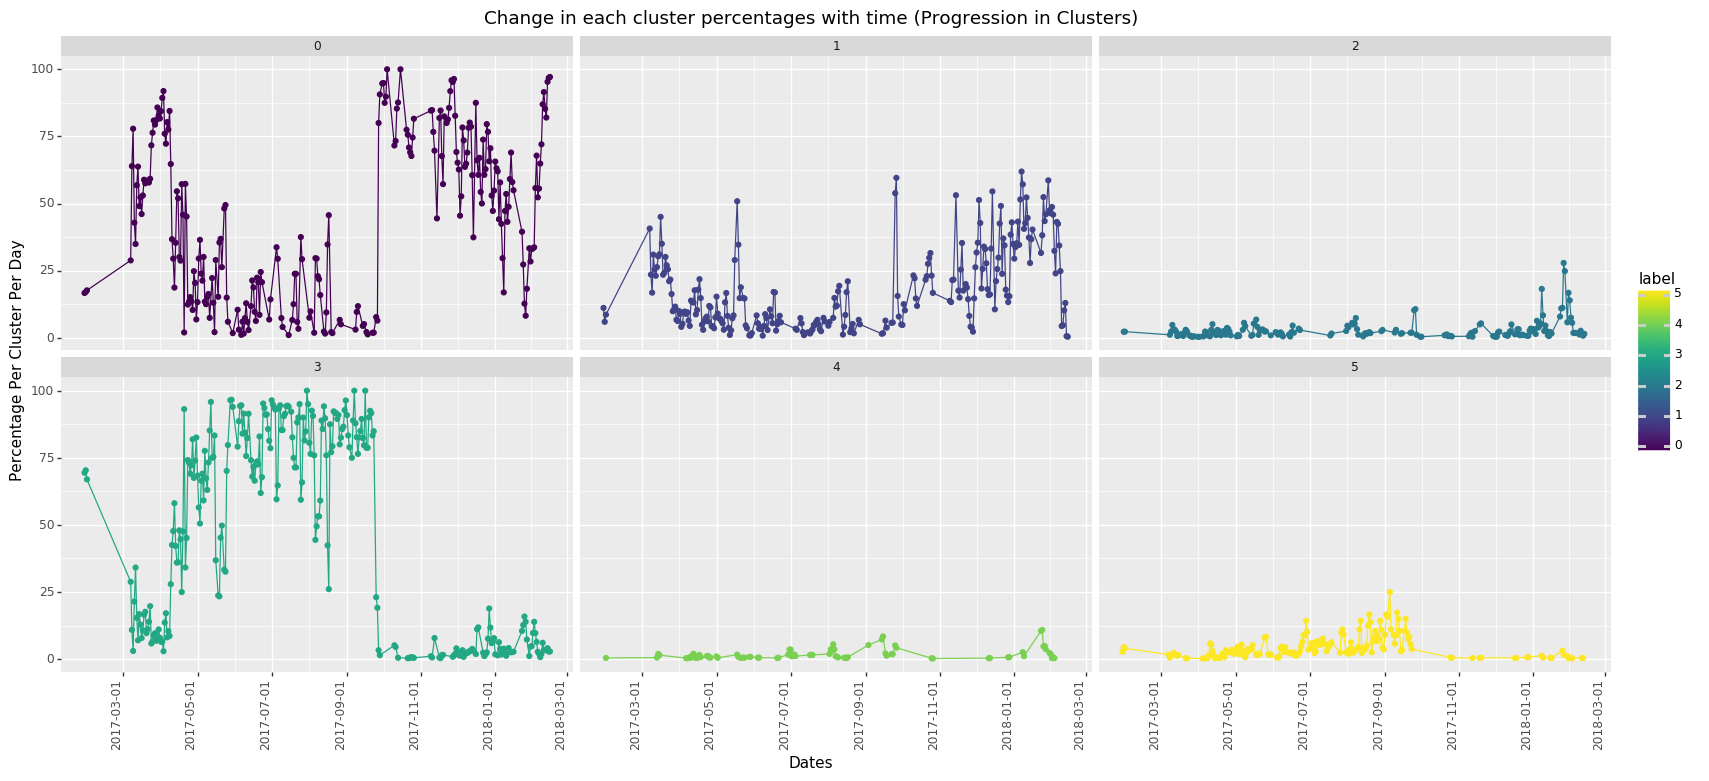

<ggplot: (-9223363246153443114)>


In [10]:
import matplotlib.pyplot as plt
#from matplotlib import pyploy as plt

plt.rcParams['figure.dpi'] = 150

g = ggplot(labelPercentagesPerDay, aes(x='Date', y='PercentagePerLabelPerDay', color='label',group='label'))+\
            geom_point()+geom_line()+ggtitle("Change in each cluster percentages with time (Progression in Clusters)")+ facet_wrap('label')+\
            theme(axis_text_x  = element_text(angle = 90, hjust = 1),figure_size=(20, 8))+\
            ylab('Percentage Per Cluster Per Day')+xlab('Dates')
            #scale_color_manual(values=[color])
ggsave(plot = g, filename = "PercentagesOfLabelPerDay", path = path)        
print(g)

In [11]:
COPD_Index.head(100)

index       Date  COPD_Index
0       1 2017-01-28       27.78
1       2 2017-01-29       25.19
2       3 2017-01-30       28.51
3       4 2017-03-07       69.49
4       5 2017-03-08       88.52
..    ...        ...         ...
95     96 2017-06-14       23.53
96     97 2017-06-15       29.78
97     98 2017-06-16       26.25
98     99 2017-06-17       31.25
99    100 2017-06-18       25.00

[100 rows x 3 columns]

/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 20 x 8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: PlottingCombined/Predictions_WithoutNoise_WithBPI/3054/OutResults/COPD_Index
  warn('Filename: {}'.format(filename), PlotnineWarning)


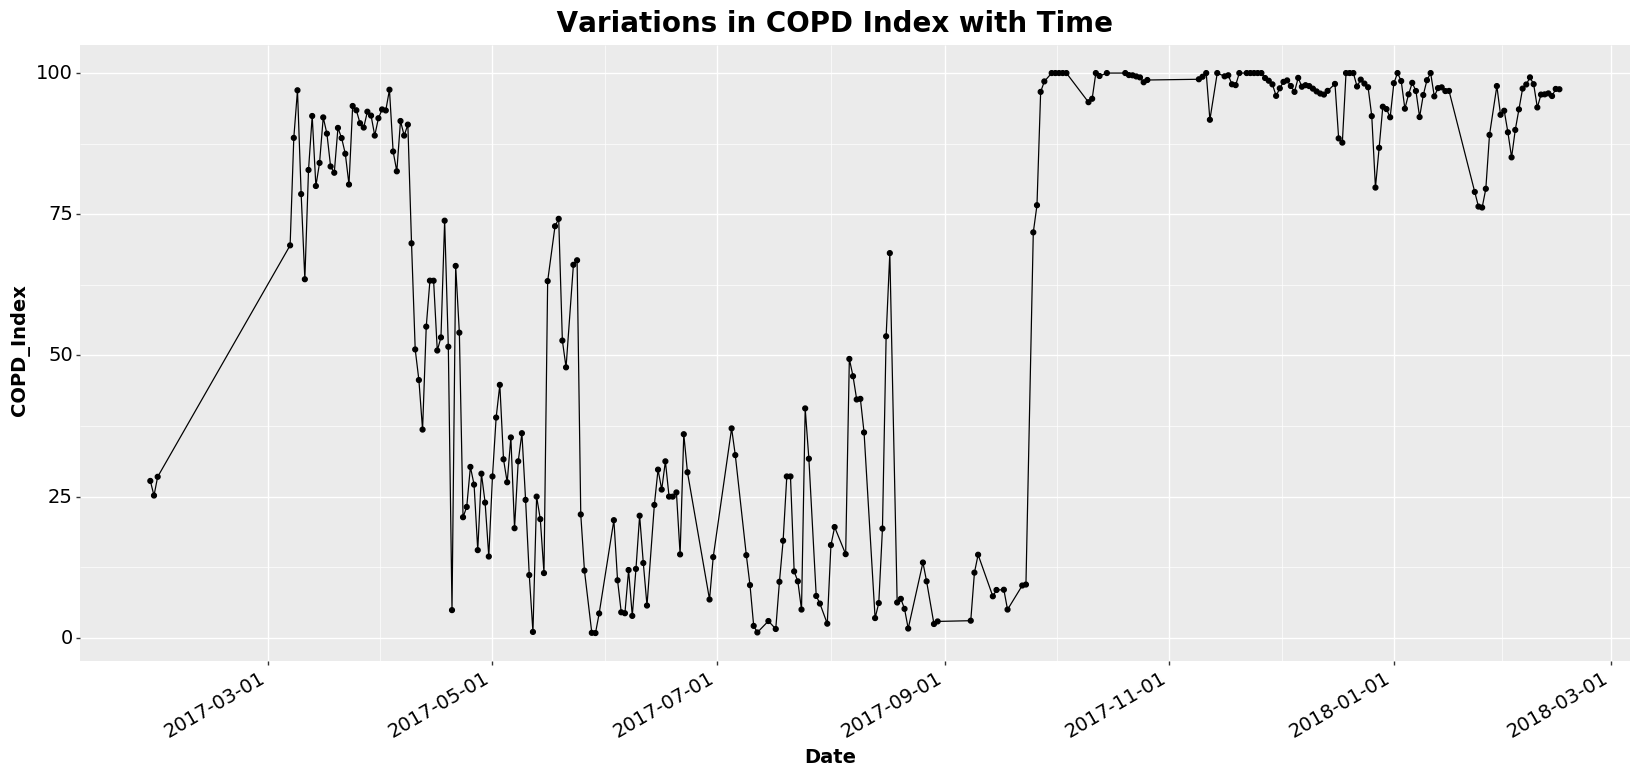

<ggplot: (8790701364393)>


In [42]:
import matplotlib.pyplot as plt
#from matplotlib import pyploy as plt
import matplotlib.pyplot as plt

from plotnine import *
#+figure_size = (20,10)

#plt.rcParams['figure.dpi'] = 150

g = ggplot(COPD_Index, aes(x='Date', y='COPD_Index'))+\
            geom_point()+geom_line() +  ggtitle(" Variations in COPD Index with Time")+\
            theme(plot_title = element_text(size = 20, face = "bold"),\
                    axis_text_x  = element_text(angle = 30, hjust = 1,size = 14,colour = 'black'),\
                  axis_text_y  = element_text( hjust = 1,size = 14,colour = 'black'),\
                  axis_title_x = element_text(size = 14,face = "bold", colour = 'black',angle = 0),\
                  axis_title_y = element_text(size = 14,face = "bold", colour = 'black', angle = 90),\
                  figure_size=(20, 8))#, aspect_ratio=1/3)
            
            #scale_color_manual(values=[color])
ggsave(plot = g, filename = "COPD_Index", path = path)    
#p.save(filename=path+'fig3.png', height=10, width=12, units = 'cm', dpi=300)
print(g)

In [13]:
from sklearn.metrics import r2_score

def regressionOnCOPD(df1,x,y):
    #df1 = pd.read_csv(filename,x,y)

    plt.xlabel(x)
    plt.ylabel(y)
    plt.scatter(df1[x].to_list(), df1[y].to_list())

    reg1 = linear_model.LinearRegression()
    reg1.fit(df1[[x]], df1[y])
    
    r_sq=reg1.score(df1[[x]], df1[y])
    print(f"coefficient of determination: {r_sq}")
    
    print(f"intercept: {reg1.intercept_}")
    
    print(f"slope: {reg1.coef_}")
    

    #reg1.predict([[2021]])
    #df1.x
    plt.xlabel('Time Line')
    plt.ylabel('COPD Index')
    plt.scatter(df1[x].to_list(), df1[y].to_list())
    plt.plot(df1[x], reg1.predict(df1[[x]]), color='red')
    #print(reg1.predict(df1[[x]]))
    
    
    r2 = r2_score(df1[y].to_list(),reg1.predict(df1[[x]]))
    print('r2 score for model is', r2)
    return(reg1.predict(df1[[x]]))

In [ ]:
#https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/
from sklearn.preprocessing import PolynomialFeatures

def Polynomial_regressionOnCOPD(df1,x,y,PolynomialDegree):
    #df1 = pd.read_csv(filename,x,y)

    plt.xlabel(x)
    plt.ylabel(y)
    plt.scatter(df1[x].to_list(), df1[y].to_list())

    
    poly = PolynomialFeatures(degree = PolynomialDegree)
    X_poly = poly.fit_transform(df1[x].to_list())

    poly.fit(X_poly, df1[y].to_list())
    
    reg1 = linear_model.LinearRegression()  
    reg1.fit(X_poly, df1[y].to_list())
    
    r_sq=reg1.score(df1[[x]], df1[y])
    print(f"coefficient of determination: {r_sq}")
    
    print(f"intercept: {reg1.intercept_}")
    
    print(f"slope: {reg1.coef_}")
    

    #reg1.predict([[2021]])
    #df1.x
    plt.xlabel('Time Line')
    plt.ylabel('COPD Index')
    plt.scatter(df1[x].to_list(), df1[y].to_list())
    plt.plot(df1[x], reg1.predict(X_poly), color='red')
    #print(reg1.predict(df1[[x]]))
    
    
    r2 = r2_score(df1[y].to_list(),reg1.predict(X_poly))
    print('r2 score for model is', r2)
    return(reg1.predict(X_poly))

In [ ]:
GetLine=Polynomial_regressionOnCOPD(labelPercentagesPerDay,'index','PercentagePerLabelPerDay',3)

In [ ]:
COPD_Index.head()
labelPercentagesPerDay['index']=labelPercentagesPerDay['index']+1
labelPercentagesPerDay.head()


In [ ]:
from sklearn import linear_model
labelPercentagesPerDay=labelPercentagesPerDay[labelPercentagesPerDay['label']==3]
GetLine=regressionOnCOPD(labelPercentagesPerDay,'index','PercentagePerLabelPerDay')
GrowthRate=(((GetLine[-1]-GetLine[0])/GetLine[0])*100)
print(GrowthRate)
print(GrowthRate,GetLine[0],GetLine[-1],GetLine.max()-GetLine.min())
print(GetLine)



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

CutoffDate='2019-01-01'
EarlyCOPDIndex=pd.DataFrame()
EarlyCOPDIndex=COPD_Index[COPD_Index['Date']<pd.to_datetime(CutoffDate).date()]
#print(x)

display(EarlyCOPDIndex.head())
GetLine=regressionOnCOPD(EarlyCOPDIndex,'index','COPD_Index')
GrowthRate=(((GetLine[-1]-GetLine[0])/GetLine[0])*100)
print("Growth Rate: ", GrowthRate)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

Start='2019-05-01'
End='2019-08-31'
EarlyCOPDIndex=pd.DataFrame()
EarlyCOPDIndex=COPD_Index[(COPD_Index['Date']>=pd.to_datetime(Start).date()) & (COPD_Index['Date']<=pd.to_datetime(End).date())]
#print(x)
display(EarlyCOPDIndex.head())
display(EarlyCOPDIndex.tail())
GetLine=regressionOnCOPD(EarlyCOPDIndex,'index','COPD_Index')
GrowthRate=(((GetLine[-1]-GetLine[0])/GetLine[0])*100)
print("Growth Rate: ", GrowthRate)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

CutoffDate='2019-08-31'
EarlyCOPDIndex=pd.DataFrame()
EarlyCOPDIndex=COPD_Index[COPD_Index['Date']>pd.to_datetime(CutoffDate).date()]
#print(x)
display(EarlyCOPDIndex.head())
GetLine=regressionOnCOPD(EarlyCOPDIndex,'index','COPD_Index')
GrowthRate=(((GetLine[-1]-GetLine[0])/GetLine[0])*100)
print("Growth Rate: ", GrowthRate)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

CutoffDate='2019-05-01'
EarlyCOPDIndex=pd.DataFrame()
LaterCOPDIndex=COPD_Index[COPD_Index['Date']>pd.to_datetime(CutoffDate).date()]
#print(x)
EarlyCOPDIndex
GetLine=regressionOnCOPD(LaterCOPDIndex,'index','COPD_Index')
GrowthRate=(((GetLine[-1]-GetLine[0])/GetLine[0])*100)
print("GrowthRate: ",GrowthRate)

In [ ]:
x=pd.to_datetime('2019-01-01').date()
print(x)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

GetLine=regressionOnCOPD(COPD_Index,'index','COPD_Index')
GrowthRate=(((GetLine[-1]-GetLine[0])/GetLine[0])*100)
print(GrowthRate)

In [ ]:
GrowthRate=(((GetLine[-1]-GetLine[0])/GetLine[0])*100)
print(GrowthRate)
print(GrowthRate,GetLine[0],GetLine[-1],GetLine.max()-GetLine.min())
print(GetLine)

In [ ]:
li=[0,1,2,3]
liNot=[4,5]

def getlabels(x,li,liNot):
    if x in li:
        return 0
    elif x in liNot:
        return 1
    
la=getlabels(5,li,liNot)
print(la)

In [ ]:



g2=ggplot(cp_ind, aes(x="Serial", y="COPD_Index"))+ geom_line()  # Geometric o
print(g2)
#    ggsave(plot = g2, filename = "COPD_INdex_Progression", path = ppath)
''''''